# Porównanie metod reprezentacji i wizualizacji danych przestrzennych dostępnych w bibliotekach R: spatstat (ppp) oraz sp.

## Projekt - Przestrzenne bazy danych (SPBD)

### Wykonał: Karol Pąperski

1. Cel projektu

Celem mojego projektu jest porównanie wydajności obliczeniowej, łatwości użycia oraz metod reprezentacji i wizualizacji danych przestrzennych za pomocą obiektów sp i ppp oferowanych w bibliotekach spatial i spatstat.
Wersje bibliotek:

    a. sp        - wersja 1.4_1
    
    b. spatstat  - wersja 1.64_1

2. Krótki opis porównywanych bibliotek

Biblioteka sp zawiera klasy i metody dotyczące danych przestrzennych, pozwalające przechowywać dane o położeniu przestrzennym danych wielowymiarowych. Zapewnia ona szereg funkcji umożliwiających drukowanie danych w postaci map, obiektów przestrzennych. Zawiera metody wyszukiwania współrzędnych oraz badania zależności między obiektami przestrzennymi. Pakiet ten zawiera znacznie mniej metod w porównaniu do spatstat. Specjalizuje się w przetwarzaniu danych przestrzennych. Biblioteka ta zawiera tylko funkcje odnoszące się do wizualizacji, przetwarzania i transformacji danych przestrzennych. W porównaniu z spatstat nie ma rozszerzenia w postaci przeprowadzania symulacji danych przestrzennych, badań statystycznych czy modelowania.

Biblioteka spatstat określana jest jako pakiet do analizy statystycznej wzorców punktów przestrzennych (Spatial Point Patterns). Zawiera podobnie jak poprzedniczka wiele metod umożliwiających przetwarzanie i wizualizację danych przestrzennych. Poza tym, spatstat oferuje szereg metod pozwalających na przeprowadzanie analiz geostatycznych (point pattern analysis), metody eksploracyjne oraz analizy statystyczne. Biblioteka zezwala jednak na reprezentacje obiektów dwu ewentualnie trójwymiarowych, a nie tak jak sp - wielowymiarowych. W bibliotece tej zanajduje się szereg funkcji przeznaczonych do użytku na danych przestrzennych. Pakiet ten jest znacznie bardziej rozbudowany niż sp (warto zauważyć znaczną różnicę w długości dokumentacji - sp mieści się na 119 stronach podczas gdy dokumentacja spatstat ma 1779 stron). Ze względu na brak możliwości porównania dodatkowych funkcji eksploracyjnych z drugim pakietem nie będą one omawiane w projekcie.

3. Opis metod reprezentacji danych
    
    a. sp

Nazwa sp jest skrótem od Spatial Points i jest reprezentacją danych przestrzennych w pakiecie Spatial w języku R. Obiekt SP służy do reprezentacji obiektów w przestrzeni za pomocą punktów. Zawiera atrybuty:

coords – (od coordinates) są to współrzędne w postaci macierzy, której wiersz reprezentuje jeden punkt obiektu.

proj4string – jest to układ odniesienia, w którym występują przedstawione dane.

bbox – (minimal bounding box) co charakteryzuje minimalny prostąkąt o bokach równoległych do osi układów współrzędnych zawierający obiekt.

SpatialPoints jest przykładem typowej reprezentacji w modelu spaghetti. Obiekty są charakteryzowane przez punkty, nie mamy natomiast informacji o żadnych relacjach topologicznych.

Reprezentacja danych bazuje na systemie klas S4, który jest bardziej złożony niż w przypadku reprezentacji w spatstat. Oparta jest na klasach SpatialPoints i SpatialPointsDataFrame, które są realizacjami abstrakcyjnej klasy Spatial zwierającej metadane każdego tworzonego obiektu przestrzennego. Składa się z metod abstrakcyjnych dimensions(), bbox(), coordinates(), spplot().
Spatial Points zawiera tylko informacje podstawowe o obiekcie reprezentowane powyższymi atrybutami. SpatialPointsDataFrame dziedzicząca bezpośrednio po niej jest rozszerzeniem i zawiera dodatkowy atrybut z danymi obiektu ("data"). Do tworzenia innych danych przestrzennych w postaci siatek, lini czy wielokątów służą klasy SpatialMultiPoints, SpatialGrid, SpatialPixels, SpatialLines, SpatialPolygons z któych każda posiada również swoją wersję z dodatkowymi atrybutami Spatial___DataFrame.

    b. spatstat

Drugą badaną w projekcie reprezentacją danych będzie PPP (planar point pattern) znajdująca się w pakiecie Spatstat. Obiekt typu PPP jest reprezentowany przez rozkład punktów w dwuwymiarowej przestrzeni. Zawiera on następujące atrybuty:

x – wektor współrzędnych x punktów obiektu

y – wektor współrzędnych y punktów obiektu

window – okno, w którym znajduje się dany obiekt (Uwaga! Wszystkie punkty muszą znajdować się wewnątrz okna window, wszystkie wystające poza window zostaną odrzucone)

marks – wektor zawierający znaczniki tj. informacje o każdym punkcie obiektu
Ostatni argument jest opcjonalny przy tworzeniu obiektu.

Reprezentacja danych za pomocą biblioteki oparta jest na systemie klas S3 języka R. Do utworzenia danych przestrzennych dostępne są 4 klasy obiektów: ppp, owin, im, psp. W części eksperymentalnej szczegółowo omówiono i przetestowano możliowści reprezentcji danych przez każdą z klas.

4. Sposób wizualizacji danych
    
    a. sp
   
Obiekt SP może być wyświetlony za pomocą funkcji spplot(). Metodę tą w SP charakteryzują argumenty (wybrane):

obj  - obiekt klasy Spatial

xlab, ylab – etykiety osi x, y (opcjonalne)

xlim, ylim – ograniczony zakres wartości na osiach x, y

col – kolor (można ustawić kolor linii, wnętrza obiektów)

lwd – grubość linii wykresu

bg – kolor tła wykresu

    b. spatstat

Obiekt PPP w SPATSTAT może być wyświetlony z pomocą funkcji plot(). Metodę tą charakteryzują argumenty (wybrane):

x - obiekt przestrzenny, który chcemy przedstawić

main – tytuł wykresu (rysunku)

clipwin – okno, które ma zostać zwizualizowane (gdy chcemy wyświelić dany obszar obiektu, a nie cały obiekt)

legend – znacznik wskazujący czy dodać legendę wykresu

cols – kolor (można ustawić kolor linii, wnętrza obiektów)

5. Eksprymentalne porównanie bibliotek

W ramach projektu w sposób ekperymetnalny zostaną porównane reprezentacje danych przestrzennych przez biblioteki sp i spatstat, a także wykorzystanie ich do wizualizacji, wykonania operacji na obiektach przestrzennych, transformacji układu współrzędnych oraz odczytu i zapisu danych.

Do wykonania projektu wykorzystano metryki badające wydajność czasową, natomiast ocenę możliwości bibliotek a także dostępnego interfejsu stanowiły wewnętrzne odczucia autora projektu.

Poniżej załadowano biblioteki:

In [1]:
library(sp)
library(spatstat)

Loading required package: spatstat.data

Loading required package: nlme

Loading required package: rpart


spatstat 1.64-1       (nickname: 'Help you I can, yes!') 
For an introduction to spatstat, type 'beginner' 




    5.1 Tworzenie i wizualizacja danych przestrzennych
        a. sp

Konstrukcja obiektów tej klasy jest możliwa przez wywołanie konstruktora z obowiązkowym atrybutem coords, zawierającym współrzędne w postaci macierzy. Spróbujmy teraz utworzyć kilka punktów i je wyświetlić.

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

SpatialPoints:
     coords.x1 coords.x2
[1,]         1         2
[2,]         2         3
[3,]         3         4
[4,]         4         5
[5,]         5         6
[6,]         6         2
[7,]         7         3
[8,]         8         4
Coordinate Reference System (CRS) arguments: NA 

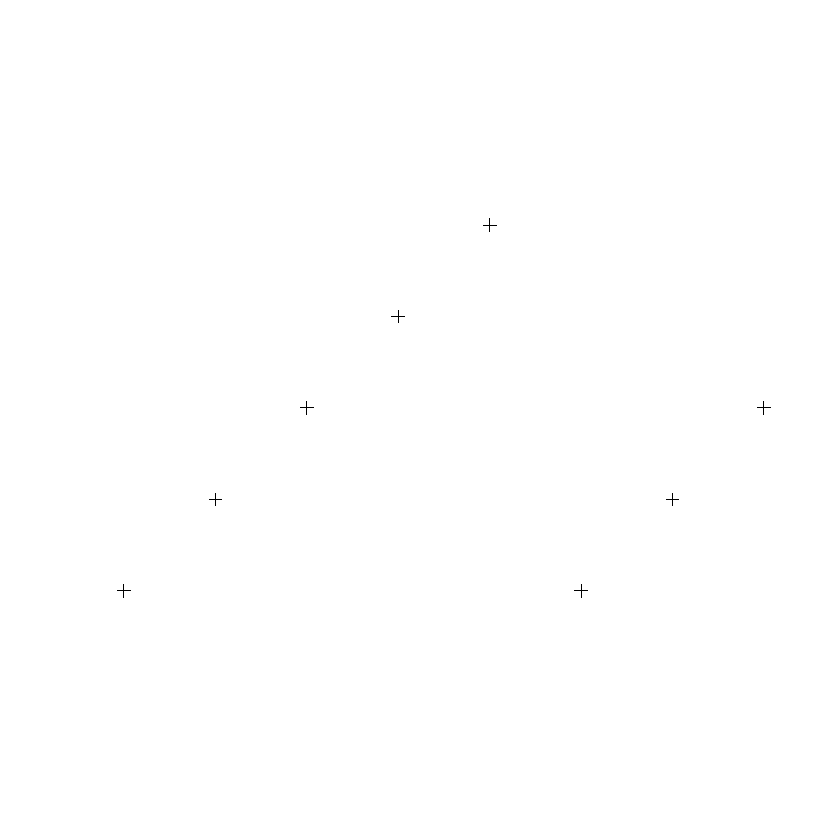

In [2]:
coords = cbind(c(1, 2, 3, 4, 5, 6, 7, 8), c(2, 3, 4, 5, 6, 2, 3, 4))
points = SpatialPoints(coords)
points #wyświetlanie współrzędnych
plot(points) #wizualizacja danych

Na podstawie eksprymentu i jego wyniku można stwierdzić poprawność wyświetlanych danych. Warto też w tym momencie zaznaczyć, że w bibliotece sp można tworzyć wielowymiarowe dane:

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

SpatialPoints:
     coords.x1 coords.x2 coords.x3 coords.x4
[1,]         1         2         1         2
[2,]         2         3         2         3
[3,]         3         4         3         4
[4,]         4         5         4         5
[5,]         5         6         5         6
[6,]         6         2         6         2
[7,]         7         3         7         3
[8,]         8         4         8         4
Coordinate Reference System (CRS) arguments: NA 

Object of class SpatialPoints
Coordinates:
          min max
coords.x1   1   8
coords.x2   2   6
coords.x3   1   8
coords.x4   2   6
Is projected: NA 
proj4string : [NA]
Number of points: 8

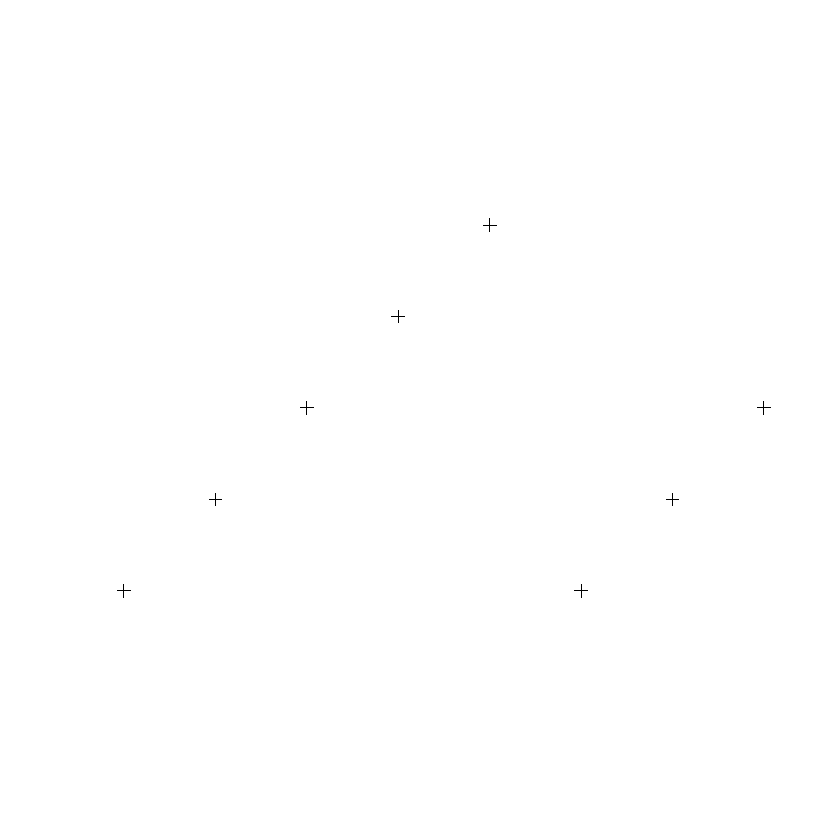

In [3]:
coords = cbind(c(1, 2, 3, 4, 5, 6, 7, 8), c(2, 3, 4, 5, 6, 2, 3, 4), c(1, 2, 3, 4, 5, 6, 7, 8), c(2, 3, 4, 5, 6, 2, 3, 4))
points = SpatialPoints(coords)
points #wyświetlanie współrzędnych
plot(points) #wizualizacja danych
summary(points) #analiza danych przestrzennych

Oczywiście wynik wyświetlania jest ten sam (w pierwszych dwóch wymiarach), jednakże każdy punkt ma 4 współrzędne.

Następnie utworzono obiekt typu SpatialPointsDataFrame:

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

  coordinates class colors
1      (1, 2)     1      b
2      (2, 3)     2      c
3      (3, 4)     1      z
4      (4, 5)     2      b
5      (5, 6)     1      c
6      (6, 2)     2      z
7      (7, 3)     1      c
8      (8, 4)     2      z

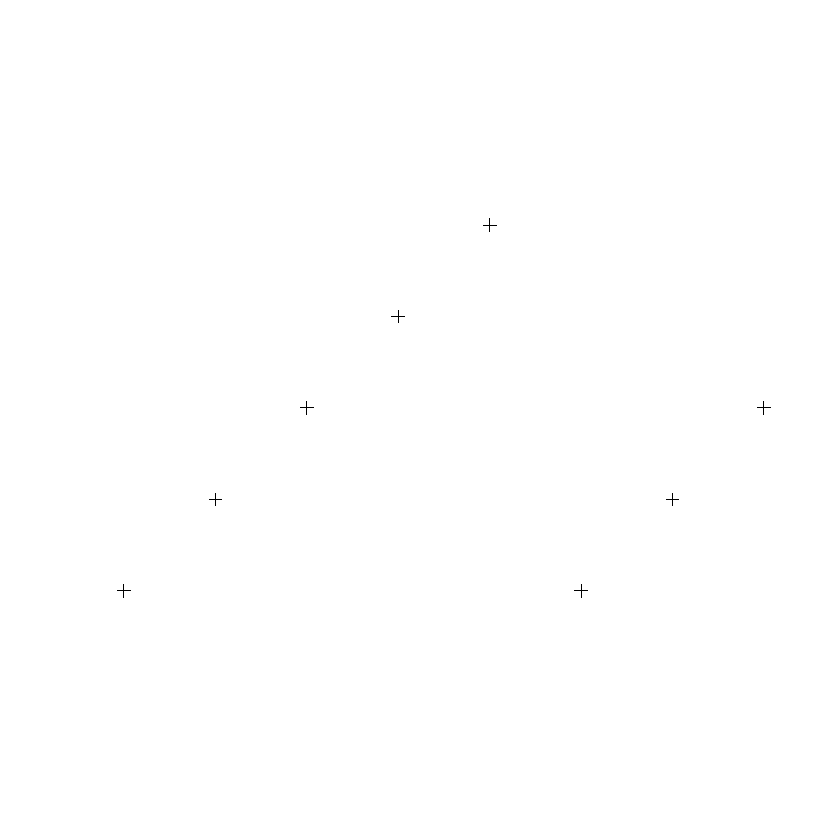

In [4]:
coords = cbind(c(1, 2, 3, 4, 5, 6, 7, 8), c(2, 3, 4, 5, 6, 2, 3, 4))
data = tibble::tibble(class = c(1, 2, 1, 2, 1, 2, 1, 2), colors = c("b", "c", "z", "b", "c", "z","c", "z"))
points = SpatialPointsDataFrame(coords, data)
points  #wyświetlanie współrzędnych
plot(points) #wizualizacja danych

Widzimy, że dane zostały prawidłowo utworzone, tak jak w przypadku SpatialPoints. Widzimy również, że dodatkowe dane są przechowywane dla każdego punktu. Możemy teraz przeprowadzić analizę danych za pomocą funkcji summary (nienależącej do pakietu).

In [5]:
summary(points) #analiza danych przestrzennych

Object of class SpatialPointsDataFrame
Coordinates:
          min max
coords.x1   1   8
coords.x2   2   6
Is projected: NA 
proj4string : [NA]
Number of points: 8
Data attributes:
     class        colors         
 Min.   :1.0   Length:8          
 1st Qu.:1.0   Class :character  
 Median :1.5   Mode  :character  
 Mean   :1.5                     
 3rd Qu.:2.0                     
 Max.   :2.0                     

Warto również wspomnieć tutaj o funkcji SpatialMultiPoints dziedziczącą po klasie Spatial, reprezentującego pogrupowane zbiory punktów przekazane w konstruktorze klasy za pomocą listy macierzy współrzędnych poszczególnych grup.

SpatialMultiPoints:
[[1]]
     [,1] [,2]
[1,]    1    2
[2,]    2    3
[3,]    3    4
[4,]    4    5
[5,]    5    6
[6,]    6    2
[7,]    7    3
[8,]    8    4

[[2]]
         [,1]     [,2]
[1,] 19.60185 14.65166
[2,] 18.08625 15.29146
[3,] 19.86053 14.70673
[4,] 18.14566 14.52132
[5,] 20.63320 13.00824
[6,] 19.23359 15.79697
[7,] 18.51131 12.83651
[8,] 19.17944 14.57775

[[3]]
          [,1]      [,2]
[1,] 0.6972313 0.4054769
[2,] 0.3743054 0.5894915
[3,] 0.3421550 0.7614617
[4,] 0.5951962 0.6537838

Coordinate Reference System (CRS) arguments: NA 

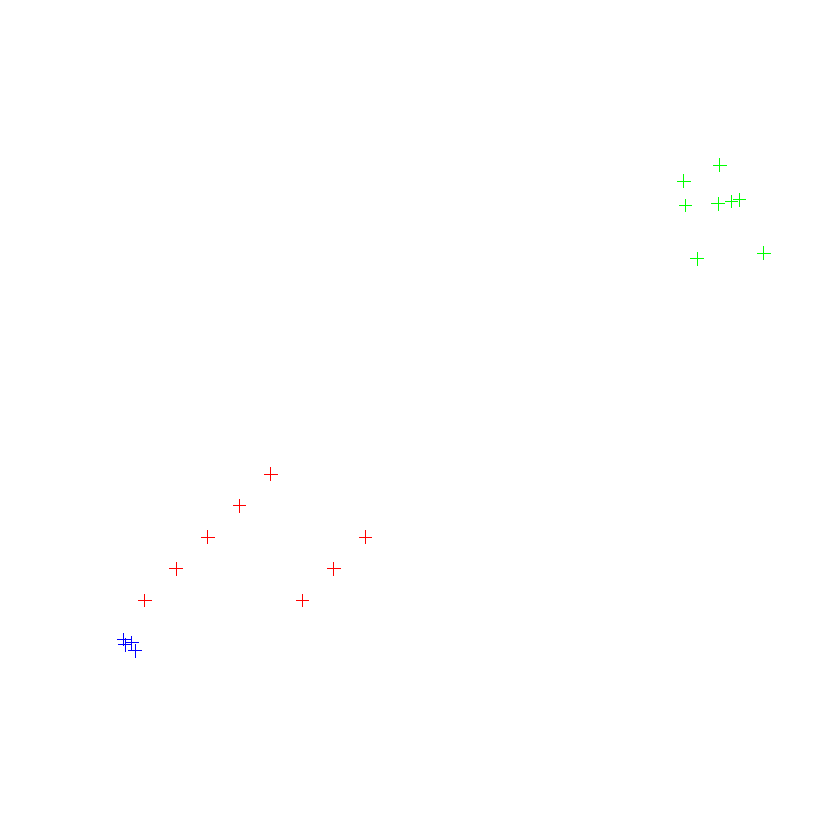

In [6]:
a = cbind(c(1, 2, 3, 4, 5, 6, 7, 8), c(2, 3, 4, 5, 6, 2, 3, 4))
b = cbind(rnorm(8, 20), rnorm(8, 15))
c = cbind(runif(4), runif(4))
coords = list(a, b, c)
mpoints = SpatialMultiPoints(coords)
mpoints
plot(mpoints, col = c("red", "green", "blue"))

Próbki poszczególnych klas zostały wyświetlone różnymi kolorami. Ze względu na mało ciekawe różnice pominę przedstawienie wyników tworzenia obiektu SpatialMultiPointsDataFrame.

Kolejnymi trochę bardziej złożonymi obiektami są łamane. Tworzone są one przy pomocy obiektów Line w pakiecie sp. Konstruktor wymaga podania macierzy współrzędnych reprezentujące kolejne węzły łamanej (punkty końcowe i początkowe pojedynczej lini wchodzącej w skład łamanej). Obiekt ten nie może być jednak wyświetlany. W tym celu konieczne jest utworzenie obiektu SpatialLines (lub SpatialLinesDataFrame z dodatkową ramką danych), w którego konstruktorze może być podana lista obiektów typu Line tworzona przy użyciu funkcji Lines (w przypadku tej funkcji wymagane jest podanie oprócz listy obiektów Line identyfiktora ID). Poniżej przedstawiono wyniki tworzenia łamanych.

An object of class "Line"
Slot "coords":
     [,1] [,2]
[1,]    1    2
[2,]    3    3
[3,]    2    4
[4,]    5    5
[5,]    4    6
[6,]    7    2
[7,]    6    3
[8,]    8    4


An object of class "Lines"
Slot "Lines":
[[1]]
An object of class "Line"
Slot "coords":
     [,1] [,2]
[1,]    1    2
[2,]    3    3
[3,]    2    4
[4,]    5    5
[5,]    4    6
[6,]    7    2
[7,]    6    3
[8,]    8    4



Slot "ID":
[1] "a"


ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

SpatialLines:
An object of class "SpatialLines"
Slot "lines":
[[1]]
An object of class "Lines"
Slot "Lines":
[[1]]
An object of class "Line"
Slot "coords":
     [,1] [,2]
[1,]    1    2
[2,]    3    3
[3,]    2    4
[4,]    5    5
[5,]    4    6
[6,]    7    2
[7,]    6    3
[8,]    8    4



Slot "ID":
[1] "a"


[[2]]
An object of class "Lines"
Slot "Lines":
[[1]]
An object of class "Line"
Slot "coords":
         [,1]     [,2]
[1,] 19.83381 15.45053
[2,] 21.36077 15.03385
[3,] 19.41269 15.49083
[4,] 20.69770 15.18324
[5,] 19.51710 15.78202
[6,] 18.11293 13.09734
[7,] 20.04628 15.66574
[8,] 20.61923 14.07228


[[2]]
An object of class "Line"
Slot "coords":
          [,1]      [,2]
[1,] 0.1533430 0.7121523
[2,] 0.9460258 0.4655614
[3,] 0.0545918 0.6467522
[4,] 0.5070286 0.2890740



Slot "ID":
[1] "bc"



Slot "bbox":
        min      max
x 0.0545918 21.36077
y 0.2890740 15.78202

Slot "proj4string":
CRS arguments: NA 

Coordinate Reference System (CRS) arguments: NA 

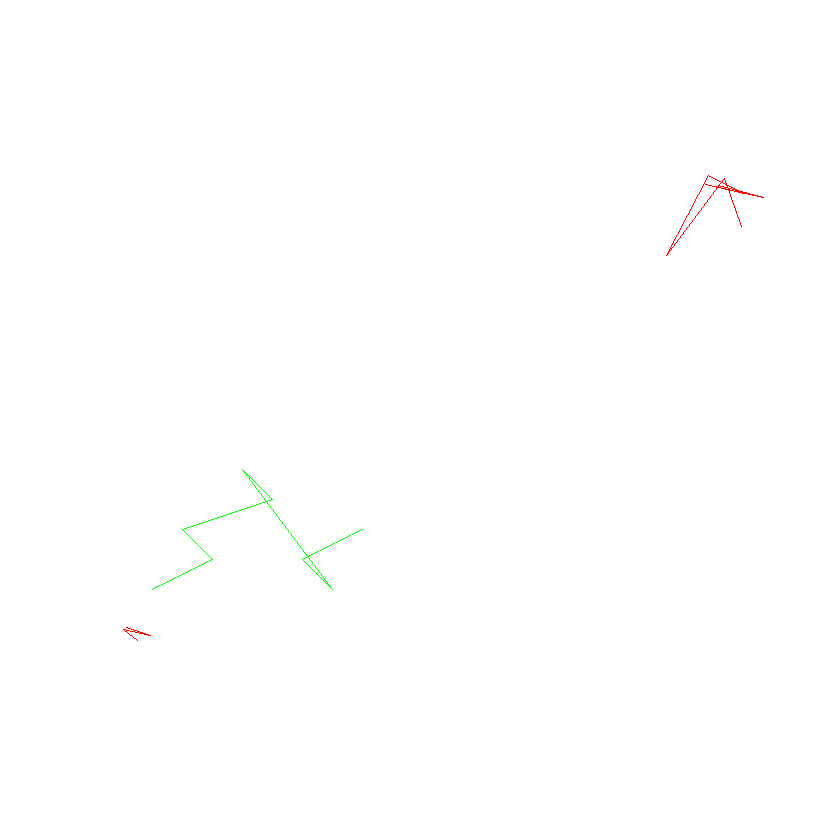

In [7]:
a = cbind(c(1, 3, 2, 5, 4, 7, 6, 8), c(2, 3, 4, 5, 6, 2, 3, 4))
b = cbind(rnorm(8, 20), rnorm(8, 15))
c = cbind(runif(4), runif(4))

line1 = Line(a)
line1
line2 = Line(b)
line3 = Line(c)

lines = Lines(list(line1), ID = 'a')
lines1 = Lines(list(line2, line3), ID = 'bc')
lines
displ_lines = SpatialLines(list(lines, lines1))
displ_lines
plot(displ_lines, col = c("green", "red"))

Widzimy, że obiekt Lines może zawierać listę łamanych reprezentowanych przez obiekty typu Line, a SpatialLines listę obiektów typu Lines. Jednak, gdy chcemy łatwo rozróżniać linię lepiej jest tworzyć dla każdej łamanej o oddzielnym znaczeniu obiekt typu Lines i łączyć je w listę w konstruktorze SpatialLines. Tworzenie tego obiektu wydaje się nieco mniej intuicyjne niż w poprzednich przypadkach.

Następnie zbadano obiekty do tworzenia wielokątów. Do reprezentacji tego typu obiektów w sp trzeba wykorzystać klasę Polygon. Podobnie jak w przypadku łamanych do wyświetlania danych przestrzennych konieczne jest utworzenie obiektu Polygons (listy obiektów Polygon z identyfikatorem) i SpatialPolygons (listy obiektów Polygons).

An object of class "Polygon"
Slot "labpt":
[1] 6.0 5.5

Slot "area":
[1] 18

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
     [,1] [,2]
[1,]    3    7
[2,]    6    8
[3,]    9    6
[4,]    6    2
[5,]    3    7


An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 6.0 5.5

Slot "area":
[1] 18

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
     [,1] [,2]
[1,]    3    7
[2,]    6    8
[3,]    9    6
[4,]    6    2
[5,]    3    7



Slot "plotOrder":
[1] 1

Slot "labpt":
[1] 6.0 5.5

Slot "ID":
[1] "1"

Slot "area":
[1] 18


ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

An object of class "SpatialPolygons"
Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 6.0 5.5

Slot "area":
[1] 18

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
     [,1] [,2]
[1,]    3    7
[2,]    6    8
[3,]    9    6
[4,]    6    2
[5,]    3    7



Slot "plotOrder":
[1] 1

Slot "labpt":
[1] 6.0 5.5

Slot "ID":
[1] "1"

Slot "area":
[1] 18


[[2]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] -4.666667  5.666667

Slot "area":
[1] 8.5

Slot "hole":
[1] FALSE

Slot "ringDir":
[1] 1

Slot "coords":
     [,1] [,2]
[1,]   -1    3
[2,]  -10    8
[3,]   -3    6
[4,]   -1    3



Slot "plotOrder":
[1] 1

Slot "labpt":
[1] -4.666667  5.666667

Slot "ID":
[1] "2"

Slot "area":
[1] 8.5


[[3]]
An object of class "Polygons"
Slot "Polygons":
[[1]]
An object of class "Polygon"
Slot "labpt":
[1] 23 -2

Slot "area":
[1] 0.5

Slot "hole":
[1] FALSE

Slot "

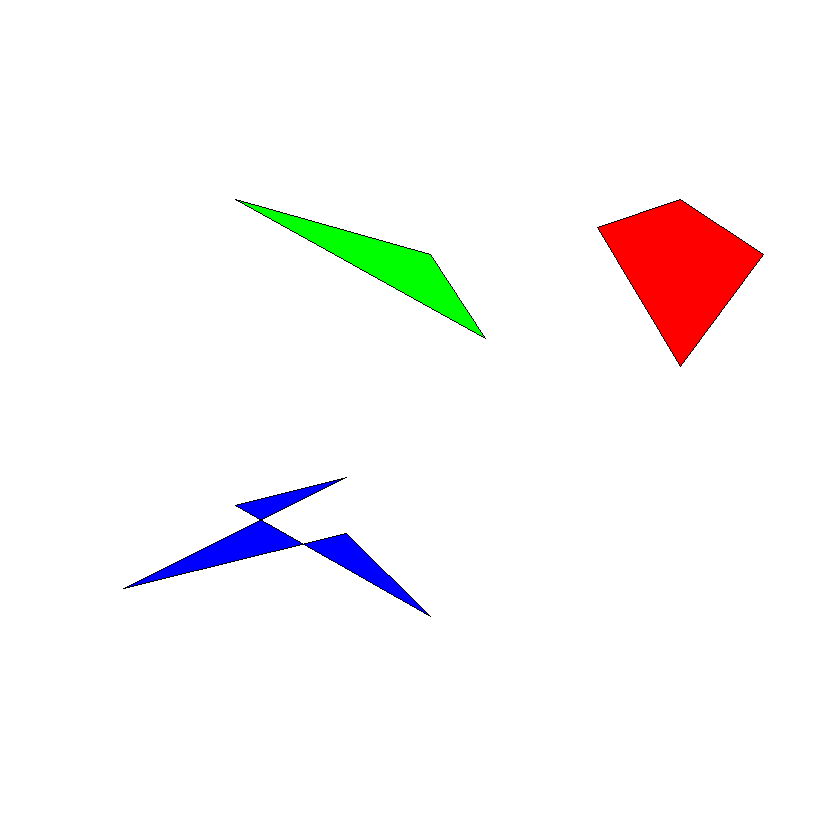

In [8]:
coords = cbind(c(3, 6, 9, 6, 3), c(7, 8, 6, 2, 7))
polygon1 = Polygon(coords)
polygon1
coords = cbind(c(-1, -3, -10, -1), c(3, 6, 8, 3))
polygon2 = Polygon(coords)
coords = cbind(c(-3, -6, -14, -6, -10, -3), c(-7, -4, -6, -2, -3, -7))
polygon3 = Polygon(coords)

polygons1 = Polygons(list(polygon1), ID = "1")
polygons1
polygons2 = Polygons(list(polygon2), ID = "2")
polygons3 = Polygons(list(polygon3), ID = "3")

disp_polygons = SpatialPolygons(list(polygons1, polygons2, polygons3))
disp_polygons

plot(disp_polygons, col = c("red", "green", "blue"))

Tworzenie obiektów jest podobne jak tworzenie łamanej. Widzimy, że reprezentacja Polygon zawiera poza współrzędnymi pole powierzchni wielokątów oraz długosć i szerokość wielokąta względem osi układu współrzędnych.

Poza tymi standardowymi obiektami w sp mamy możliwość tworzenia regularnej siatki prostokątnej. Służą do tego klasy SpatialGrid i SpatialPixels. Aby utworzyć obiekt tego typu za pomocą pierwszej z nich należy najpierw stworzyć instancję klasy GridTopology. W jej konstruktorze należy podać trzy atrybuty obowiązkowe - cellcentre.offset reprezentujący współrzędne środka ciężkości siatki, cellsize - wielkość kratki we wszystkich wymiarach siatki, cells.dim - ilość kratek siatki w każdym wymiarze. Jasne jest, że każdy z tych punktów musi zawierać tyle samo współrzędnych (podawanych w formie wektora).

                  X1 X2
cellcentre.offset  0  2
cellsize           1  2
cells.dim          3  5

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

Object of class SpatialGrid
Grid topology:
  cellcentre.offset cellsize cells.dim
1                 0        1         3
2                 2        2         5
SpatialPoints:
      s1 s2
 [1,]  0 10
 [2,]  1 10
 [3,]  2 10
 [4,]  0  8
 [5,]  1  8
 [6,]  2  8
 [7,]  0  6
 [8,]  1  6
 [9,]  2  6
[10,]  0  4
[11,]  1  4
[12,]  2  4
[13,]  0  2
[14,]  1  2
[15,]  2  2
Coordinate Reference System (CRS) arguments: NA 

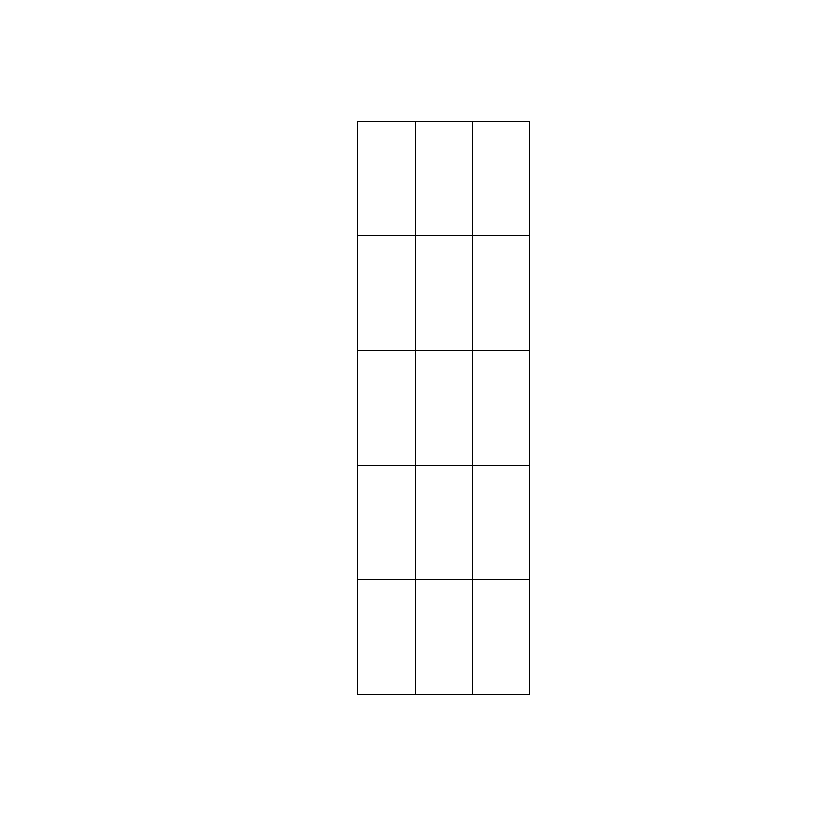

In [9]:
x = GridTopology(cellcentre.offset = c(0,2), cellsize = c(1,2), cells.dim = c(3,5))
x
y = SpatialGrid(x)
y
plot(y)

Jak widać powyżej siatka składa się z listy punktów (SpatialPoints) dodatkowo połączonych siatką.

Z kolei SpatialPixels w konstruktorze przyjmuje argumenty będące punktami (SpatialPoints) i na nich rozciąga siatkę łączącą te punkty. Przykład dla wcześniej utworzonych punktów (points) pokazano poniżej.

[1] "SpatialPixels"
attr(,"package")
[1] "sp"

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.Spat

Object of class SpatialPixels
Grid topology:
          cellcentre.offset cellsize cells.dim
coords.x1                 1        1         8
coords.x2                 2        1         5
SpatialPoints:
     coords.x1 coords.x2
[1,]         1         2
[2,]         2         3
[3,]         3         4
[4,]         4         5
[5,]         5         6
[6,]         6         2
[7,]         7         3
[8,]         8         4
Coordinate Reference System (CRS) arguments: NA 

Object of class SpatialPixels
Coordinates:
          min max
coords.x1 0.5 8.5
coords.x2 1.5 6.5
Is projected: NA 
proj4string : [NA]
Number of points: 8
Grid attributes:
          cellcentre.offset cellsize cells.dim
coords.x1                 1        1         8
coords.x2                 2        1         5

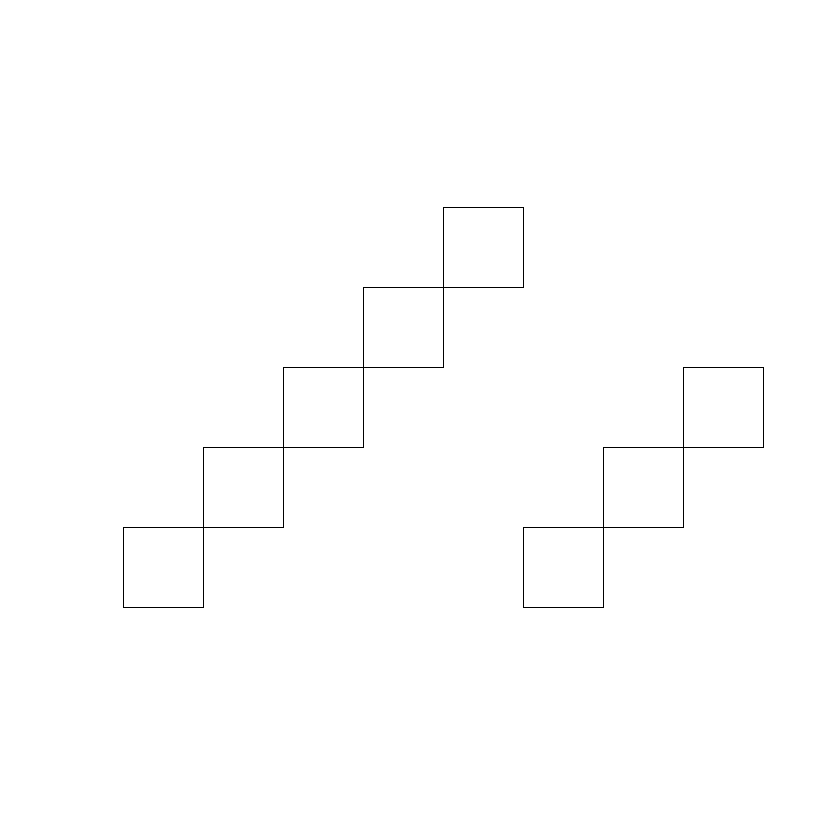

In [10]:
y = SpatialPixels(SpatialPoints(points))
class(y)
y
summary(y)
plot(y) # plots grid

        b. spatstat
        
Pierwszą omówioną klasą będzie ppp. Pozwala ona na reprezentowanie punktów (jednego lub wielu). Podstawową różnicą między SpatialPoints pozostaje fakt, iż możliwa jest reprezentacja punktów tylko w przestrzeni dwuwymiarowej. Obiekt ten jest tworzony poprzez wywołanie konstruktora, którego parametrami są wektor współrzędnych x, wektor współrzędnych y. Teorytycznie są to jedyne obowiązkowe atrybuty konstruktora. Jednakże warto zwrócić uwagę na parametr opcjonalny window (okno) przy tworzeniu instancji klasy ppp. Jest to fragment płaszczyny w którym znajdują się wszystkie punkty przestrzeni. Parametr ten domyślnie jest ustawiony na kwadrat o wierzchołkach (0,0), (0,1), (1,1), (1,0). W przypadku gdy punkty nie mieszczą się w oknie są odrzucane. Zatem, gdy chcemy za pomocą ppp reprezentować zbiór punktów nie mieszczących sie w kwadracie, musimy pamiętać o podaniu okna w postaci obiektu typu owin, omówionego w dalszej części projektu (lub rozciągłości okna w dwóch wymiarach). Poza tym punkty mogą opcjonalnie zawierać znaczniki/etykiety (marks). Poniżej zaprezentowano tworzenie obiektów, podobnie do sp.

[1] 0.92338431 0.78751865 0.93198699 0.03708714 0.29611644

[1] 0.04912746 0.35269178 0.18016962 0.27198216 0.09381547

Planar point pattern: 5 points
window: rectangle = [0, 1] x [0, 1] units

Planar point pattern:  5 points
Average intensity 5 points per square unit

Coordinates are given to 8 decimal places

Window: rectangle = [0, 1] x [0, 1] units
Window area = 1 square unit

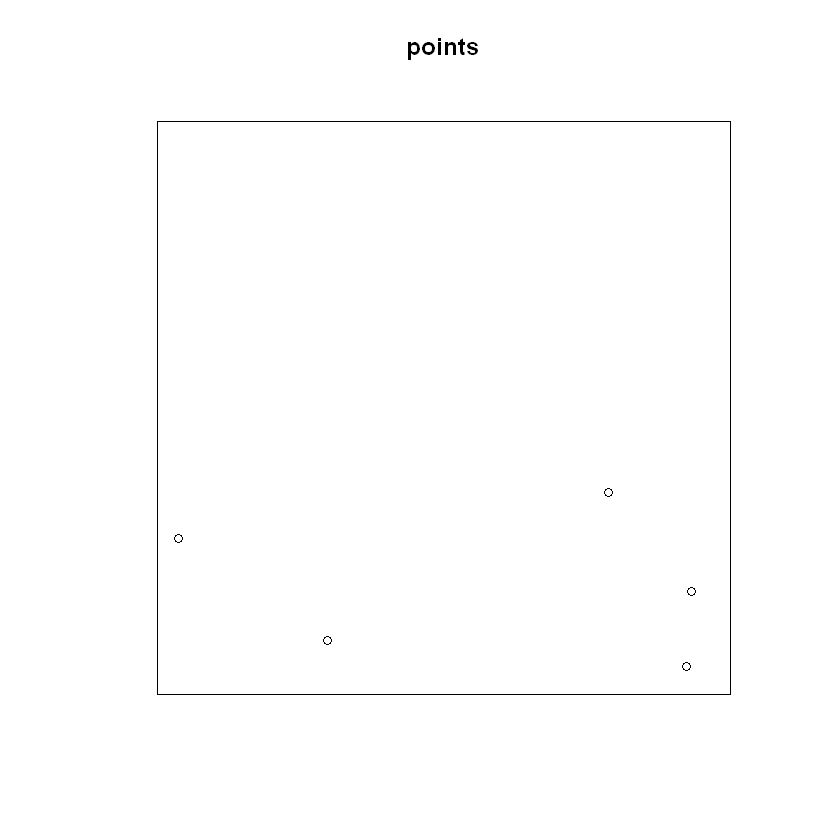

In [11]:
x = runif(5)
x
y = runif(5)
y
points = ppp(x, y)
points
summary(points)
plot(points)

Planar point pattern: 8 points
window: rectangle = [0, 10] x [1, 7] units

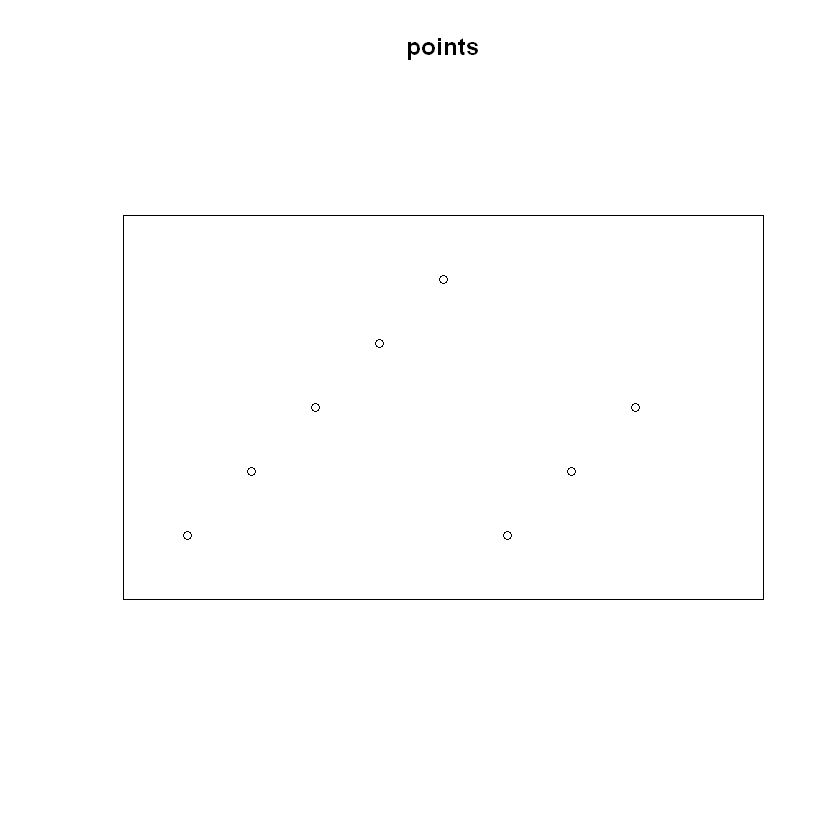

In [12]:
x = c(1, 2, 3, 4, 5, 6, 7, 8)
y = c(2, 3, 4, 5, 6, 2, 3, 4)
points = ppp(x, y, c(0, 10), c(1,7))
points #wyświetlanie współrzędnych
plot(points) #wizualizacja danych

Na obiekcie tym można wykonywać operację wyświetlania za pomocą funkcji plot, jak i uzyskiwania danych za pomocą summary. Ciekawą funkcją jest również należąca do tej klasy funkcja as.ppp() która próbuje zamienić obiekt podany jako argument na obiekt tej klasy (np. zamiana macierzy punktów na ppp).

Do reprezentacji linii w bibliotece spatstat służy obiekt psp. Dziedziczy on bezpośrednio po klasie ppp. Jego konstruktor przyjmuje argumenty x0, y0 - współrzędne początków pojedynczych lini, x1, y1 - współrzędne końców lini składających się na łamaną. Pozostałe argumenty window i marks działają dokładnie tak samo jak w przypadku ppp. Poniżej przedstawiono przykład tworzenia linii.

3 line segments
Lengths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.414   2.510   3.606   3.007   3.803   4.000 
Total length: 9.01976483783708 units  
Length per unit area: 0.0901976483783708 
Angles (radians):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4914  0.9828  1.1130  1.6695  2.3562 
Window: rectangle = [0, 10] x [0, 10] units
Window area = 100 square units

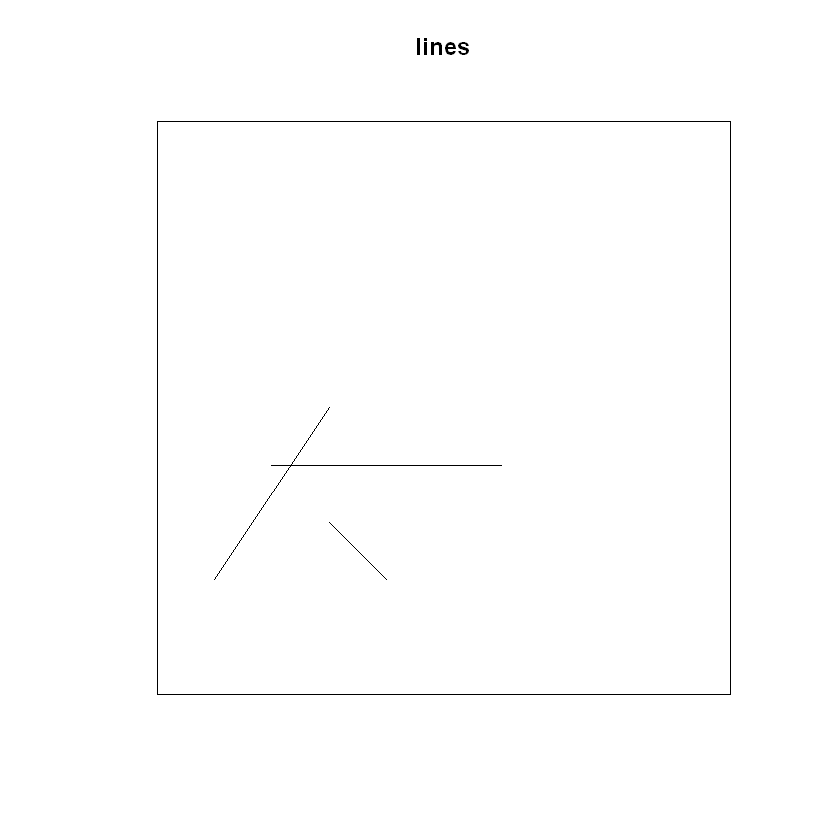

In [13]:
lines = psp(c(1, 3, 2), c(2, 3, 4), c(3, 4, 6), c(5, 2, 4), owin(c(0,10), c(0,10)))
summary(lines)
plot(lines)

Jak widać w tym przypadku nie musimy tworzyć łamanej. Obiekt psp może przechowywać zbiór lini. Przy wywołaniu funkcji summary możliwe jest wyświetlenie długości zbioru lini. Aby stworzyć łamaną należy zapewnić aby punkt końcowy jedenego punktu był punktem początkowym kolejnego. Wydaje się to trochę bardziej uciążliwe niż wykorzystanie obiektu Line w bibliotece sp. Poniżej przykład łamanej:

7 line segments
Lengths:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.414   1.414   2.236   2.411   2.699   5.000 
Total length: 16.8770543022872 units  
Length per unit area: 0.168770543022872 
Angles (radians):
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3218  0.4636  2.2143  1.5046  2.3562  2.3562 
Window: rectangle = [0, 10] x [0, 10] units
Window area = 100 square units

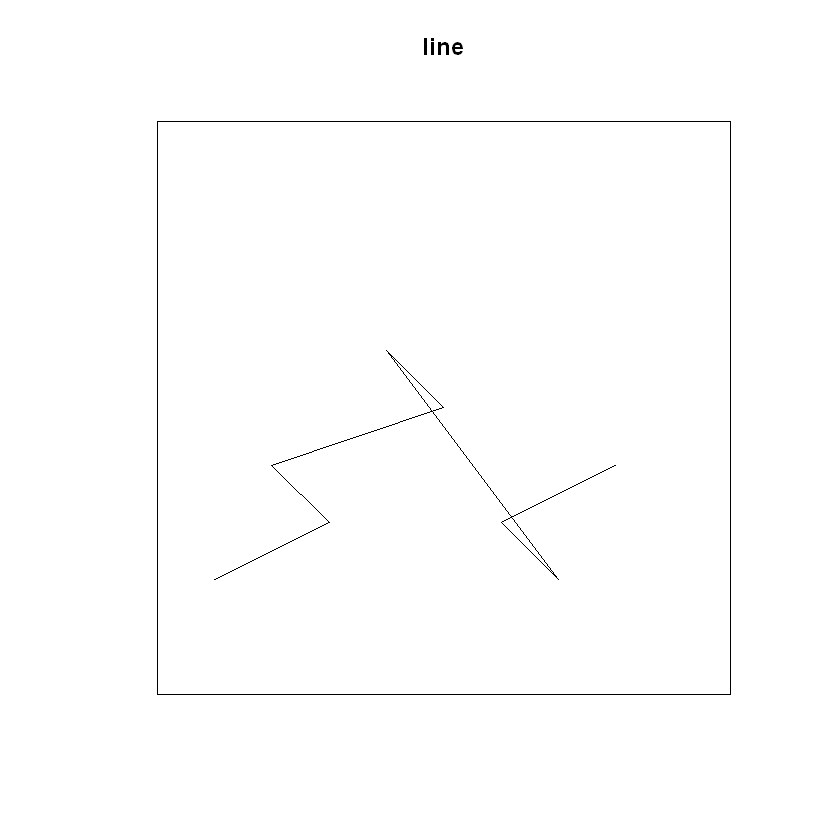

In [14]:
line = psp(c(1, 3, 2, 5, 4, 7, 6), c(2, 3, 4, 5, 6, 2, 3), c(3, 2, 5, 4, 7, 6, 8), c(3, 4, 5, 6, 2, 3, 4), owin(c(0, 10), c(0, 10)))
summary(line)
plot(line)

W pakiecie spatstat klasa owin pozwala na utworzenie wielokątów. Jej konstruktor umożliwia stworzenie jednego z trzech typów obiektów - rectangle (prostokąta), polygon (wielokąta), binary mask (binarny obraz okna). Klasa ta stworzona została głownie do tworzenia okien (window), na co sugeruje jej nazwa i oraz dane zamieszczone w dokumentacji.

Obiekty owin pozwalają tworzyć dowolne kształty. Metody tej klasy zawierają poza metodami nadrzędnej klasy ppp, funkcje odnoszące się do pól powierzchni reprezentowanych obiektów. Poniżej pokazano sposób tworzenia tego typu obiektów:

[1] 21

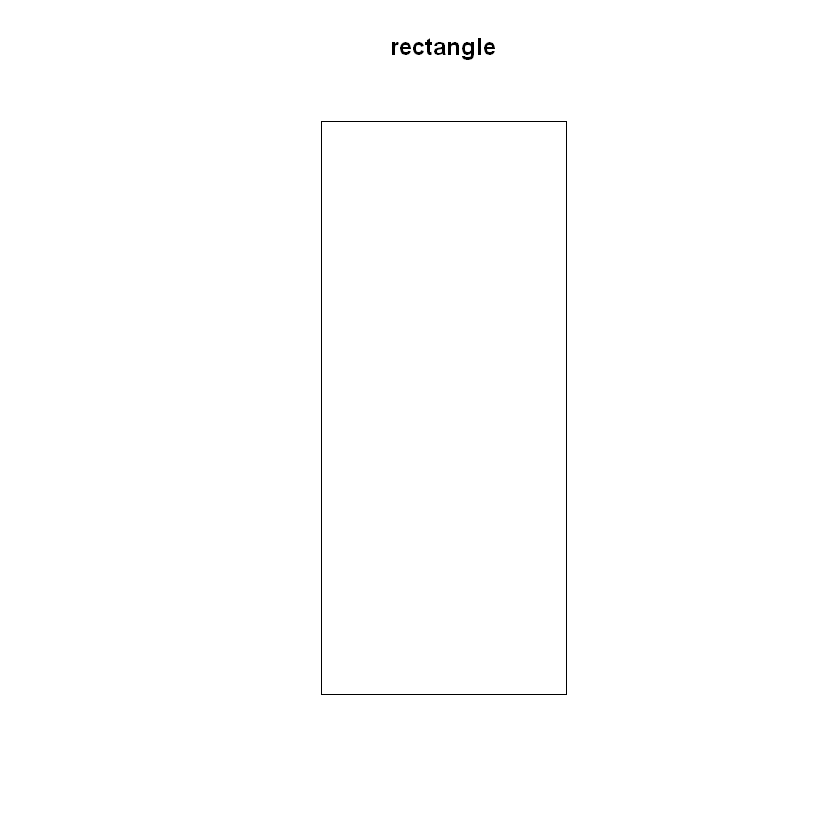

In [15]:
rectangle = owin(c(0,3), c(0,7))
area(rectangle)
plot(rectangle)

[1] 2.5

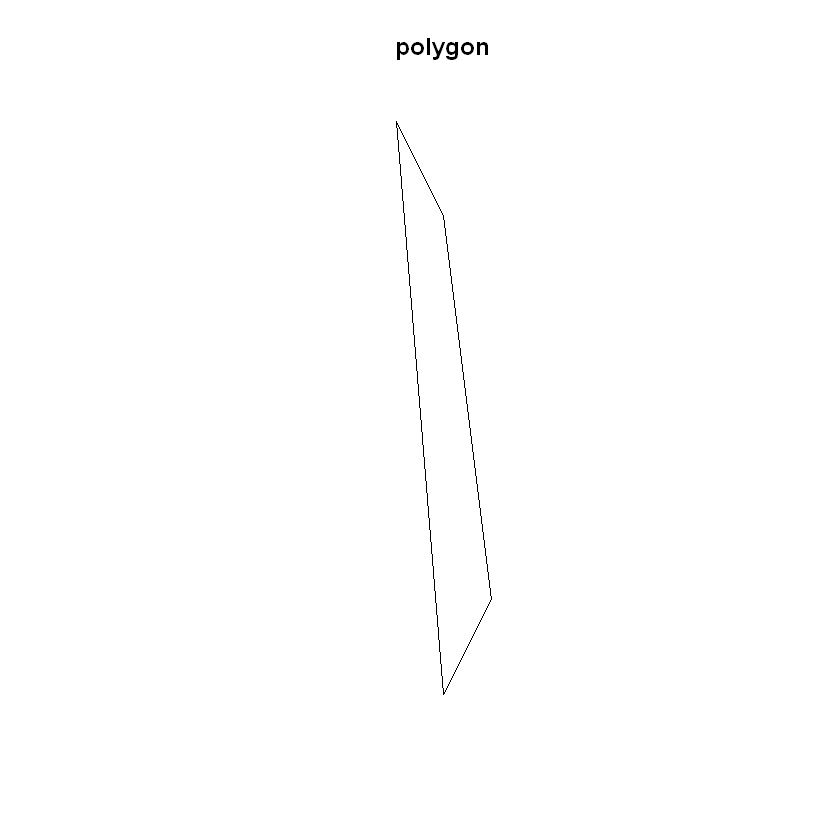

In [16]:
polygon = owin(poly=list(x=c(0.5,1,0.5,0),y=c(0,1,5,6)))
area(polygon)
plot(polygon)

[1] 4

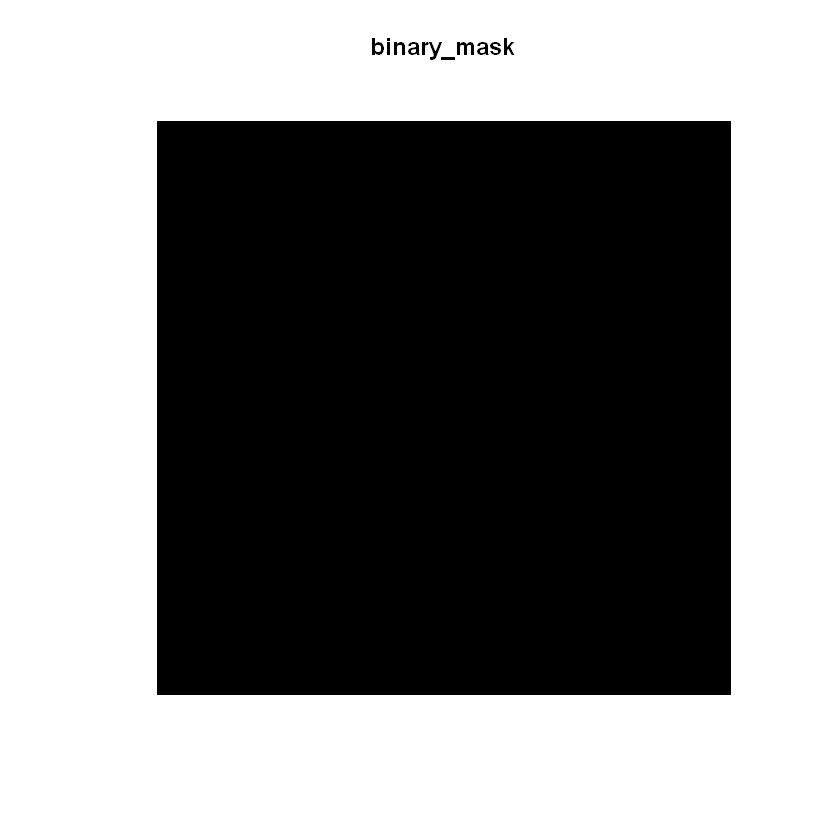

In [17]:
binary_mask = owin(c(-1,1), c(-1,1), mask=matrix(TRUE, 100,100))
area(binary_mask)
plot(binary_mask)

Ostatnią klasą do reprezentacji obiektów przestrzennych jest klasa im. Pozwala ona utworzyć dwuwymiarowy obraz pikseli. Konstruktoe klasy wymaga podania macierzy lub wektora wartości pikseli obrazu. Poza tym możliwe jest opcjonalne dodanie wektorów określających współrzędne siatki pikseli (xcol, yrow) oraz określenie szerokości i długości okna obrazu (xrange, yrange). Poniżej znajduje się przykład użycia funkcji:

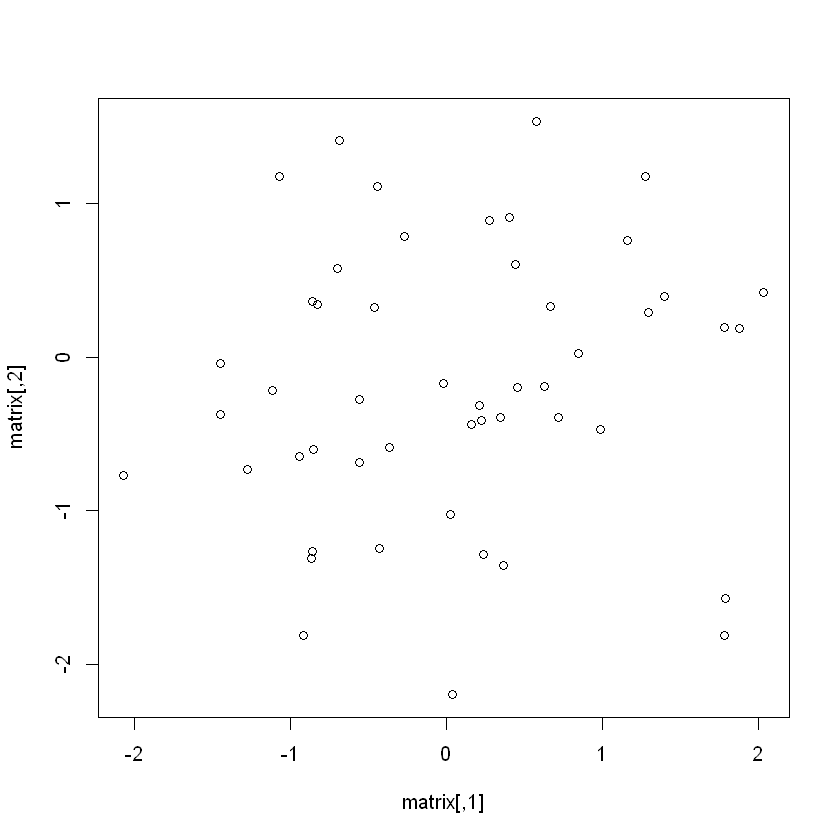

In [18]:
matrix = matrix(rnorm(100), nrow = 50, ncol = 20)
image = im(matrix)
plot(matrix)

        c. Podsumowanie i wnioski.
        
Z przeprowadzonych eksperymentów i analizy dokumentacji wynika, że możliwości reprezentacji danych w pakiecie sp są znacznie szersze niż w przypadku spatstat. Powodem tegoż jest fakt, iż bibliotek sp oparta jest na bardziej złożonym systemie klas S4. Pozwala ona poza standardowymi obiektami typu punkty, łamane i wielokąty na reprezentacje siatki, a także grup wielokątów. Ponadto możliwa jest reprezentacja danych więcej niż dwuwymiarowych, czego nie oferuje spatstat. Samo tworzenie obiektów jest zbliżone i zazwyczaj ogranicza się do podania współrzędnych odpowiednich punktów. Bardziej przyjazny wydaje się tutaj spatstat, gdyż nie trzeba łączyć punktów w macierze lub hipermacierze. Jednakże z tegoż ułatwienia wynika niemożność reprezentacji danych wielowymiarowych. Wadą tej biblioteki jest także konieczność podawania okna, w którym zawarte są punkty, podczas gdy w drugiej to okno dobierane jest automatycznie jako mbb (minimal bounding box). Jest to szczególne utrudnienie w przypadku reprezentacji punktów, których współrzędne nie są znane przez programistę. Warto tutaj również wspomnieć o wcześniej już przytoczonym wniosku odnośnie tworzenia łamanych, który jest znacznie logiczniejszy dla użytkownika wykorzystując pakiet sp. Tworząc obiekt Line nie musimy powtarzać współrzędnych będących konicem jednej lini i początkiem kolejnej. Segmenty poszczególnych łamanych mogą być natomiast łączone za pomocą obiektu Lines. W spatstat wszystko jest zrealizowane przez jedną dużo mniej intuicyjną funkcję psp. Ponadto sposób tworzenia linii jest bardzo podobny do tworzenia wielokątów co przemawia na korzyść pakietu sp.

Pod względem wizualizacji oba pakiety mają własną wersję funkcji plot() - spplot() i plot.ppp(). Wizualizacja za pomocą obu pakietów jest przejrzysta i intuicyjna. Przy wizualizacji należałoby porównać czas wykonania wywołania funkcji plot co zostanie przeprowadzone w kolejnym punkcie.

    5.2 Wydajność wizualizacji tworzonych prostych obiektów

Zgodnie z planem eksperymentów zostanie tutaj zmierzony czas wyświetlania danych przestrzennych utworzonych za pomocą porównywanych bibliotek. Do porównania czasów wykorzystana tutaj będzie funkcja microbenchmark.

In [19]:
library(sp)
library(spatstat)
library(microbenchmark)

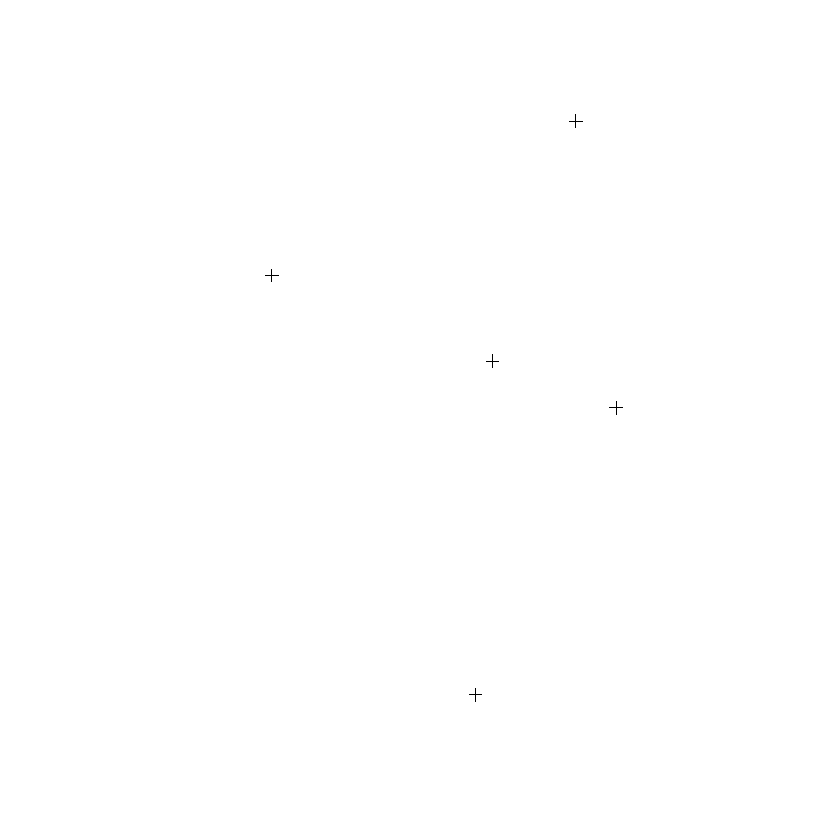

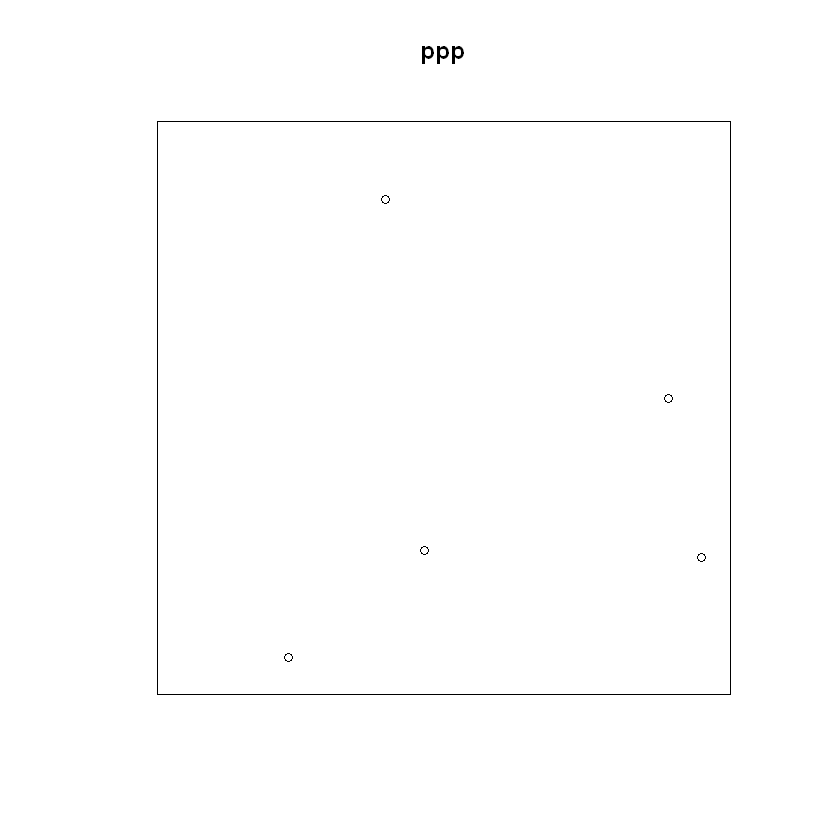

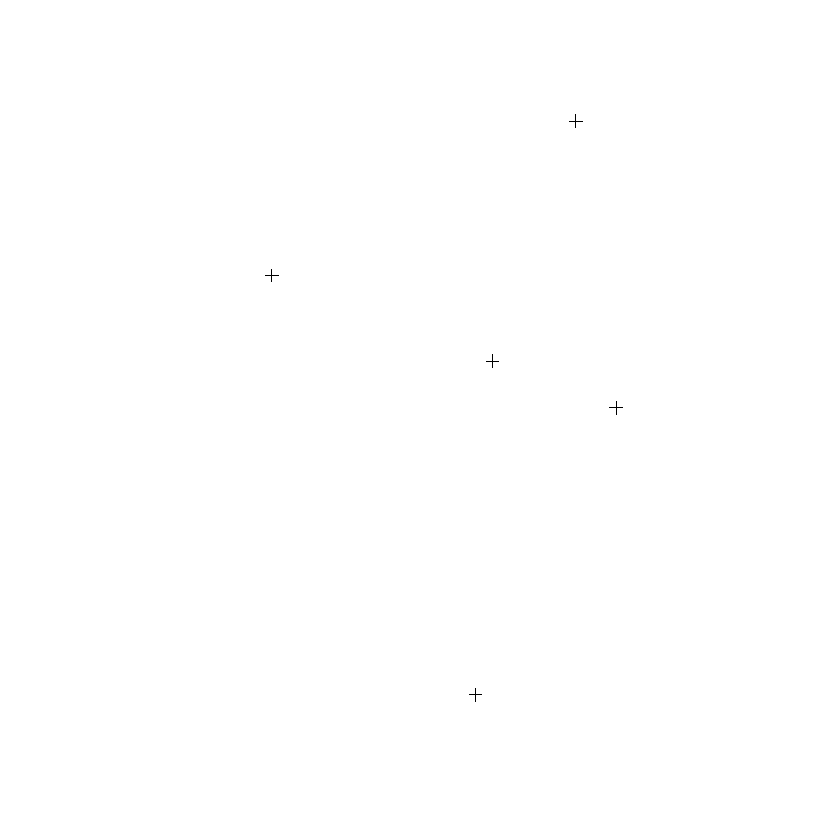

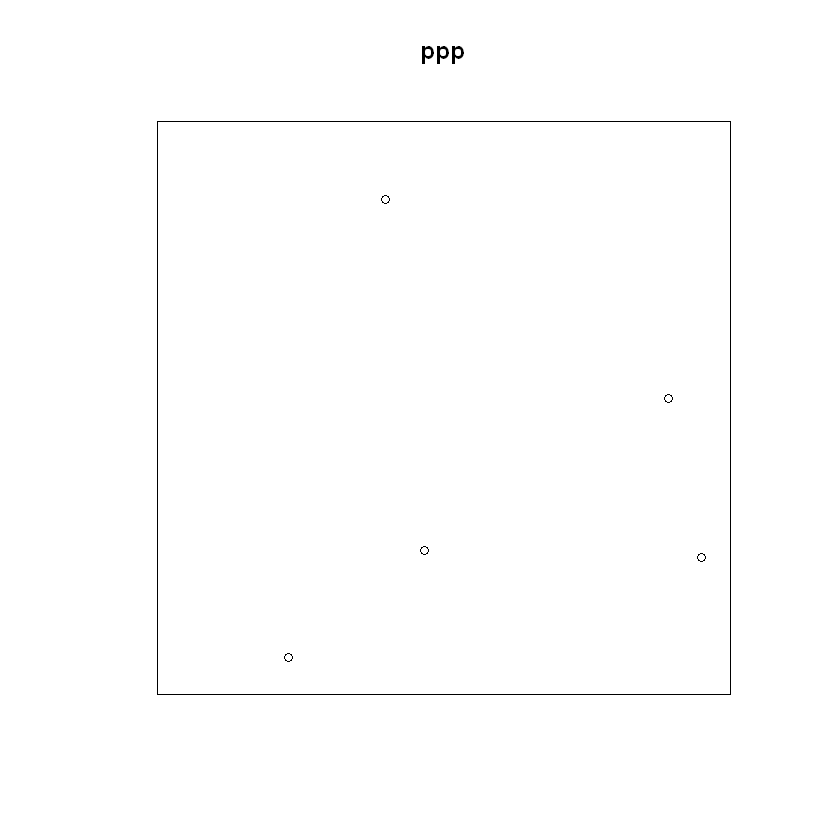

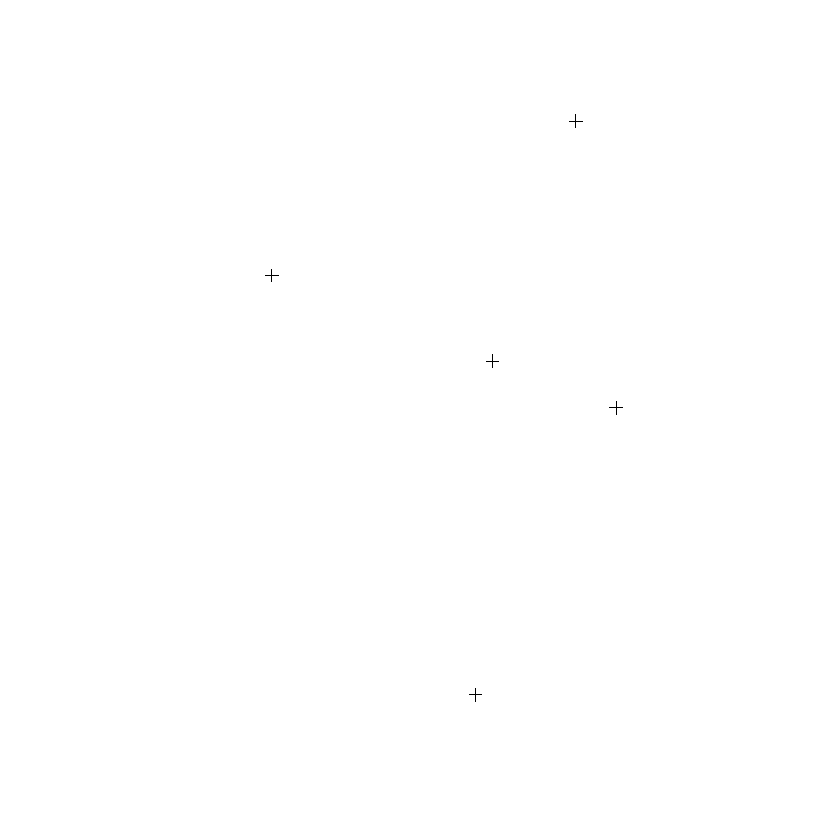

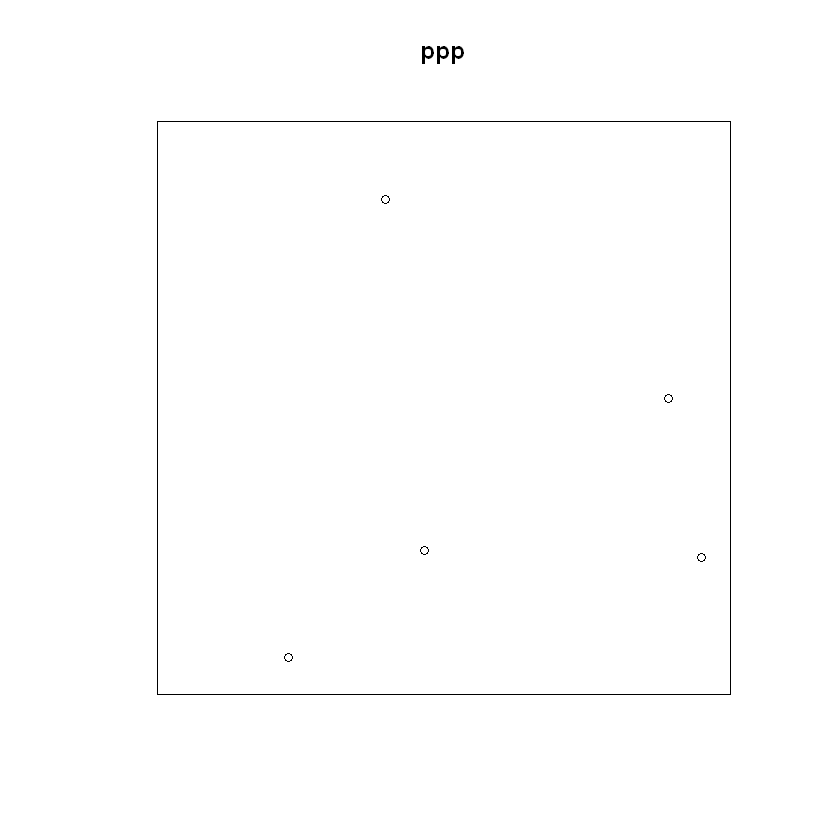

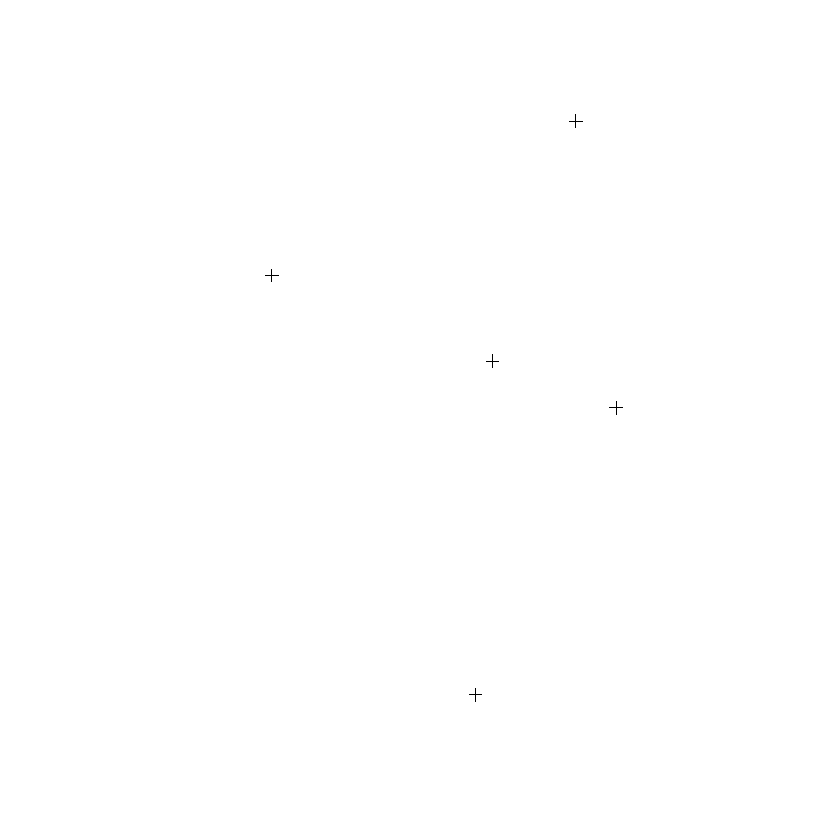

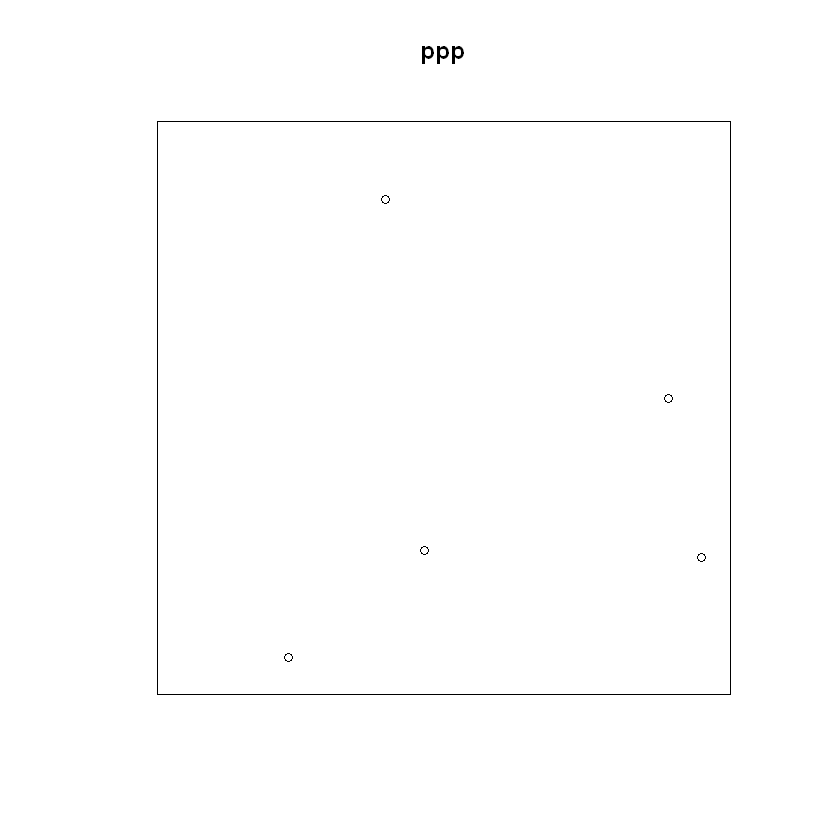

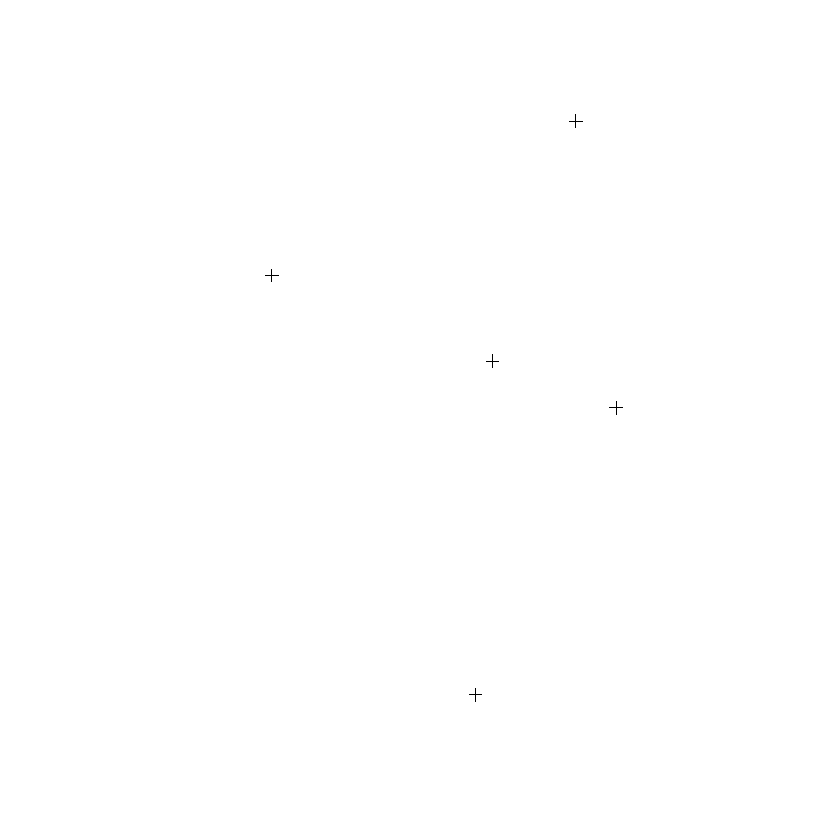

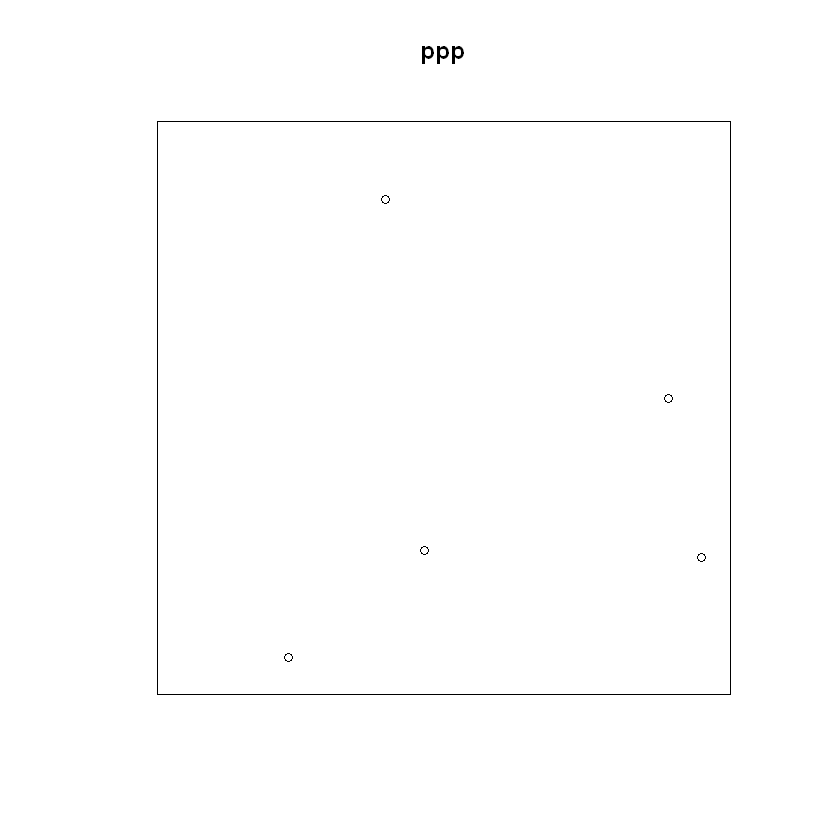

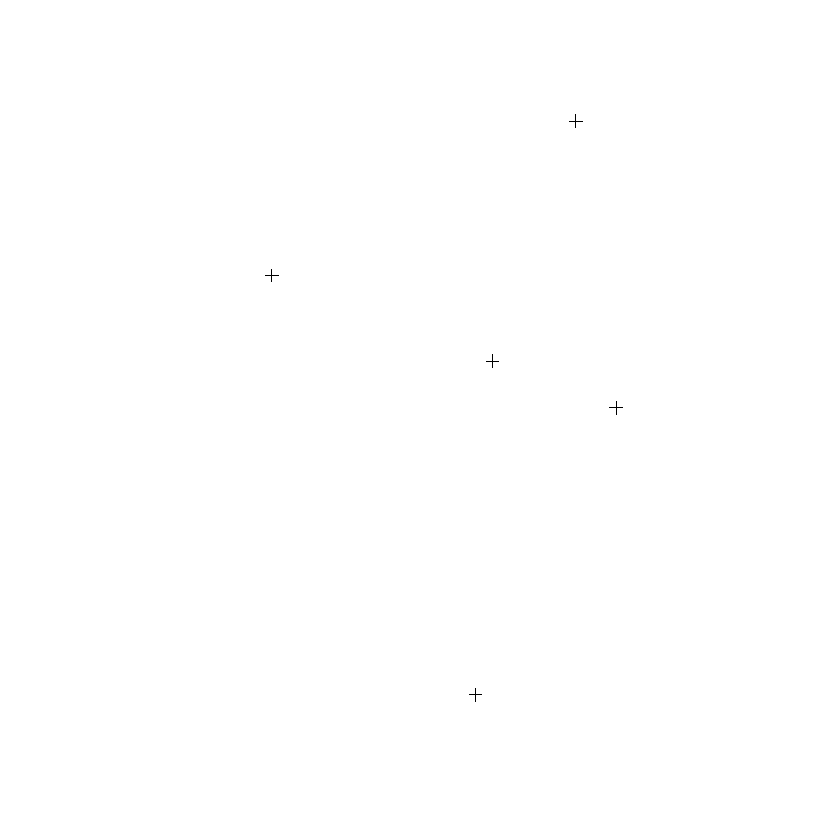

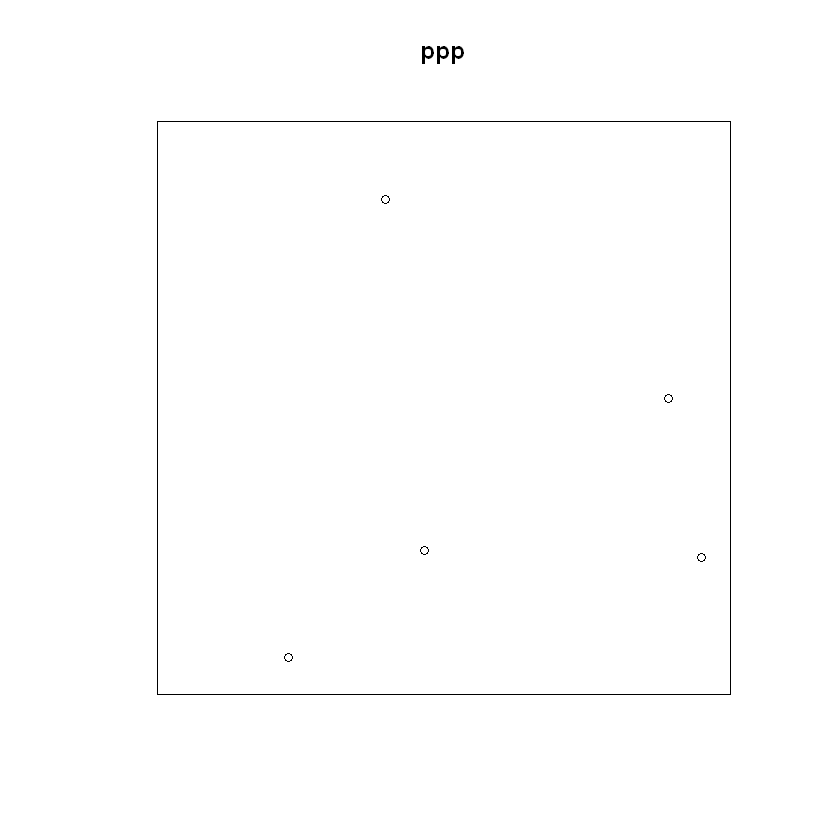

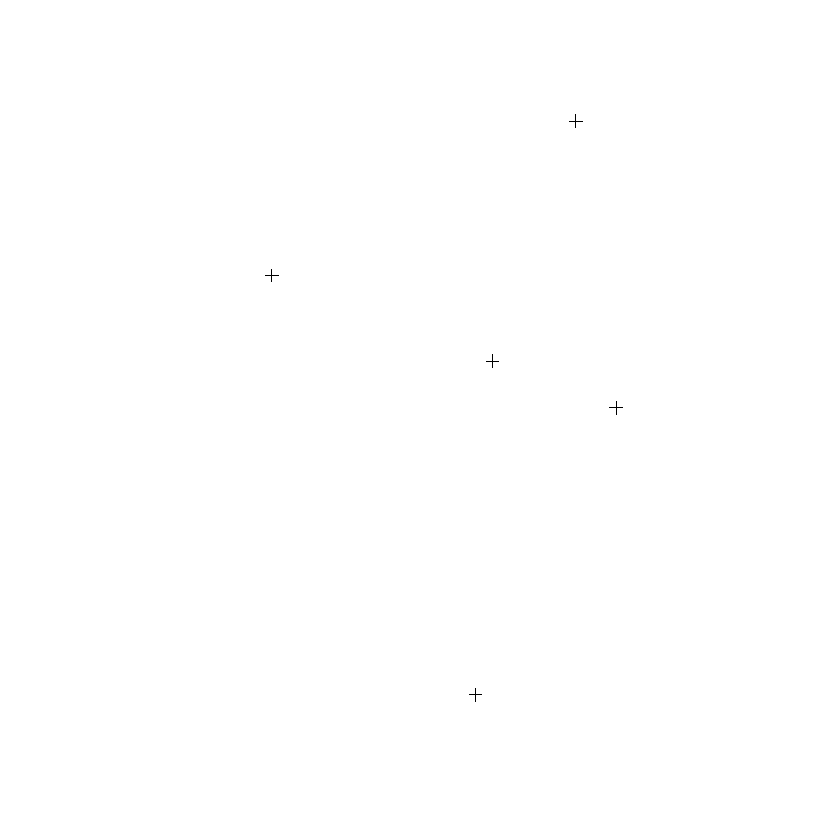

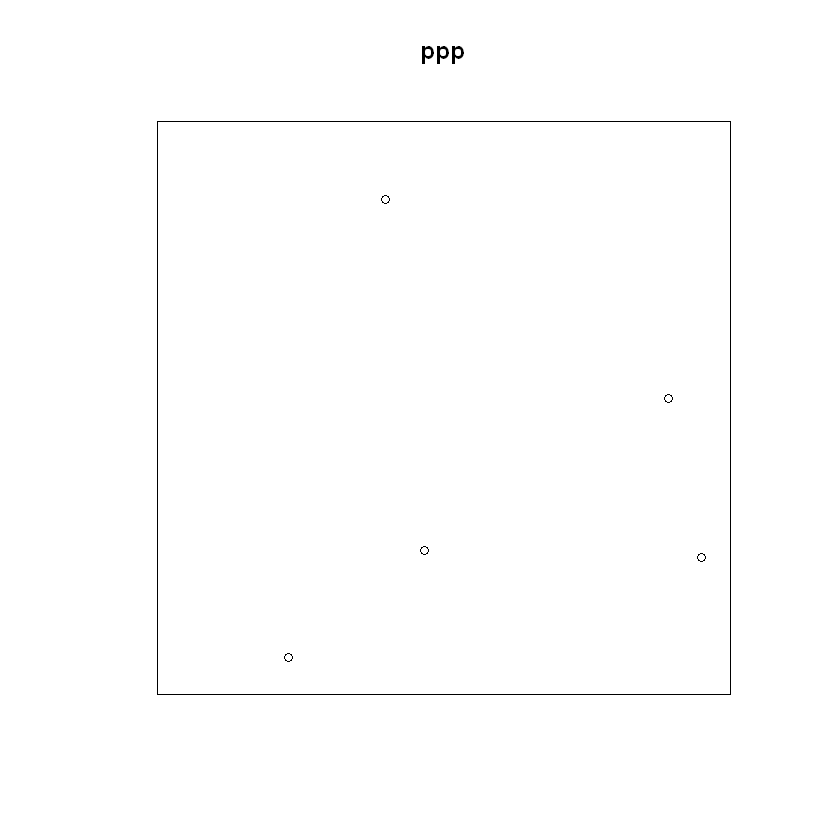

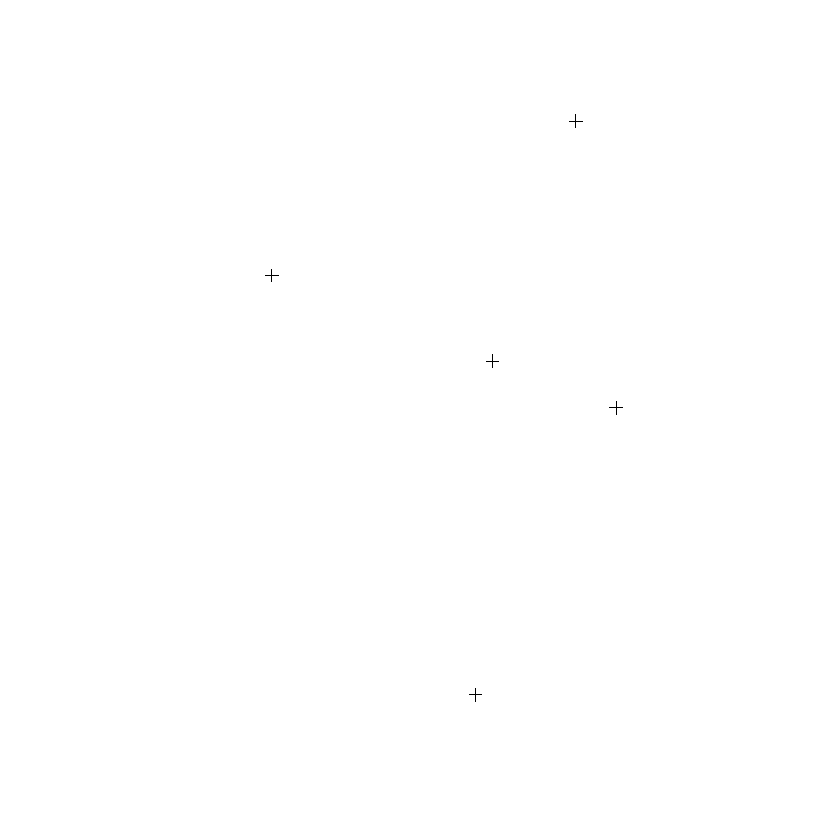

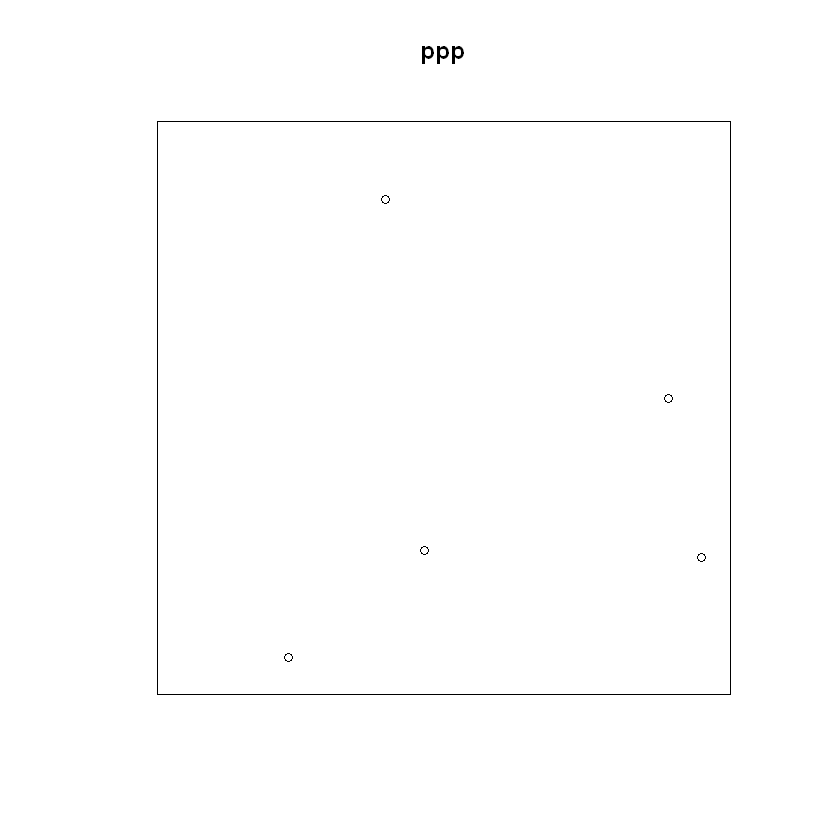

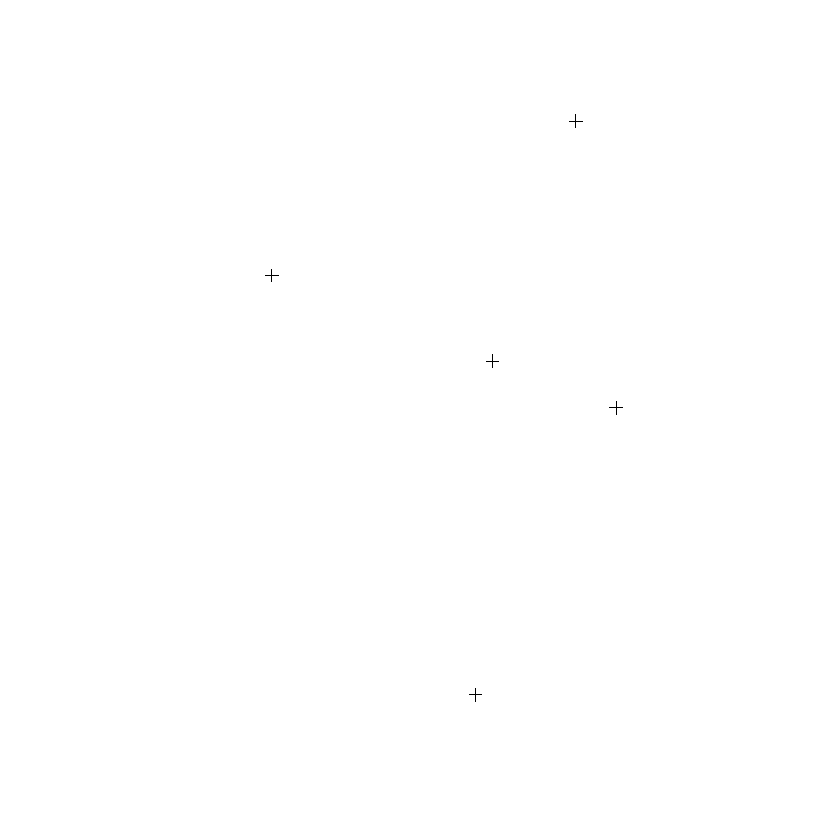

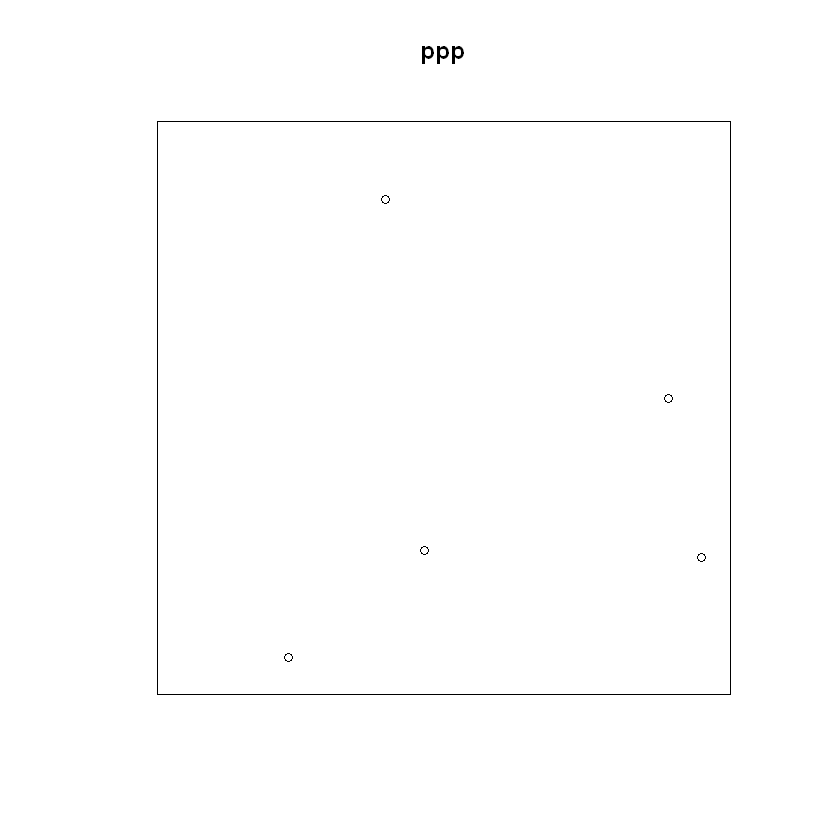

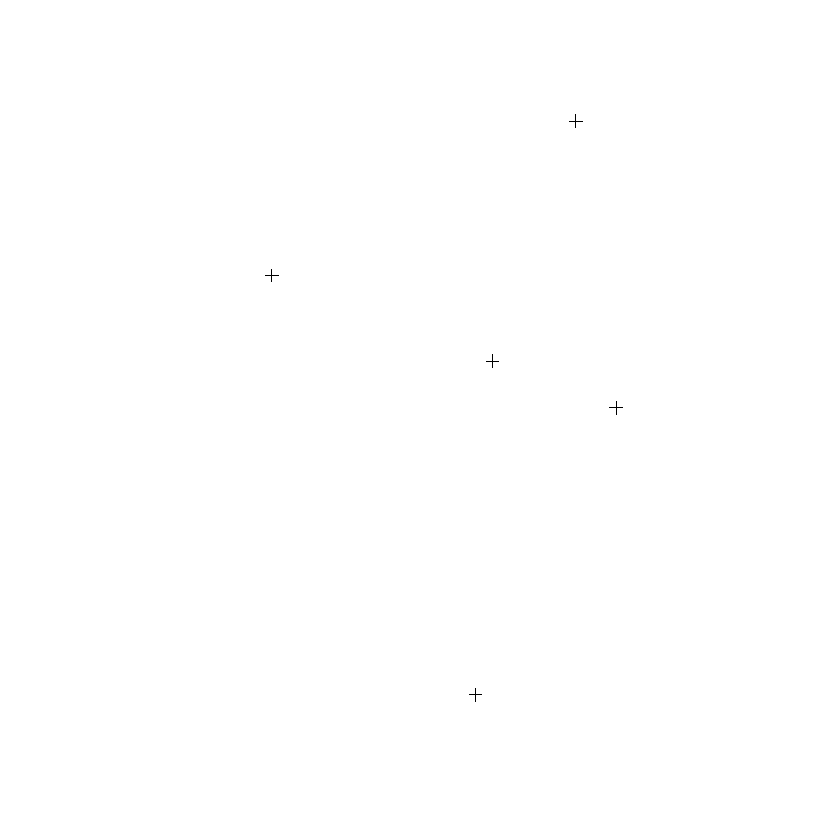

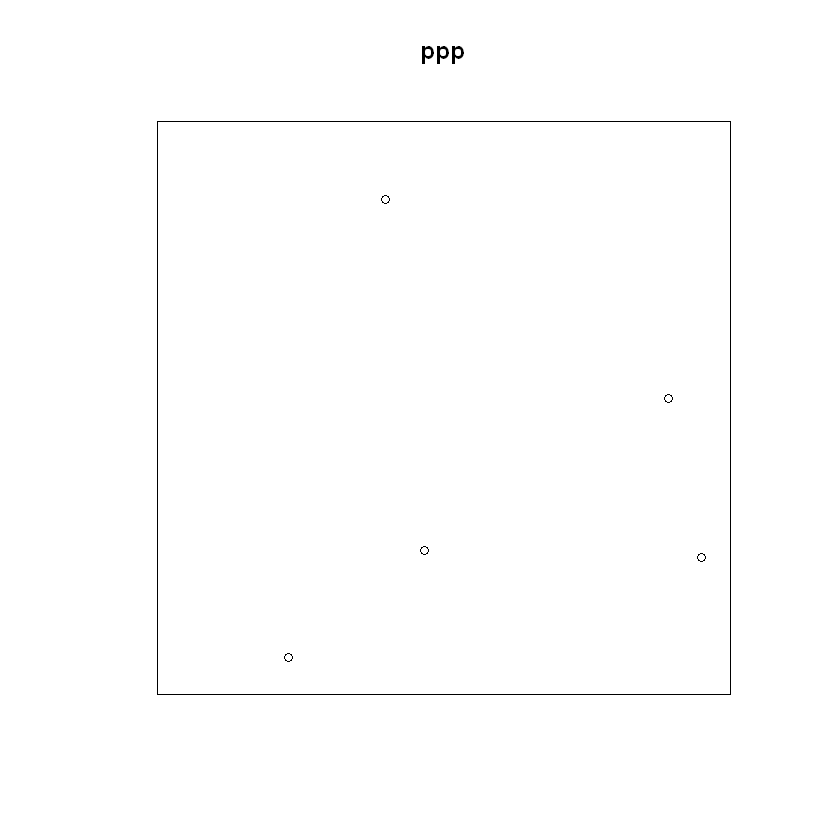

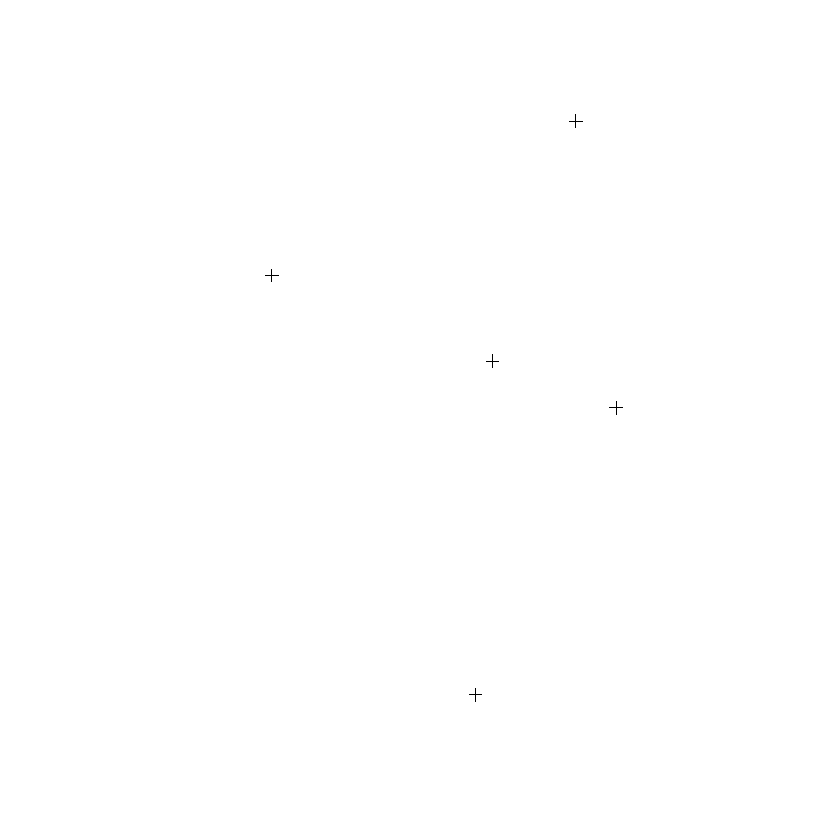

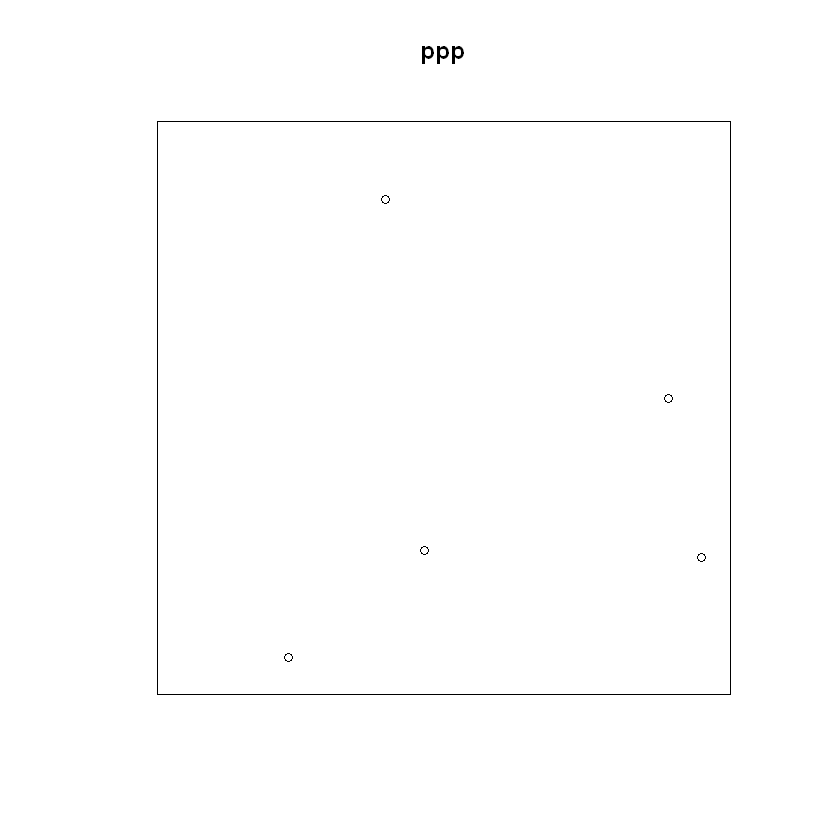

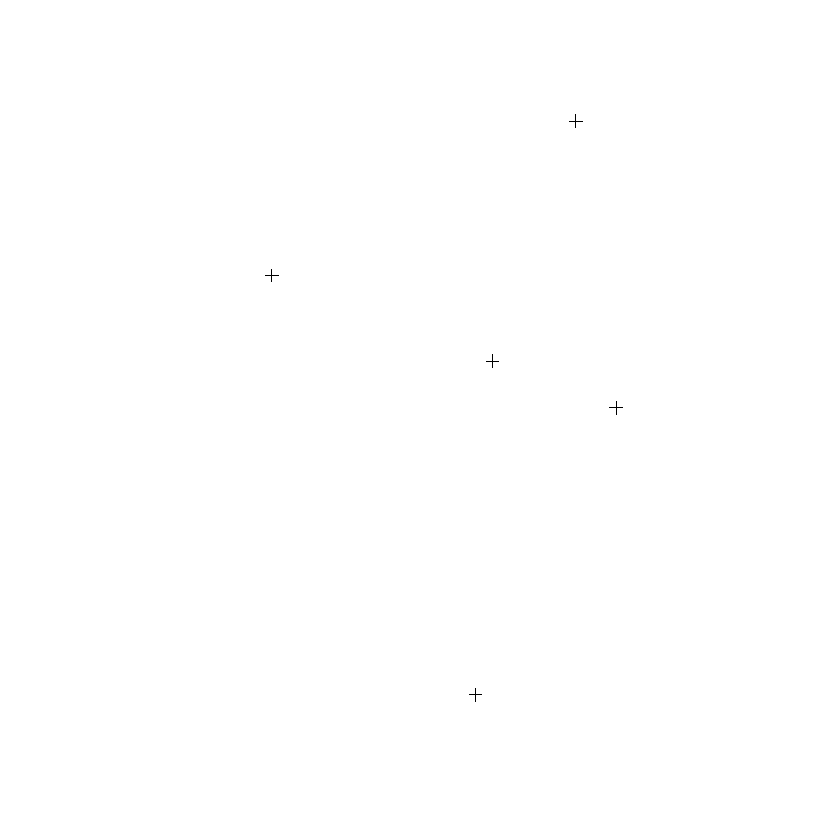

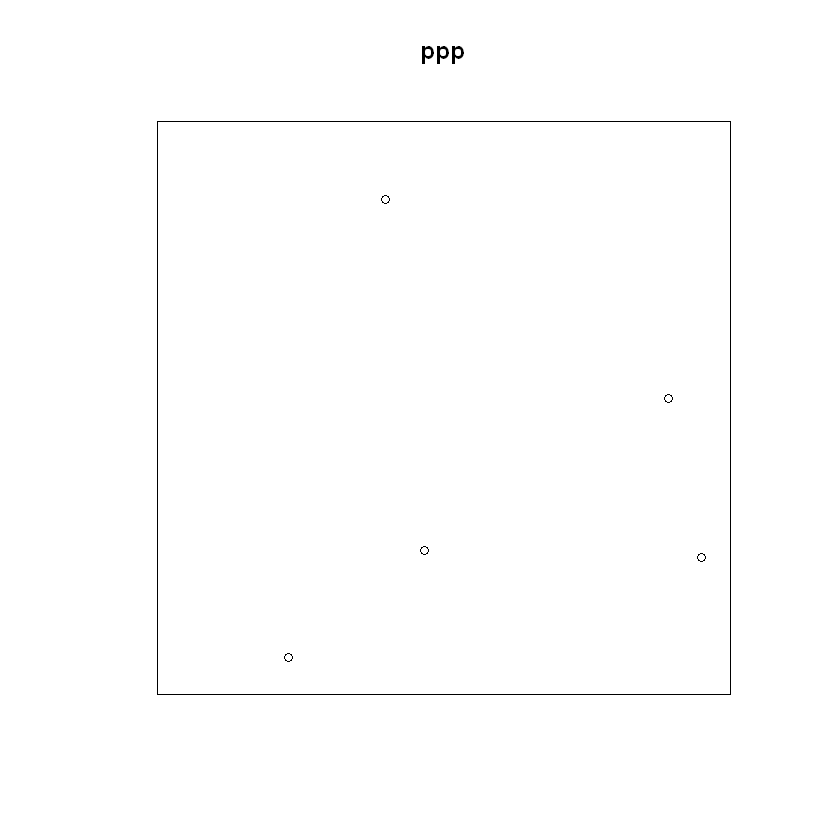

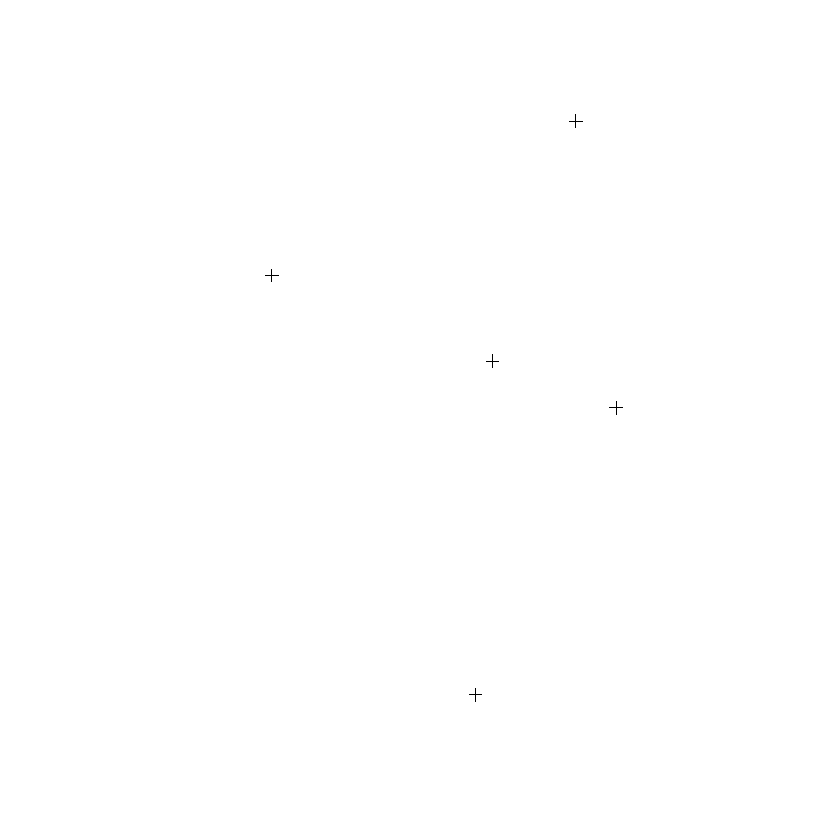

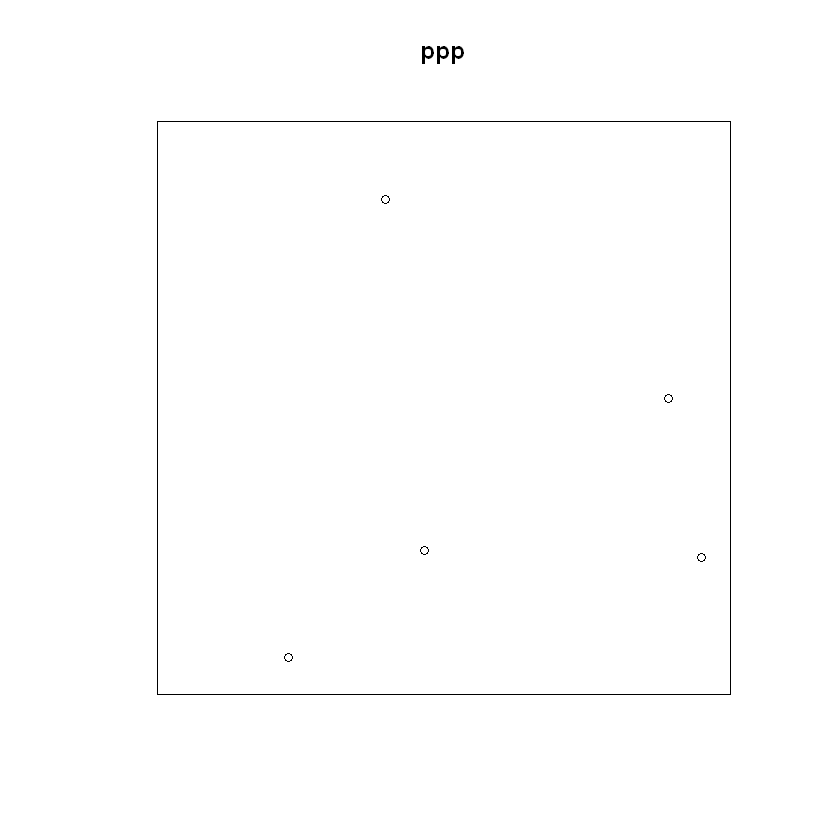

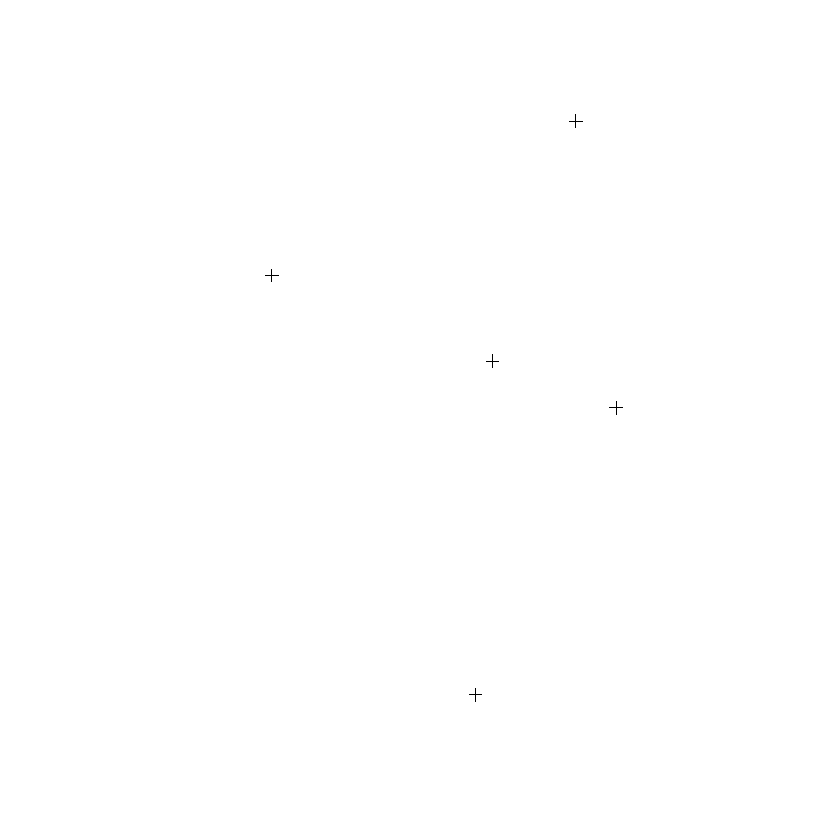

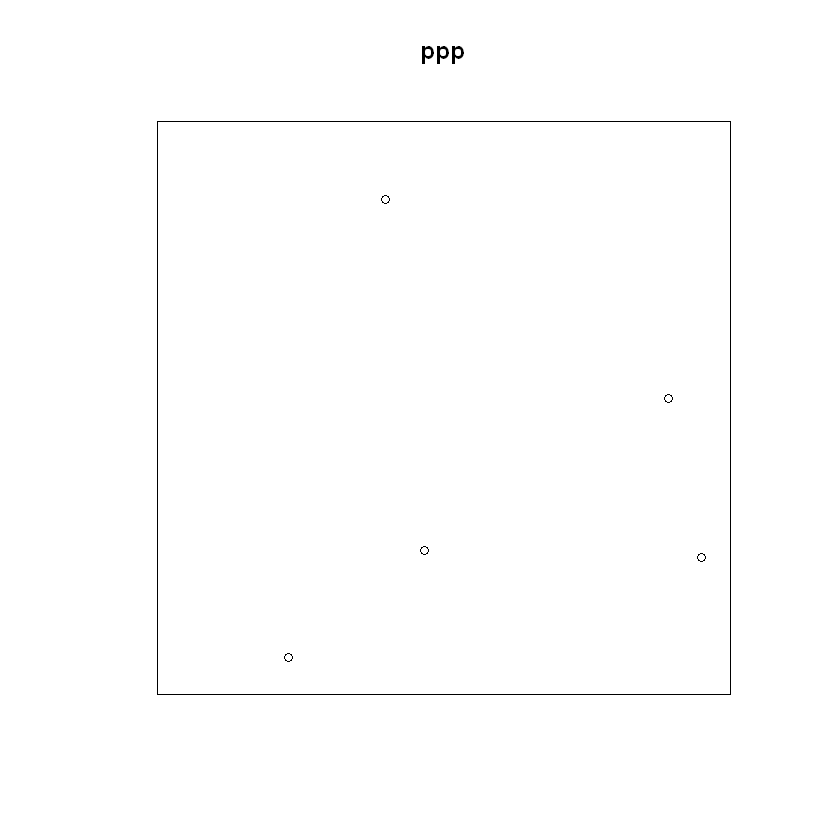

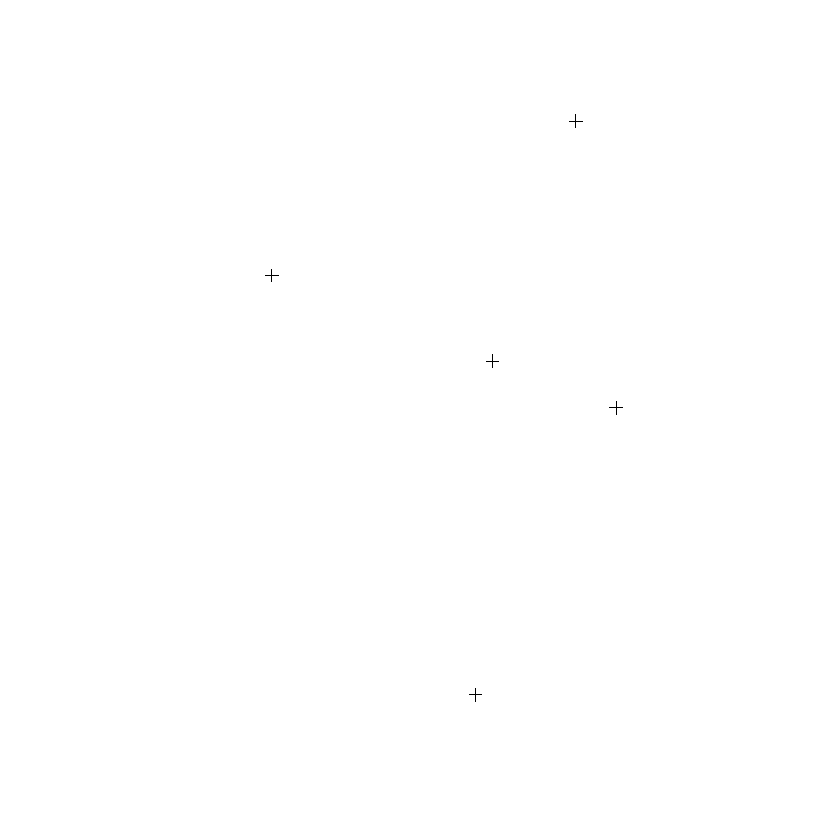

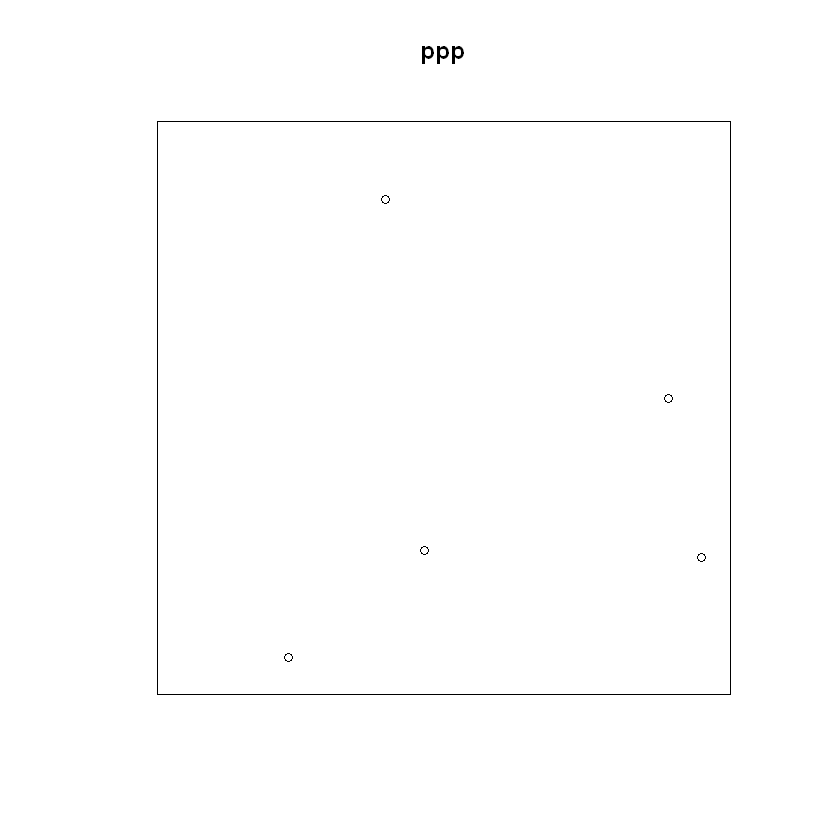

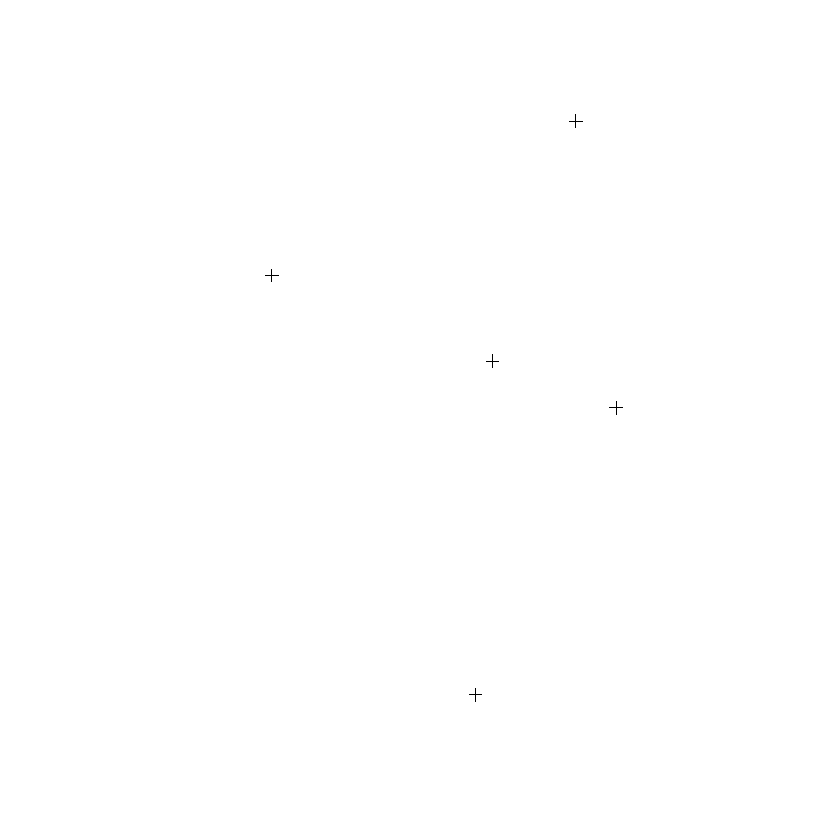

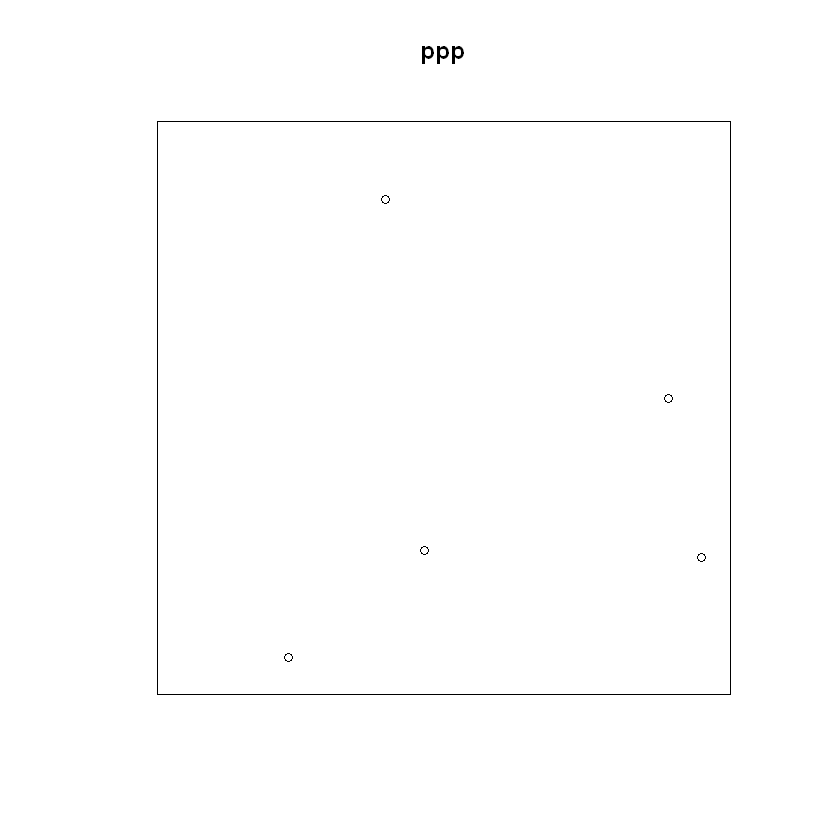

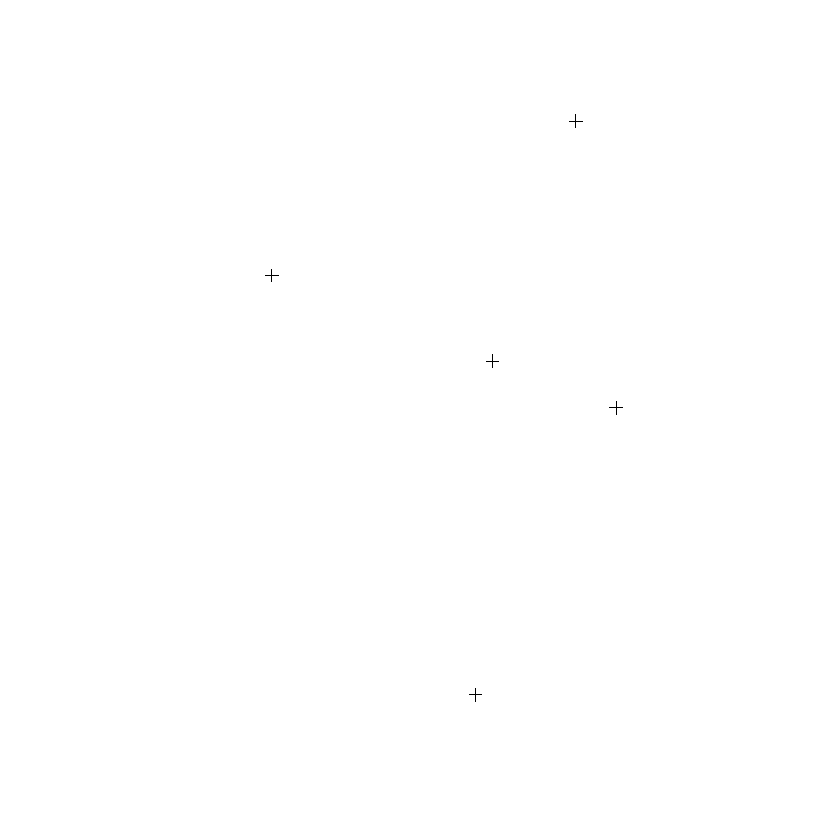

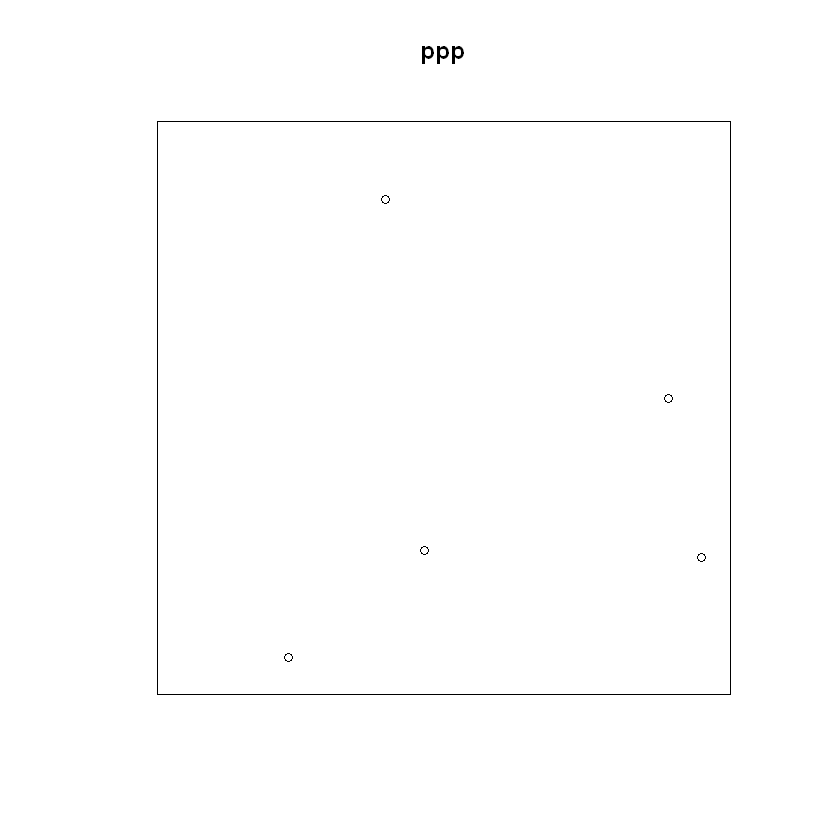

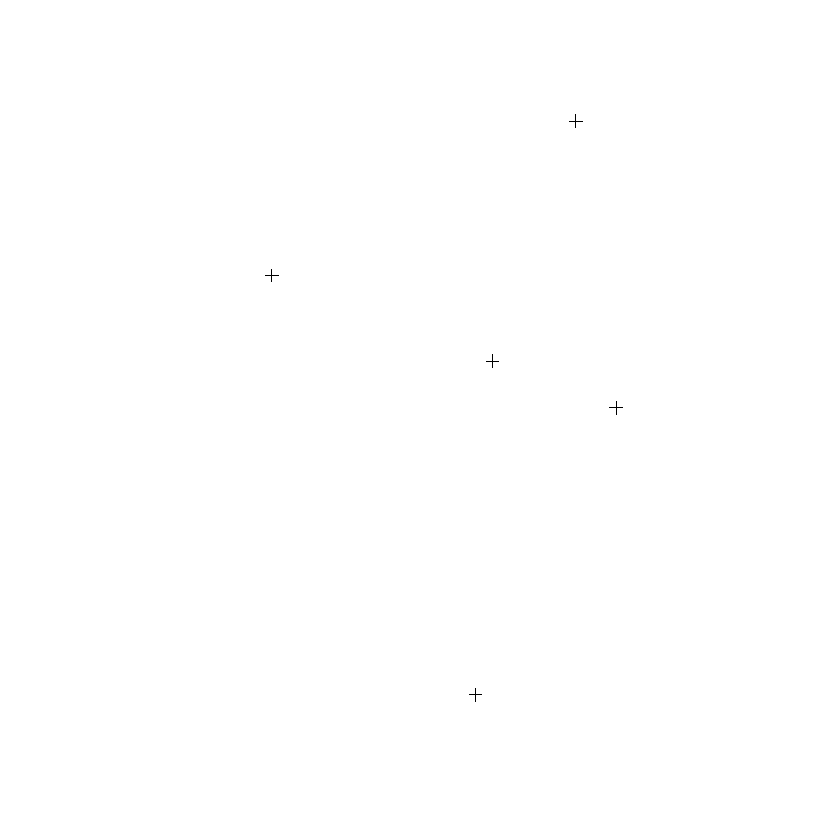

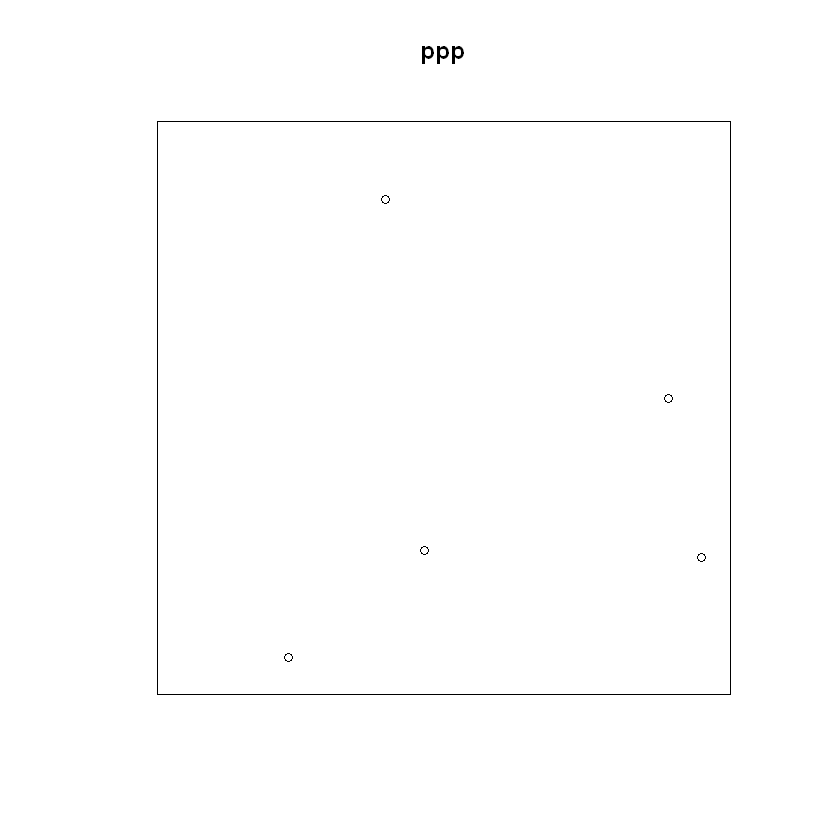

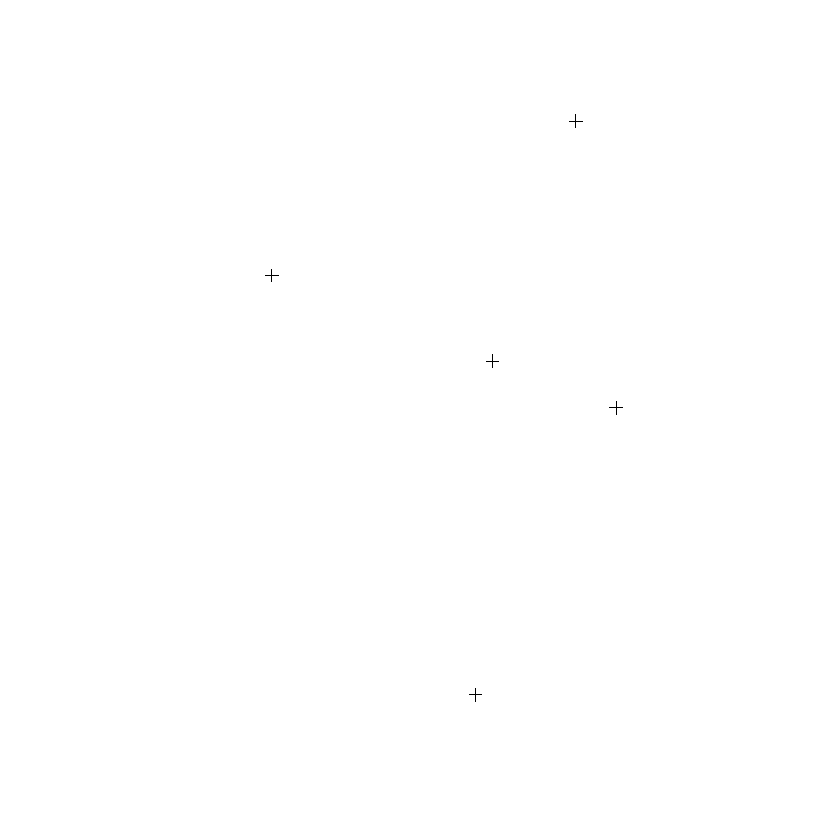

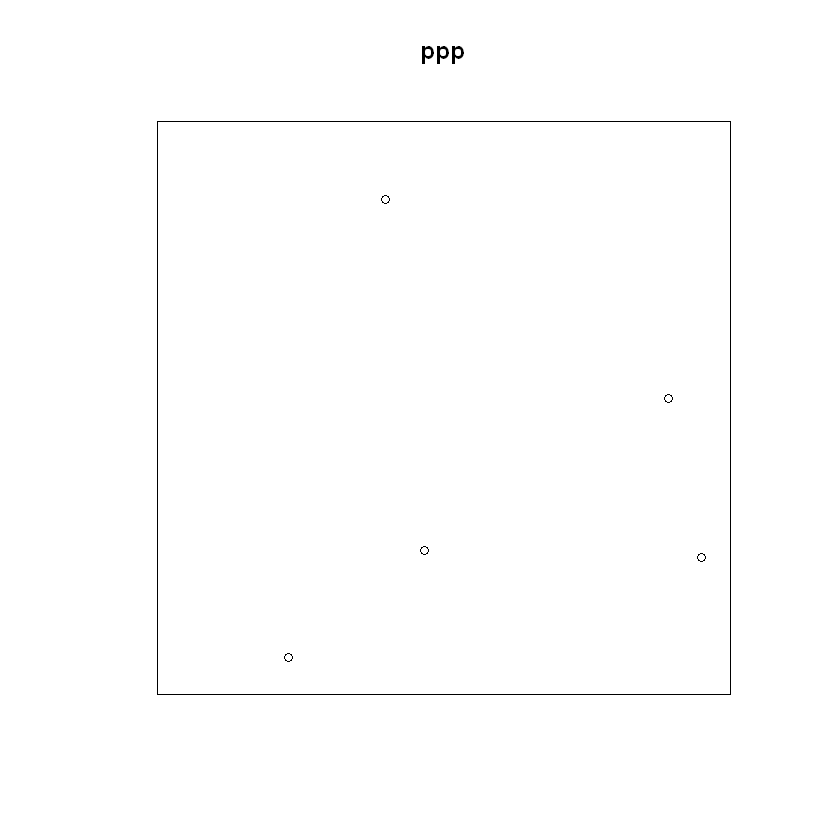

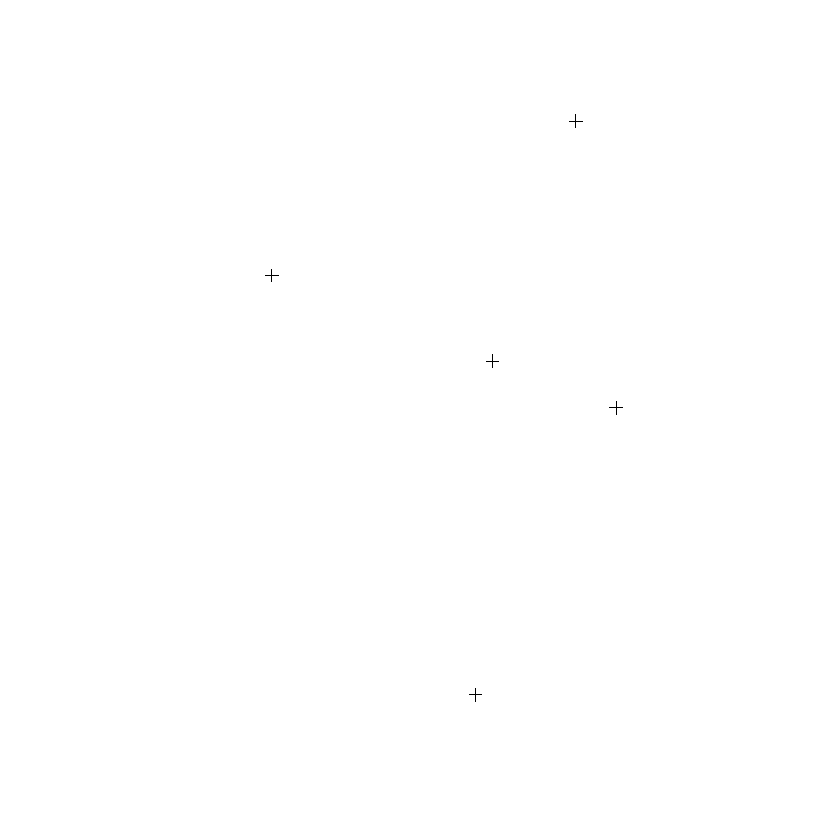

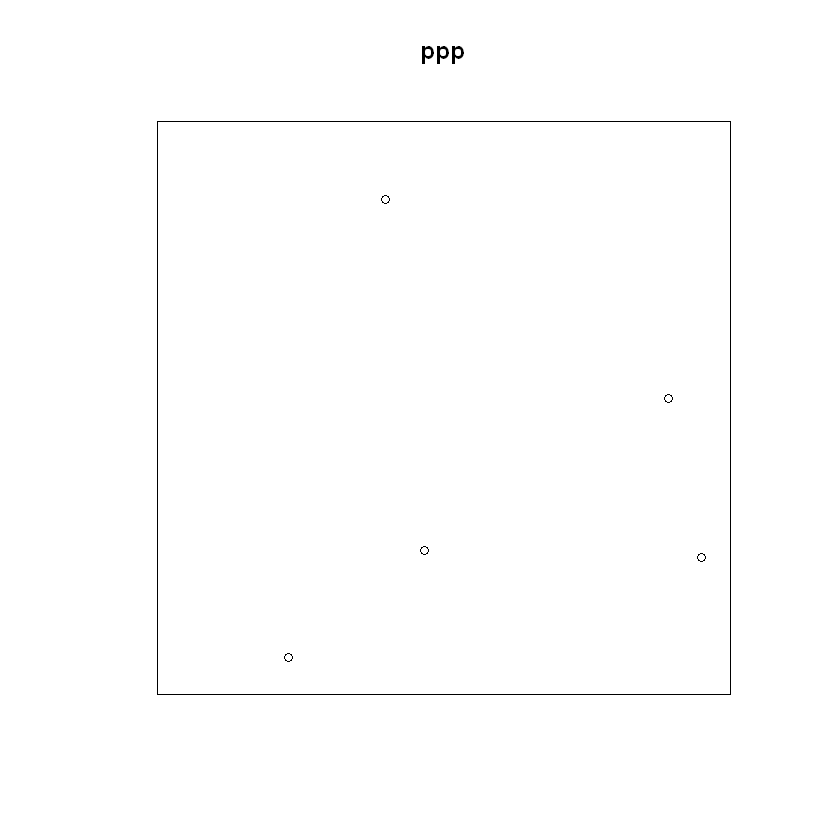

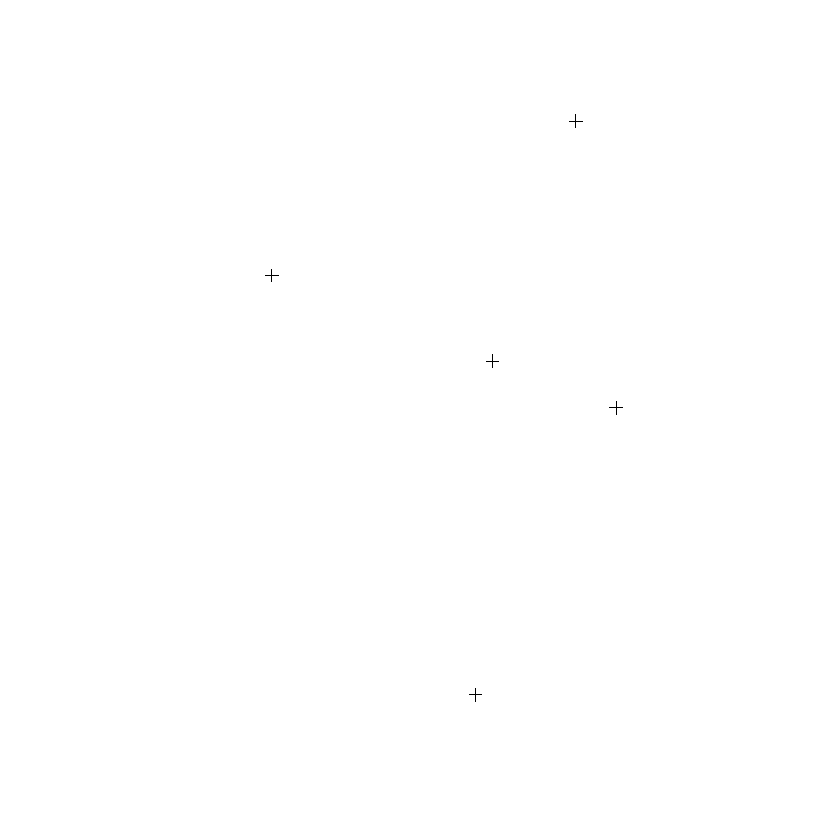

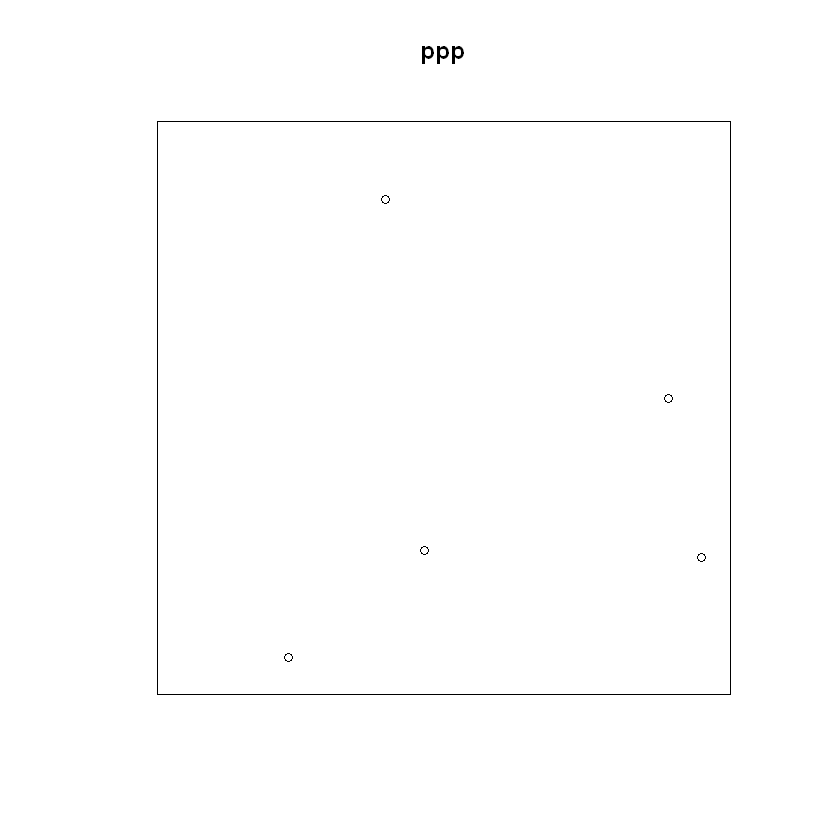

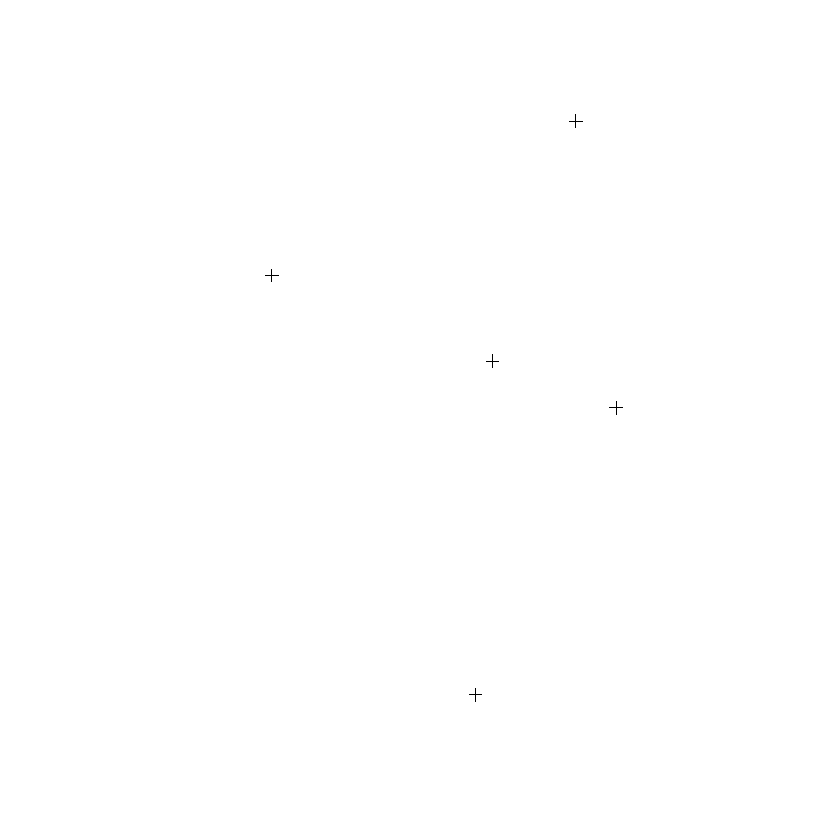

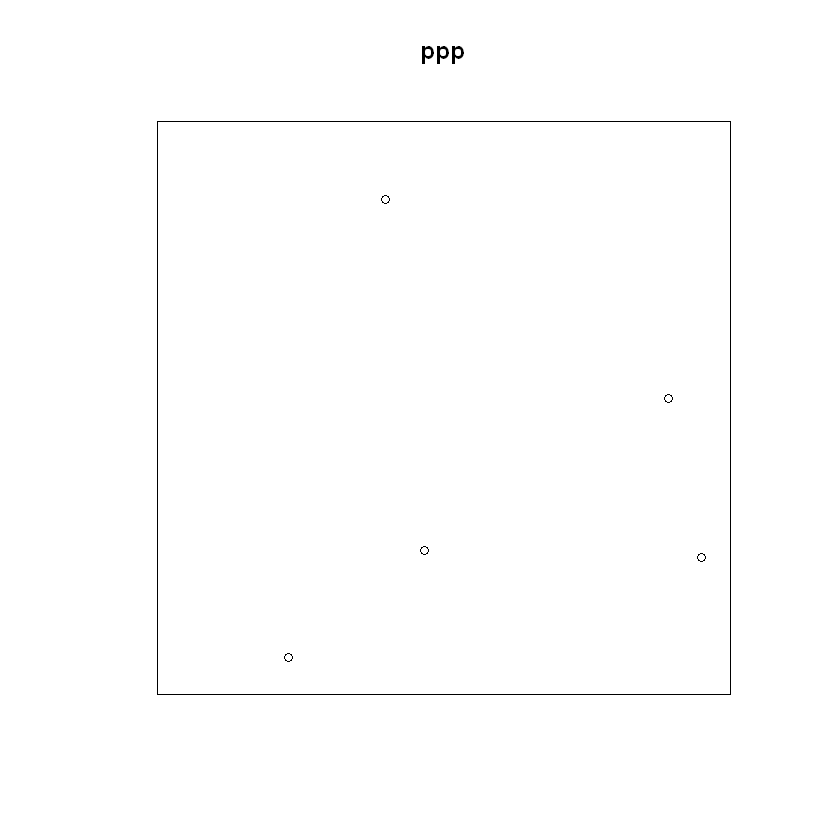

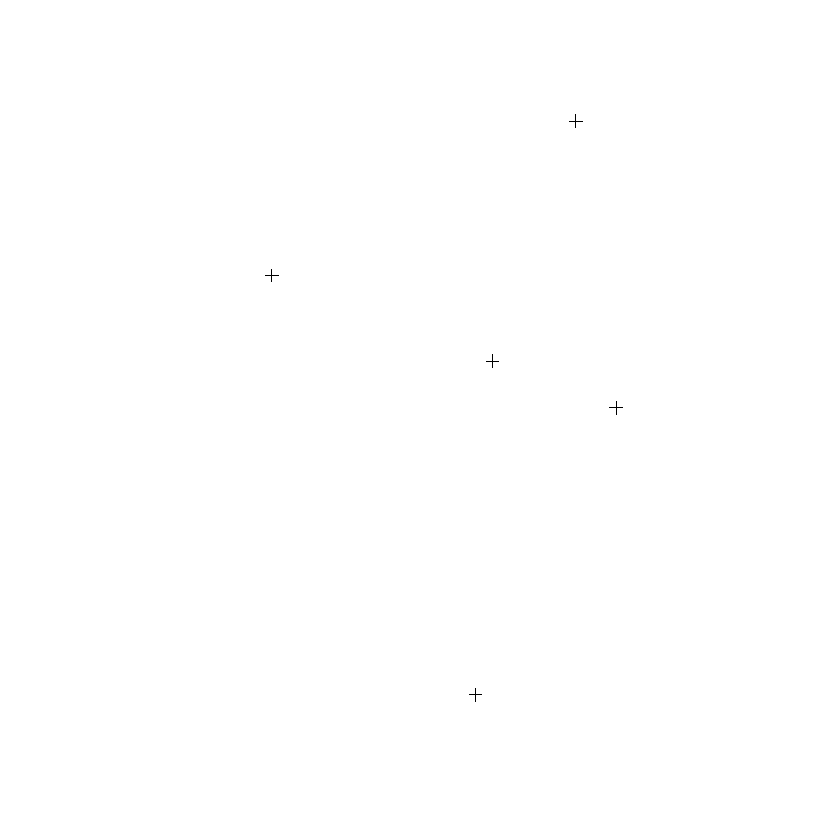

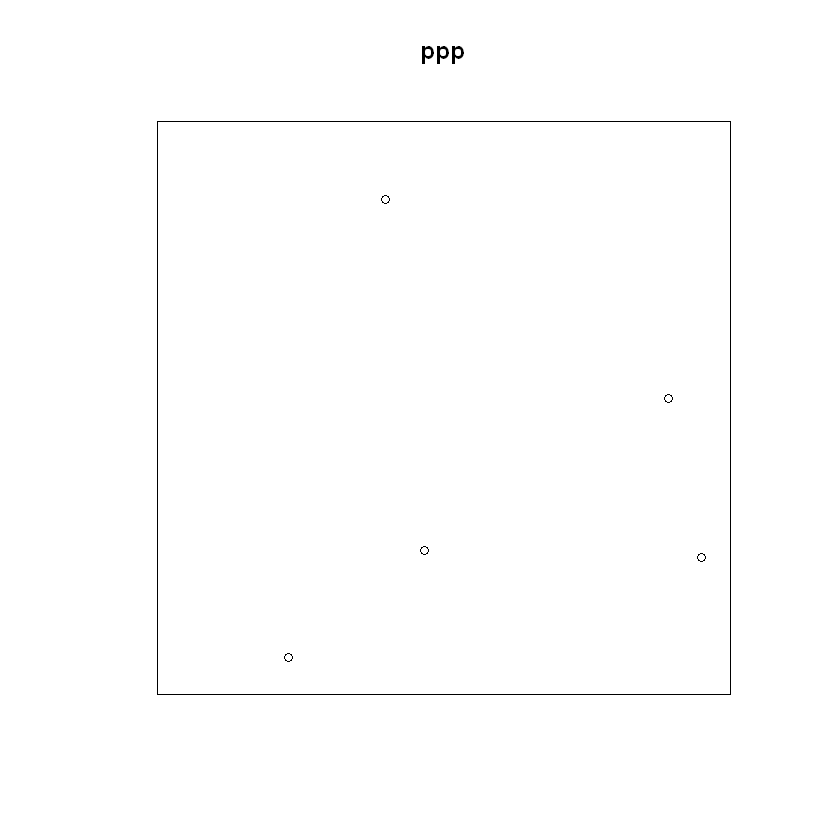

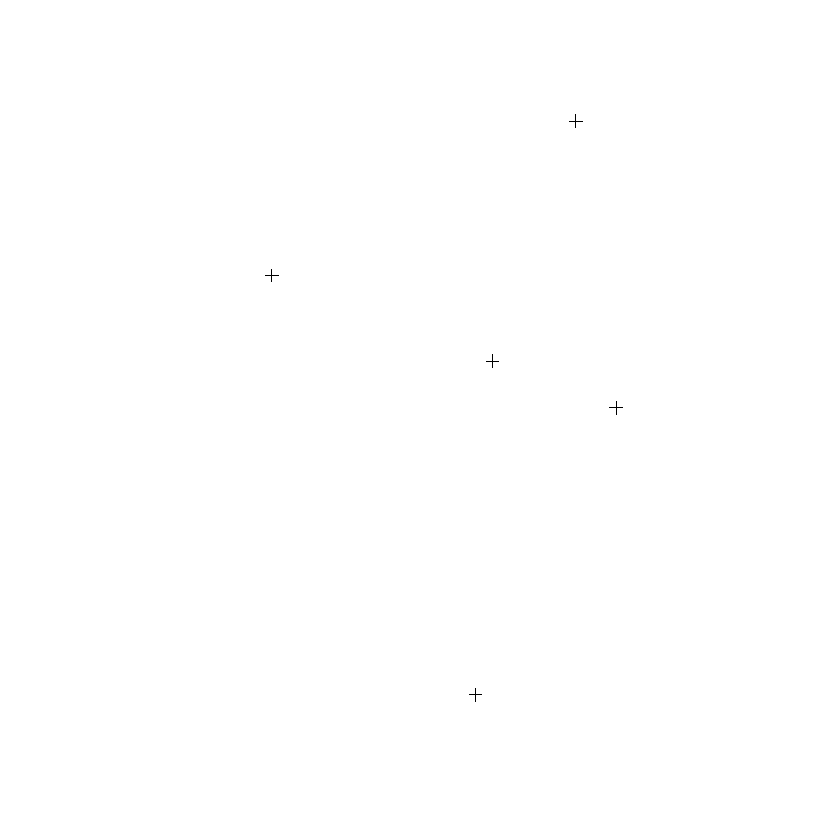

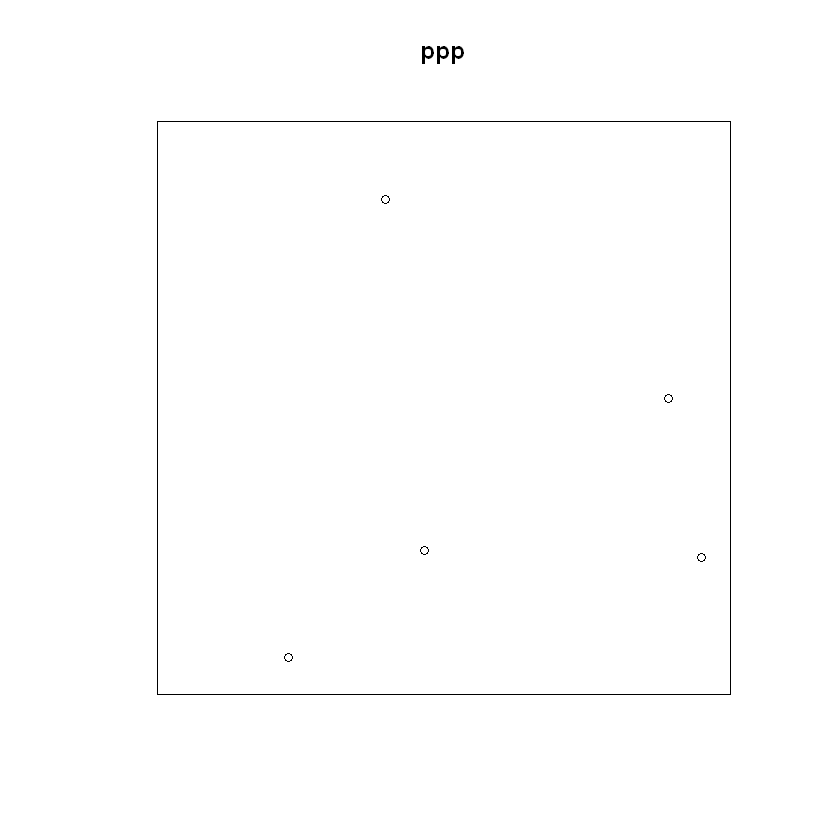

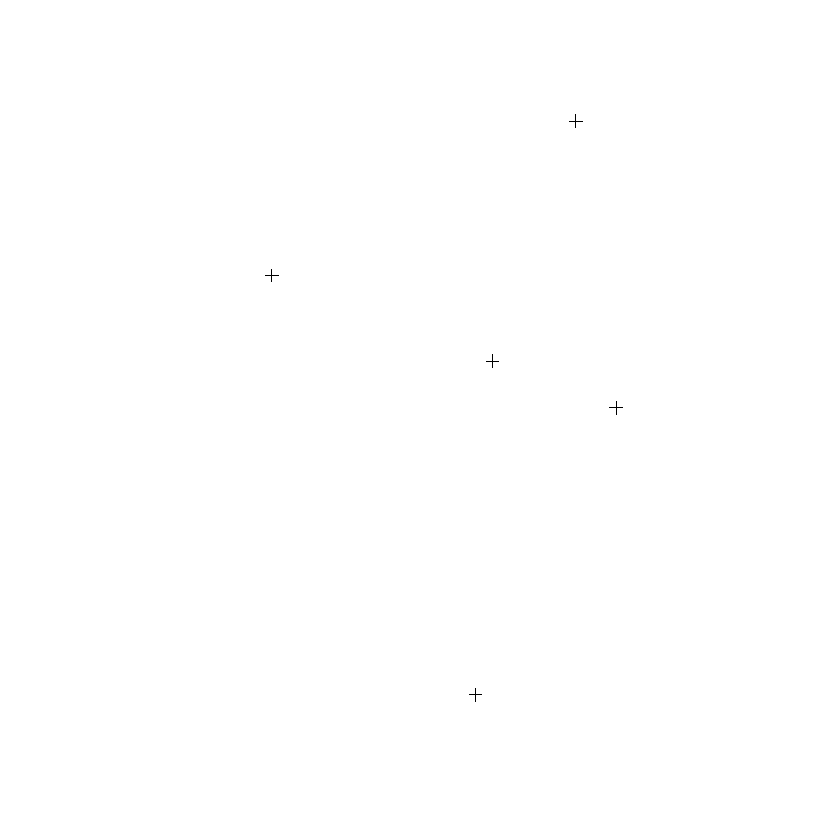

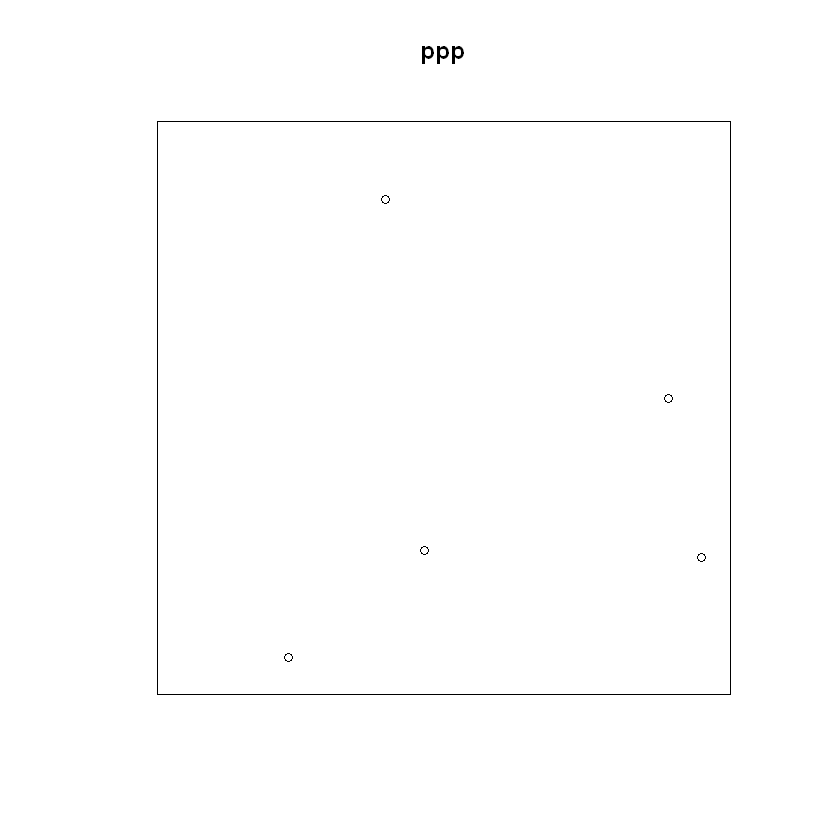

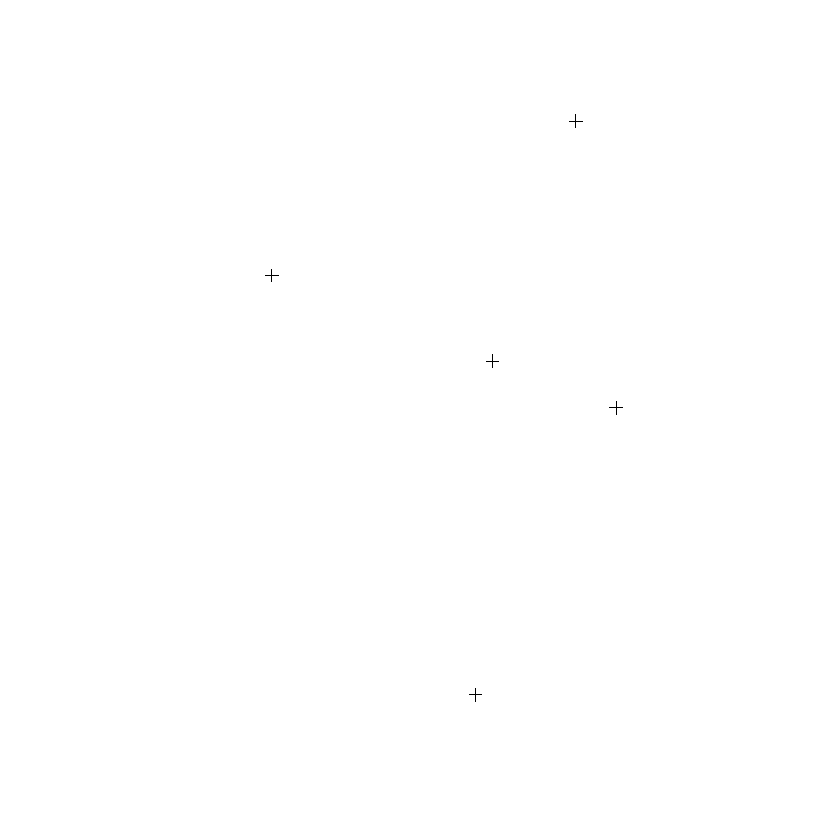

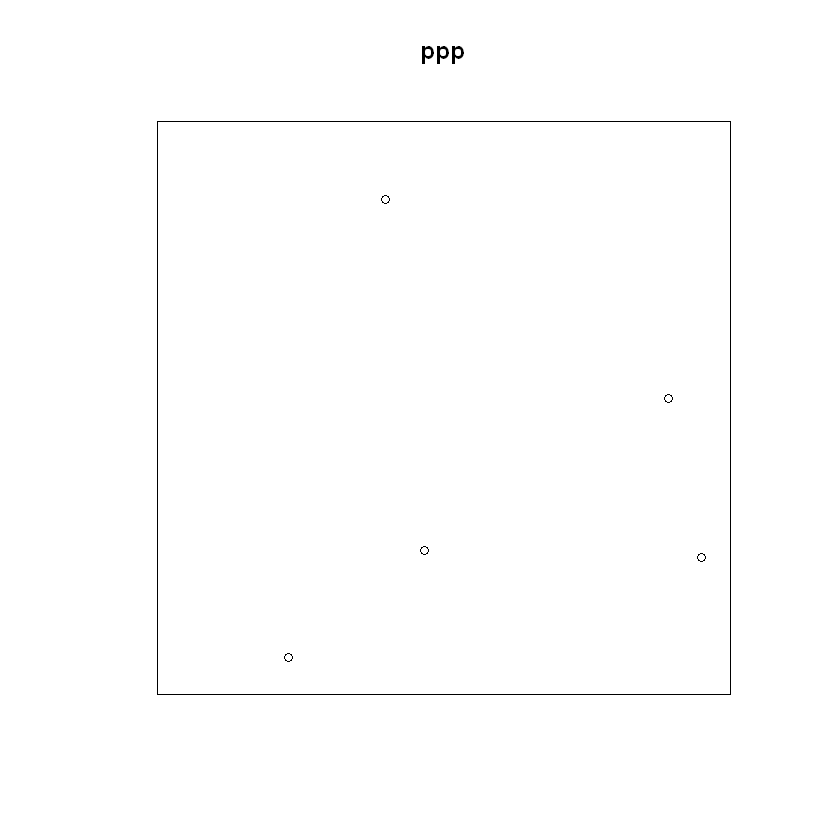

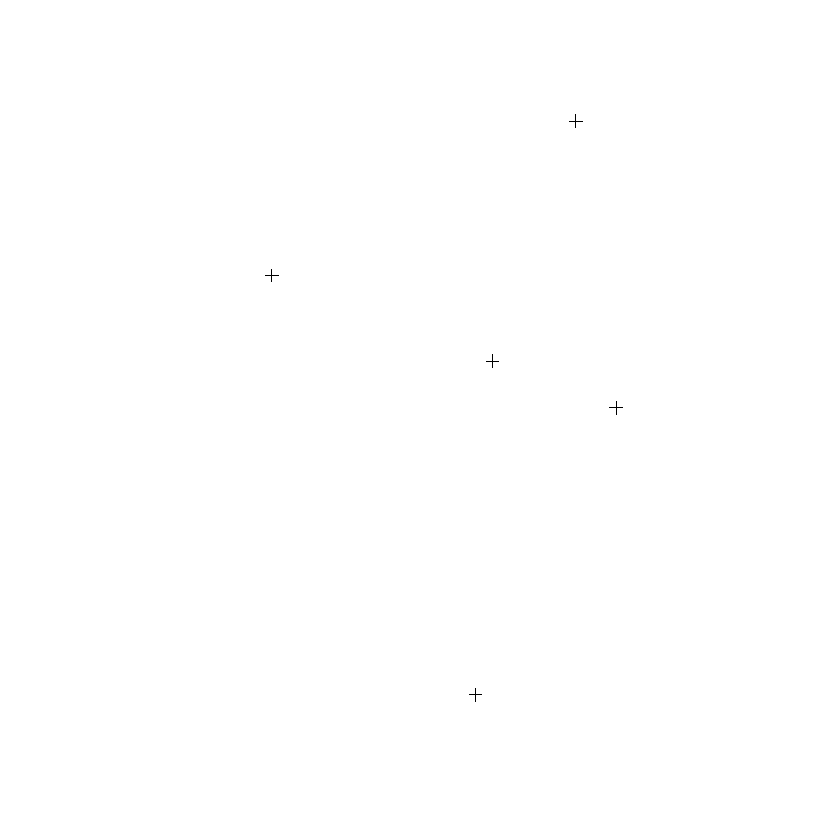

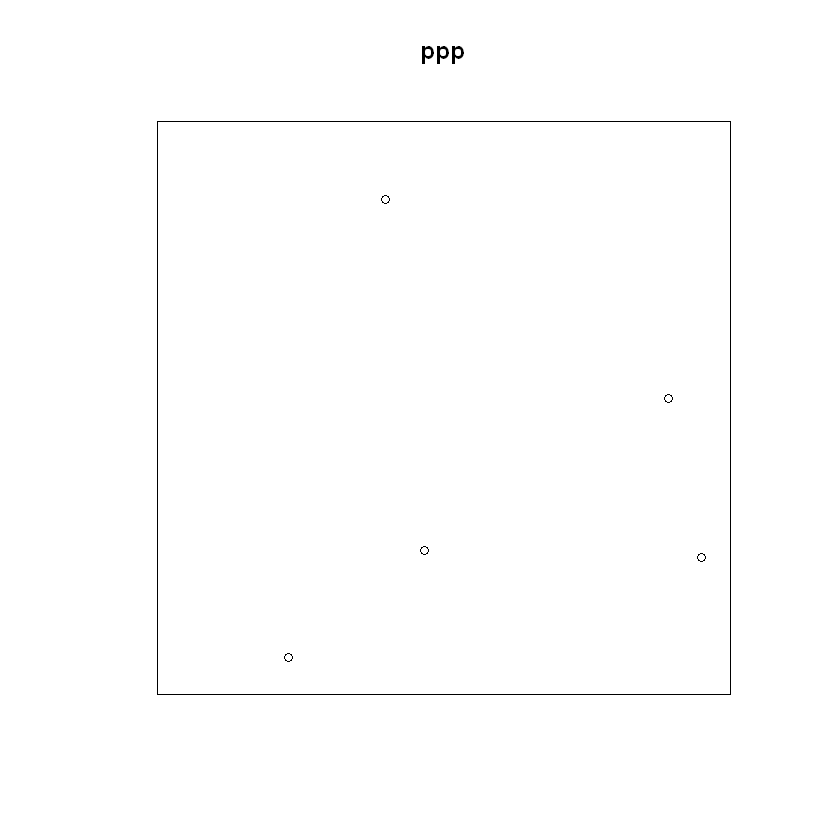

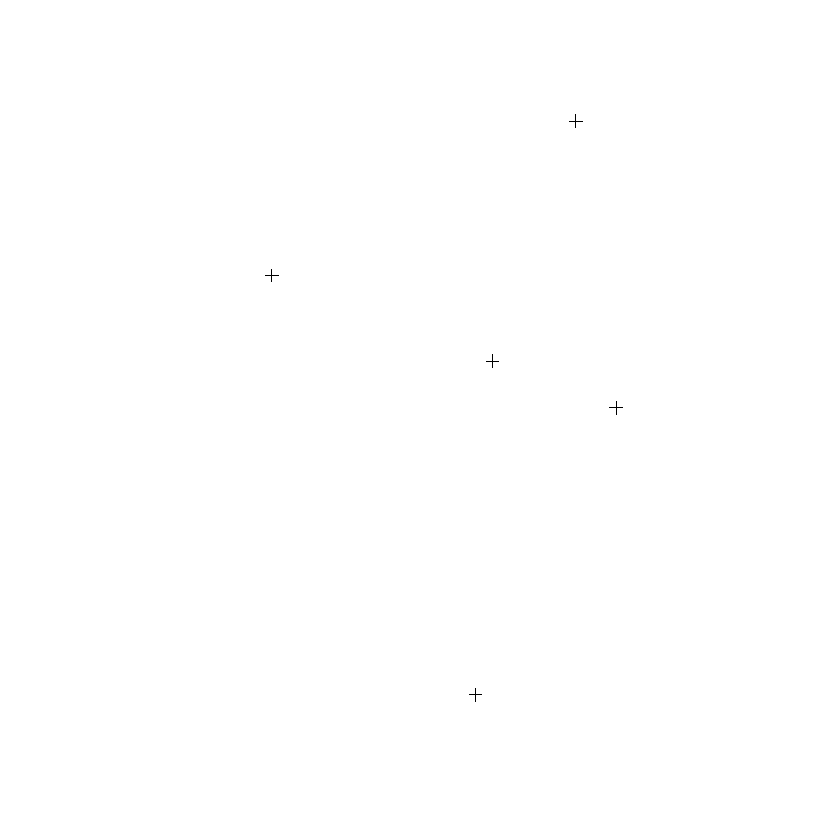

In [20]:
#Zbiory punktów


check_points = function(.npoints) {
    x = runif(.npoints)
    y = runif(.npoints)
    coords = cbind(rnorm(.npoints), rnorm(.npoints))
    sp = SpatialPoints(coords)
    ppp = ppp(x, y)
    return (microbenchmark(plot(sp), plot(ppp), times = 50))
}

res = check_points(5)

In [21]:
print(res)

Unit: milliseconds
      expr      min       lq     mean   median      uq     max neval cld
  plot(sp) 1.383000 6.740002 19.34172 27.02175 28.0264 31.4916    50   a
 plot(ppp) 6.659002 7.674801 19.02363  9.05665 30.2754 64.3682    50   a


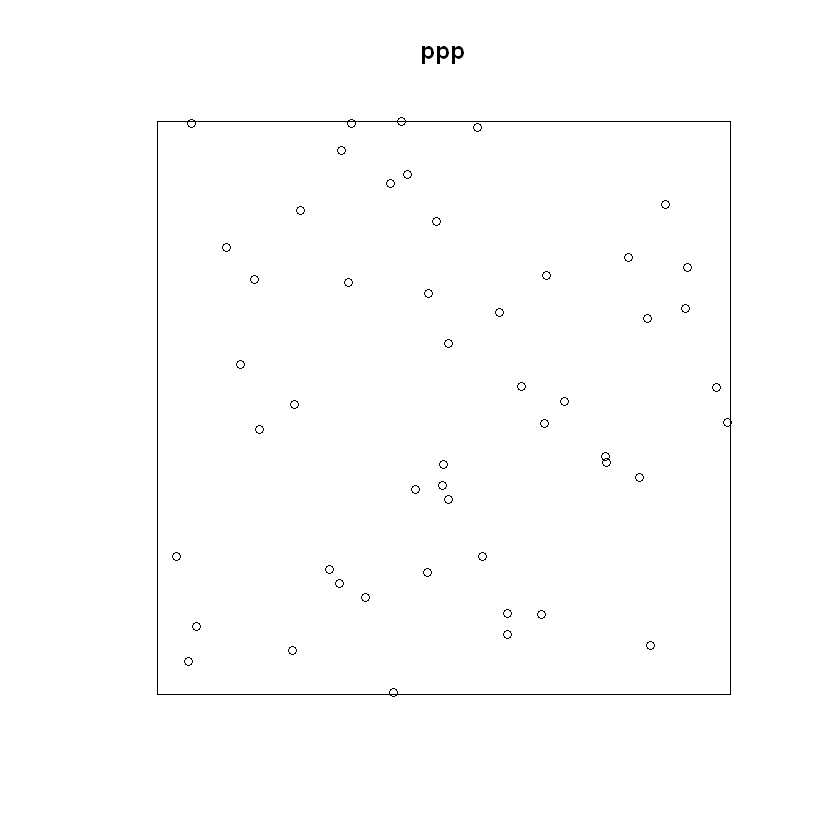

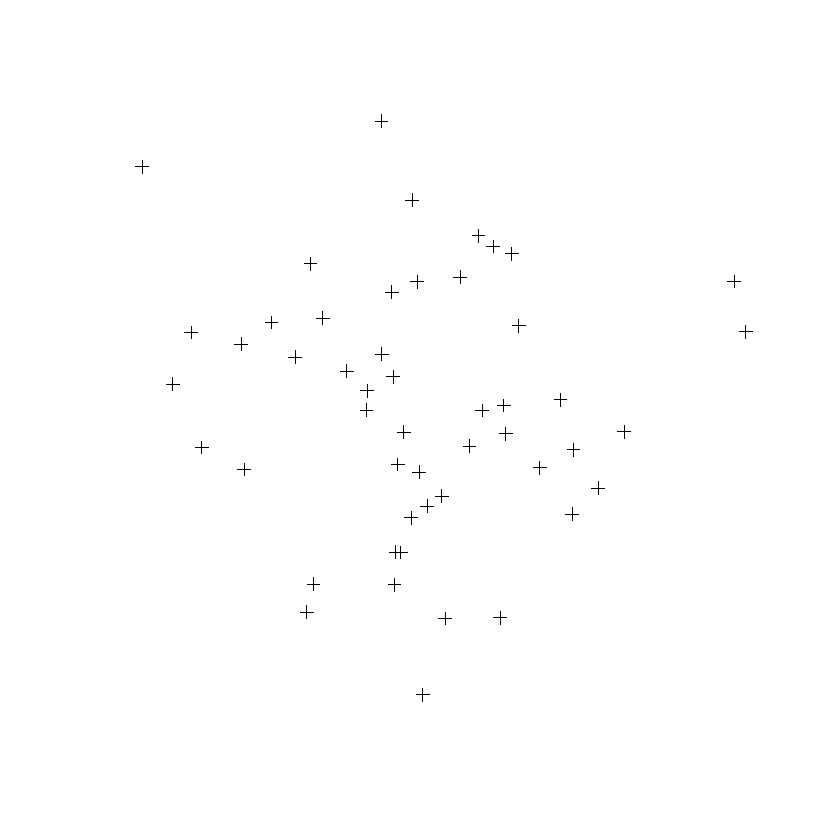

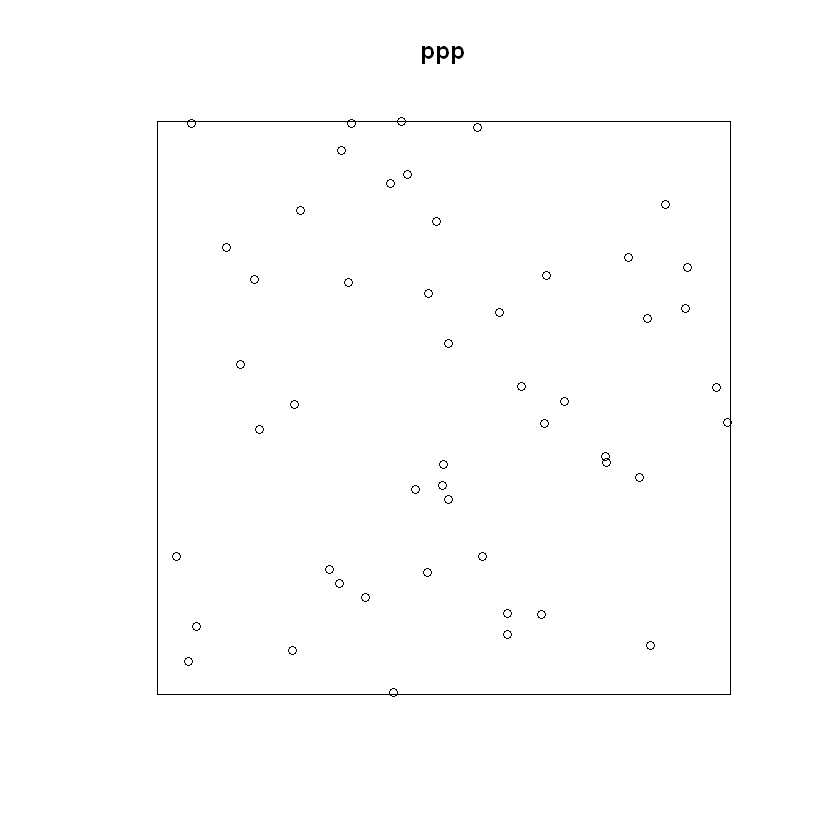

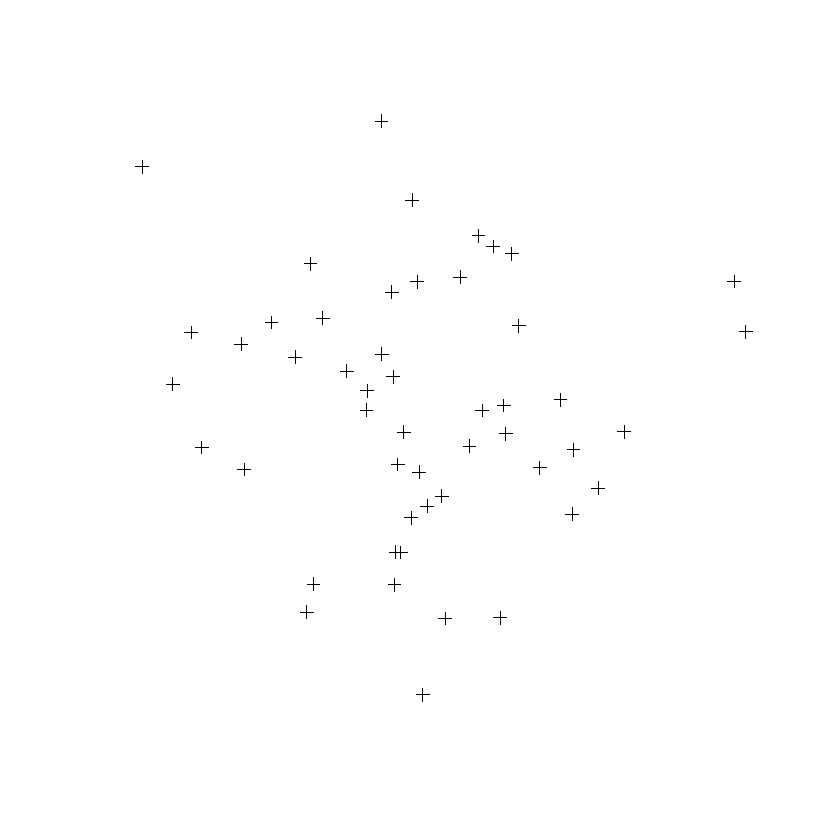

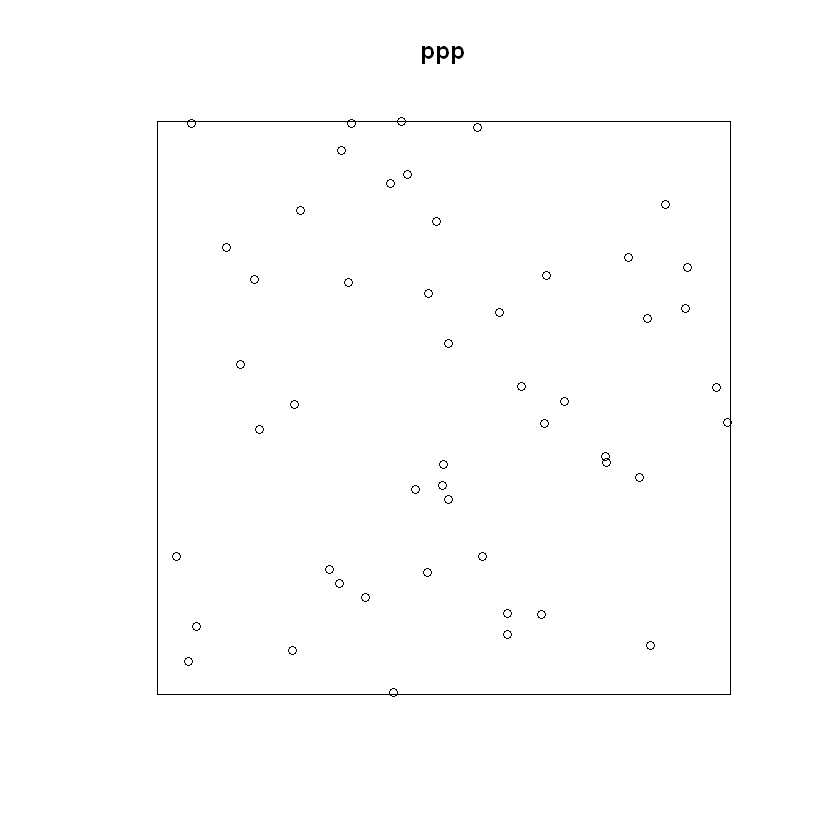

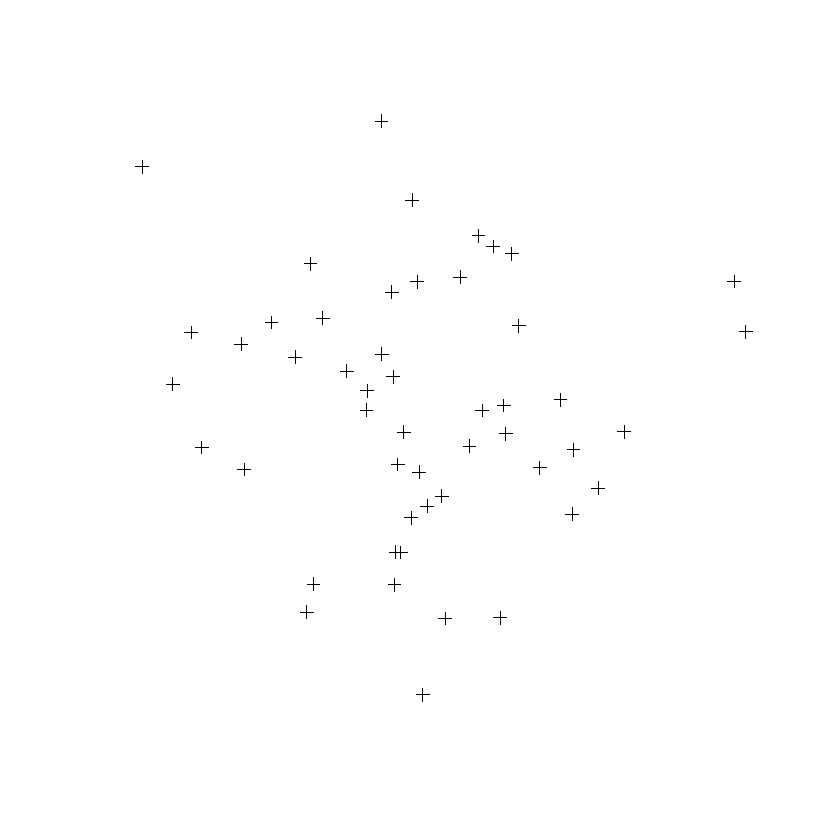

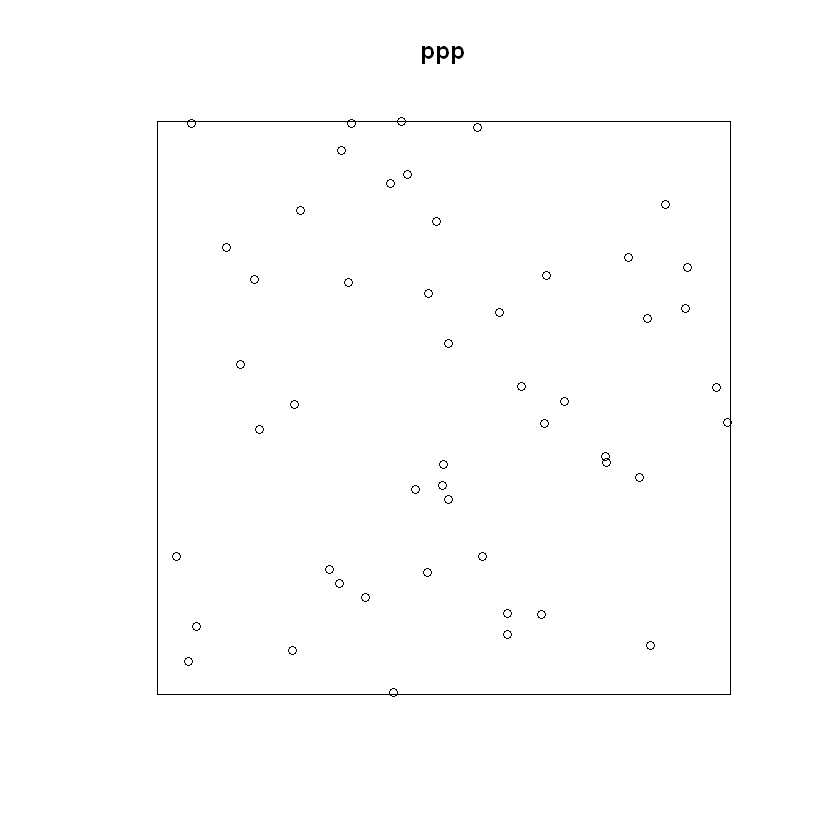

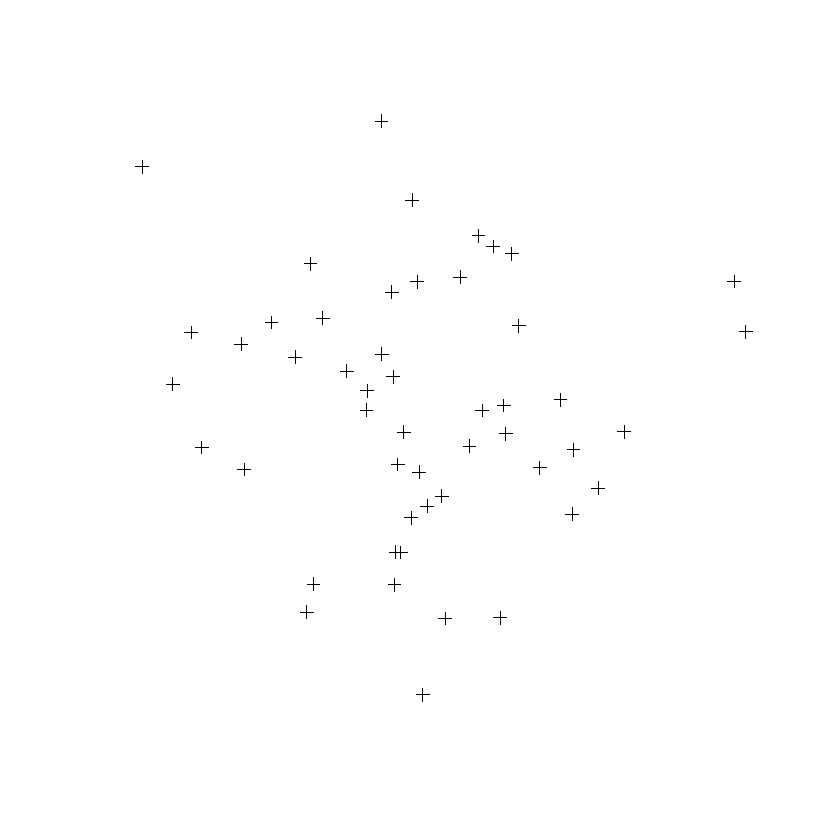

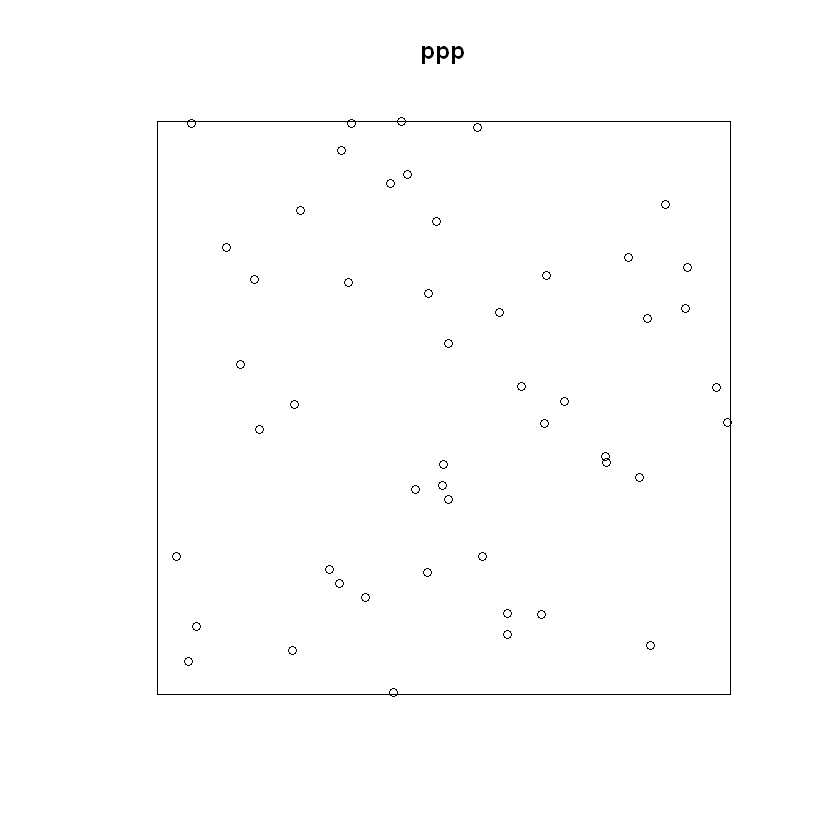

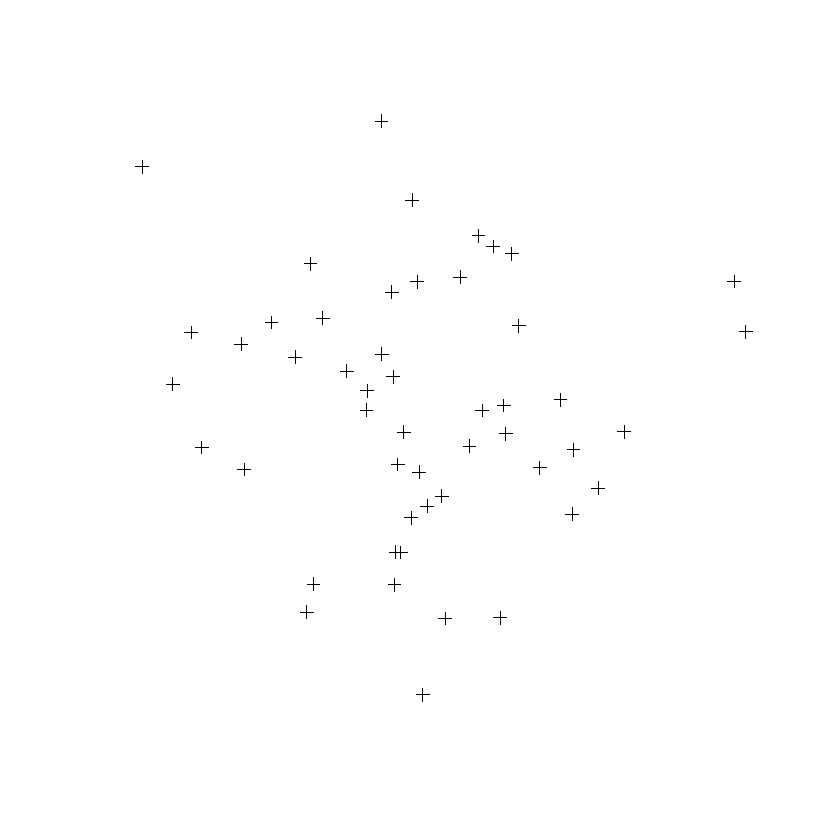

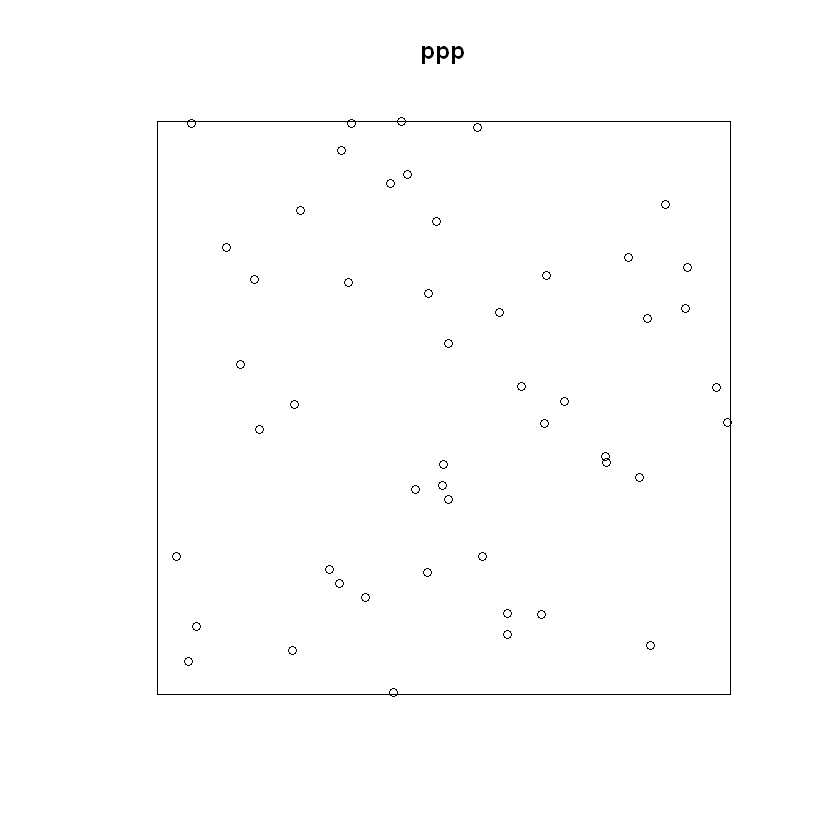

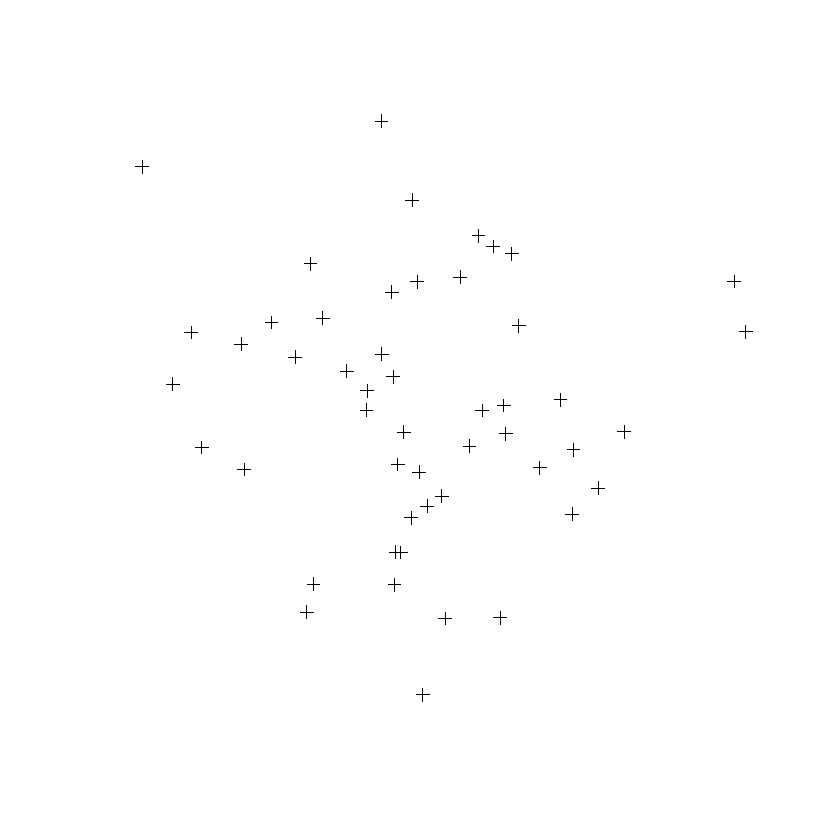

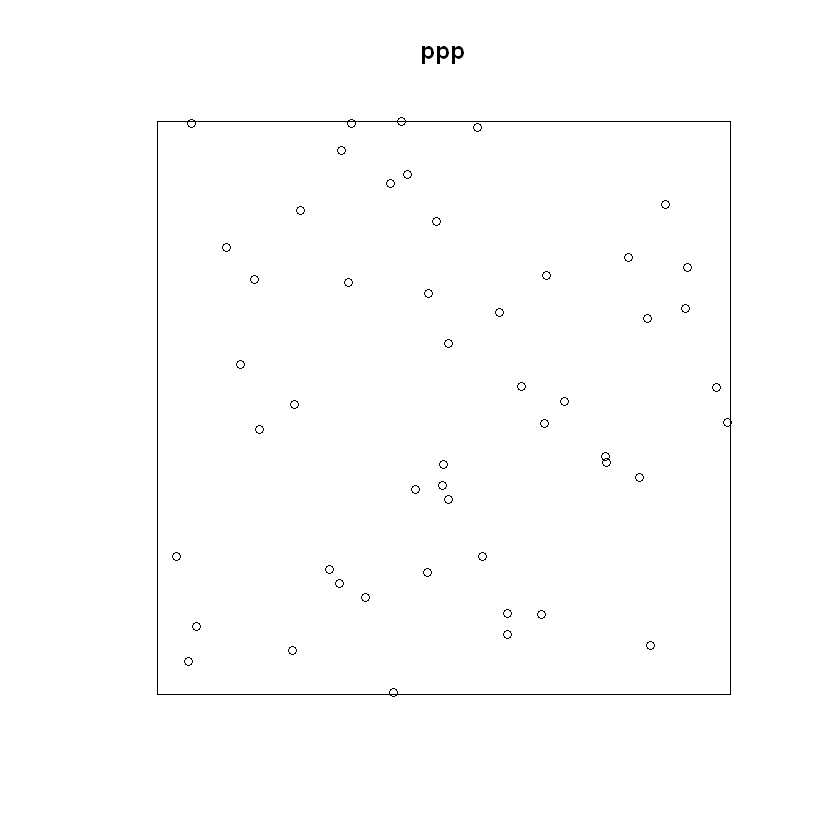

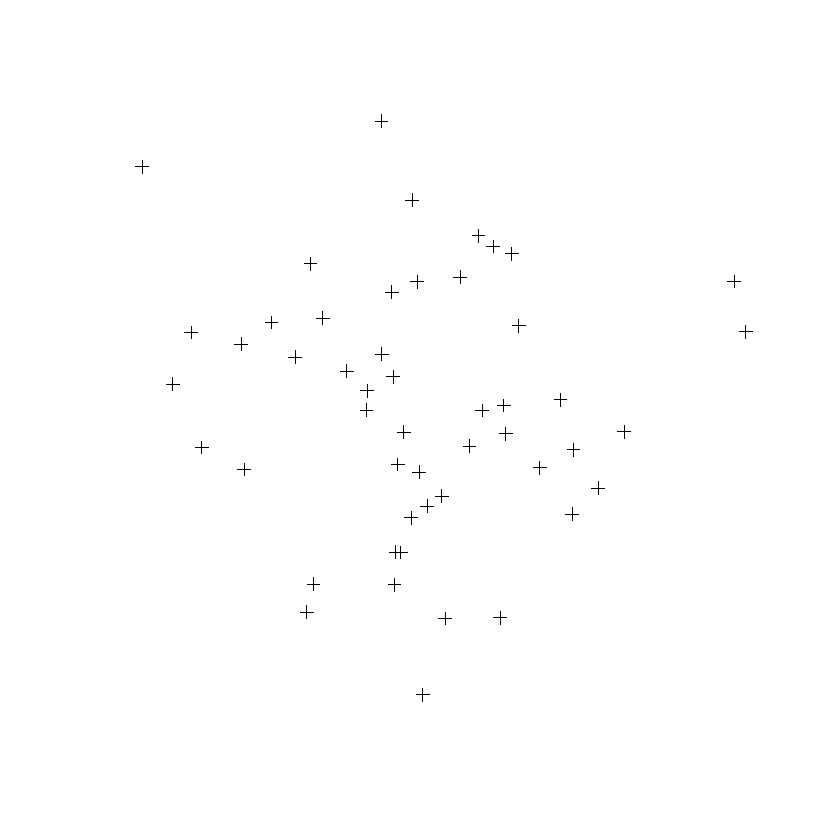

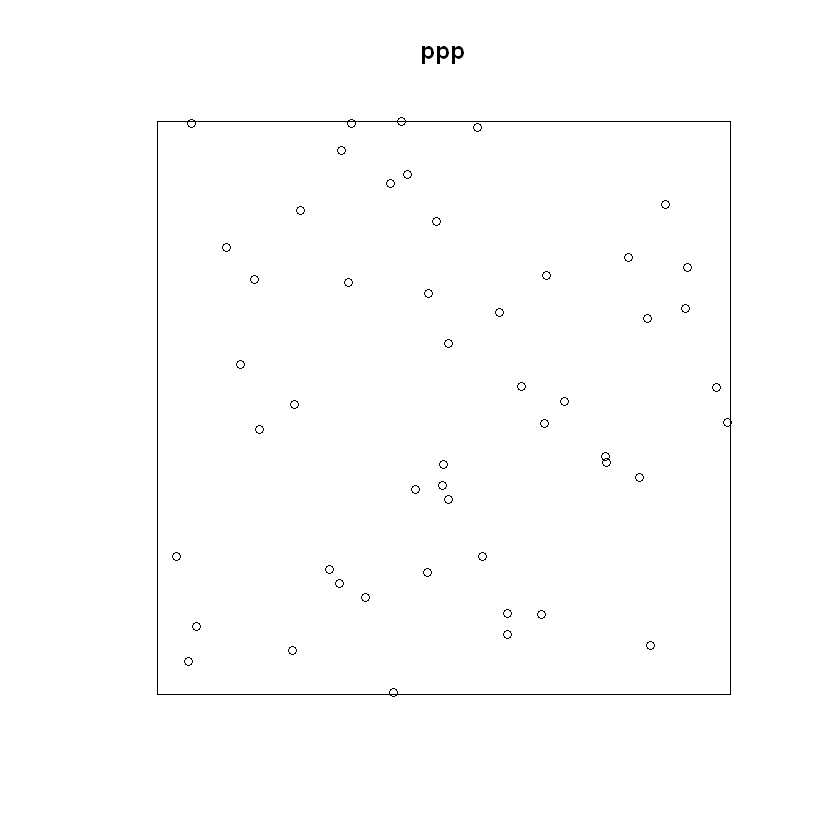

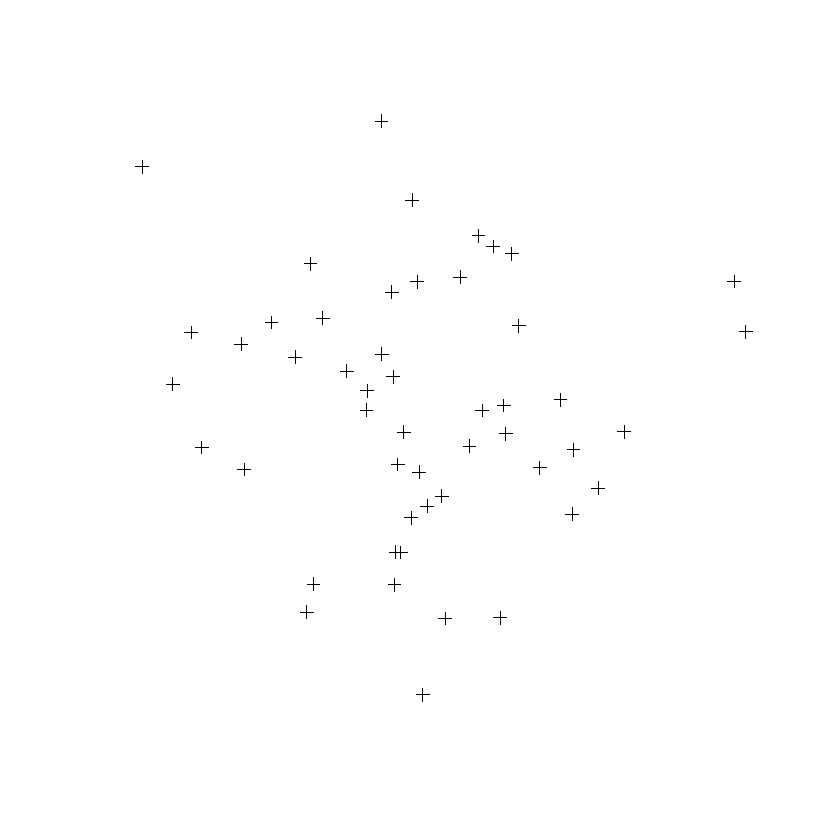

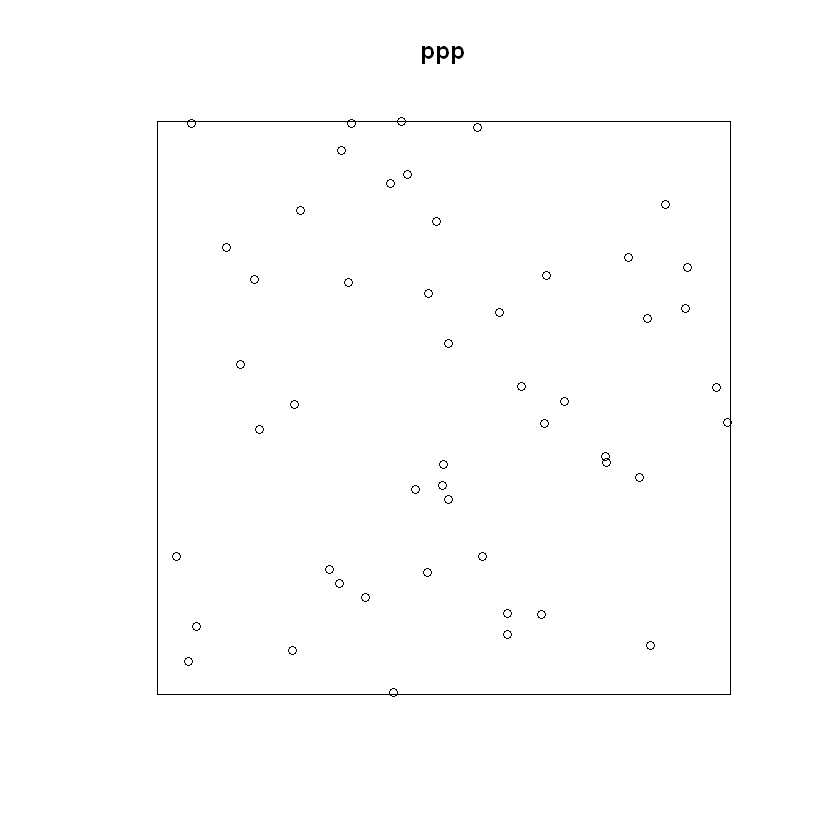

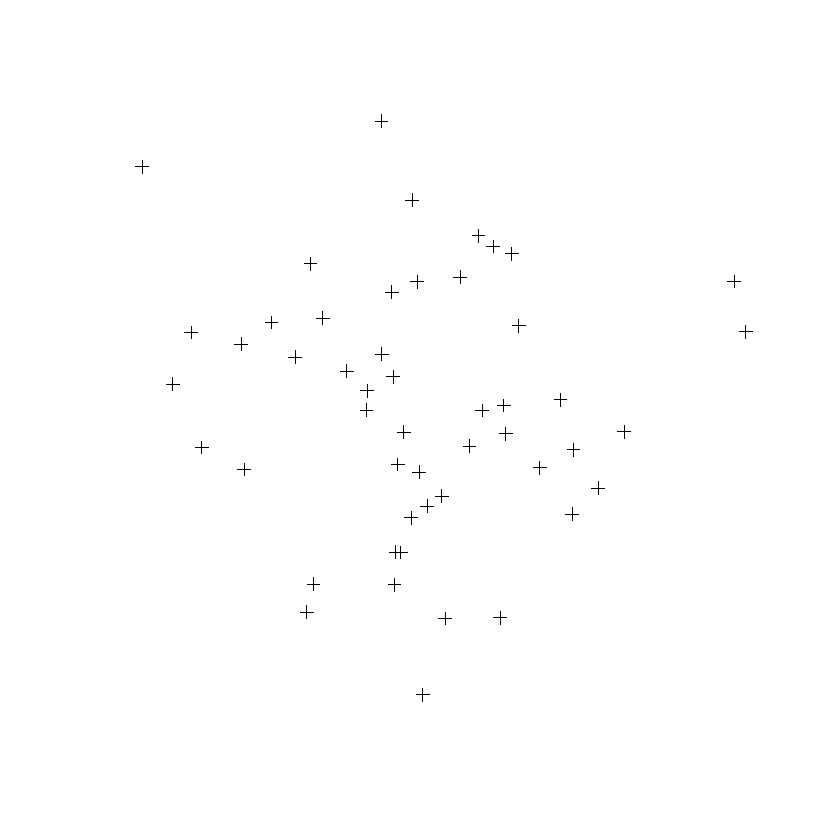

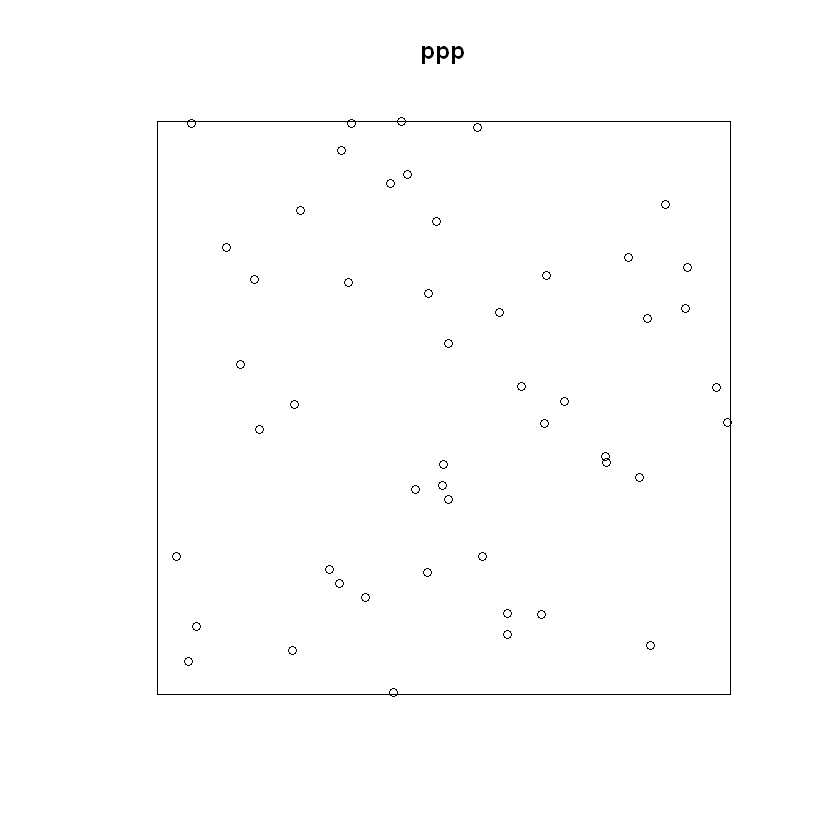

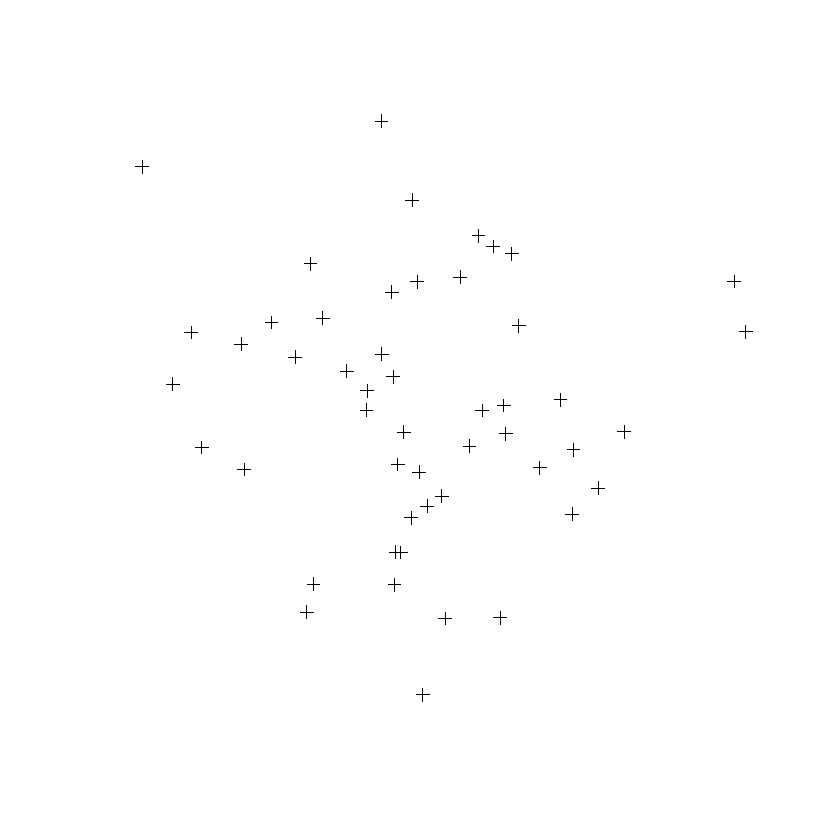

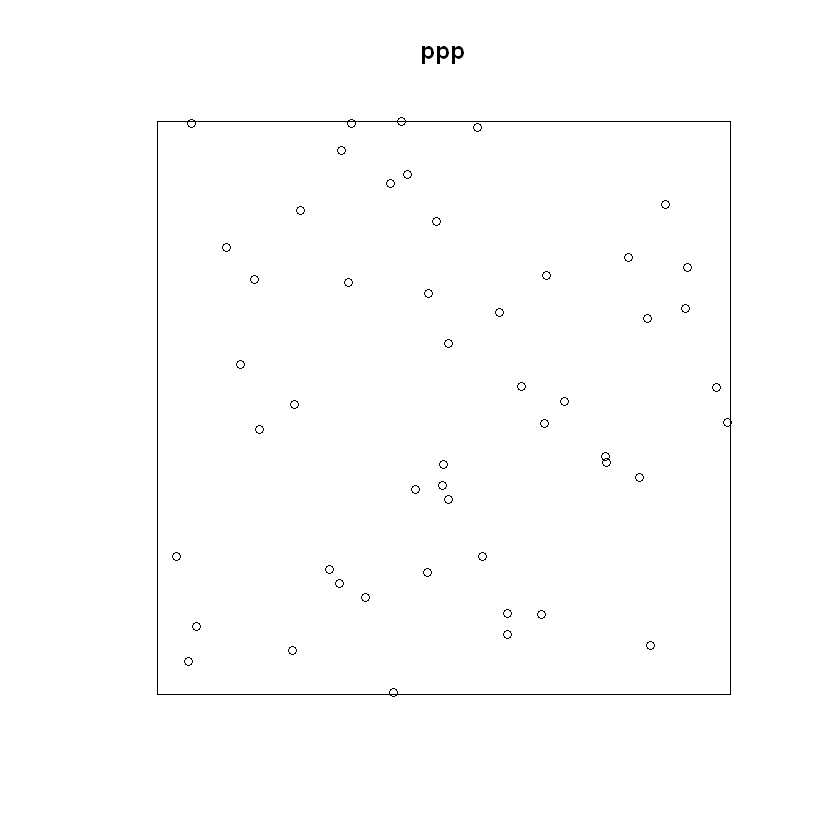

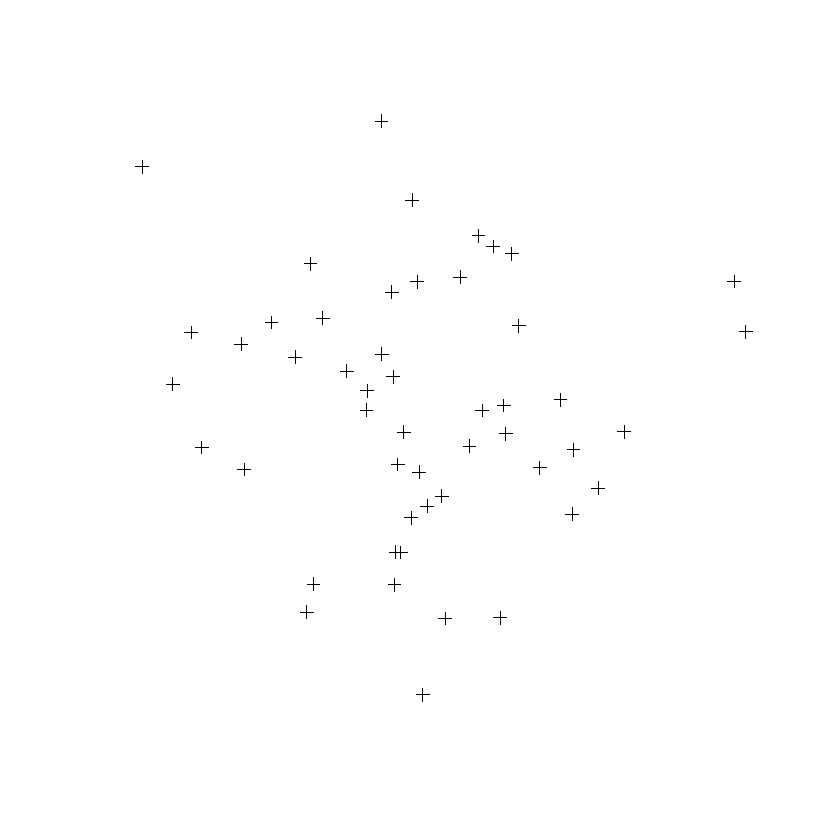

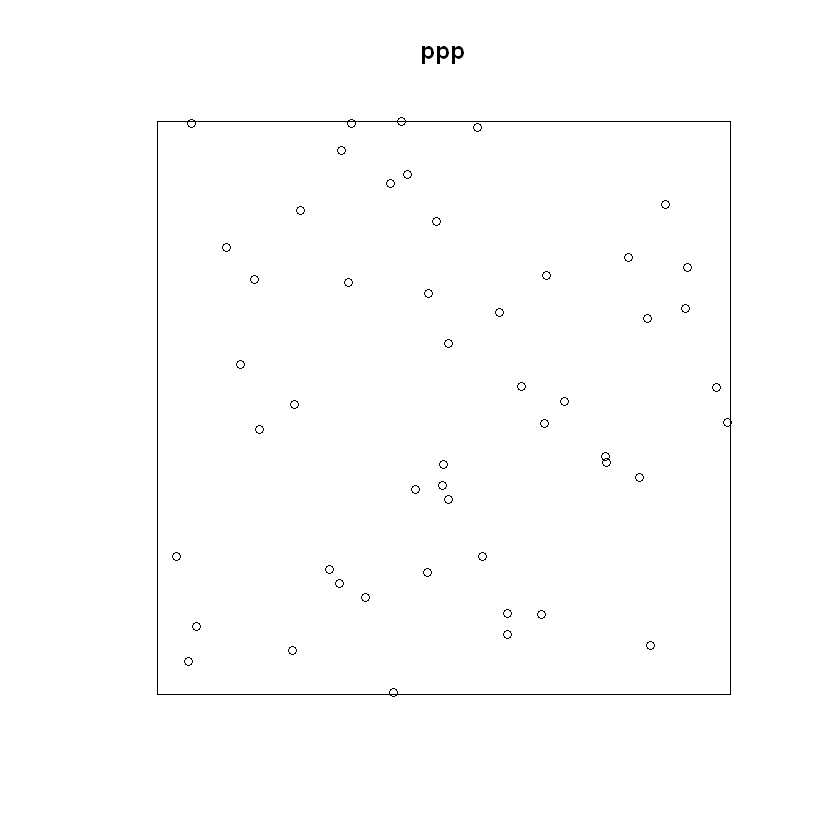

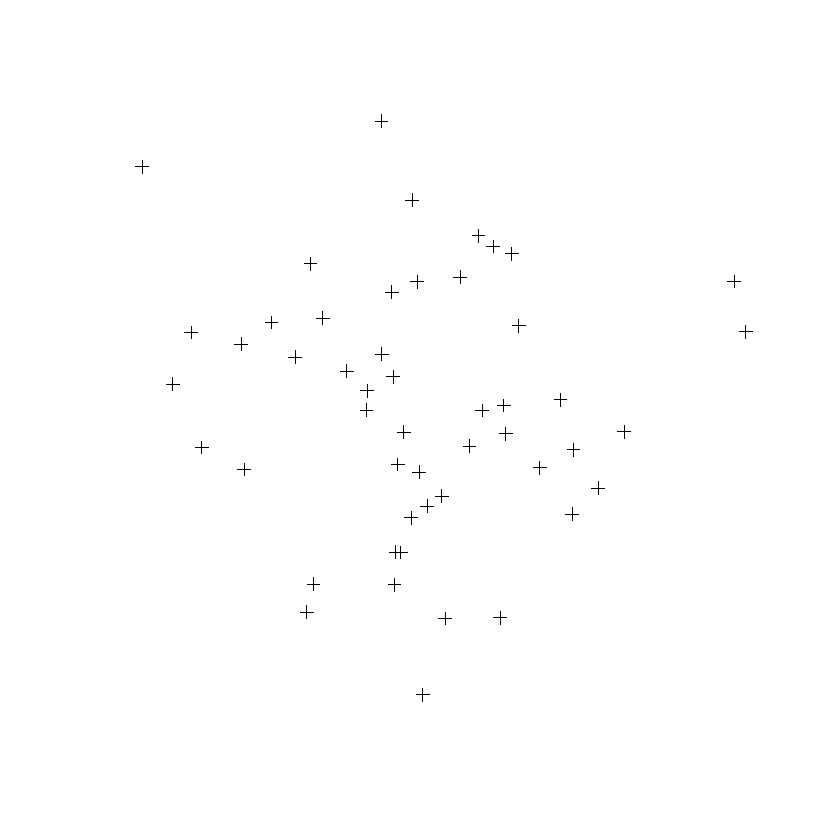

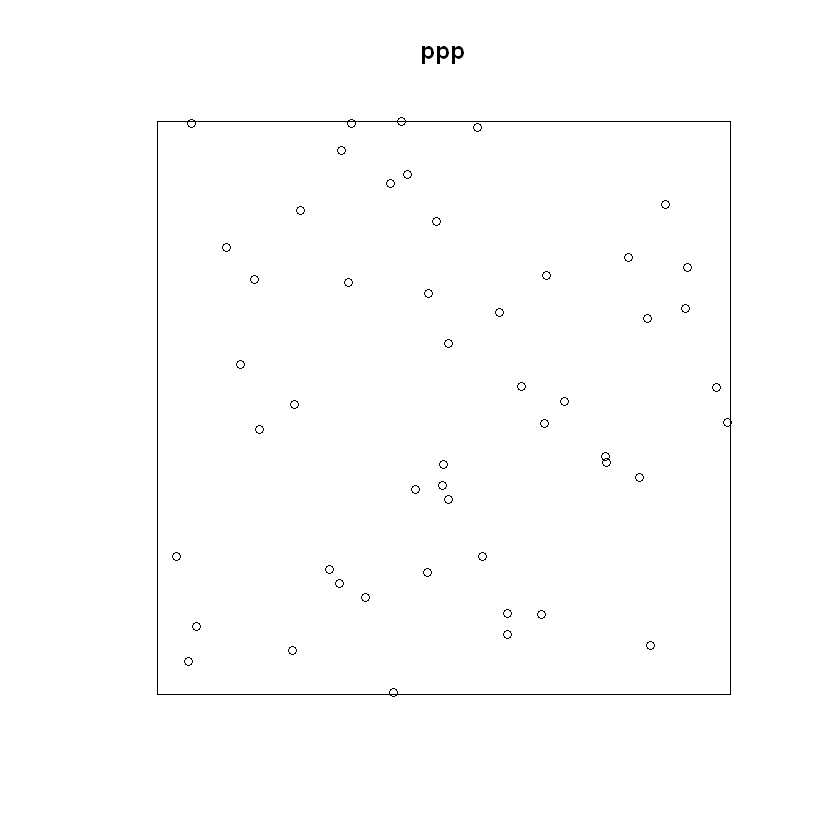

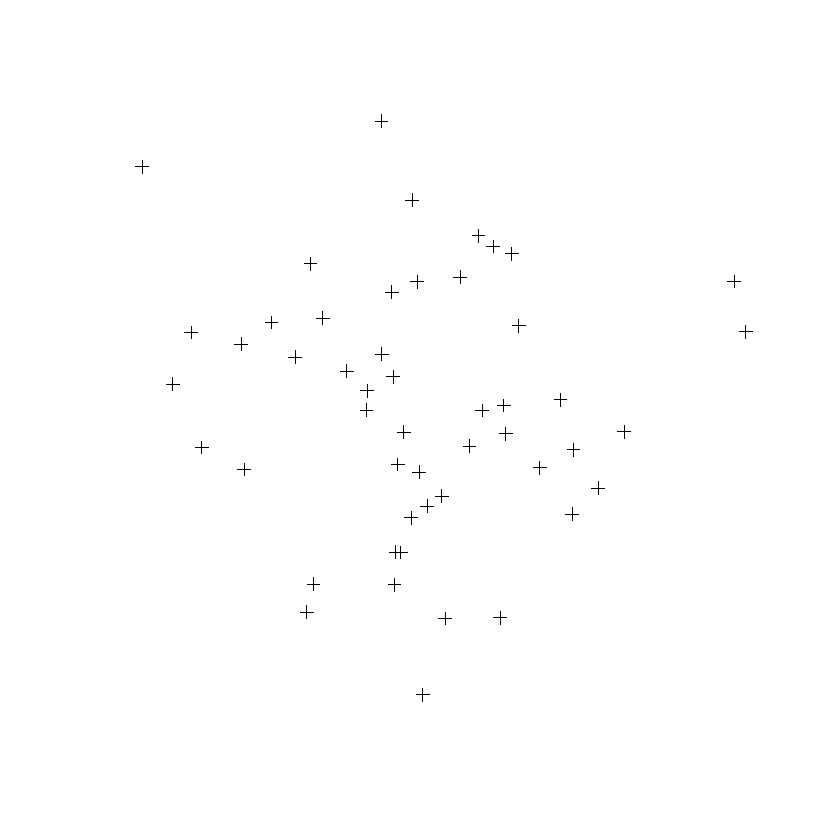

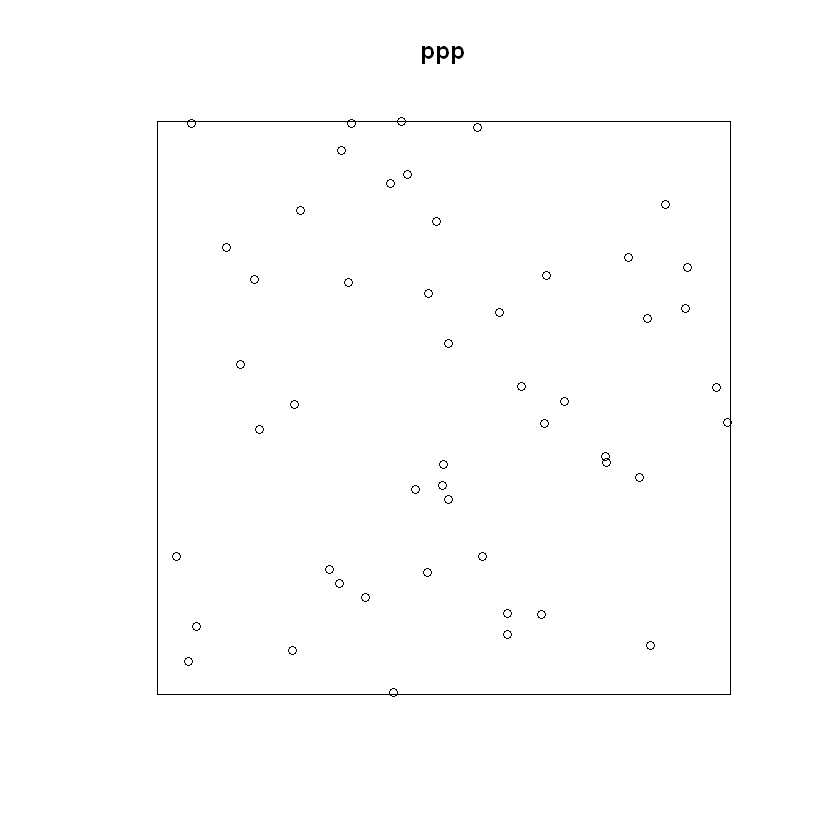

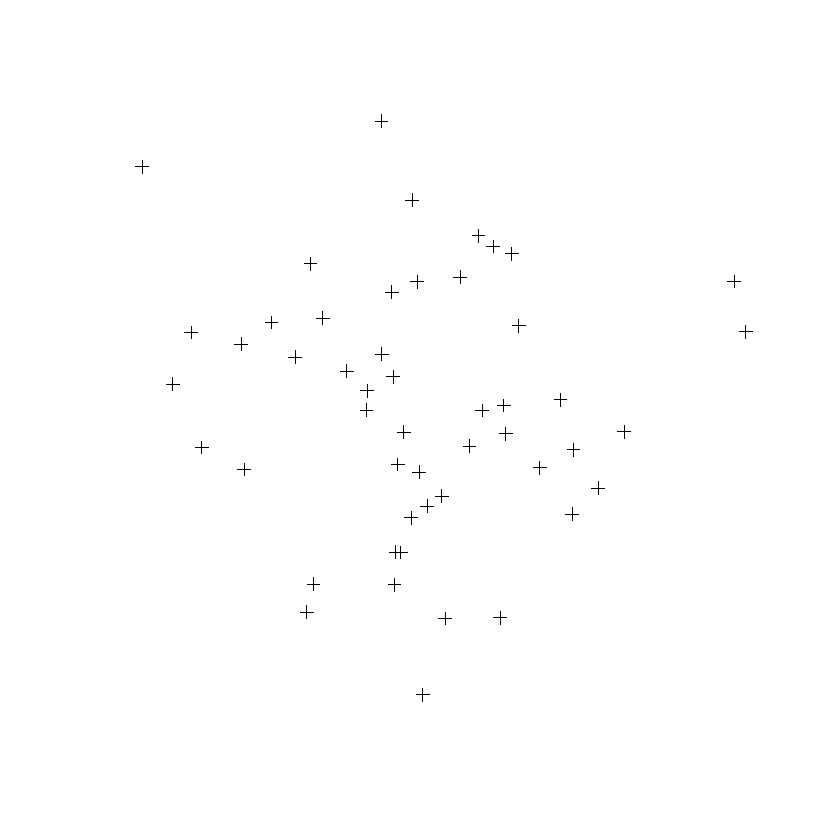

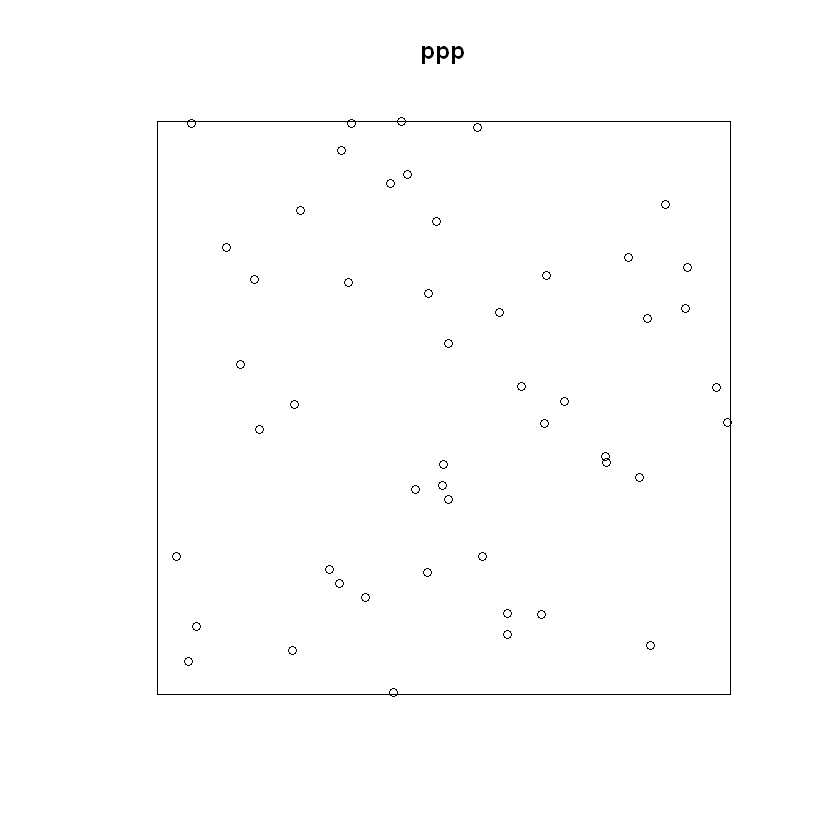

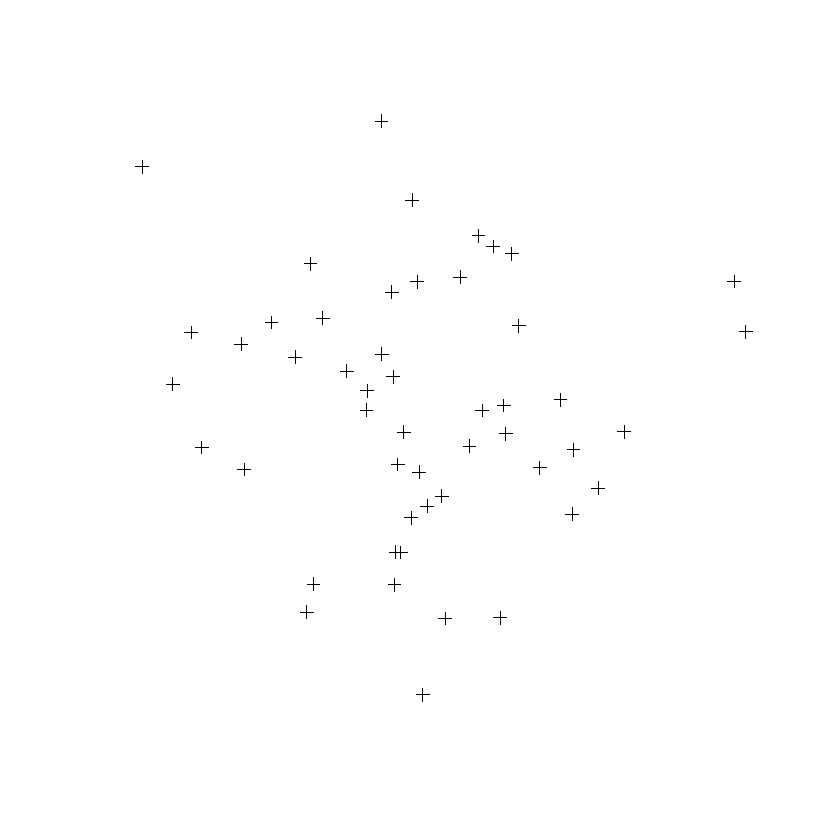

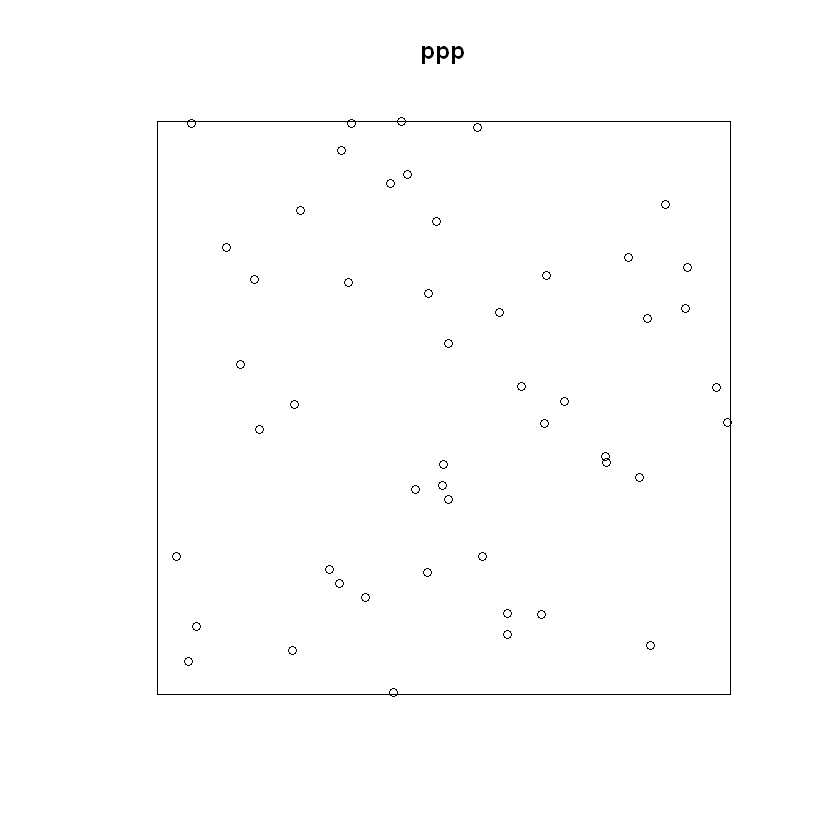

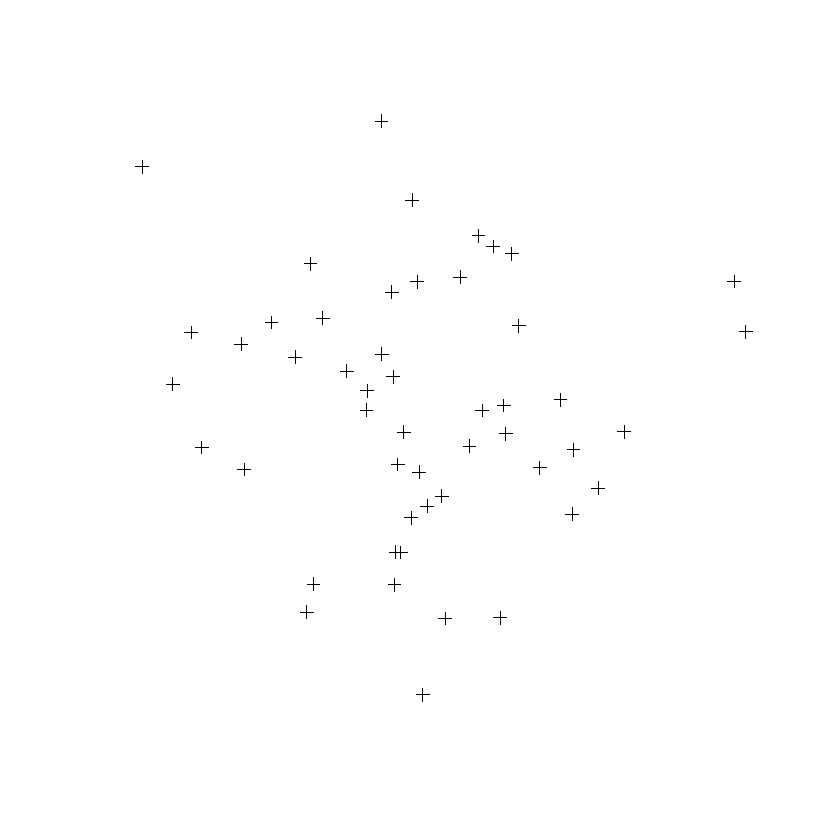

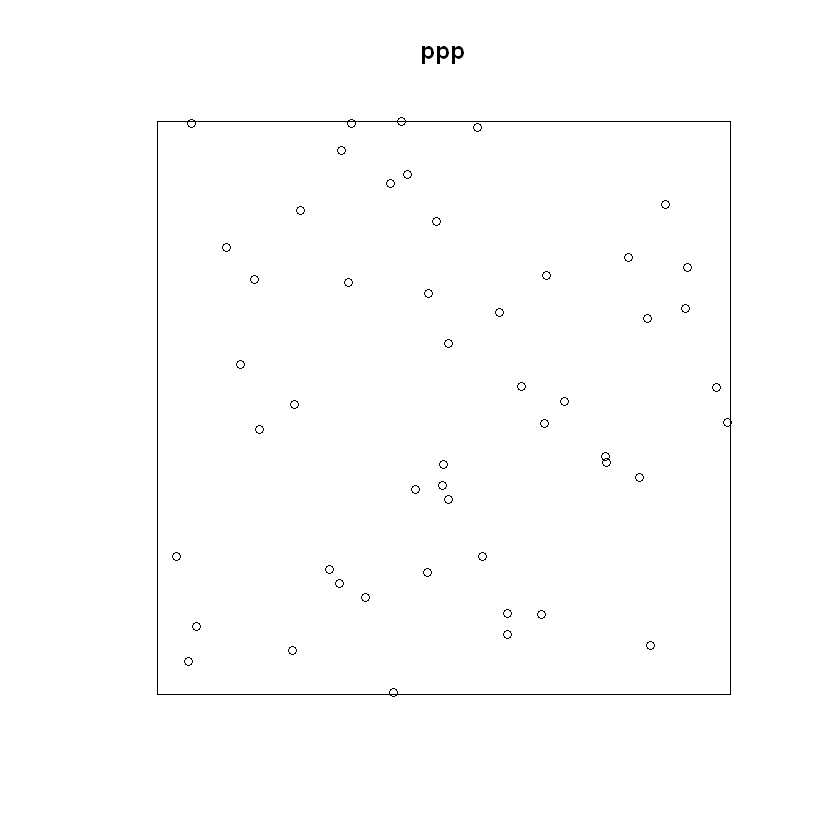

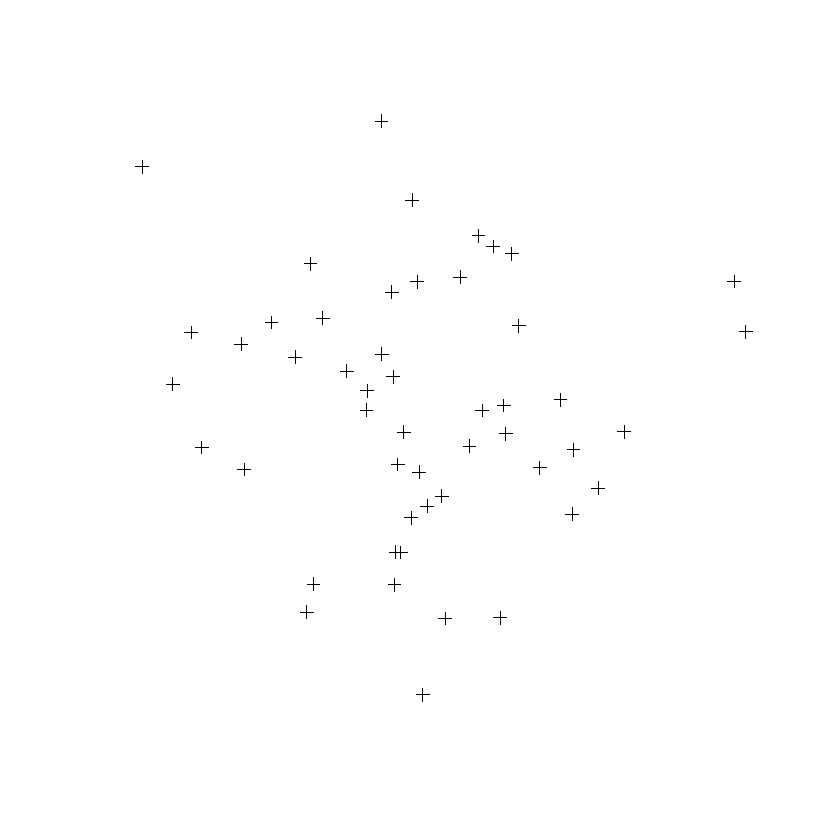

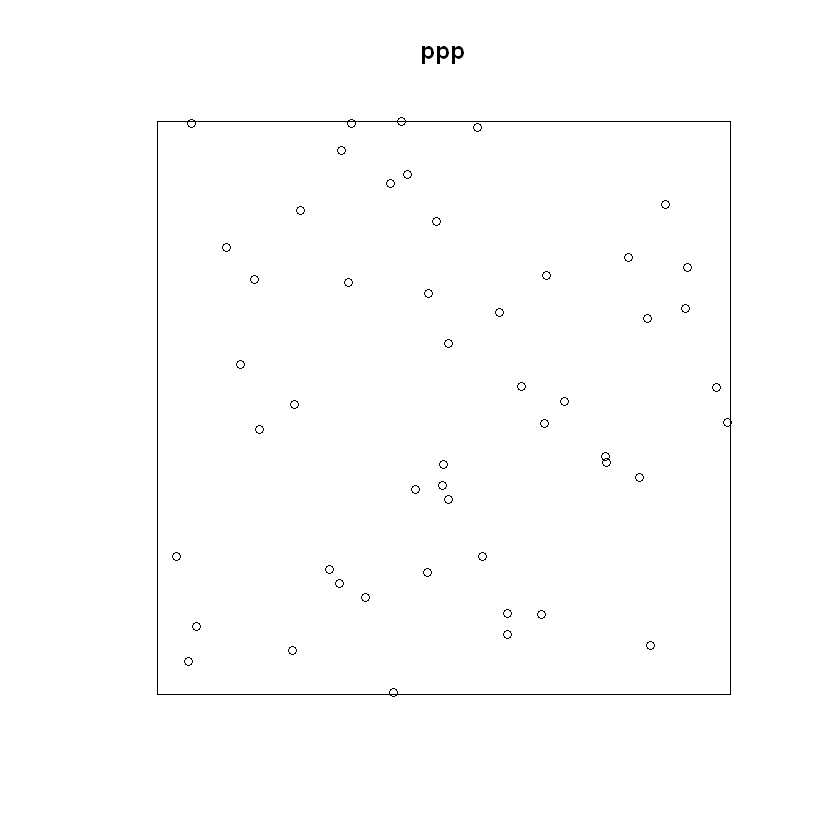

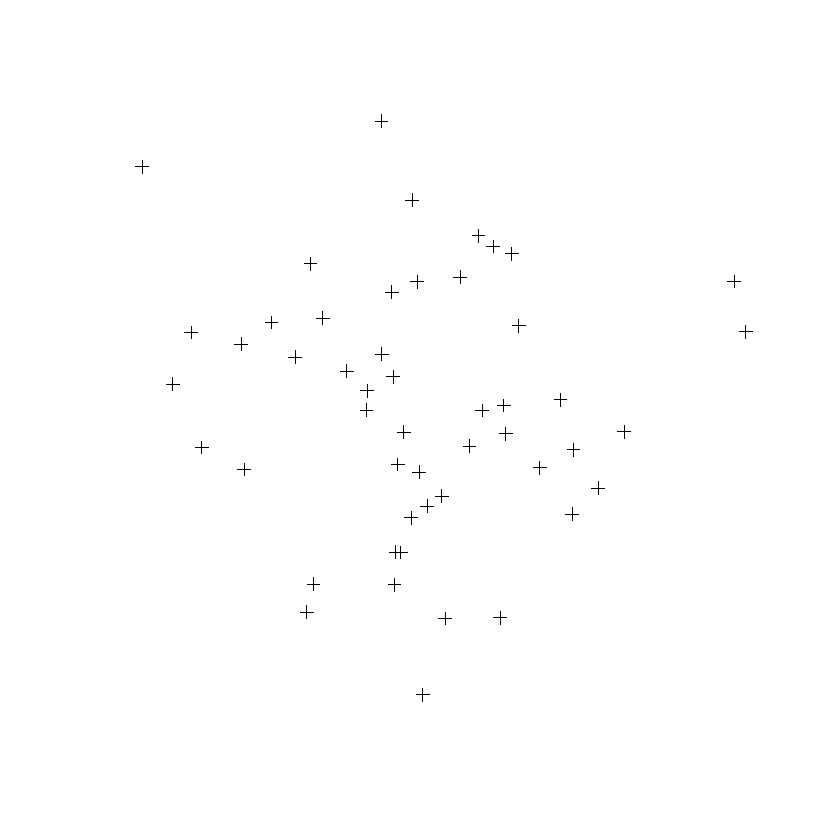

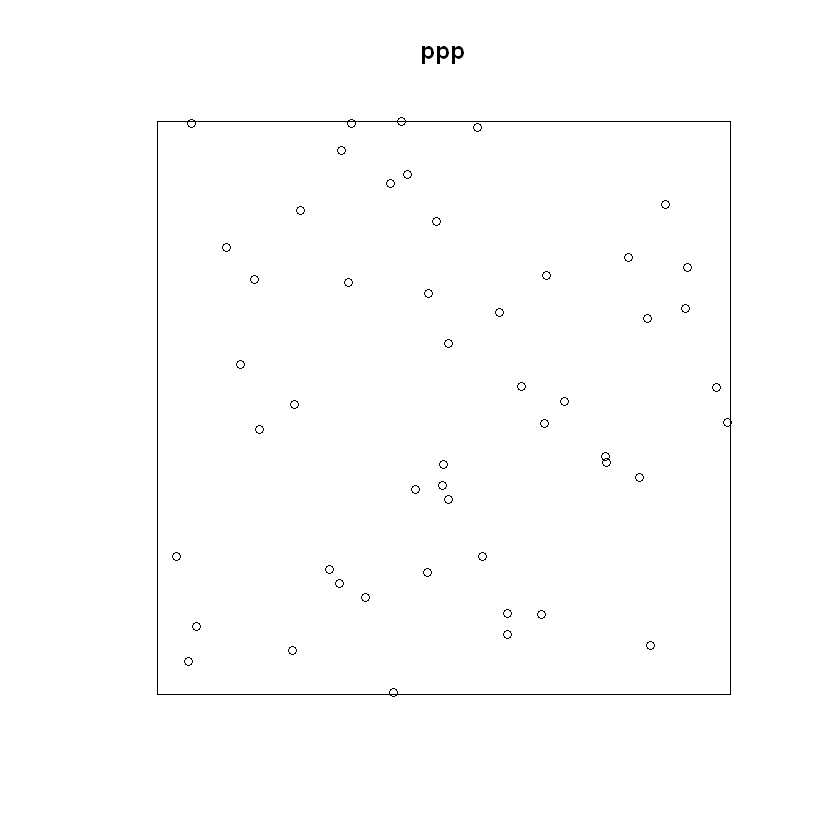

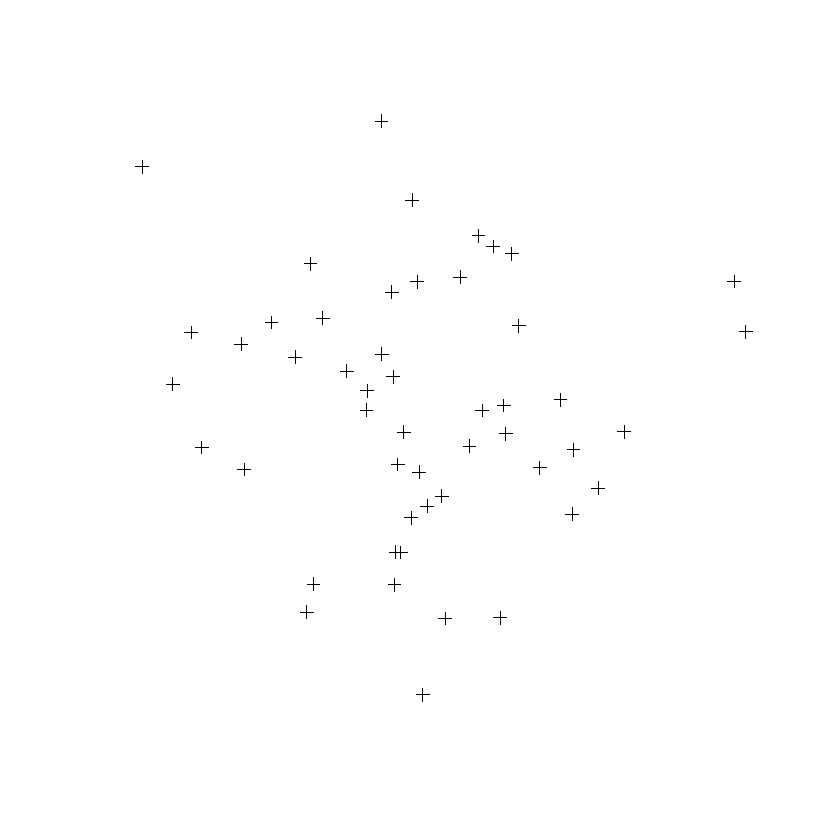

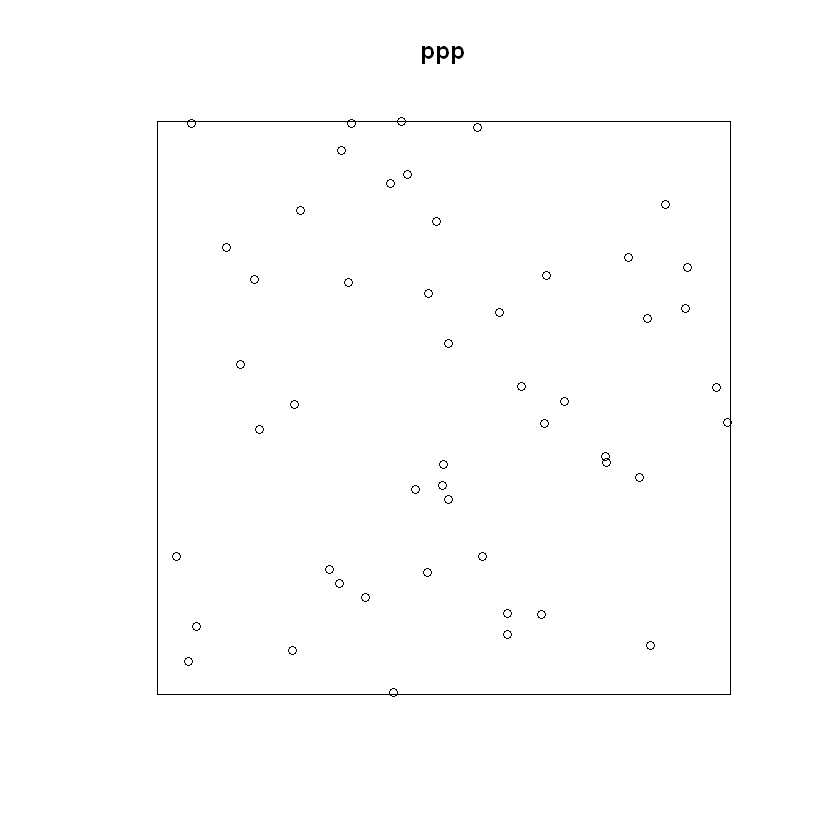

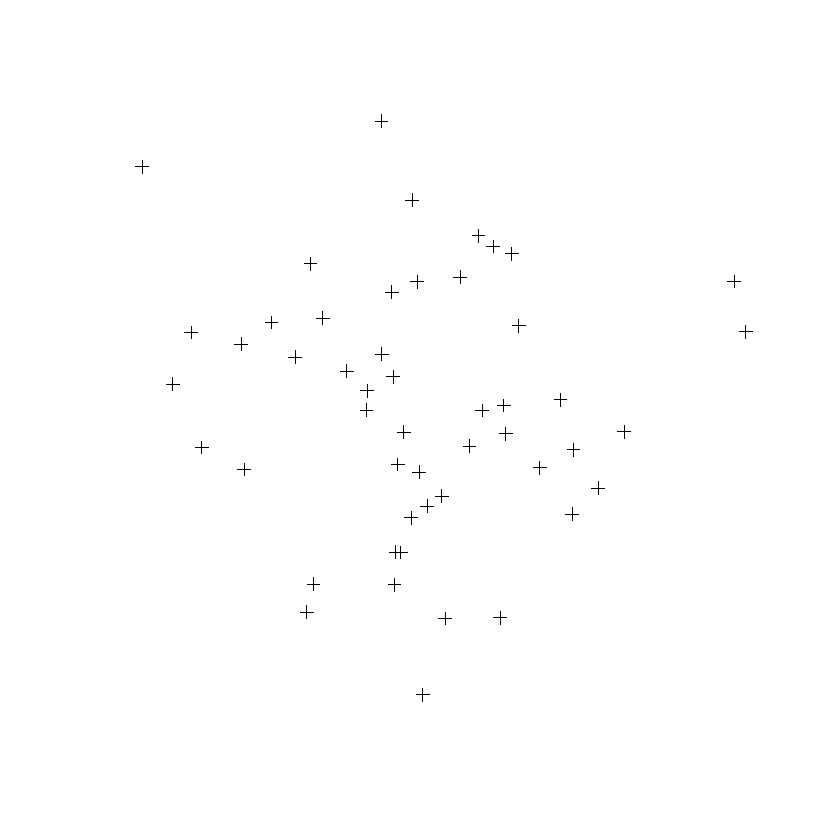

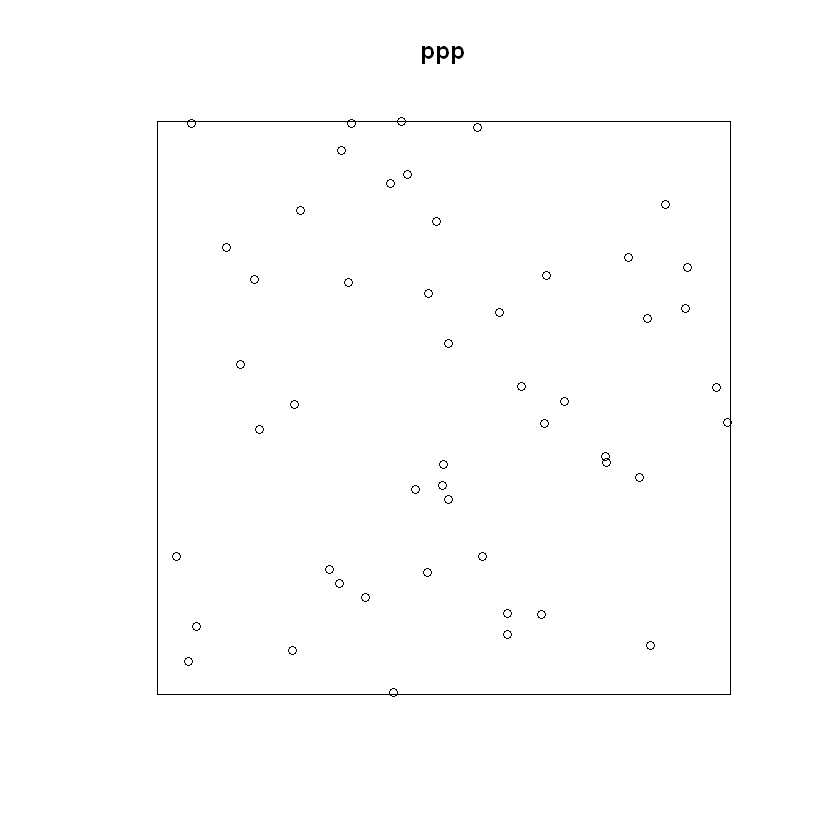

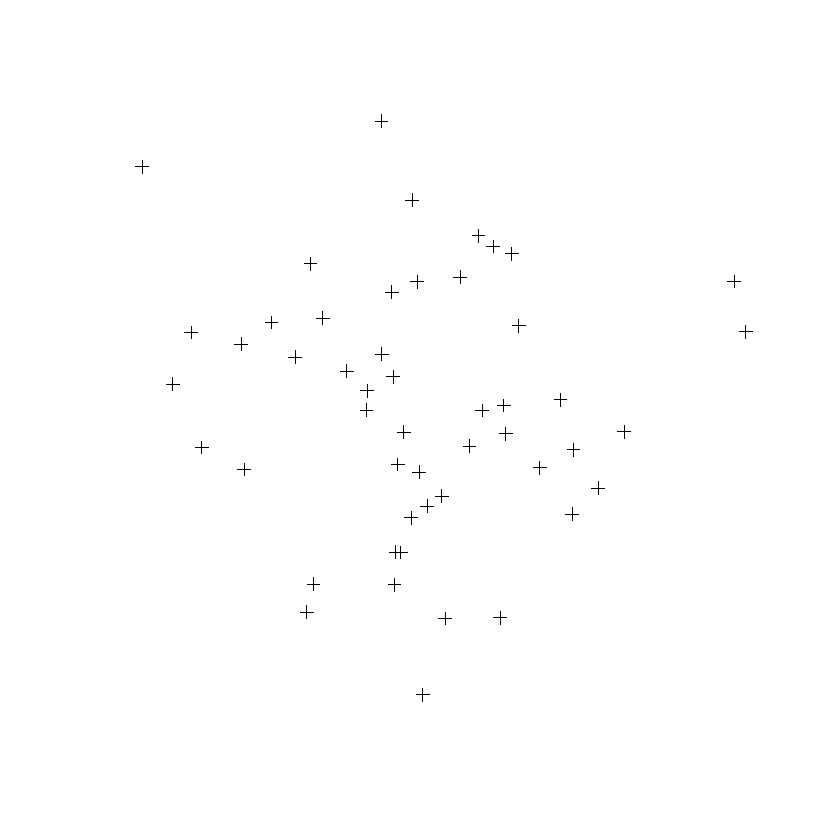

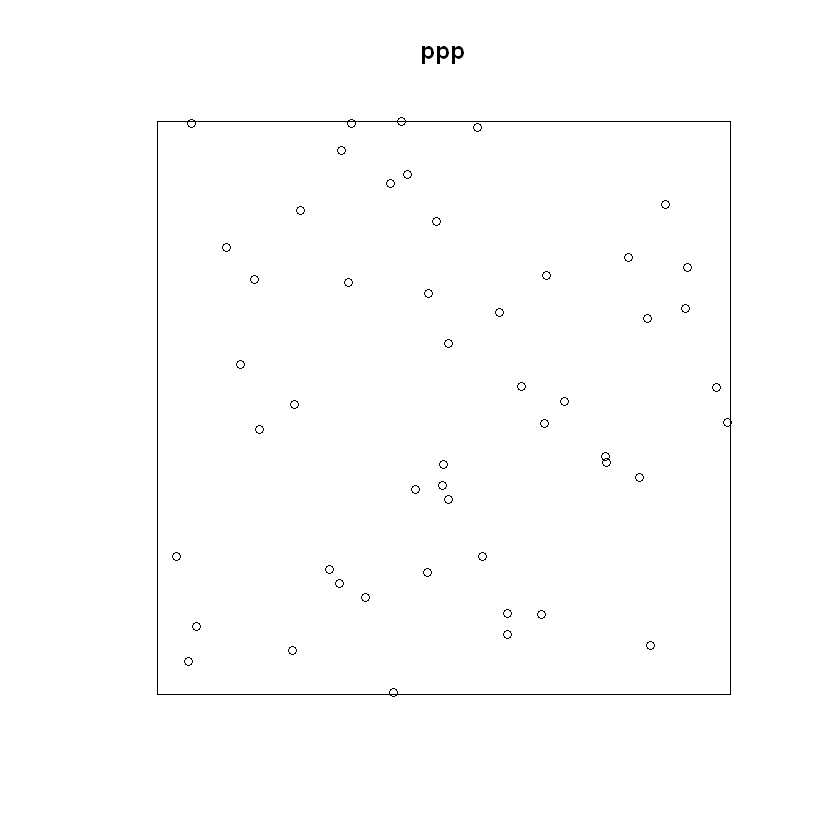

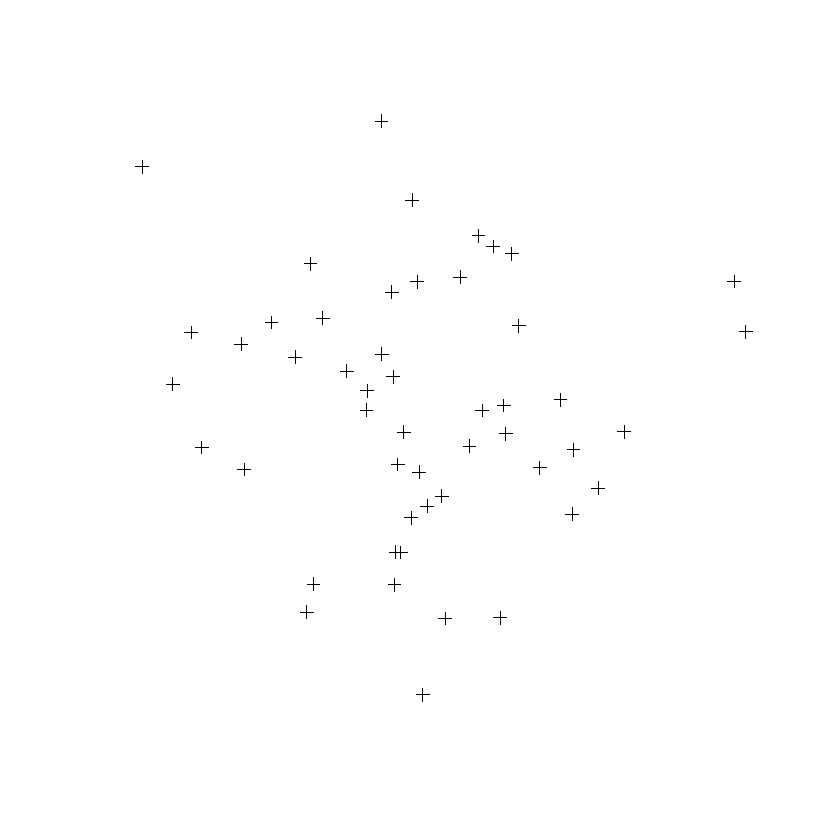

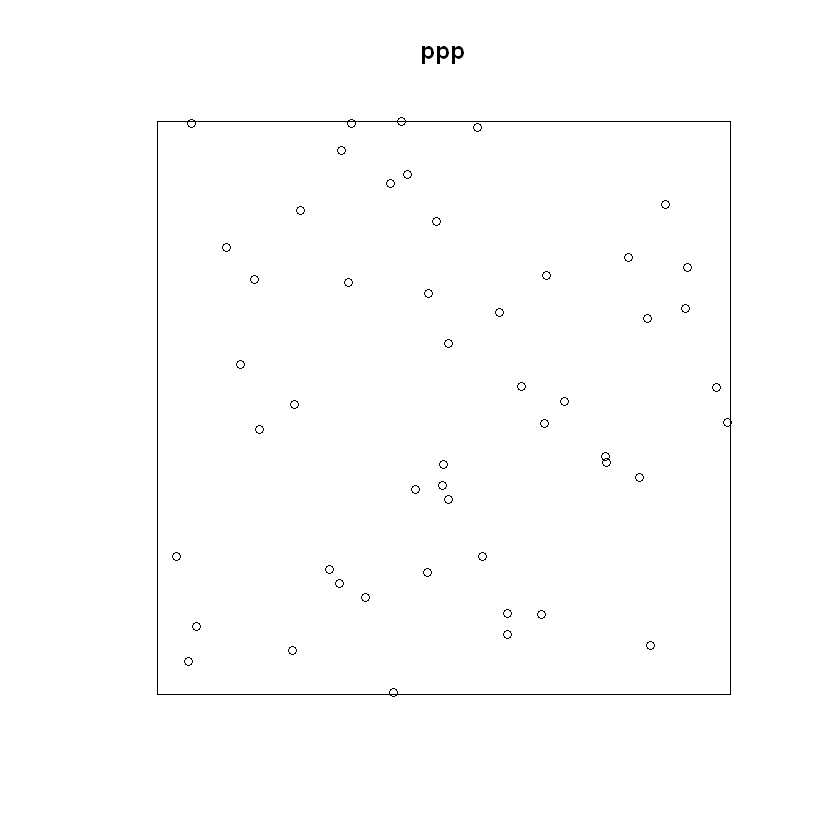

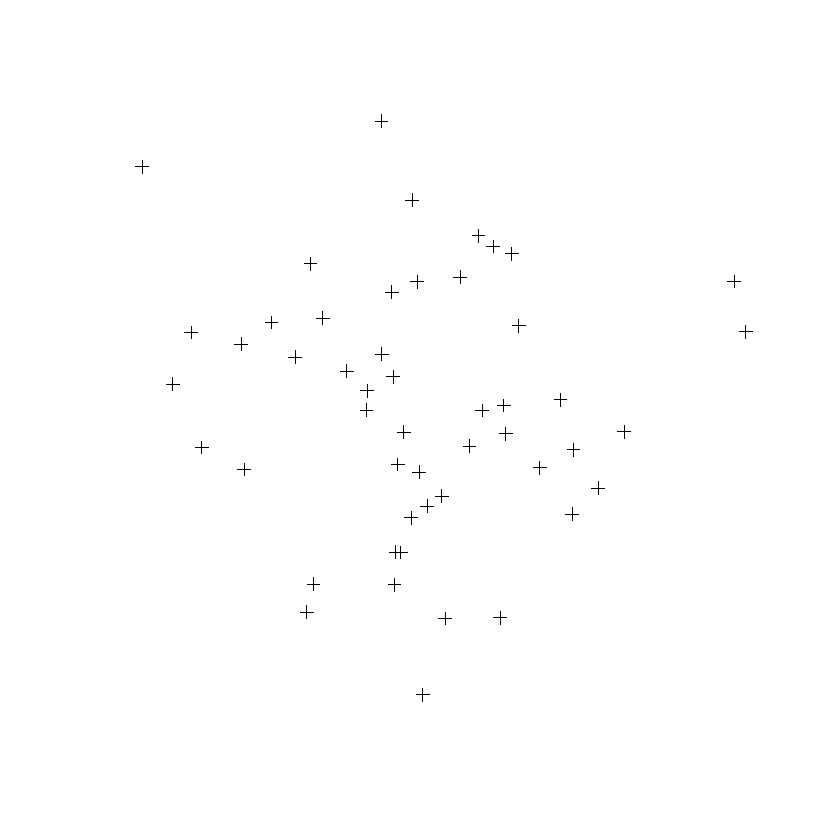

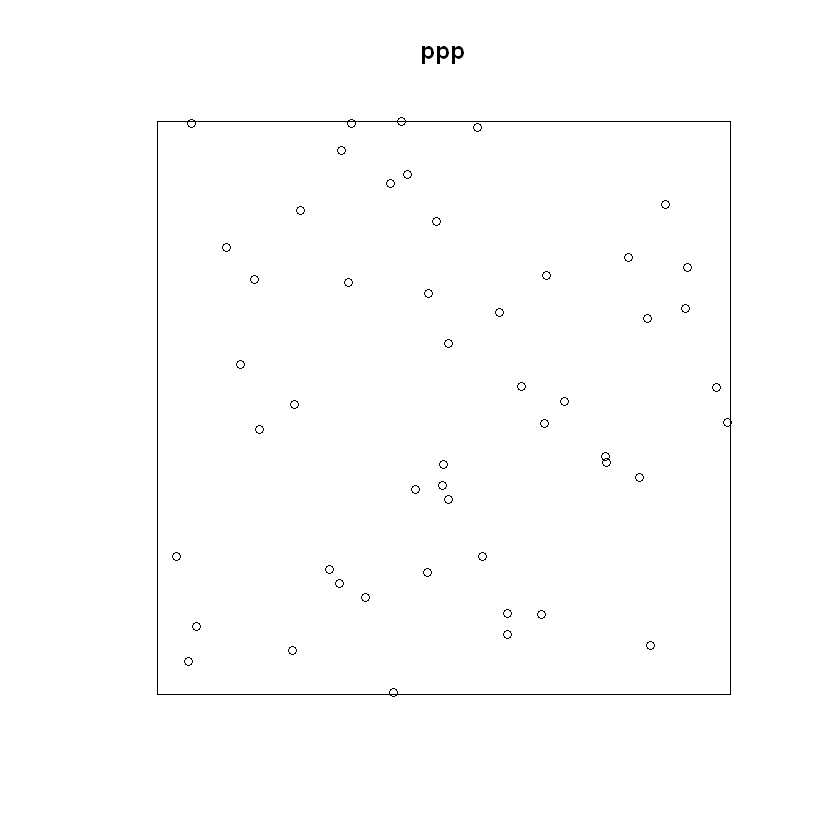

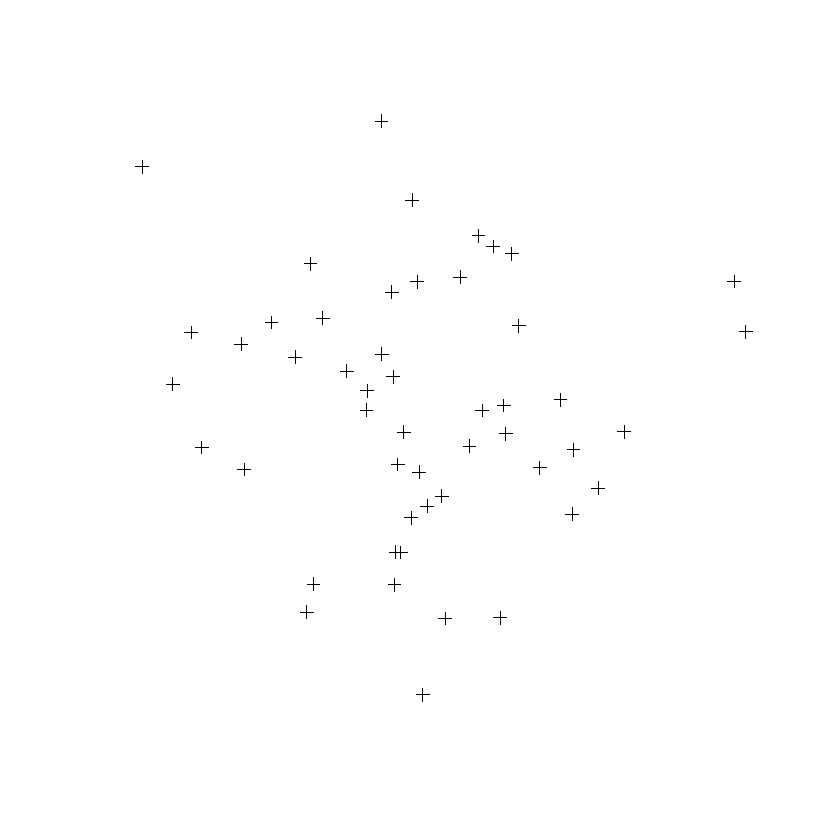

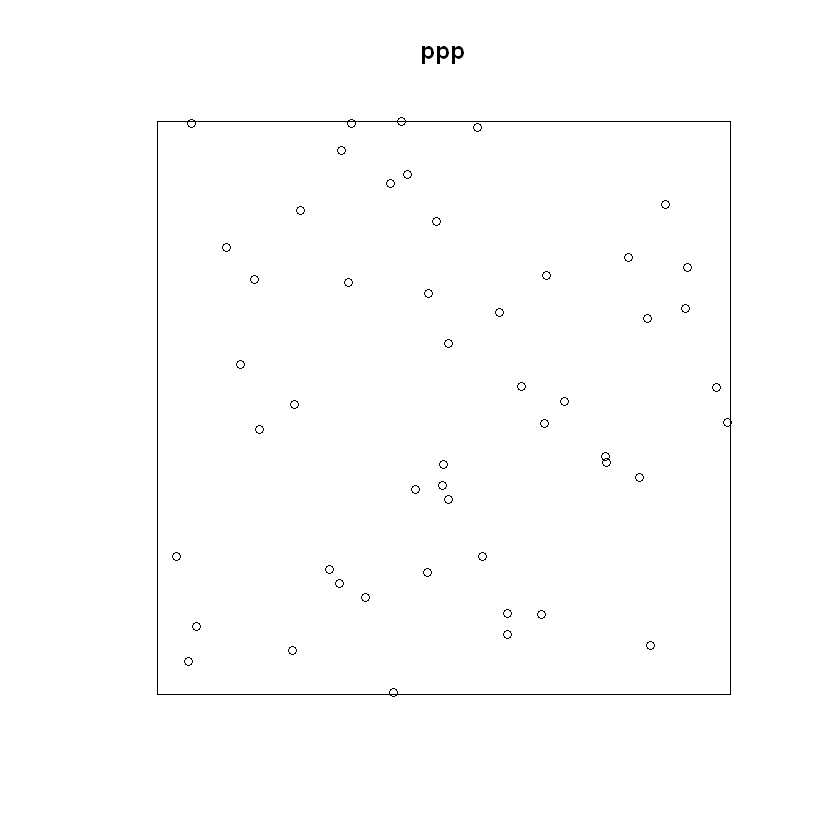

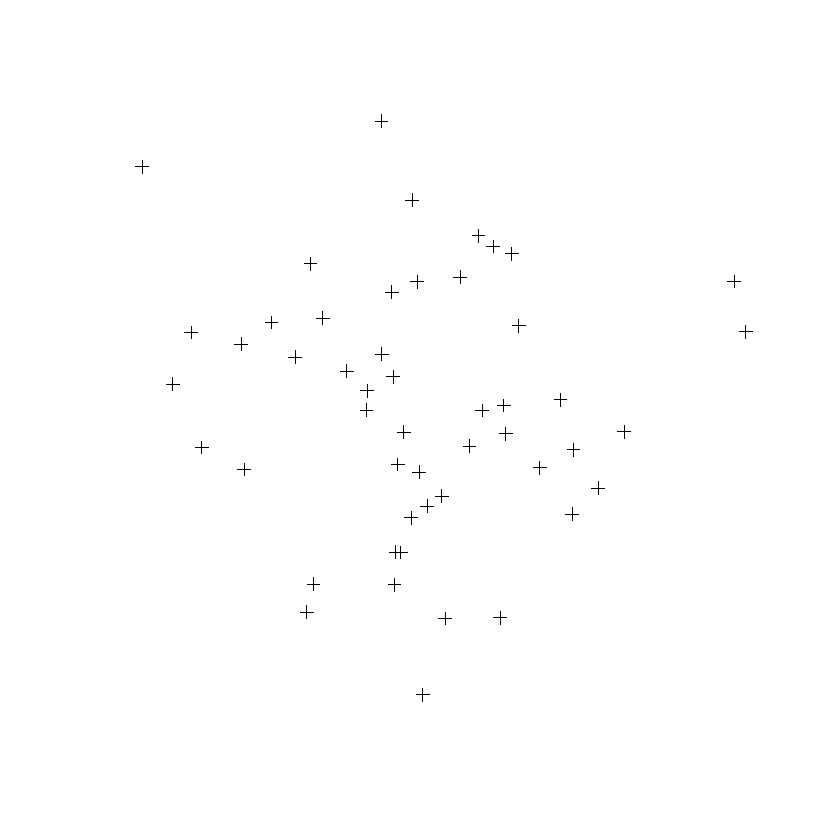

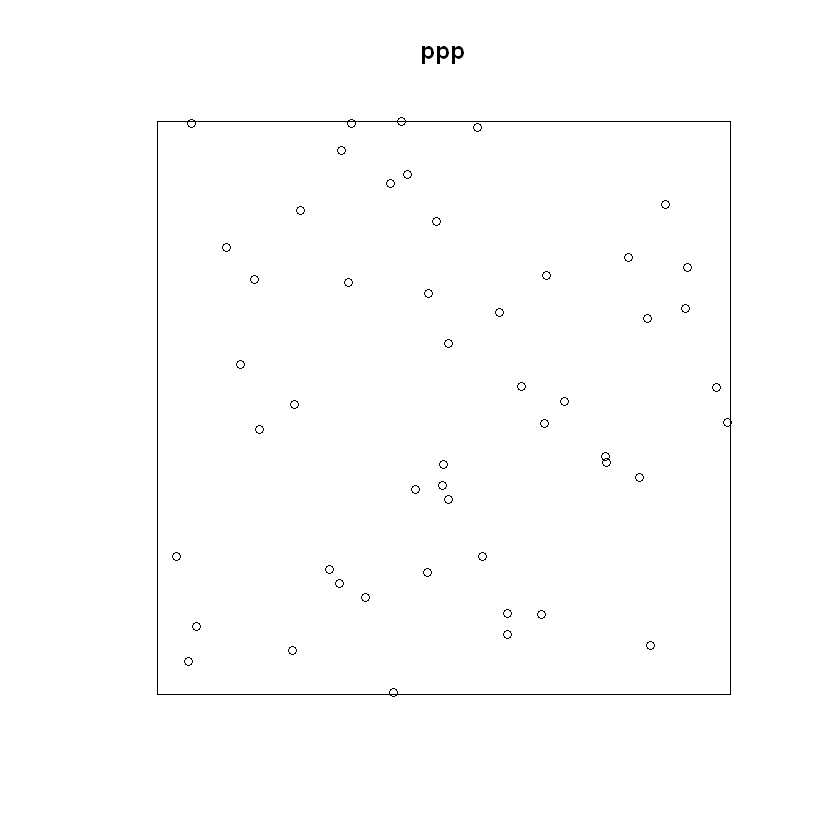

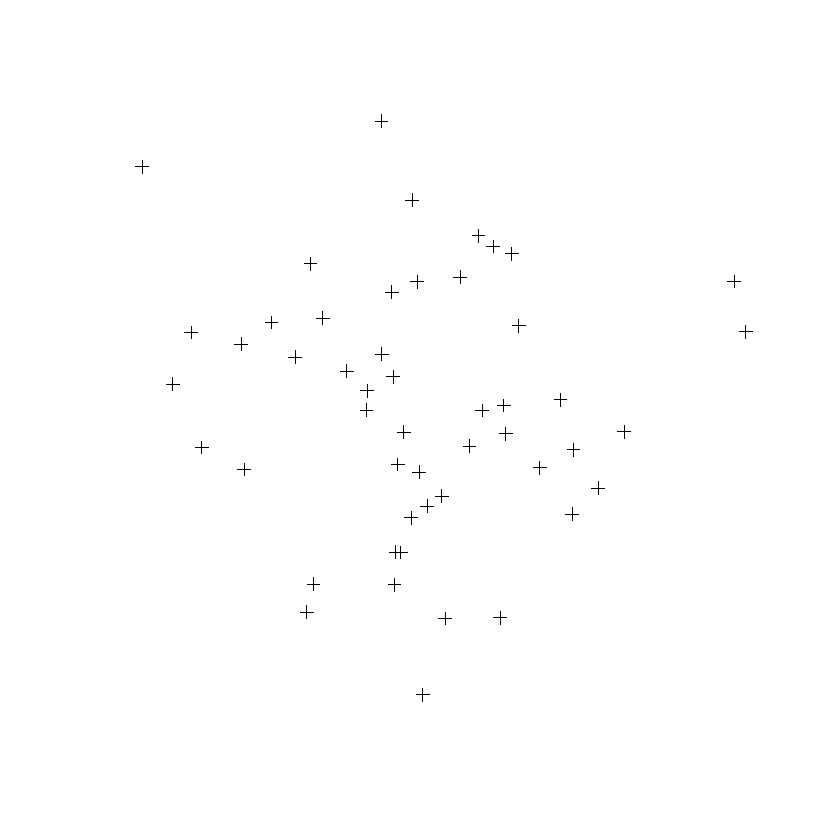

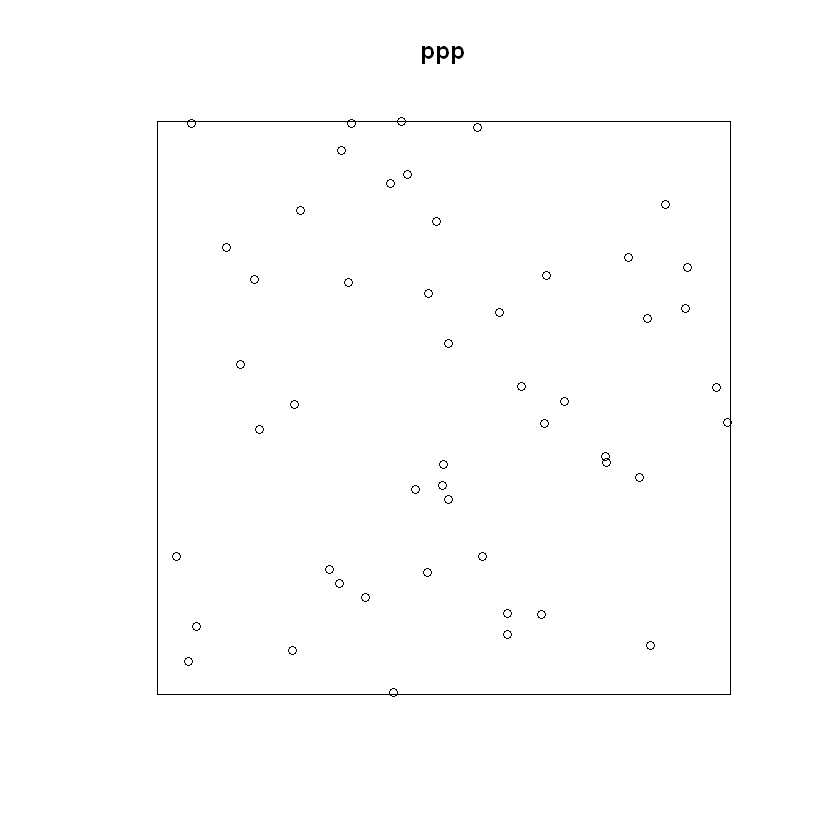

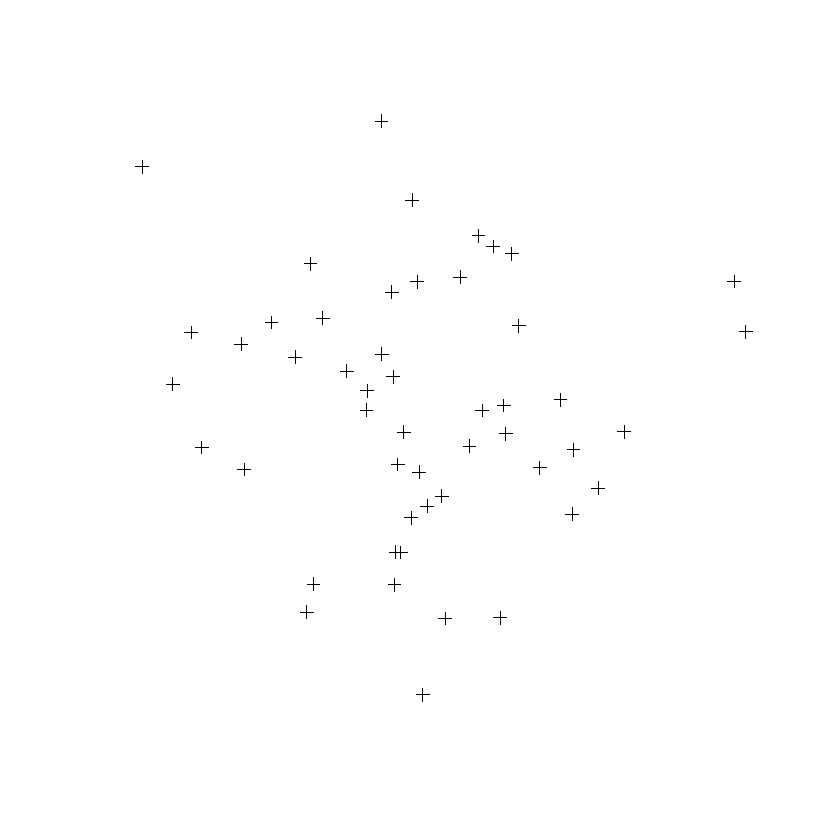

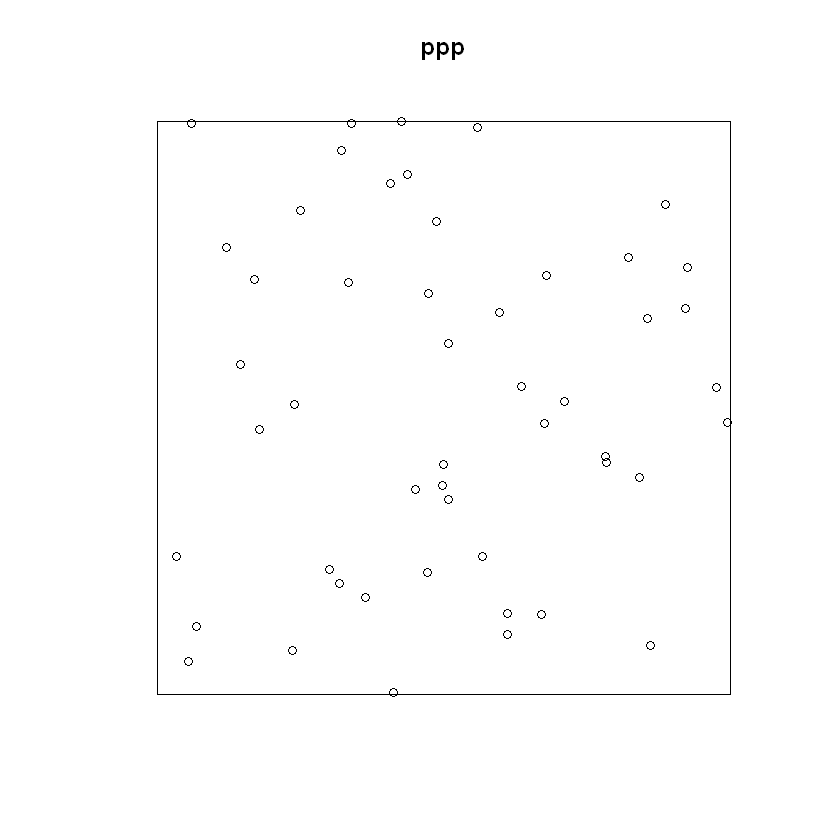

In [22]:
res1 = check_points(50)

In [23]:
print(res1)

Unit: milliseconds
      expr      min       lq     mean   median      uq     max neval cld
  plot(sp) 7.176501 9.008802 22.61108 30.77370 32.0114 68.8890    50   a
 plot(ppp) 5.007402 9.217501 21.87018 31.16635 32.9363 36.3036    50   a


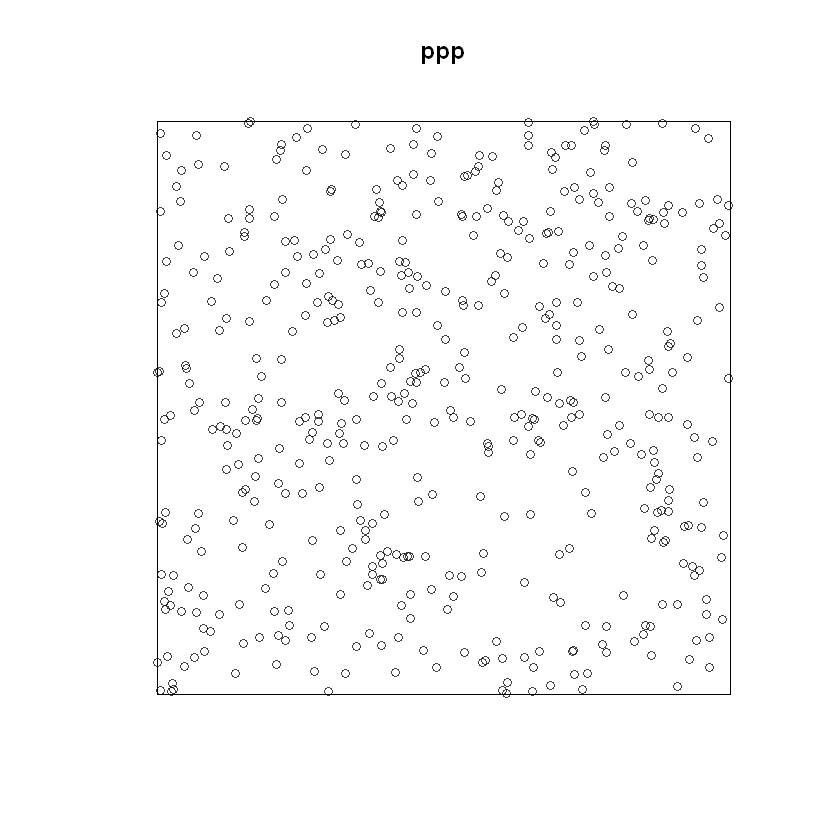

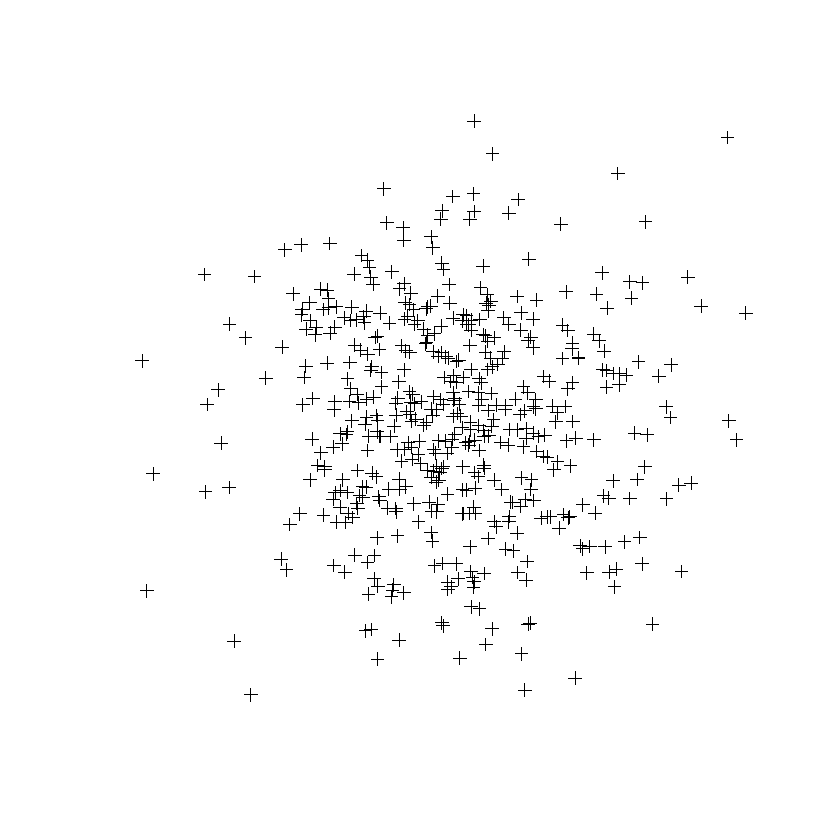

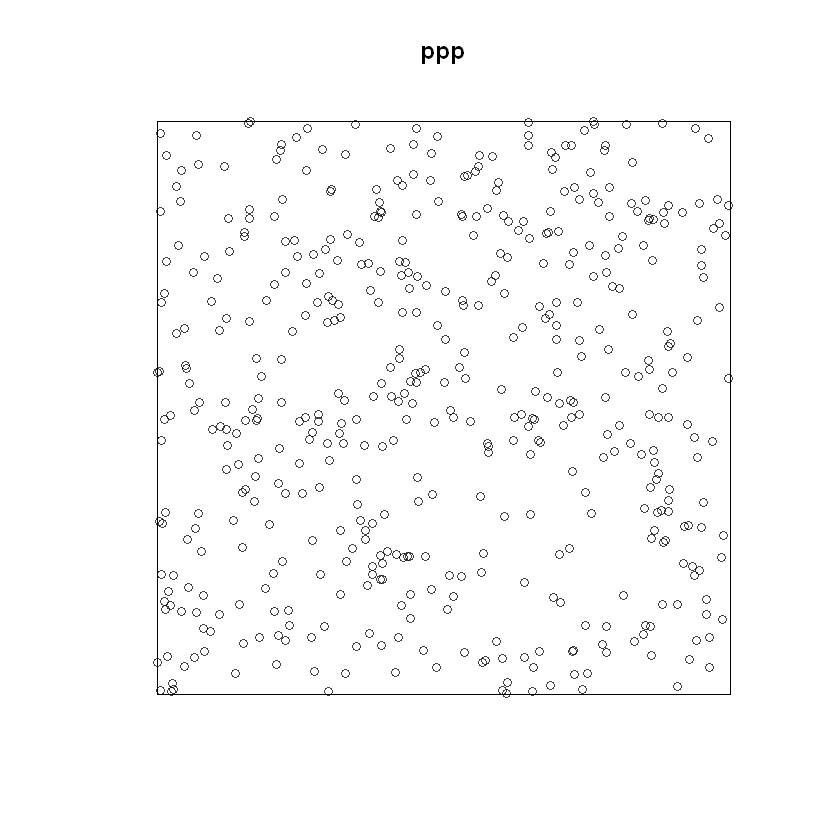

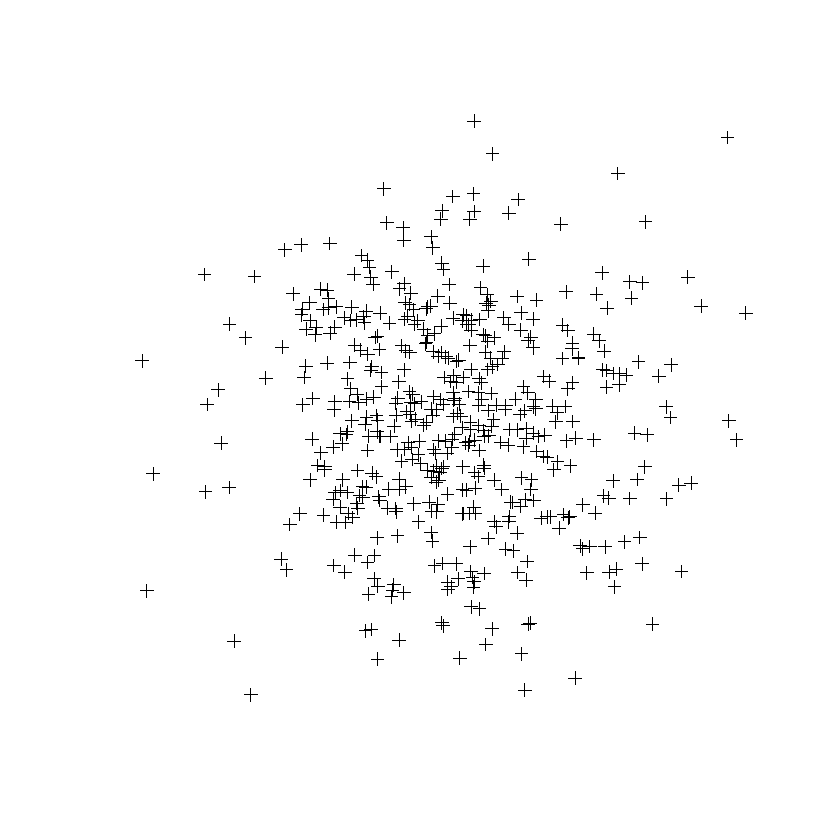

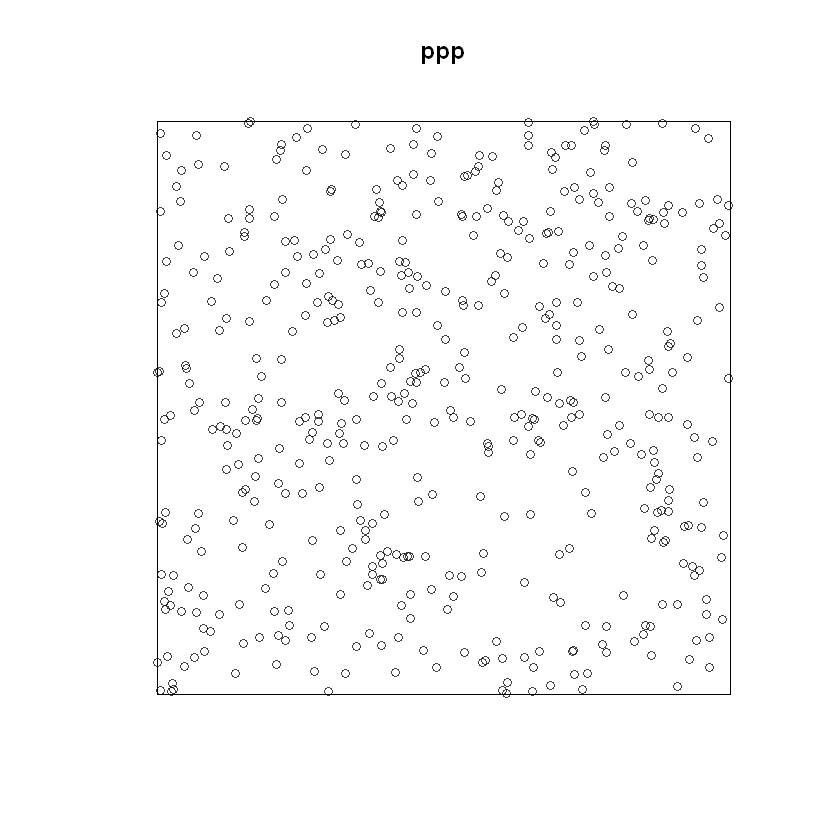

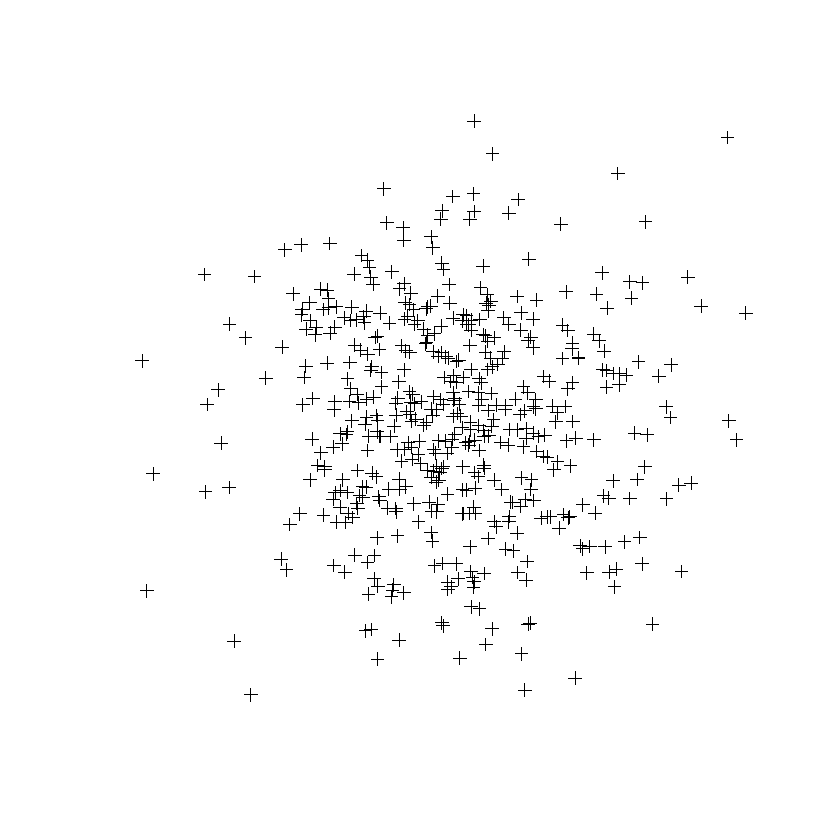

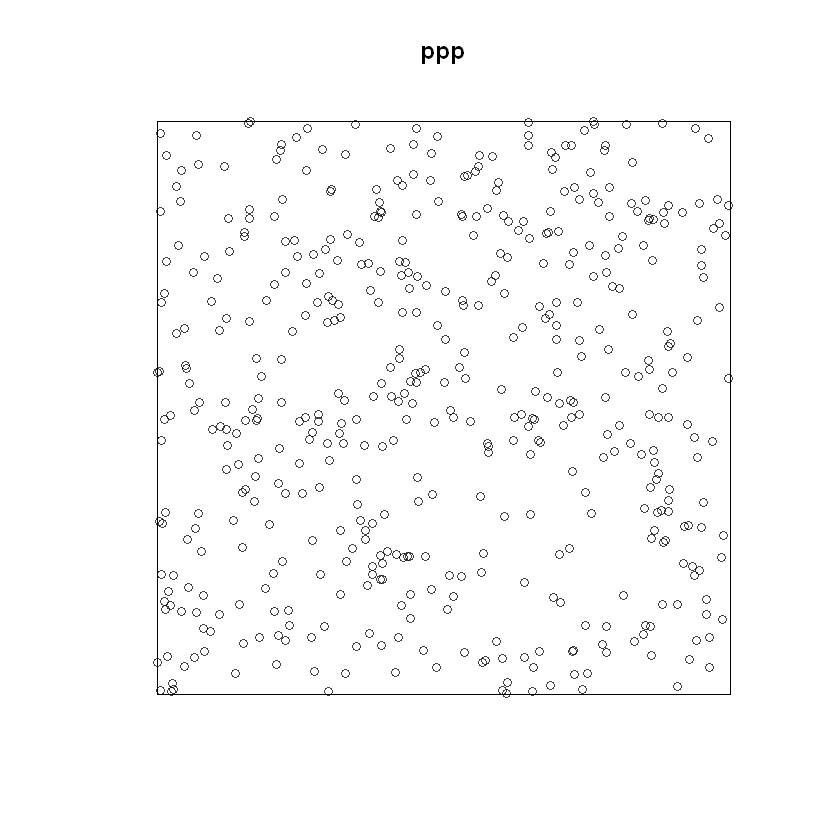

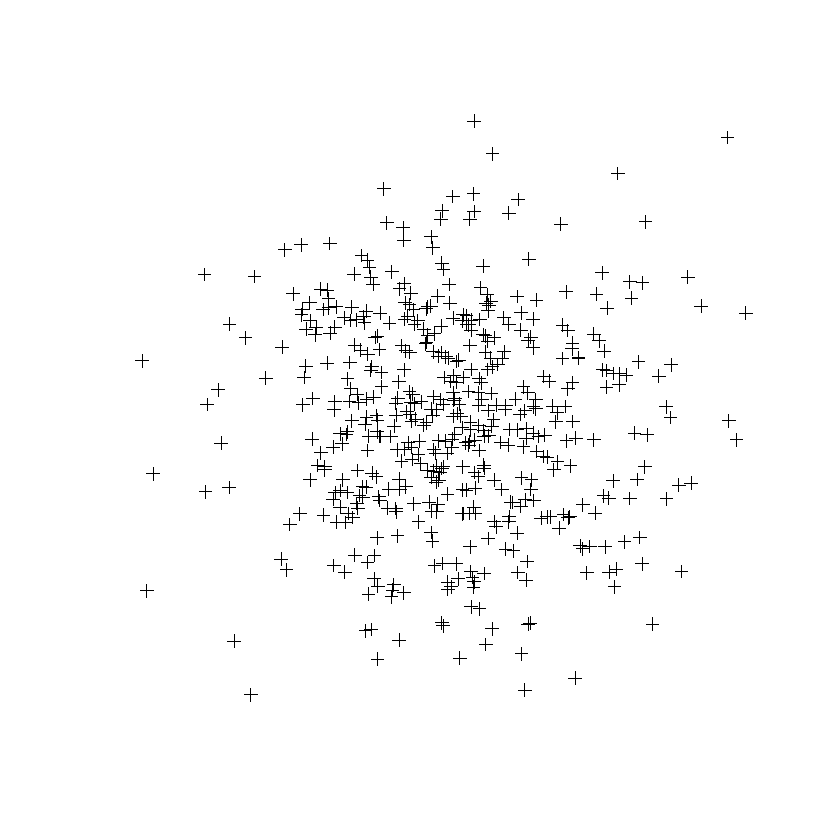

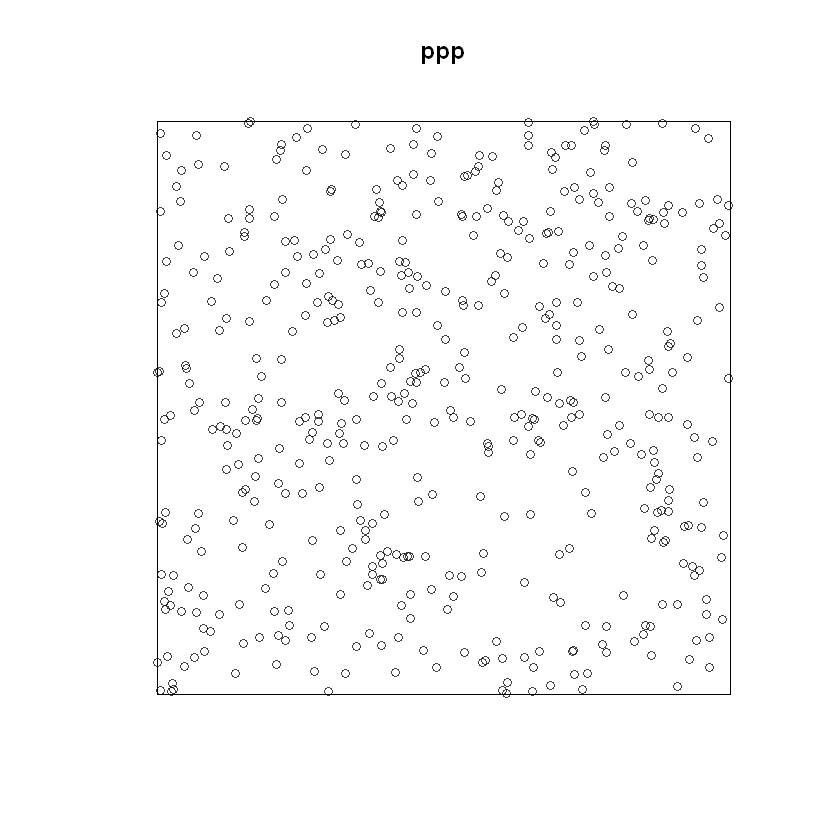

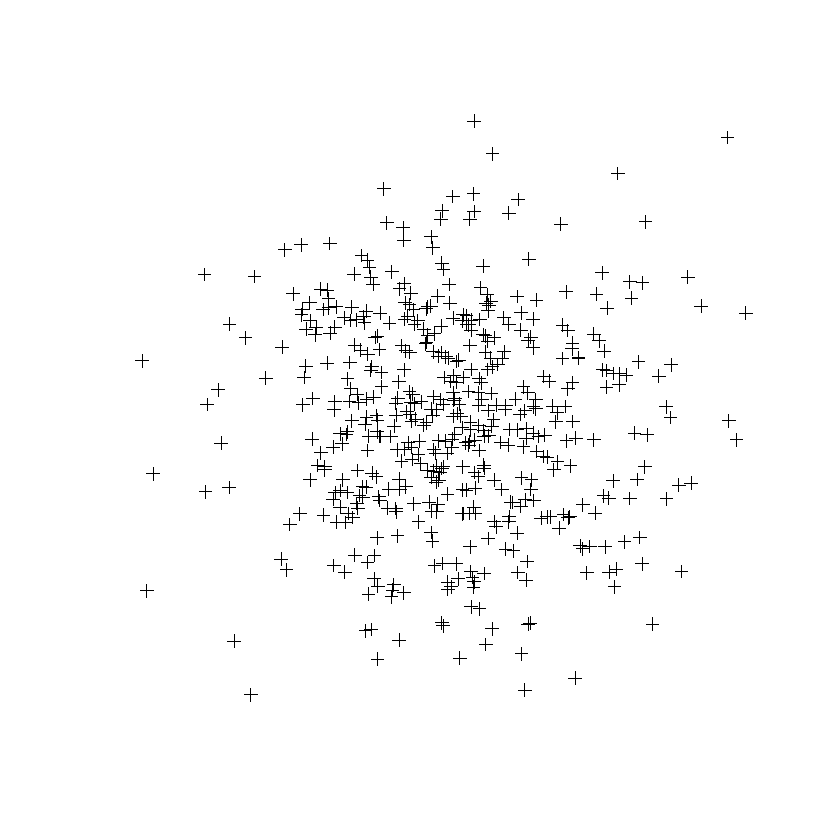

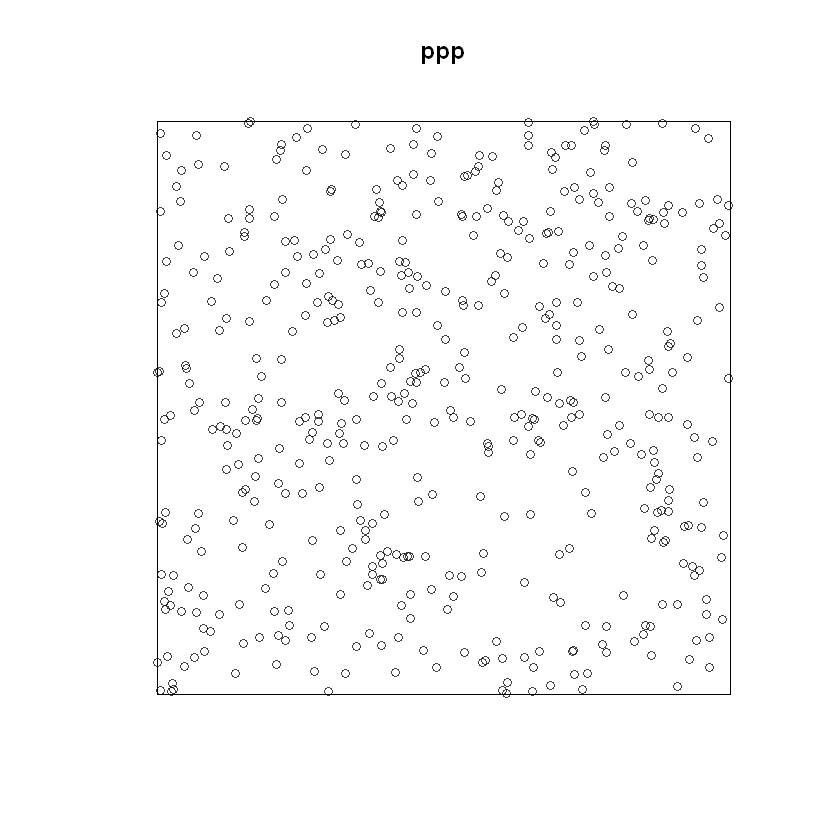

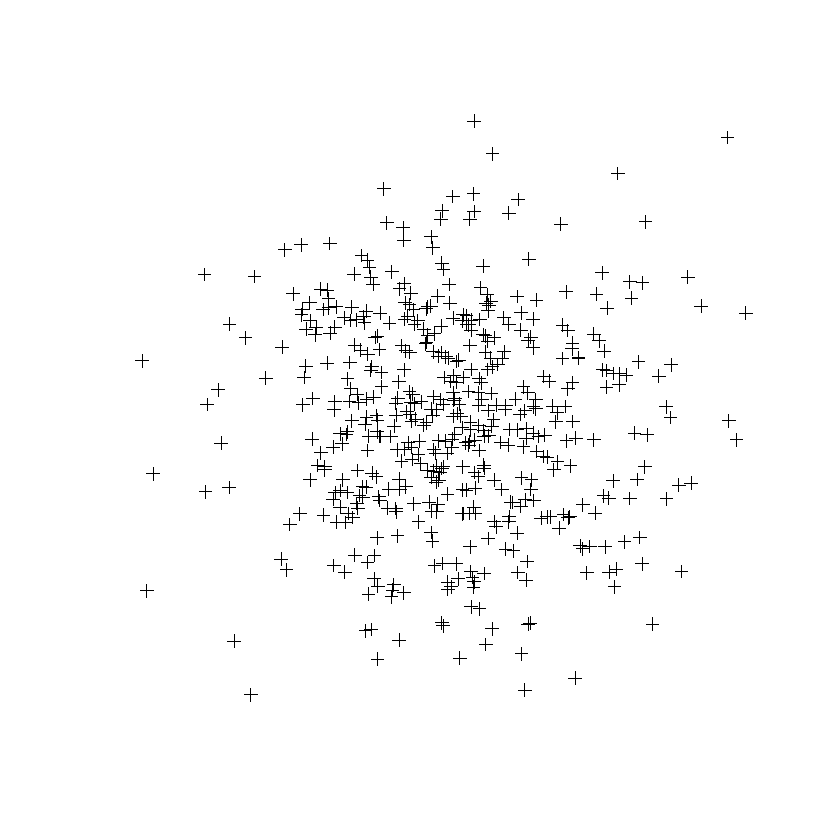

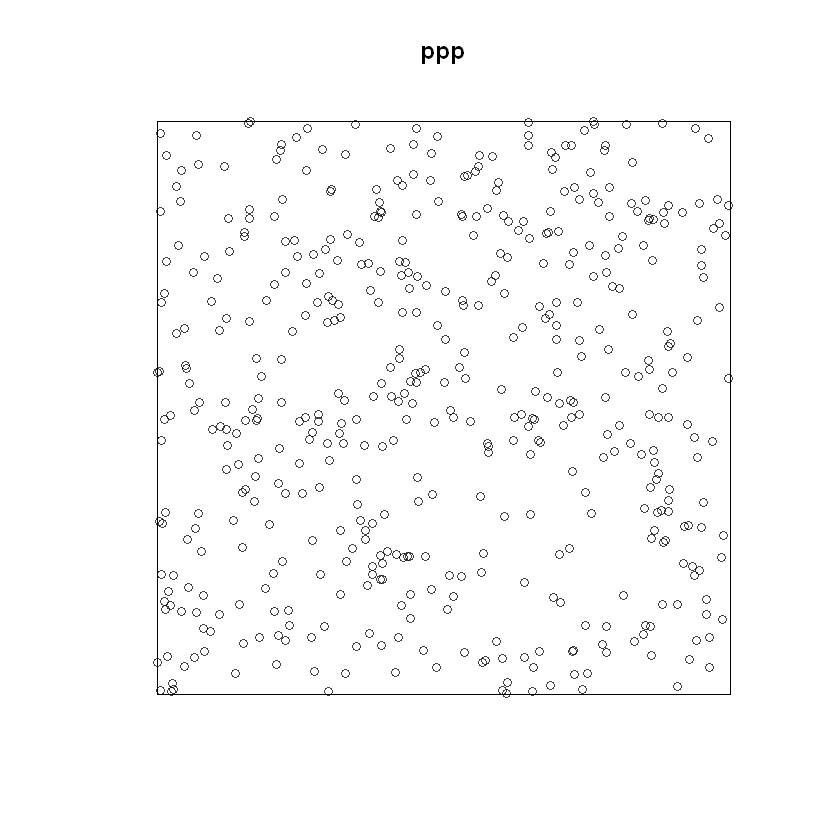

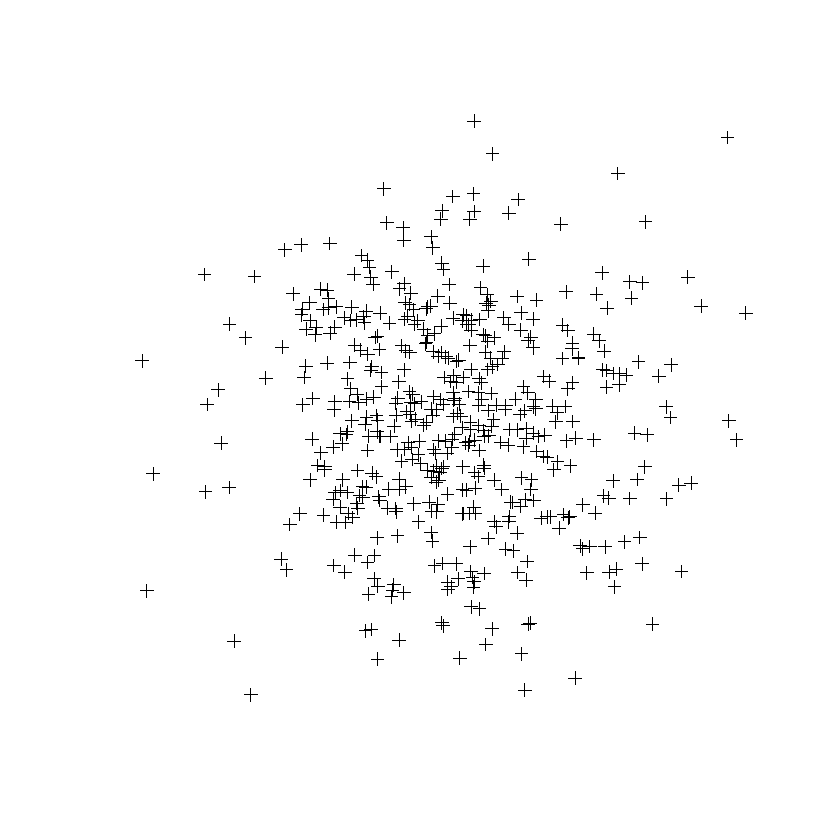

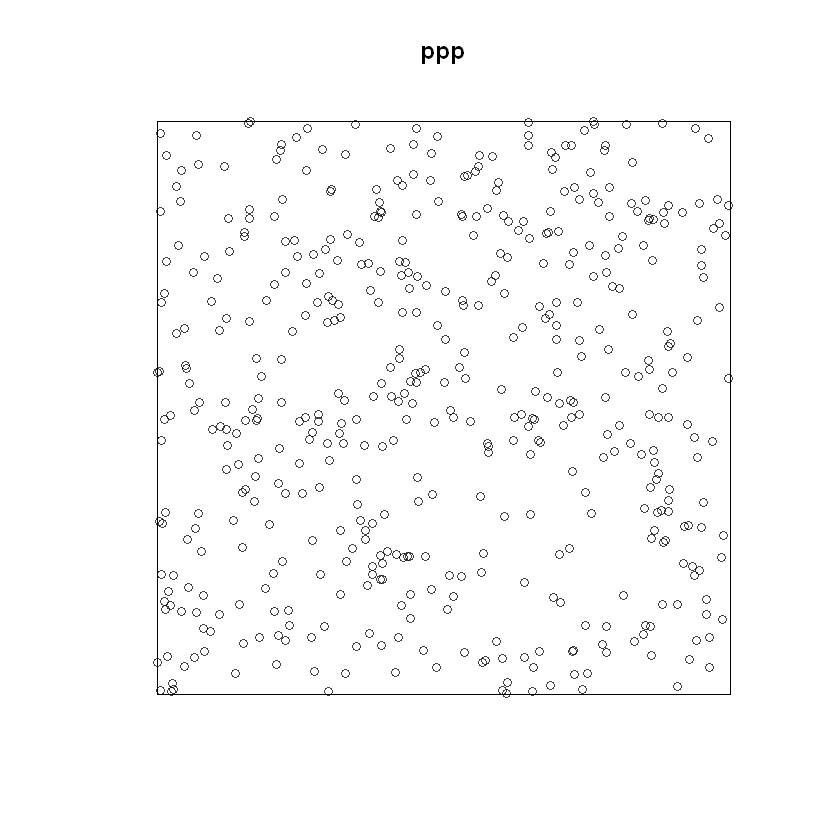

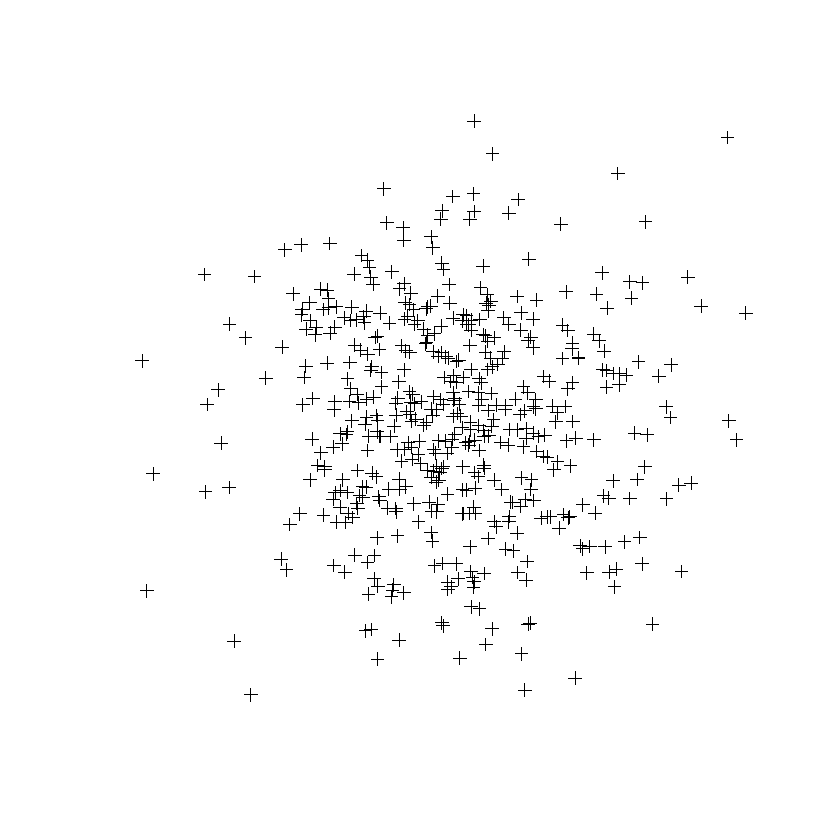

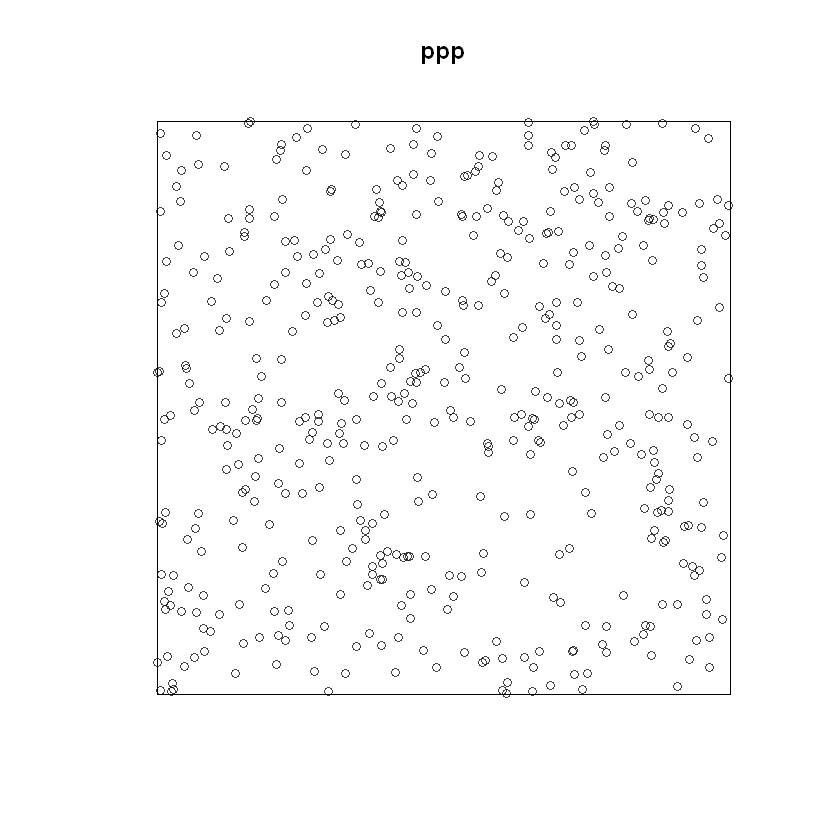

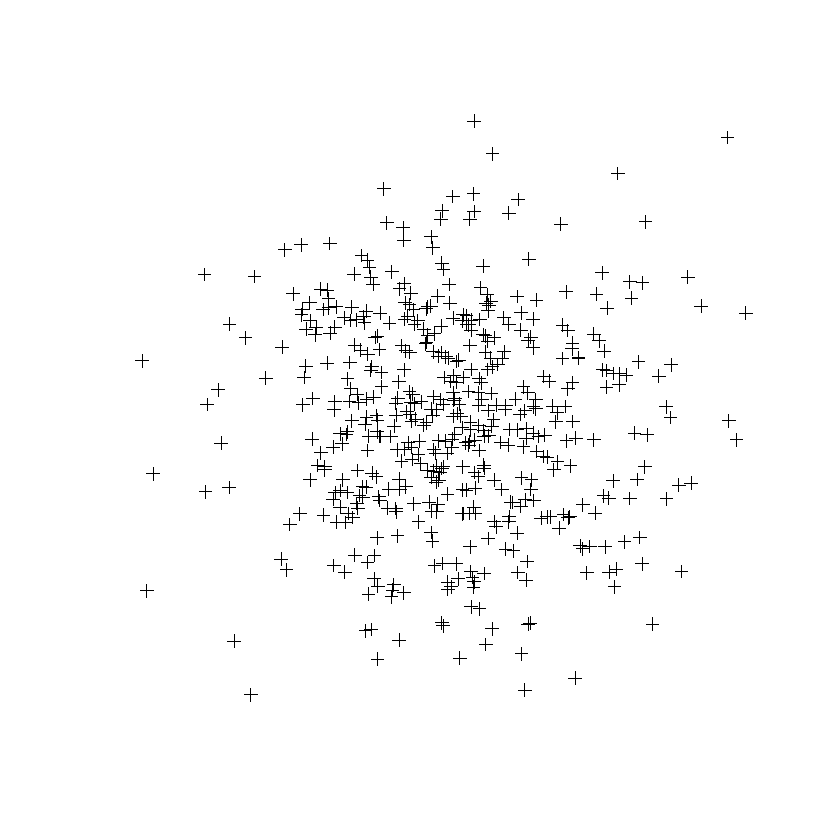

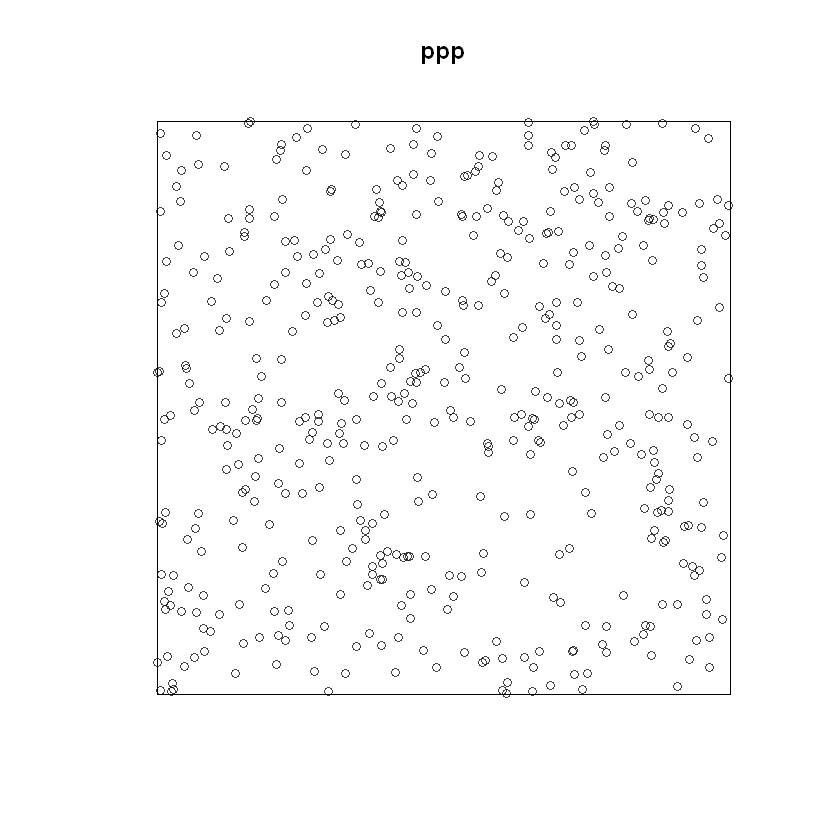

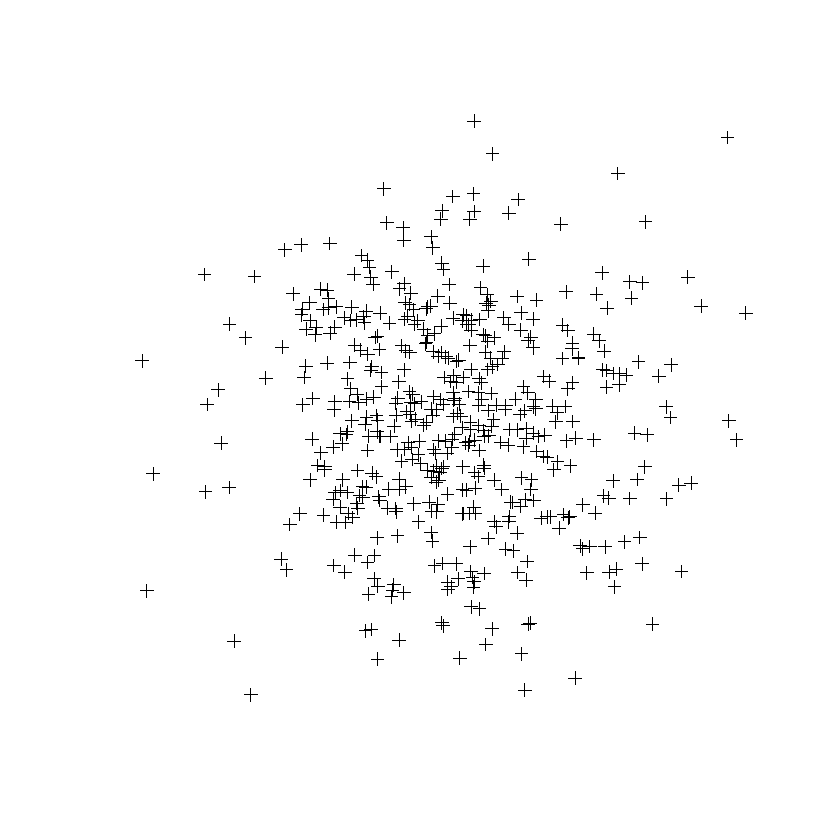

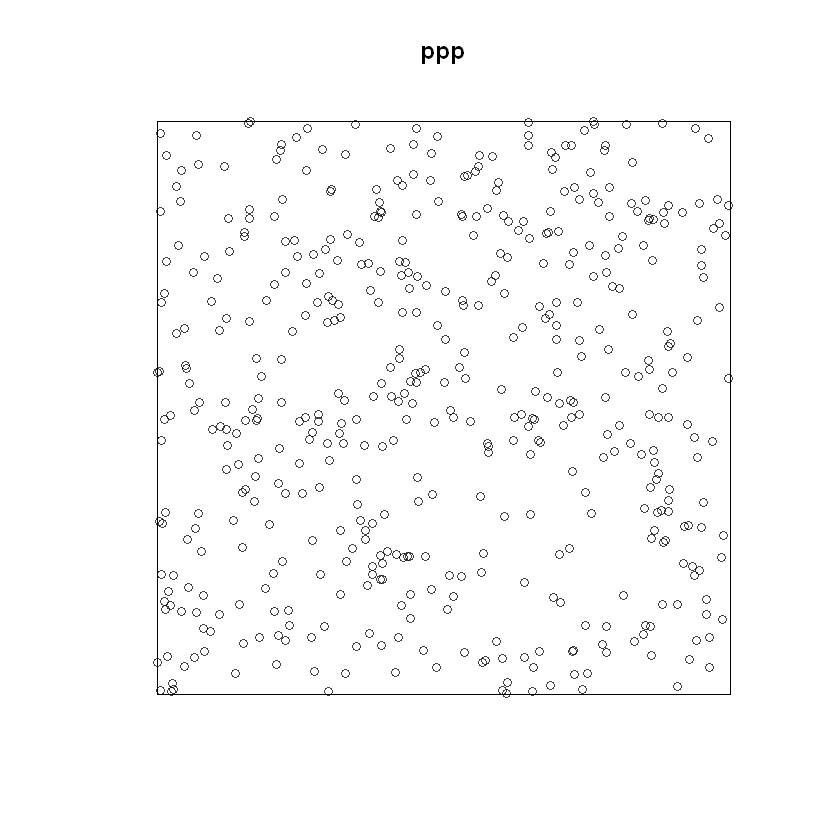

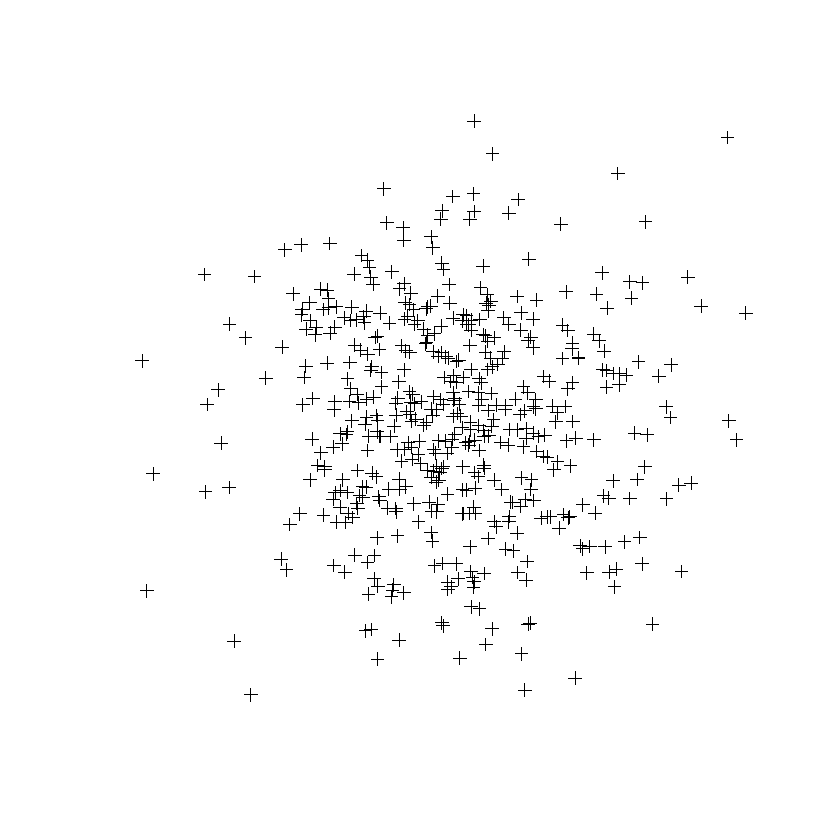

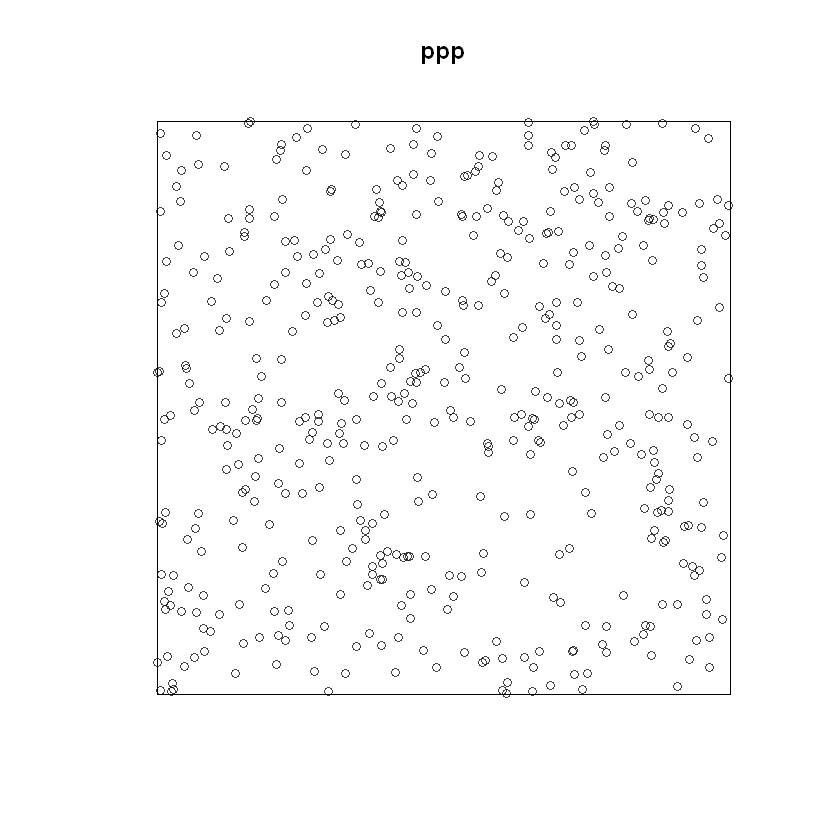

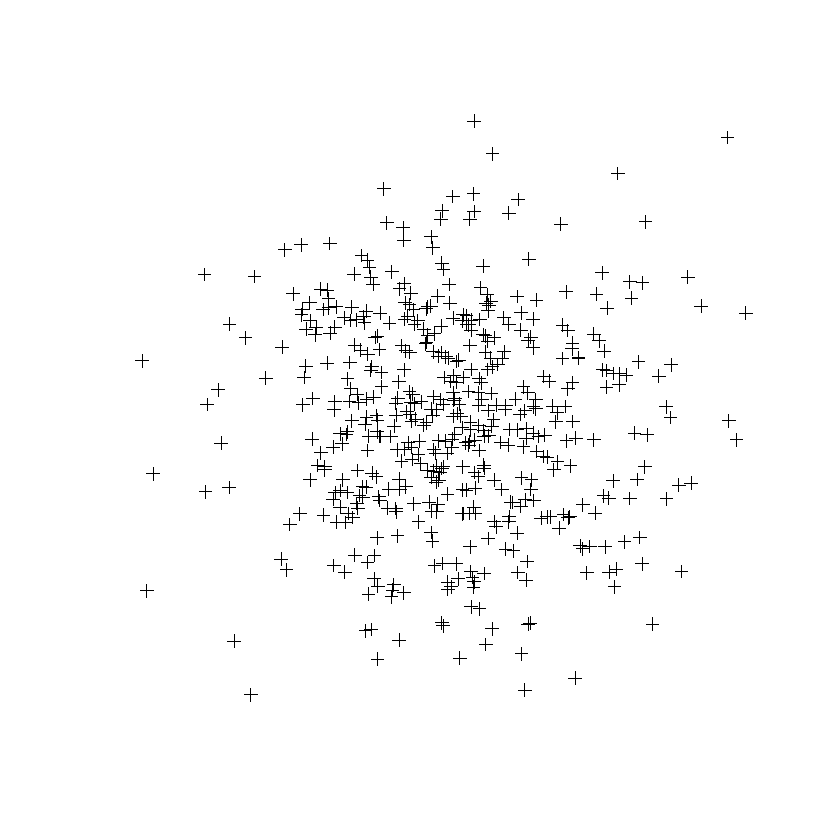

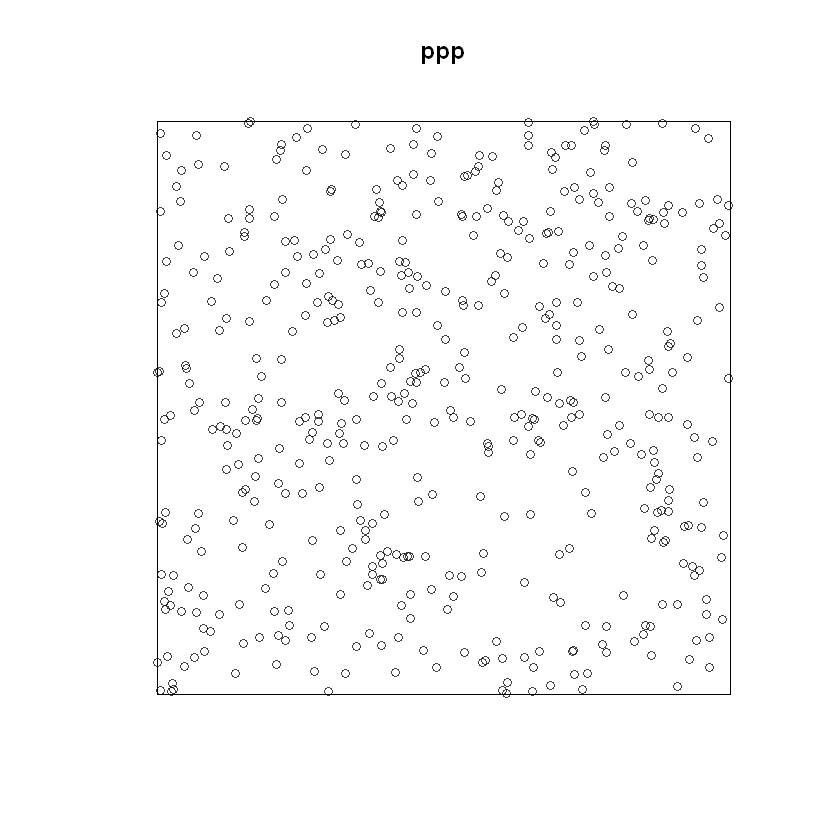

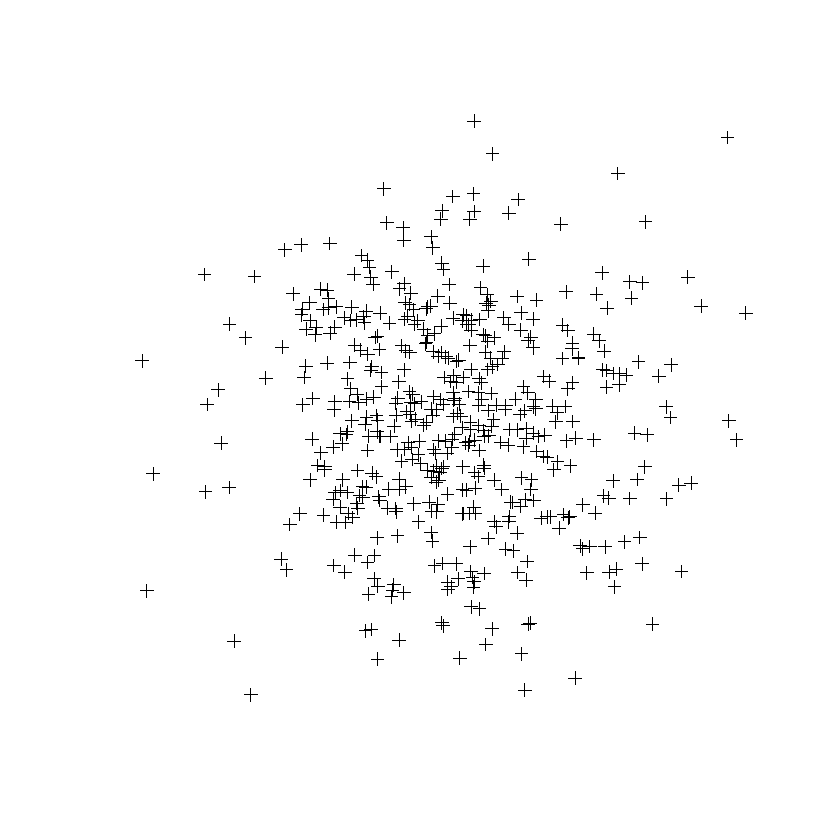

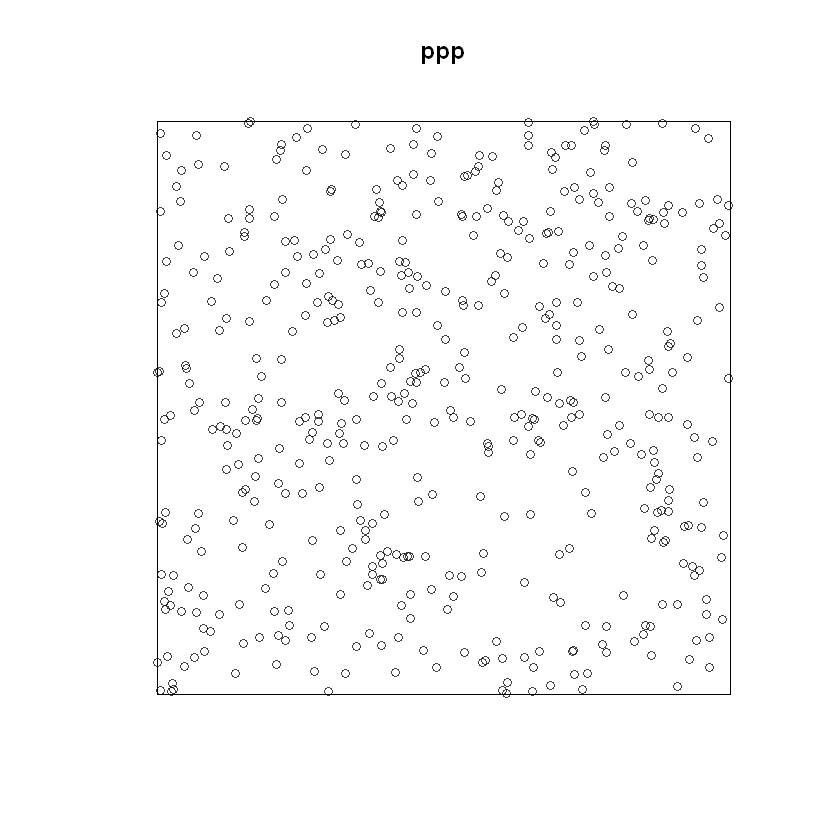

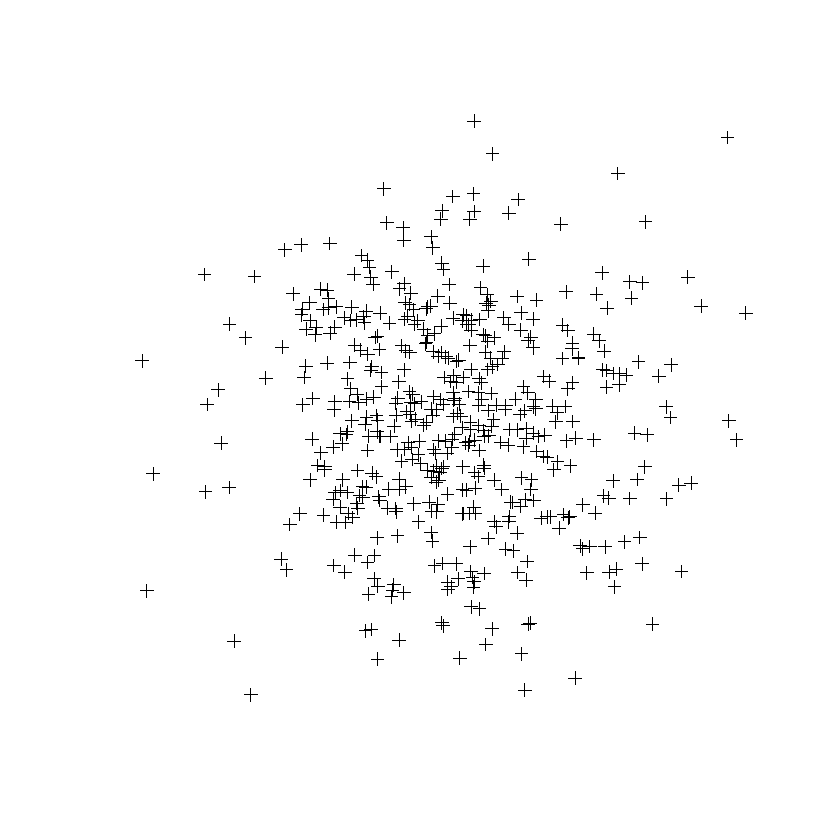

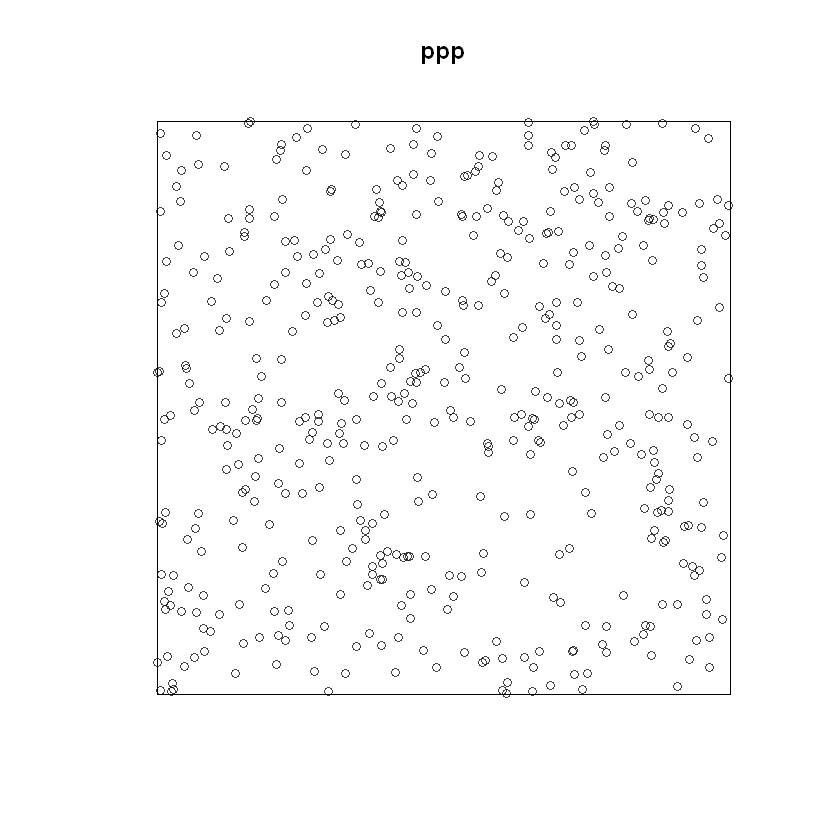

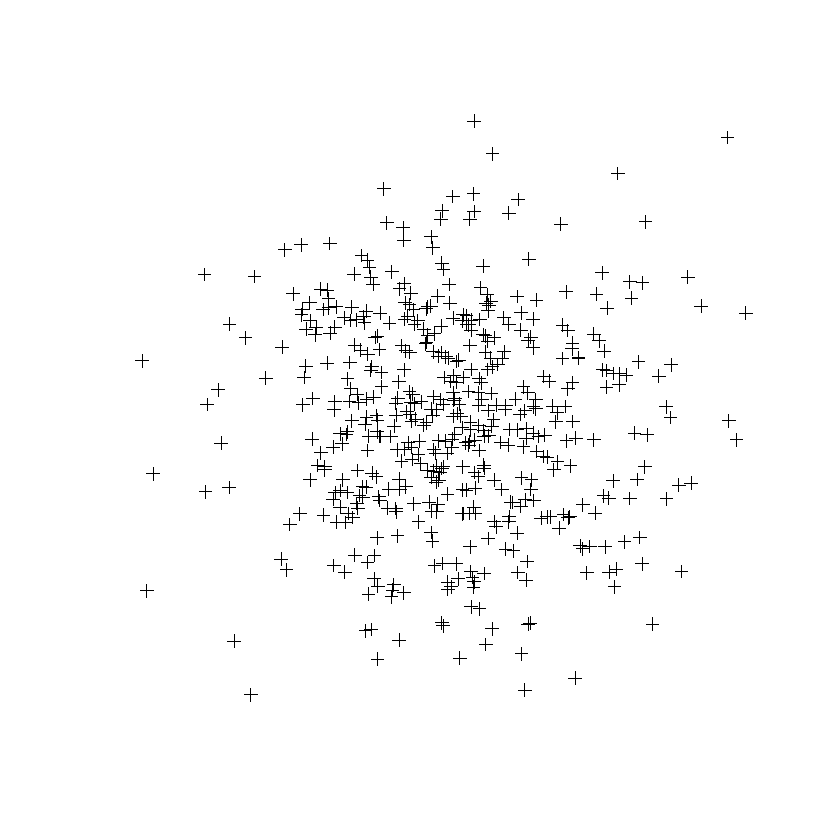

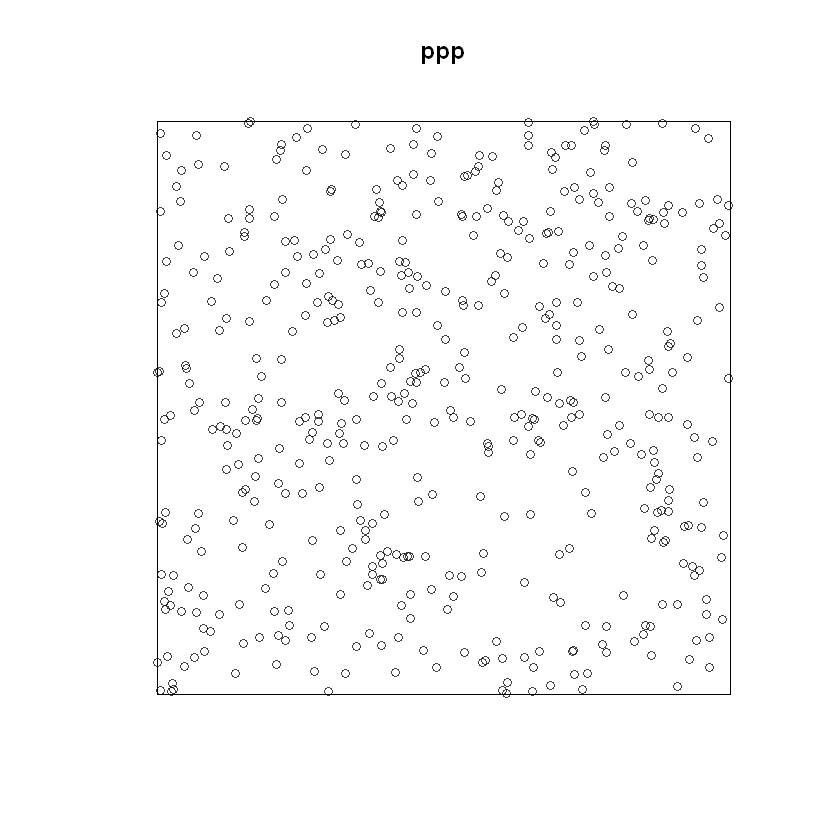

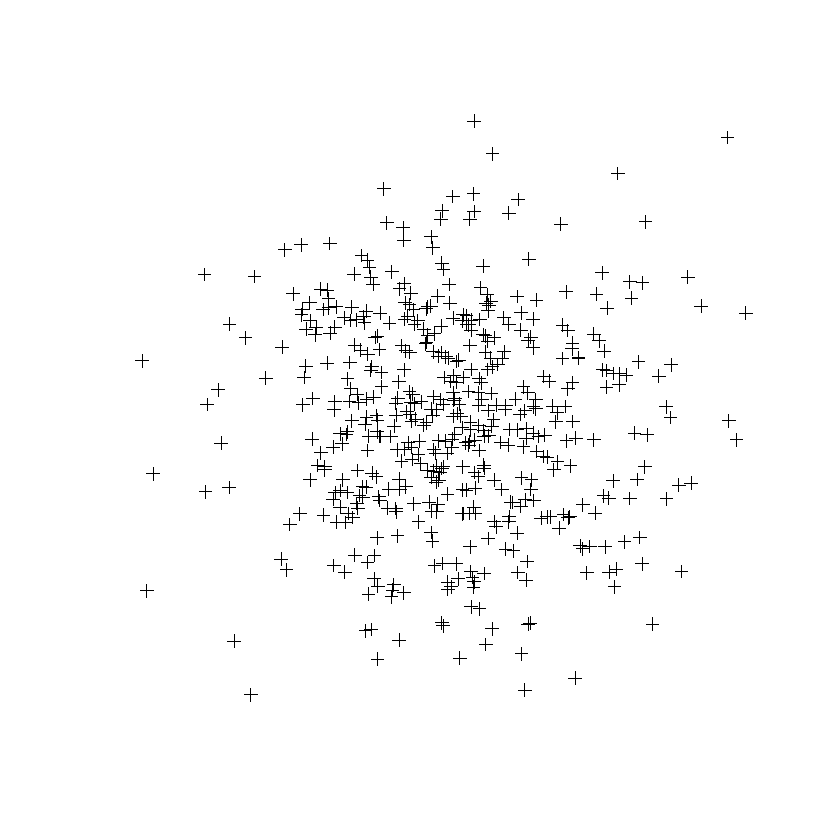

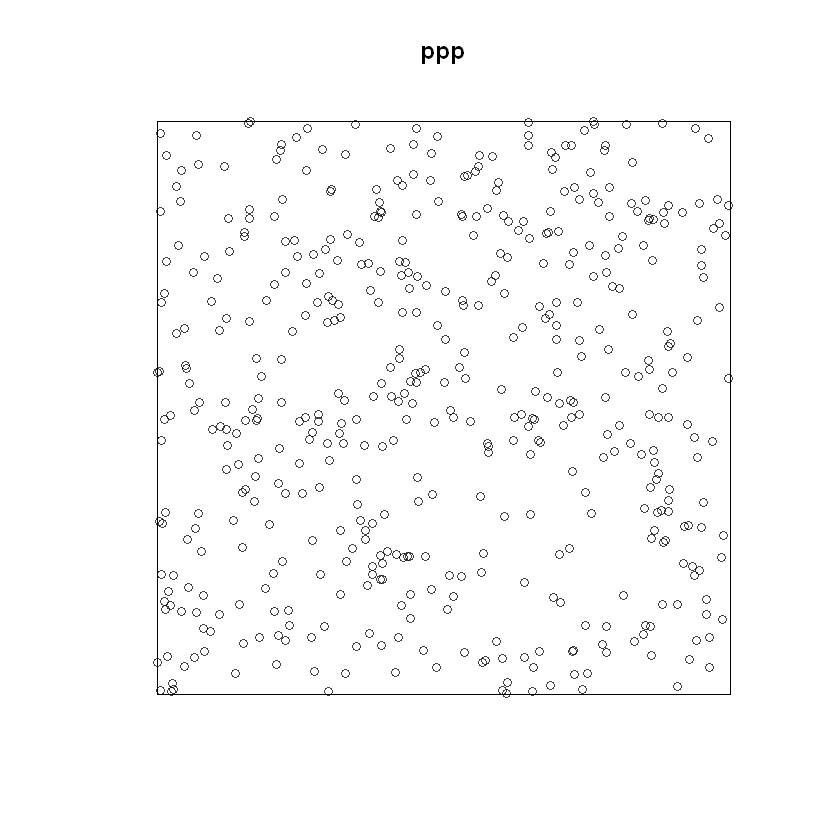

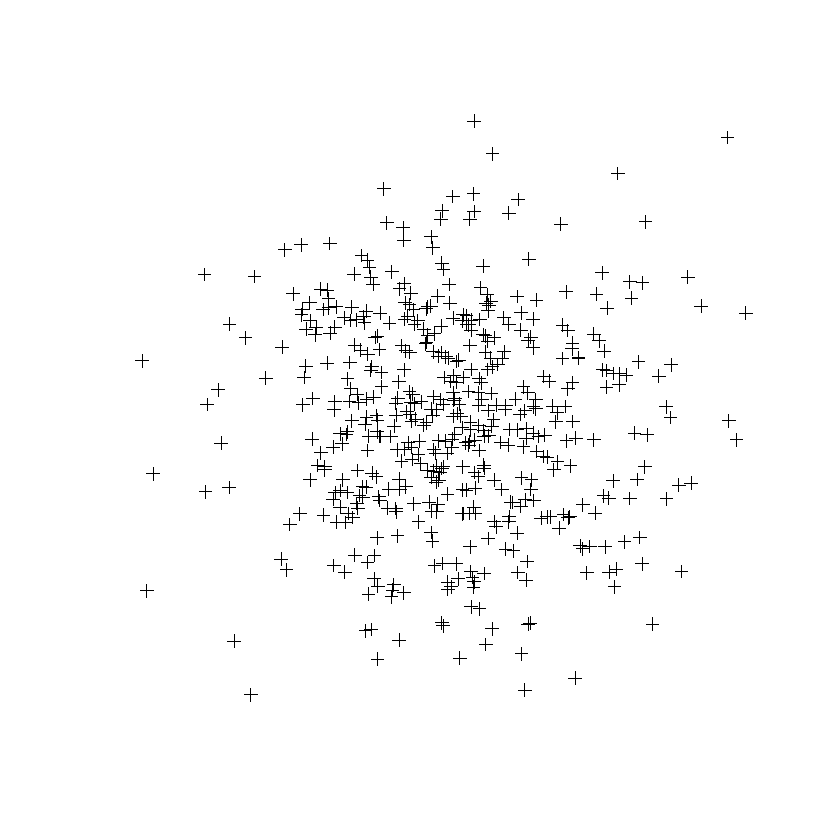

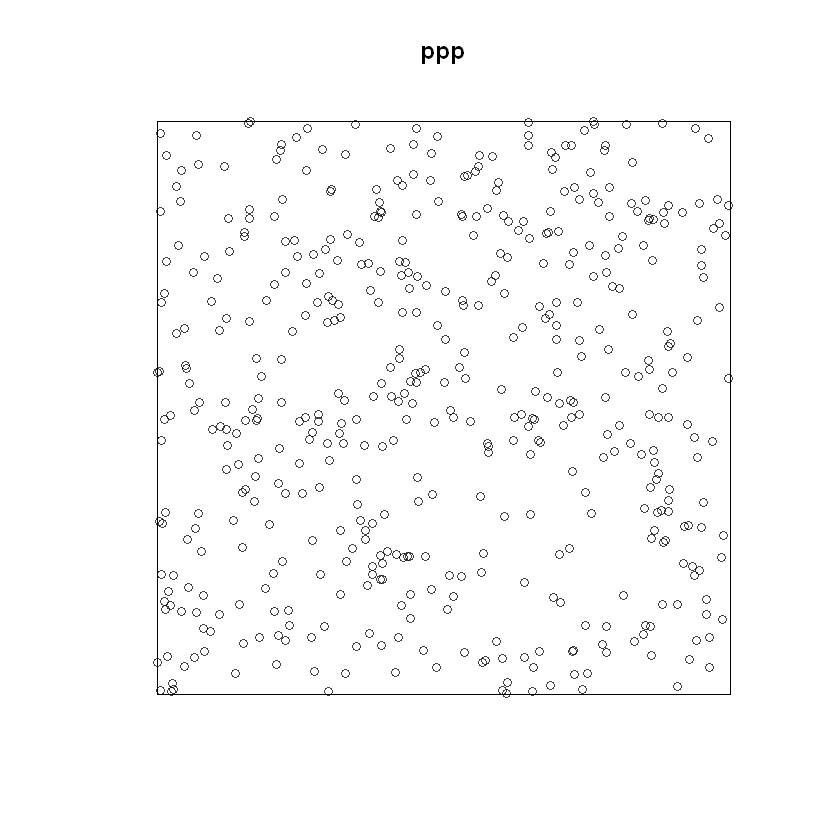

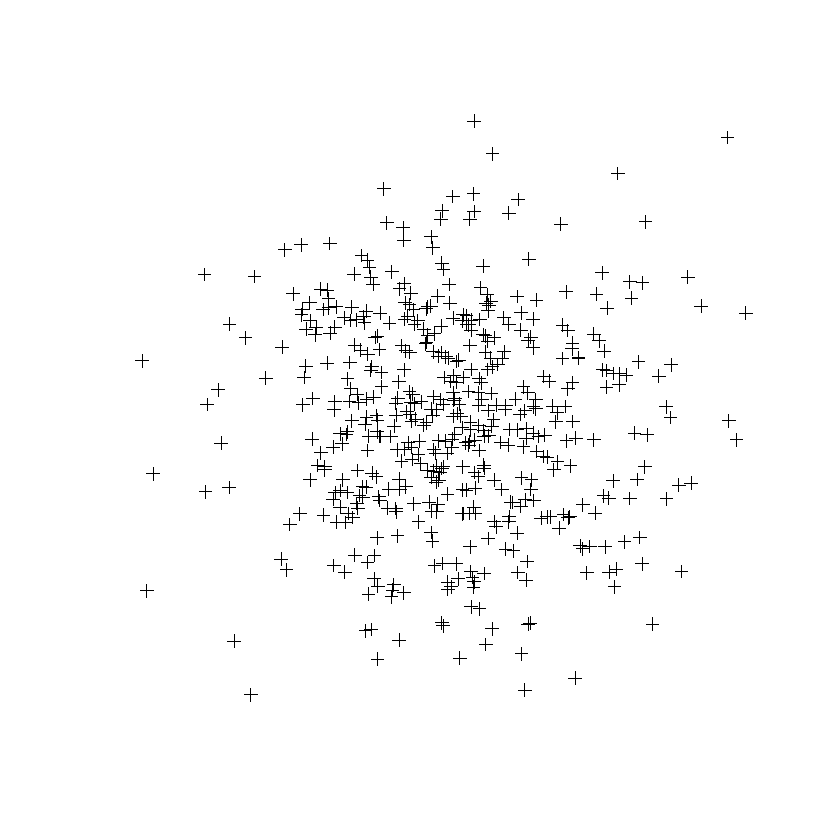

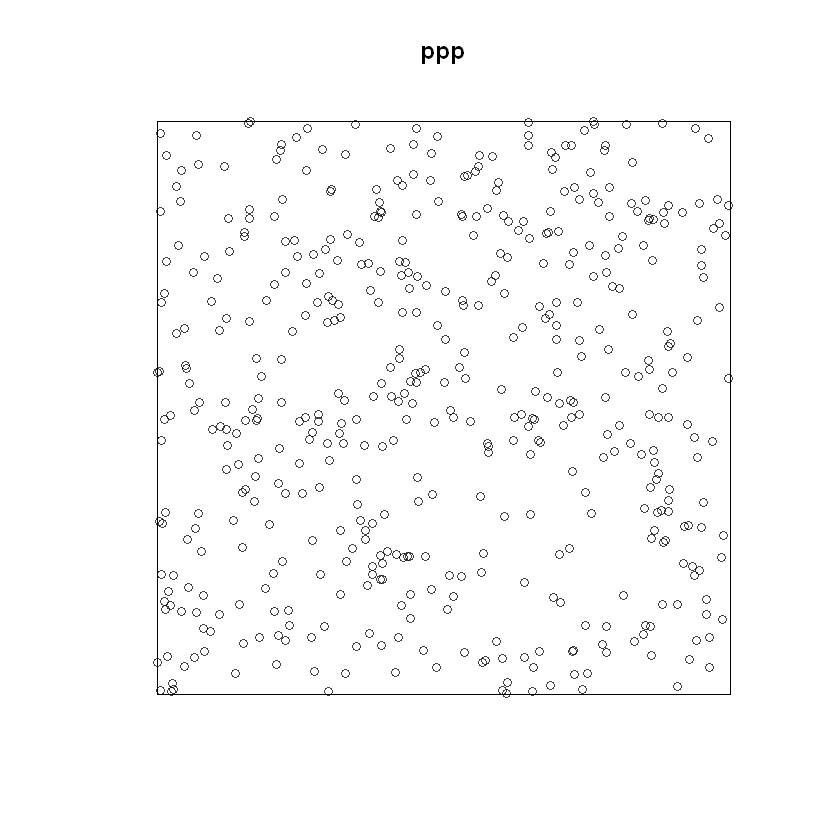

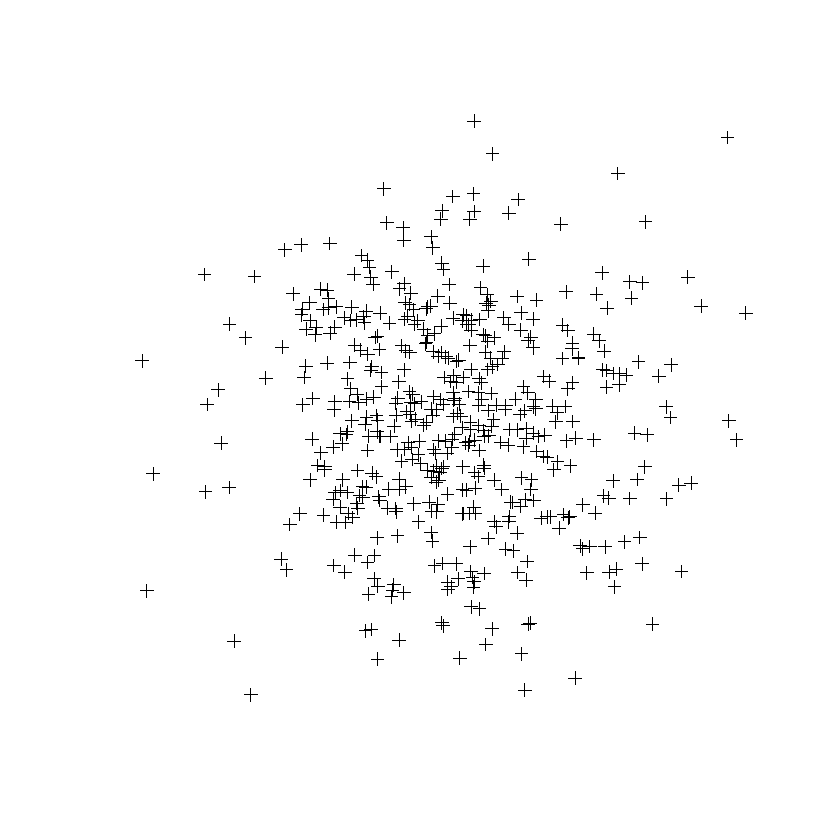

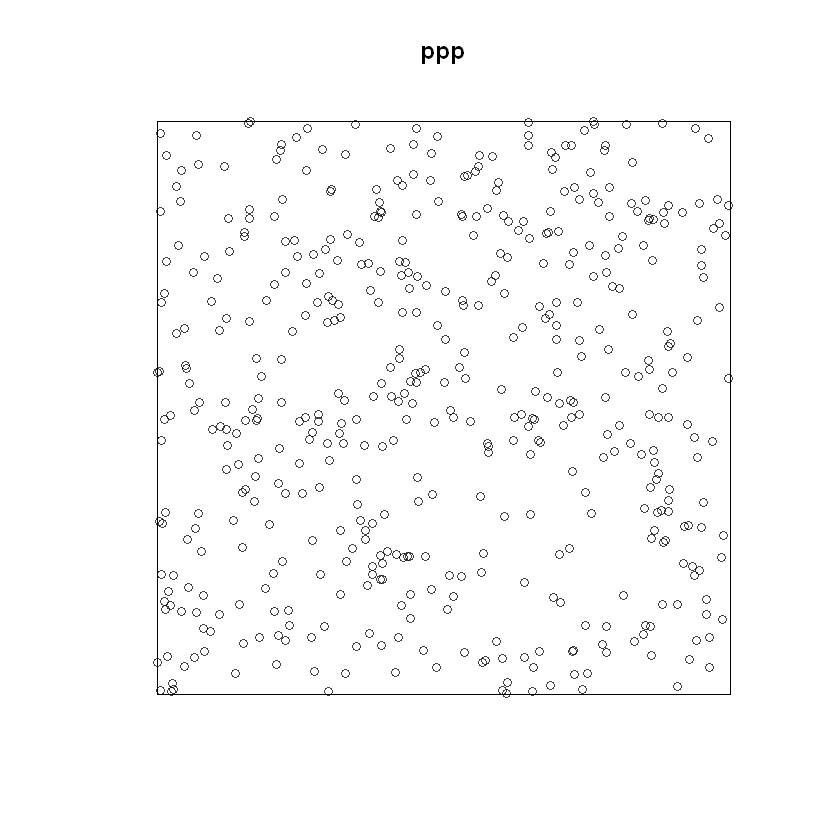

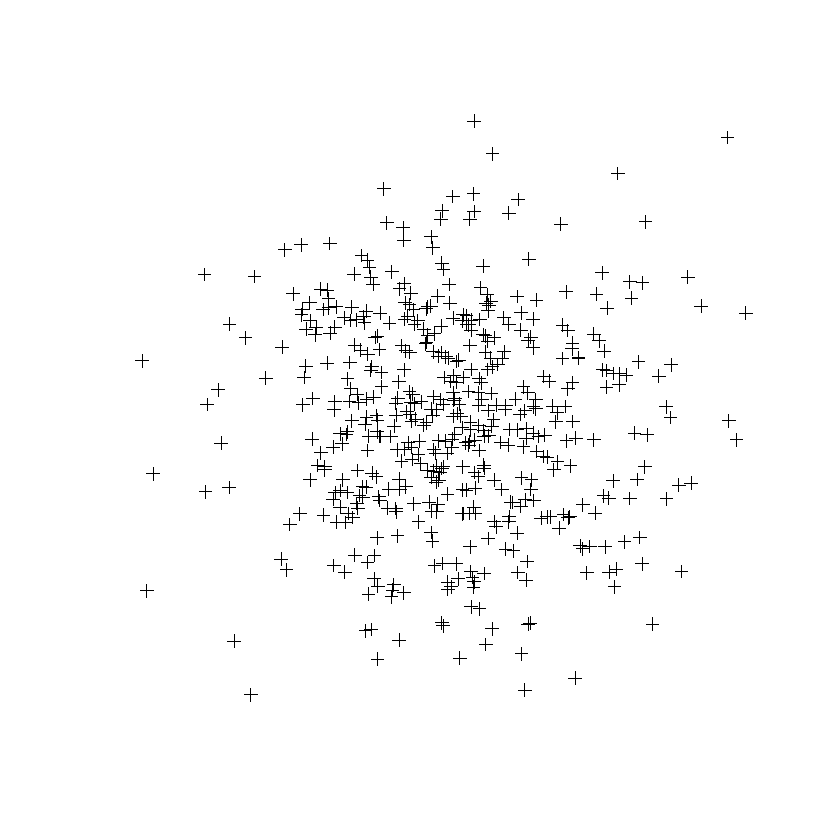

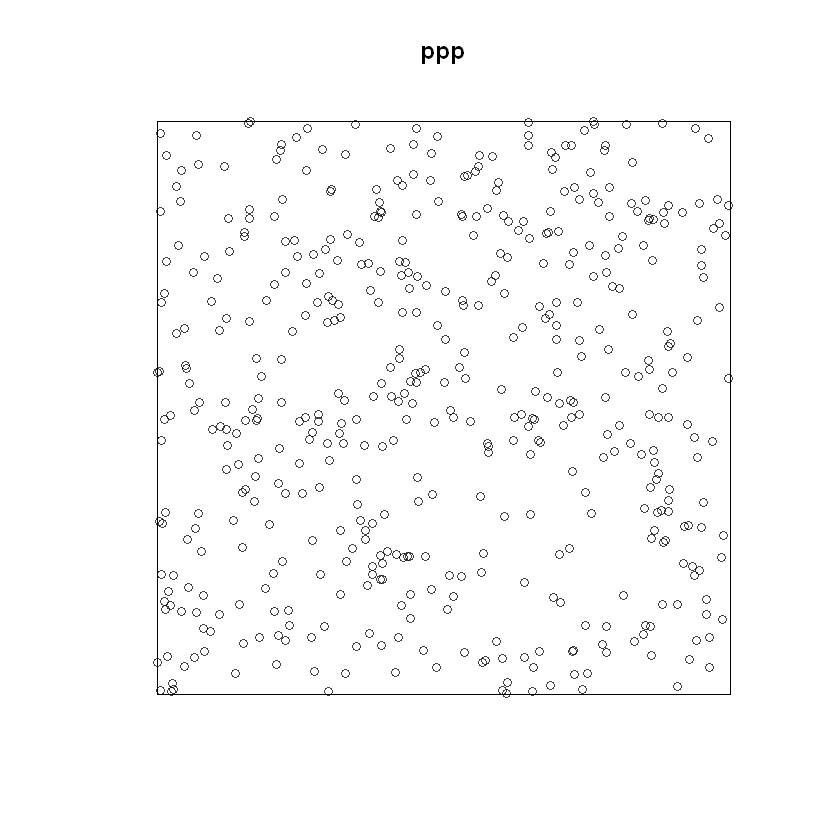

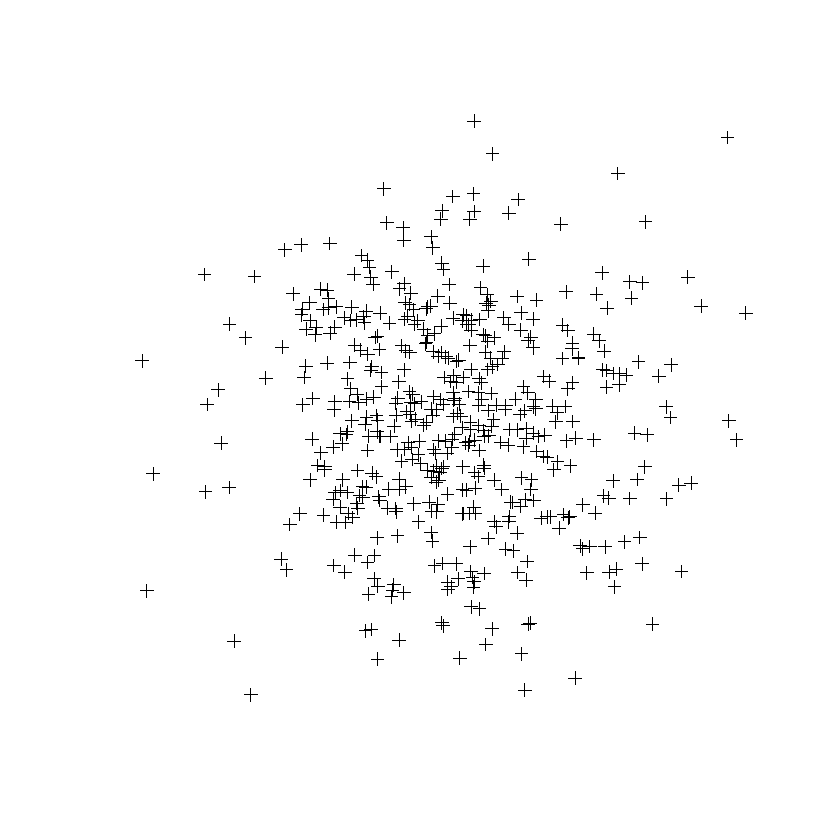

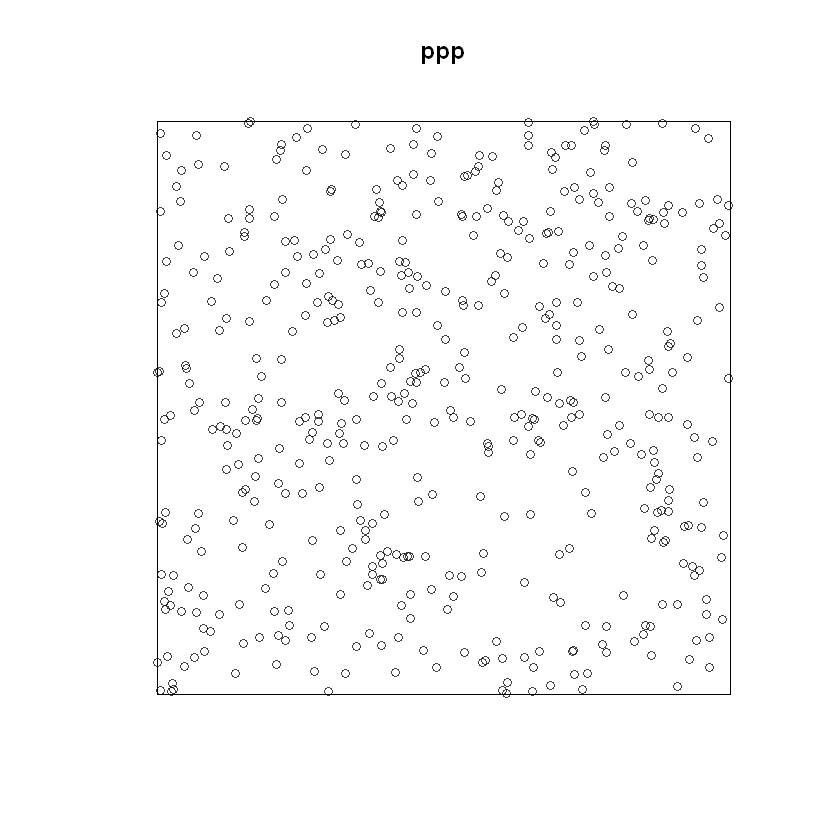

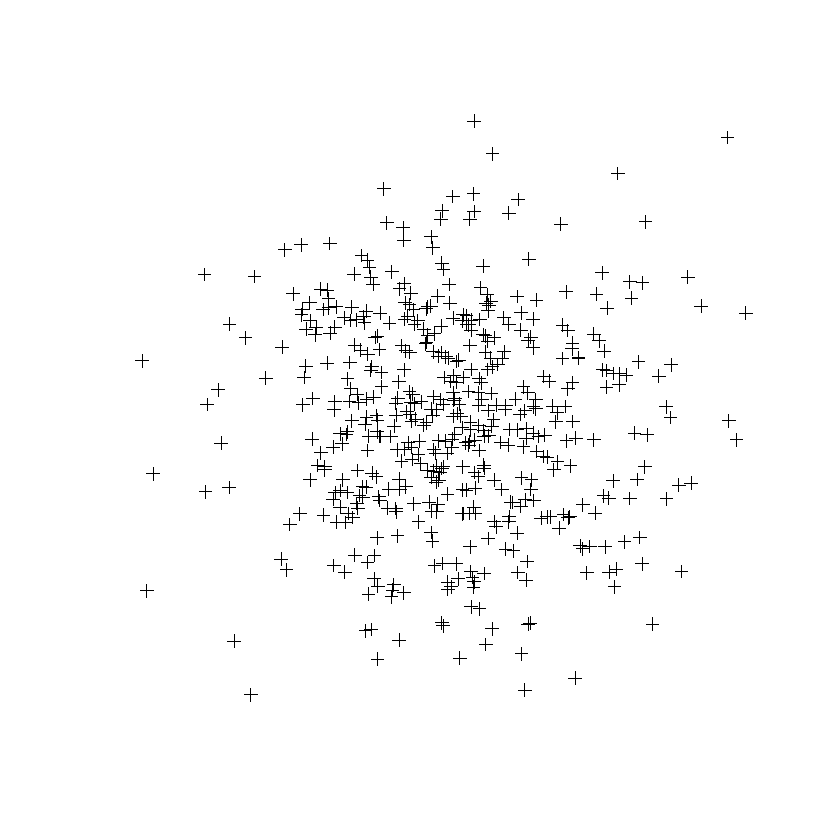

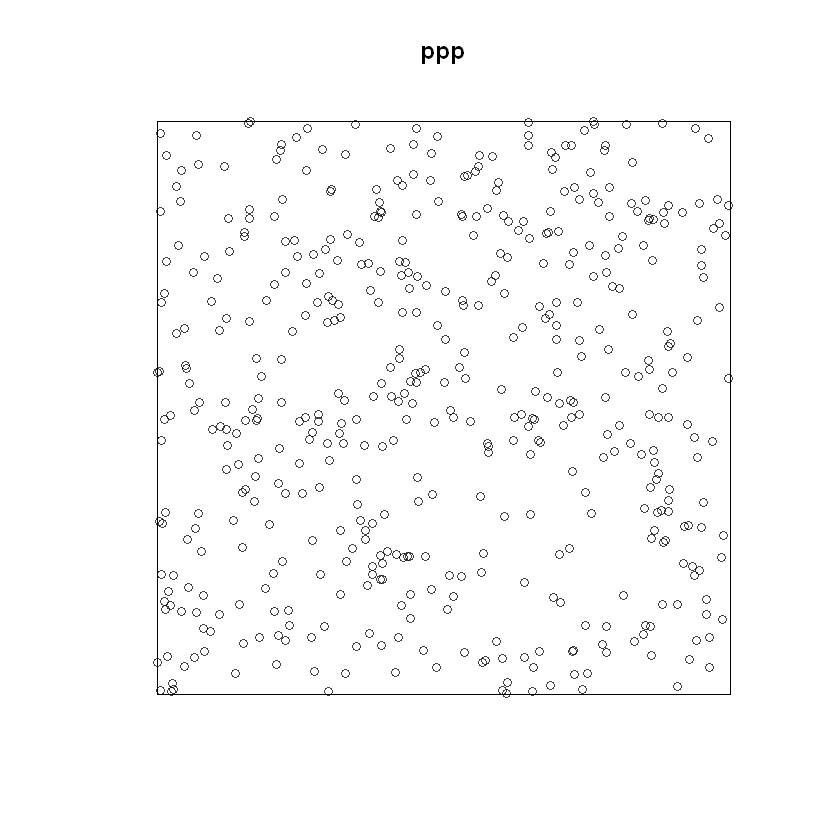

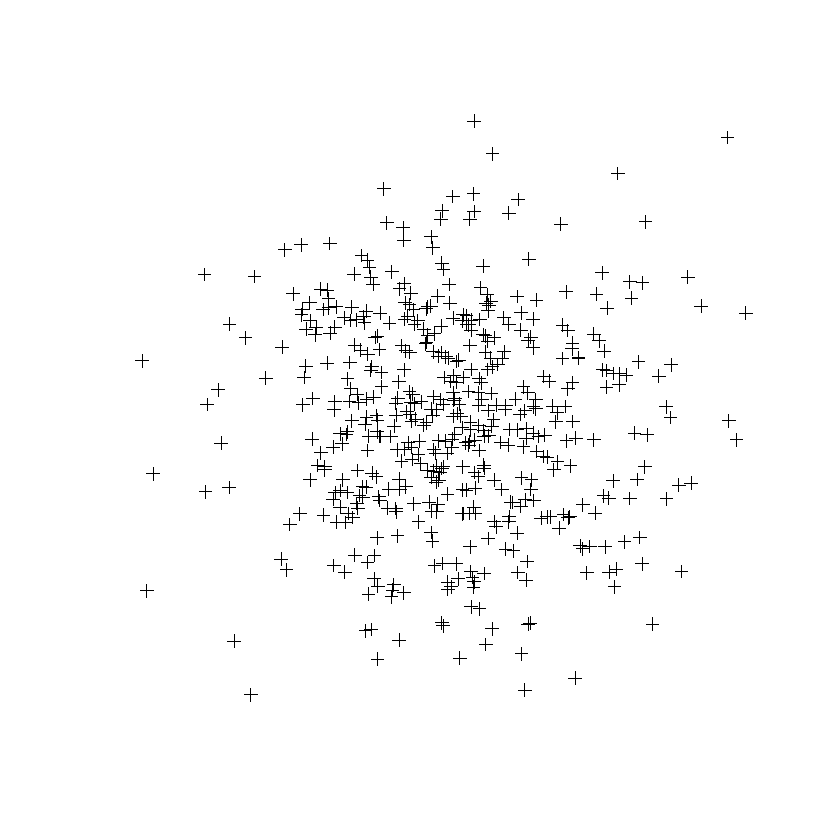

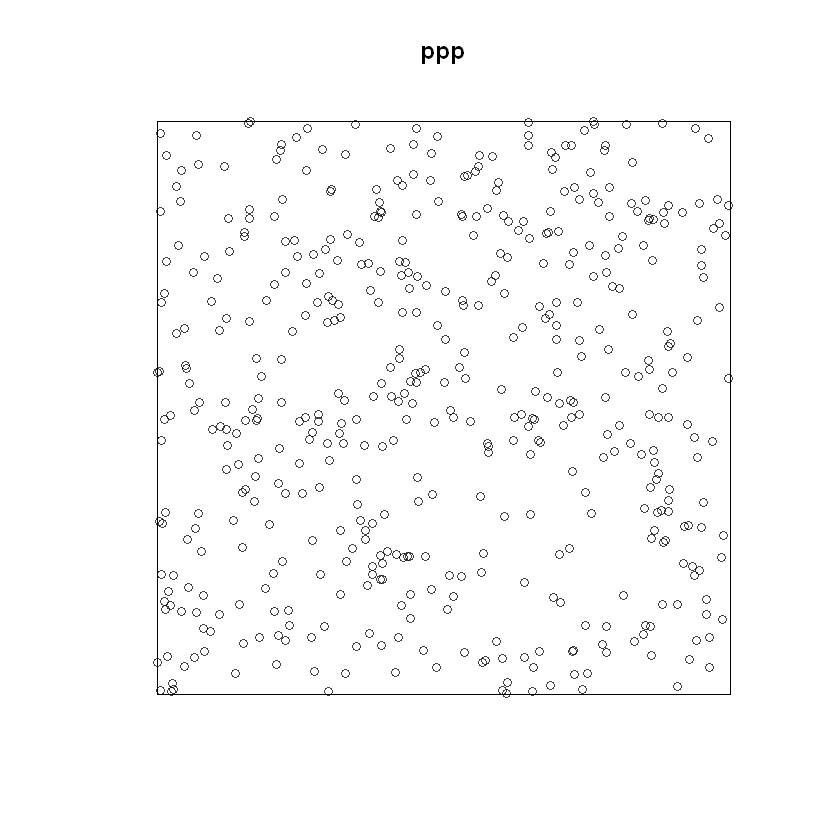

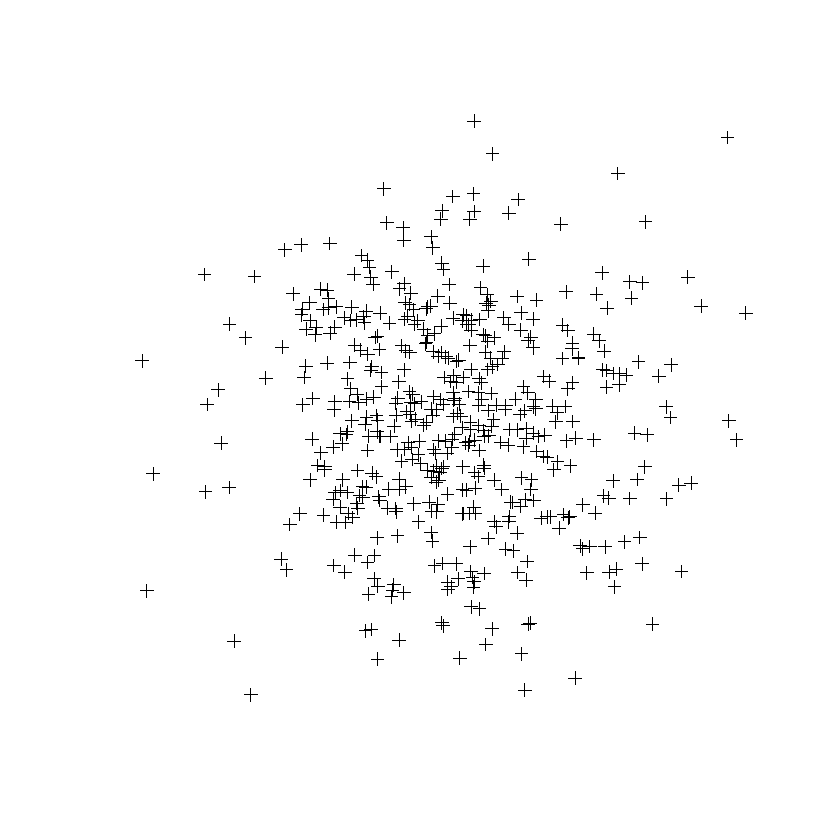

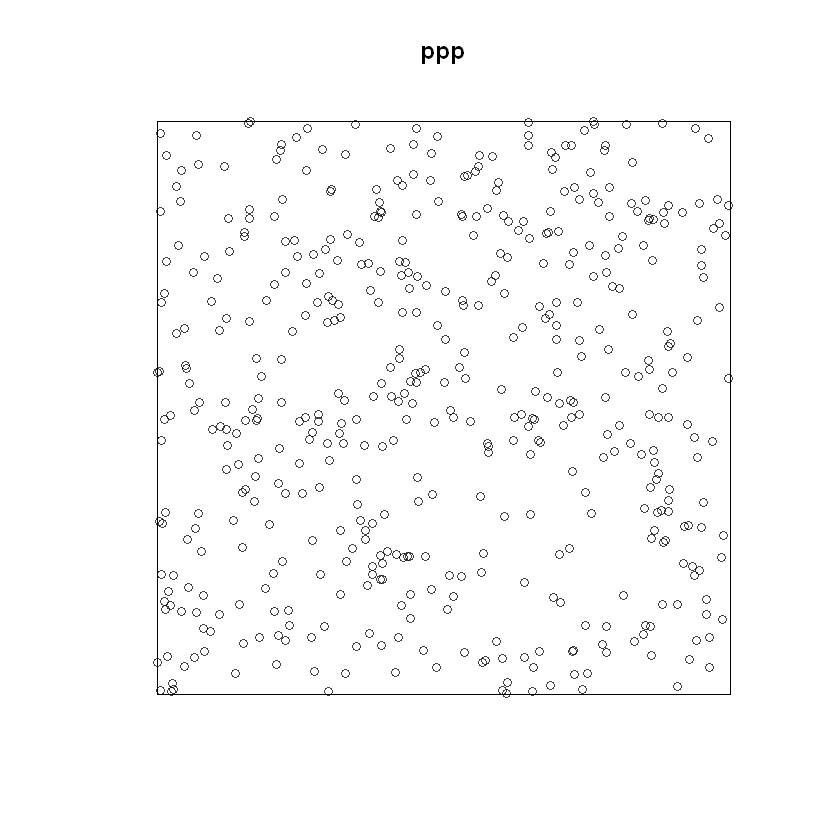

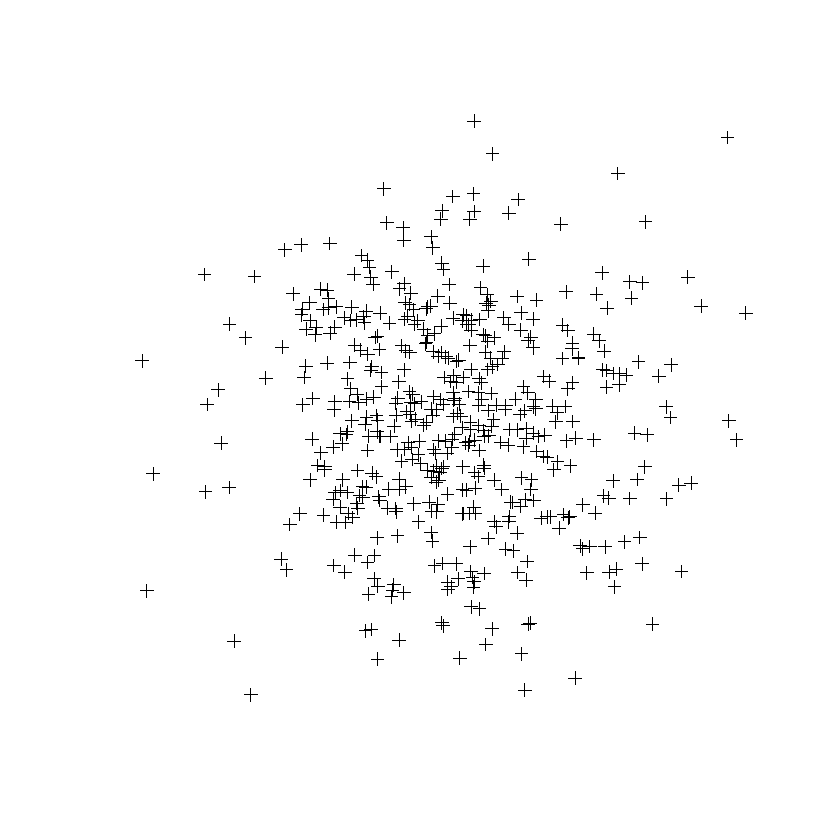

In [24]:
res2 = check_points(500)

In [25]:
print(res2)

Unit: milliseconds
      expr     min      lq     mean   median      uq      max neval cld
  plot(sp) 32.4352 33.7546 60.53702 77.31230 82.4709 121.9720    50   b
 plot(ppp) 23.8402 26.8773 47.87493 29.63875 73.0319  81.1294    50  a 


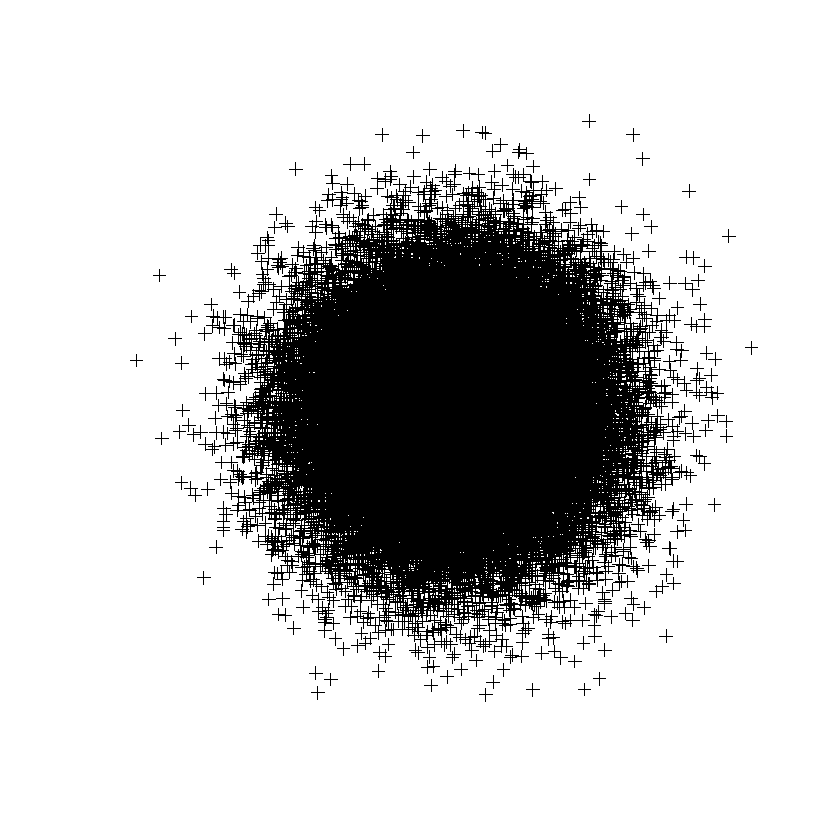

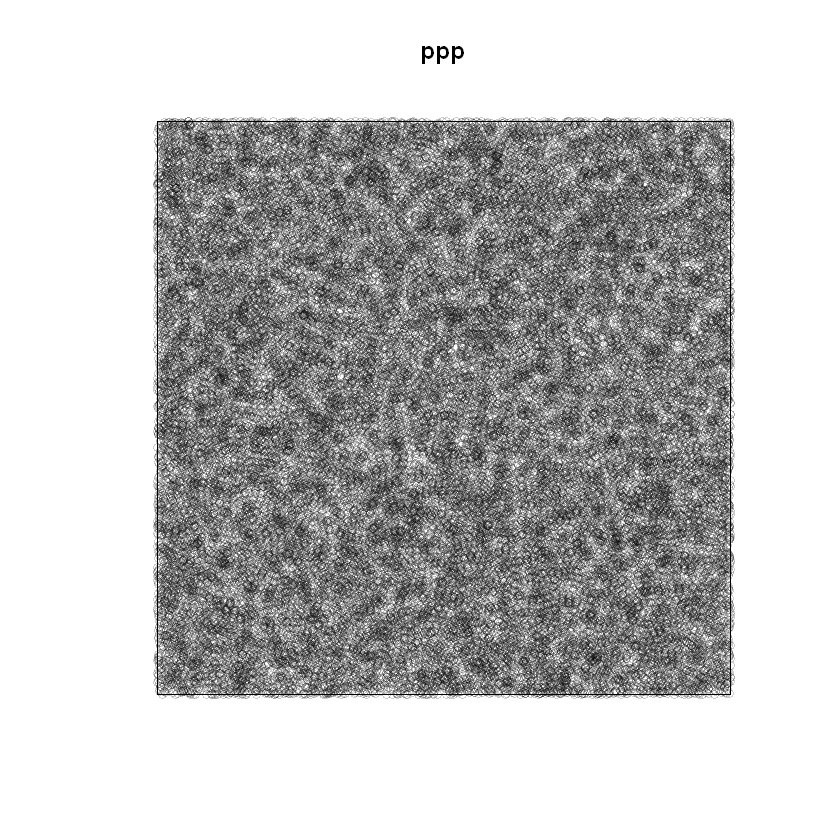

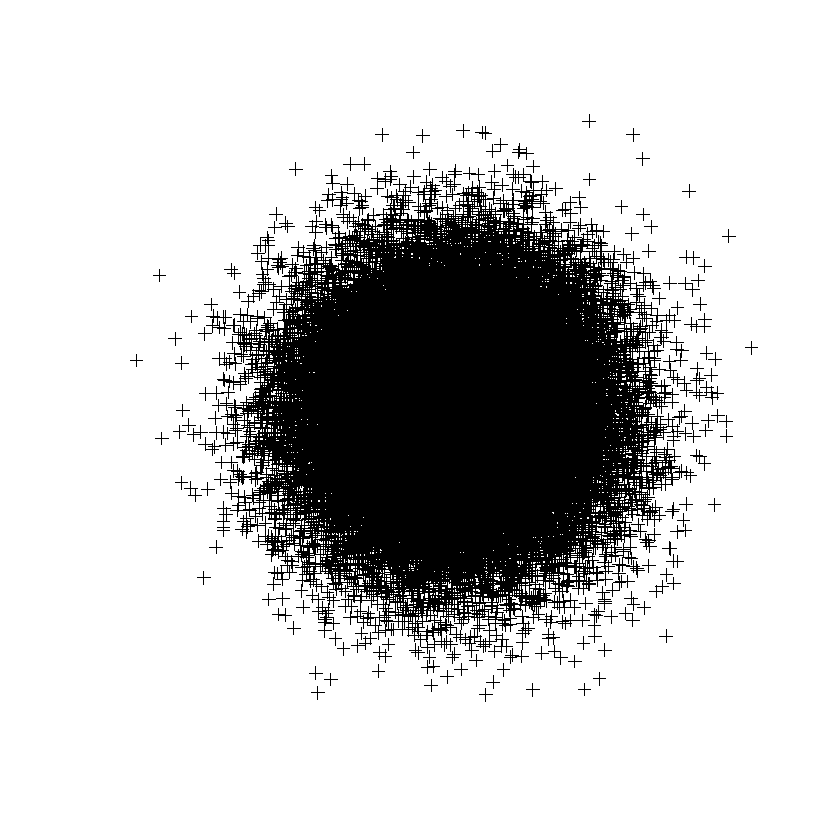

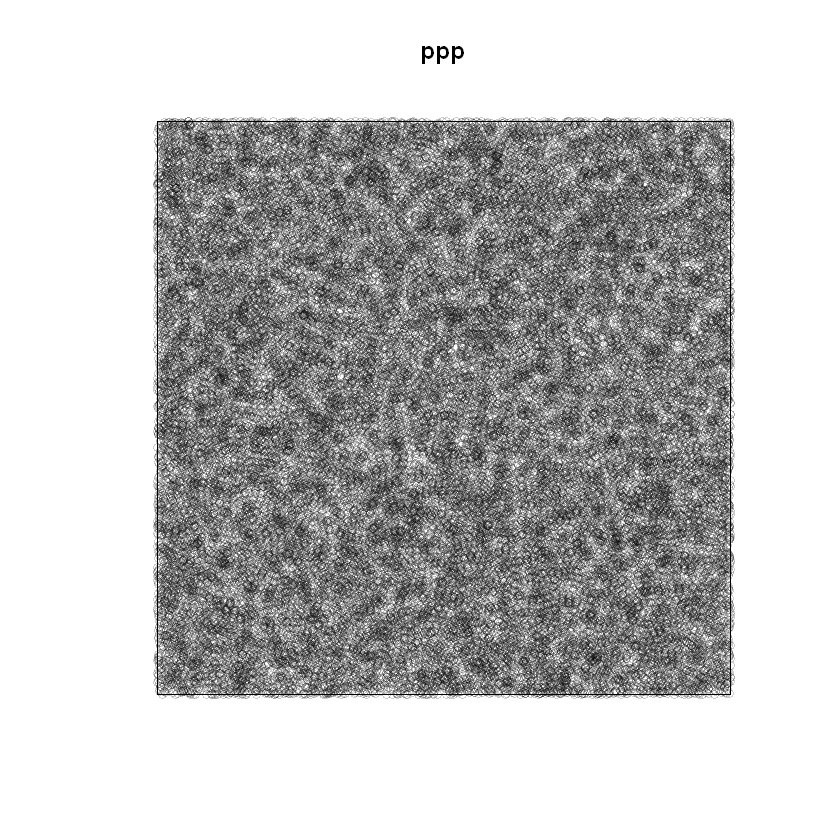

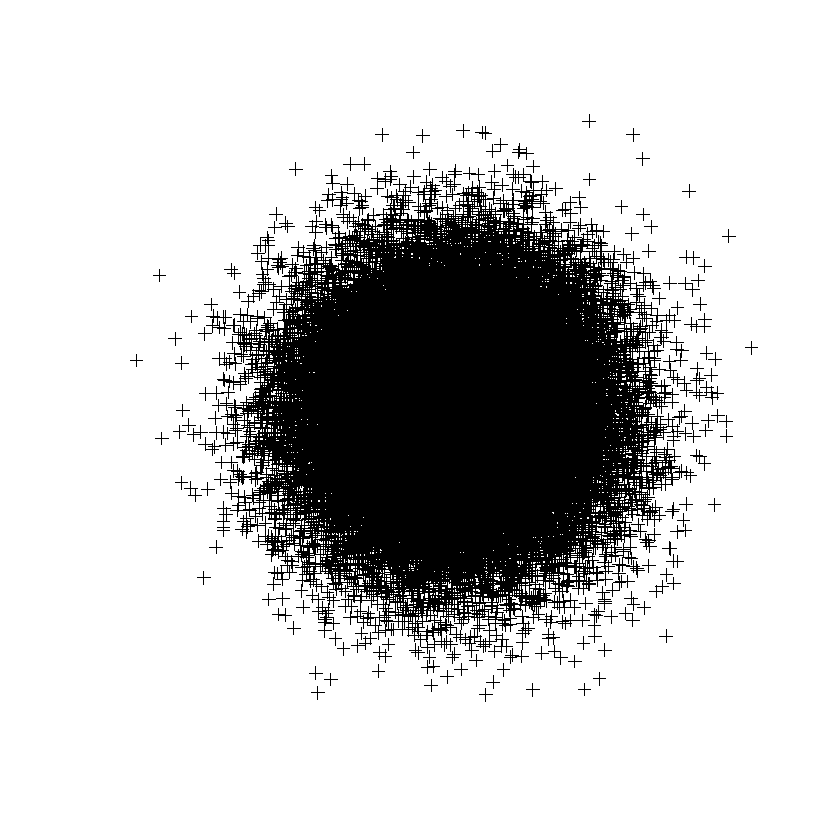

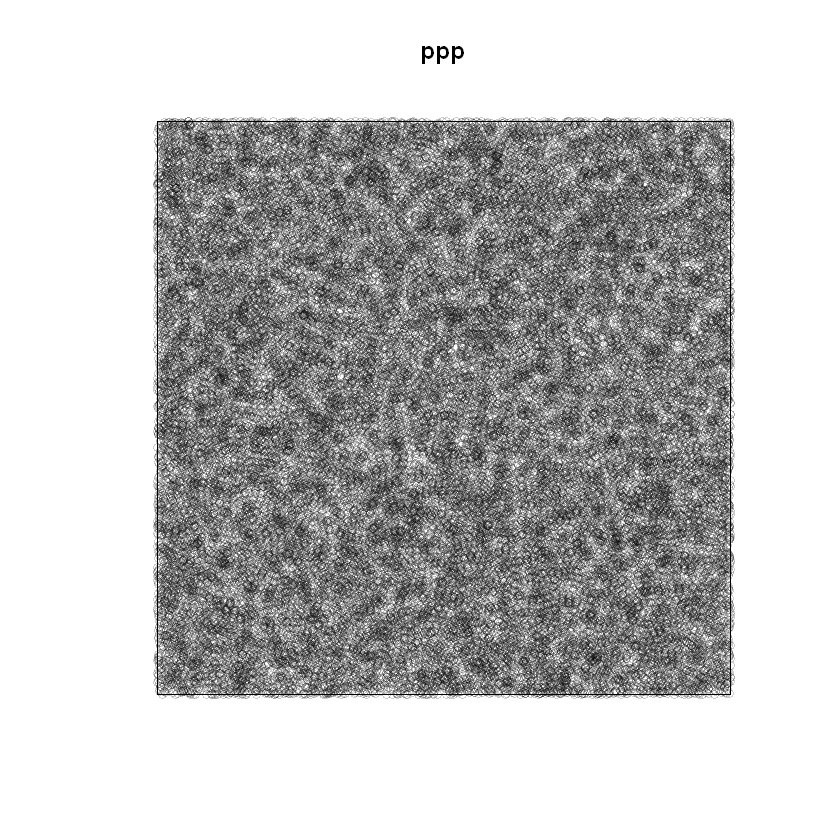

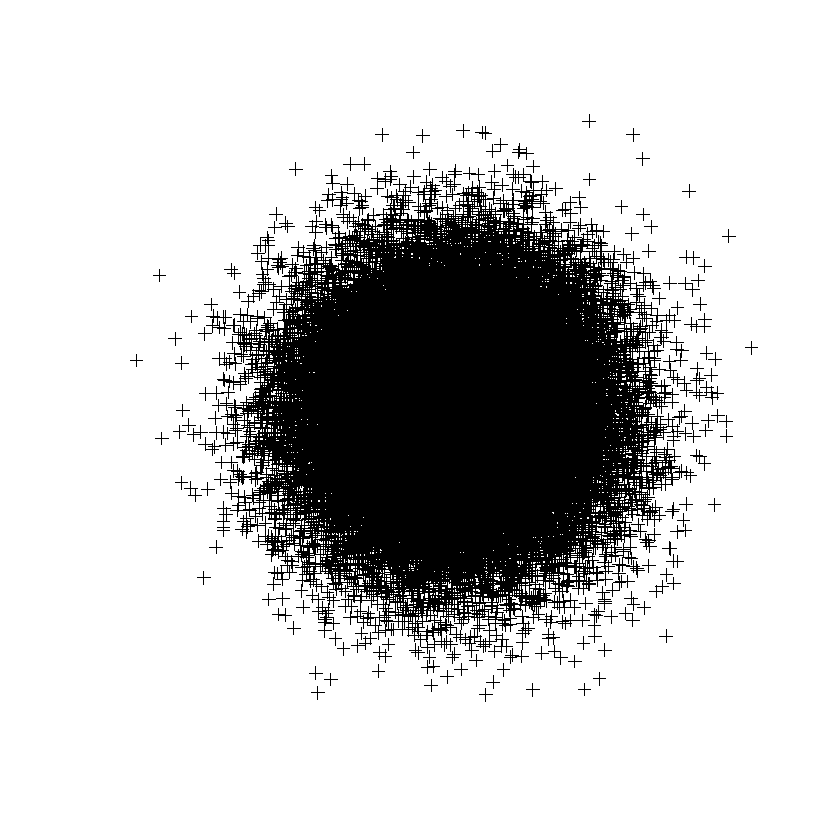

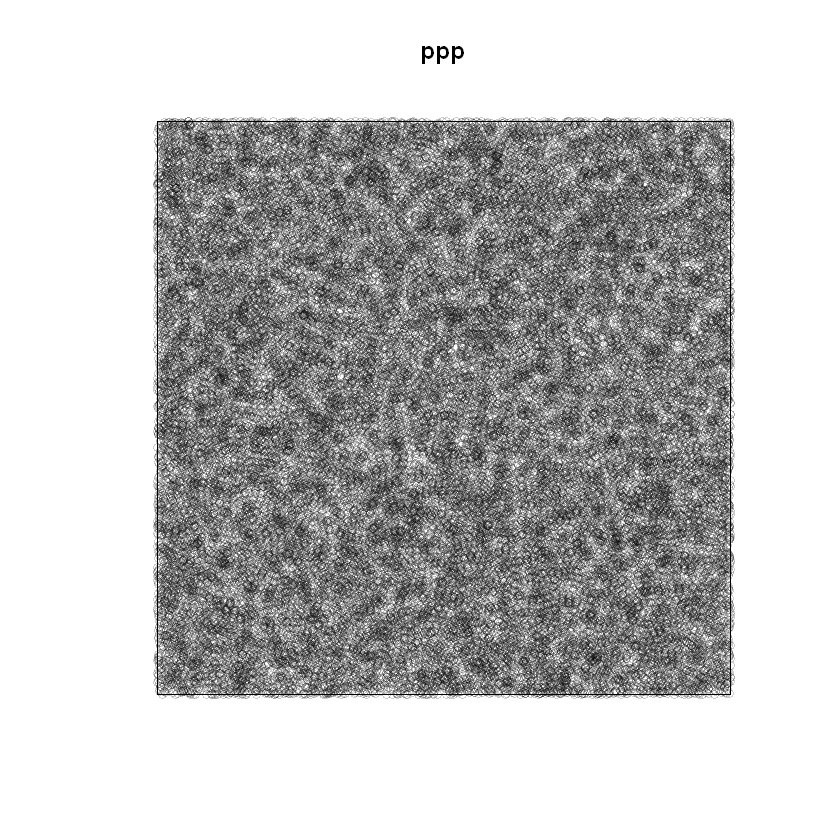

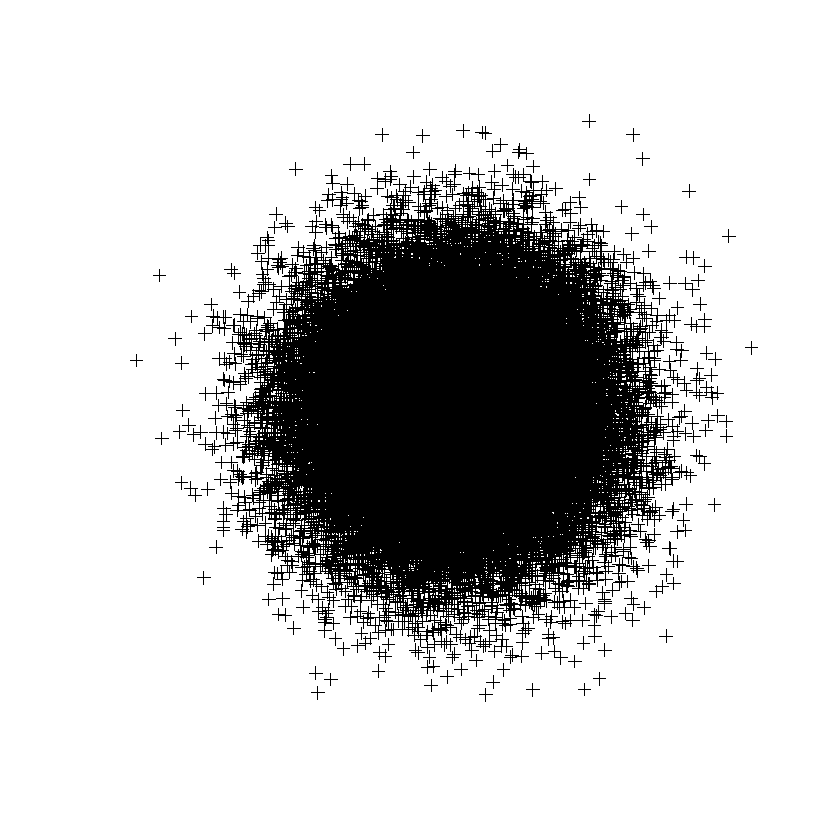

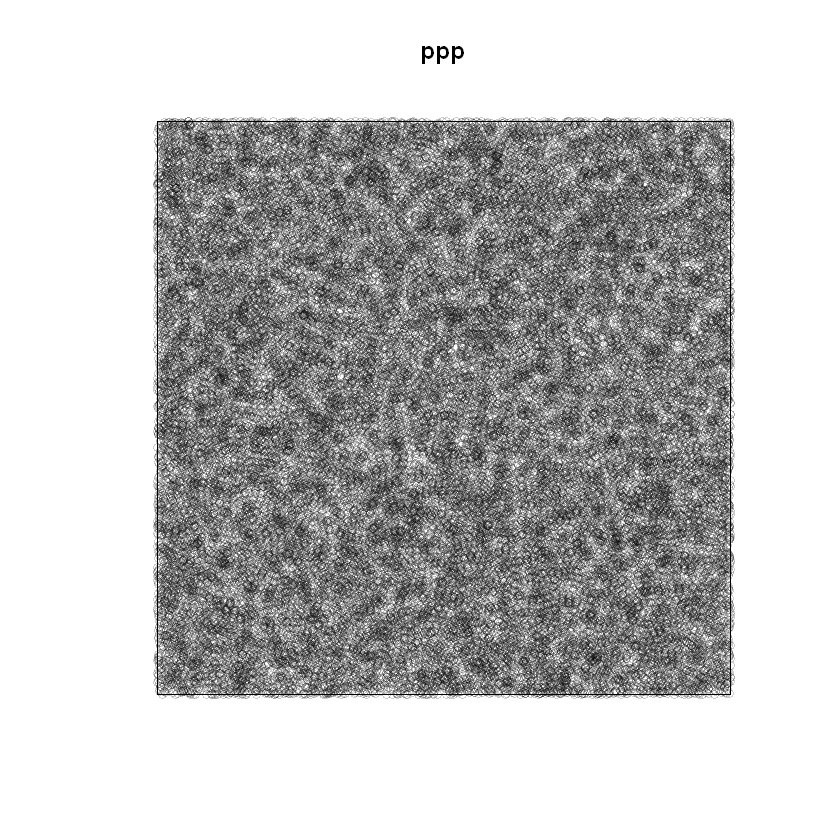

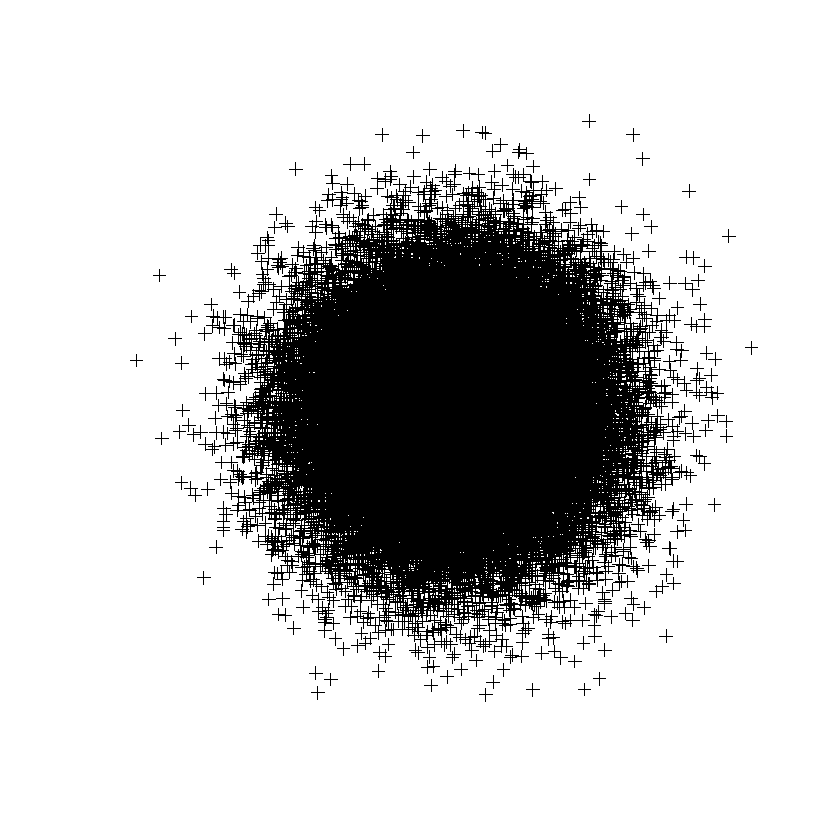

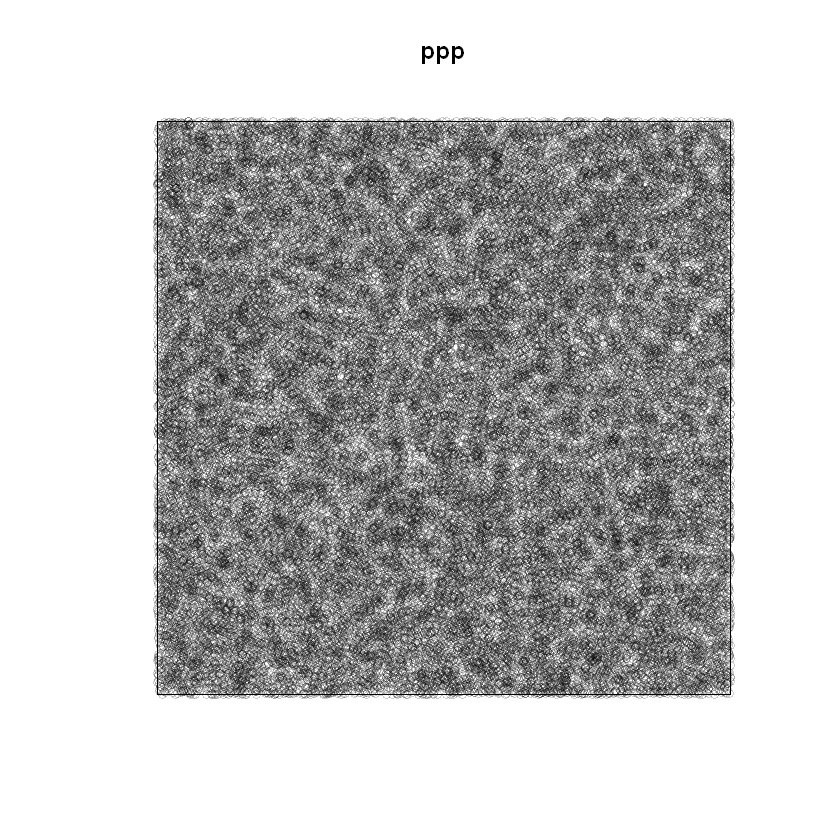

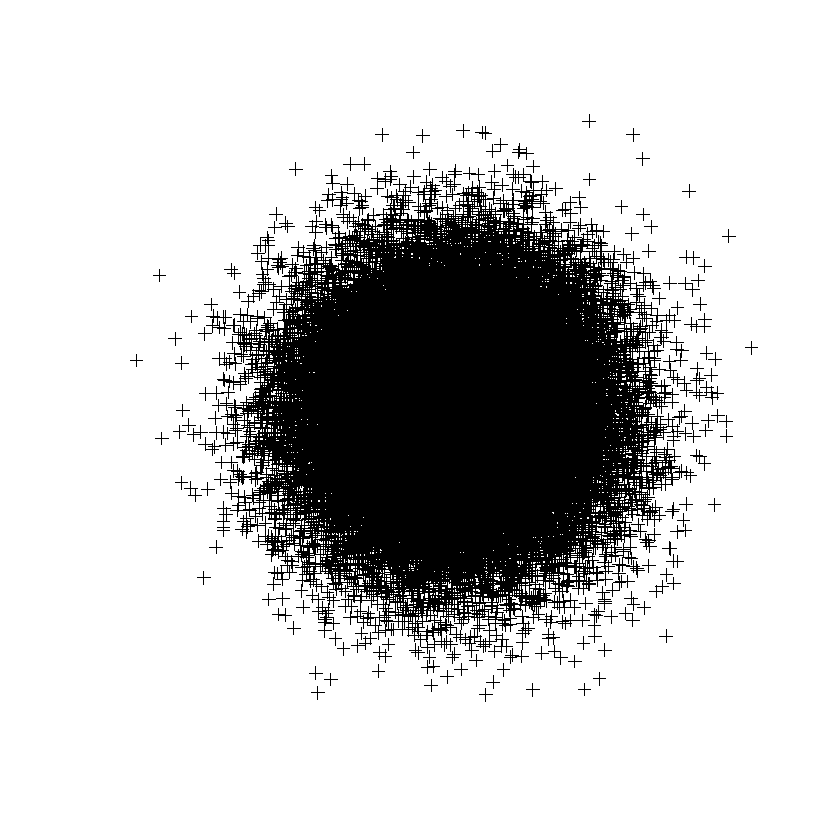

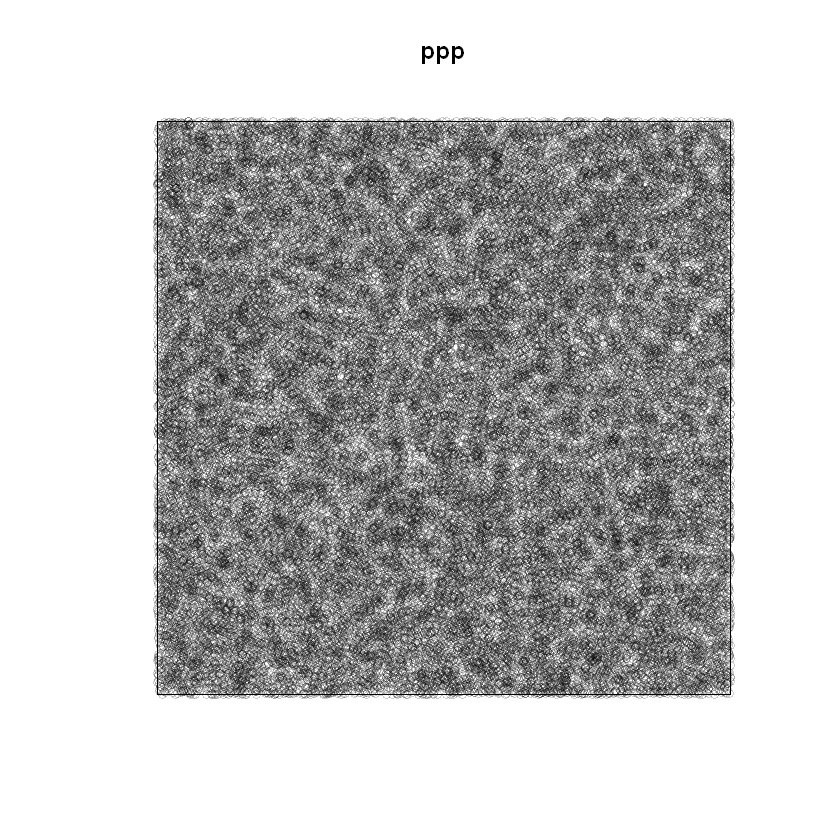

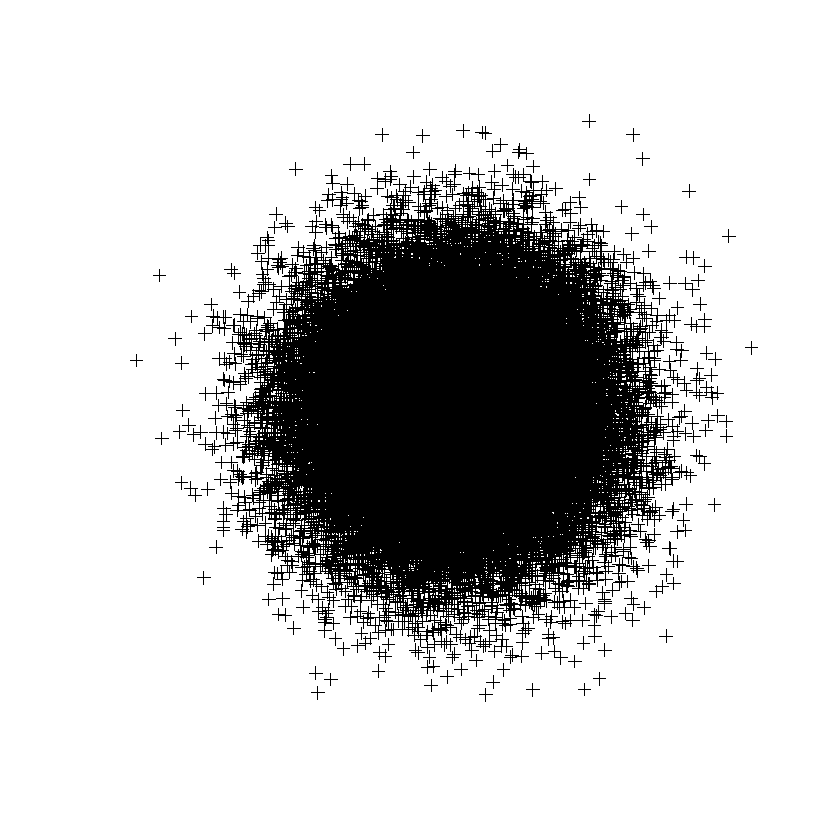

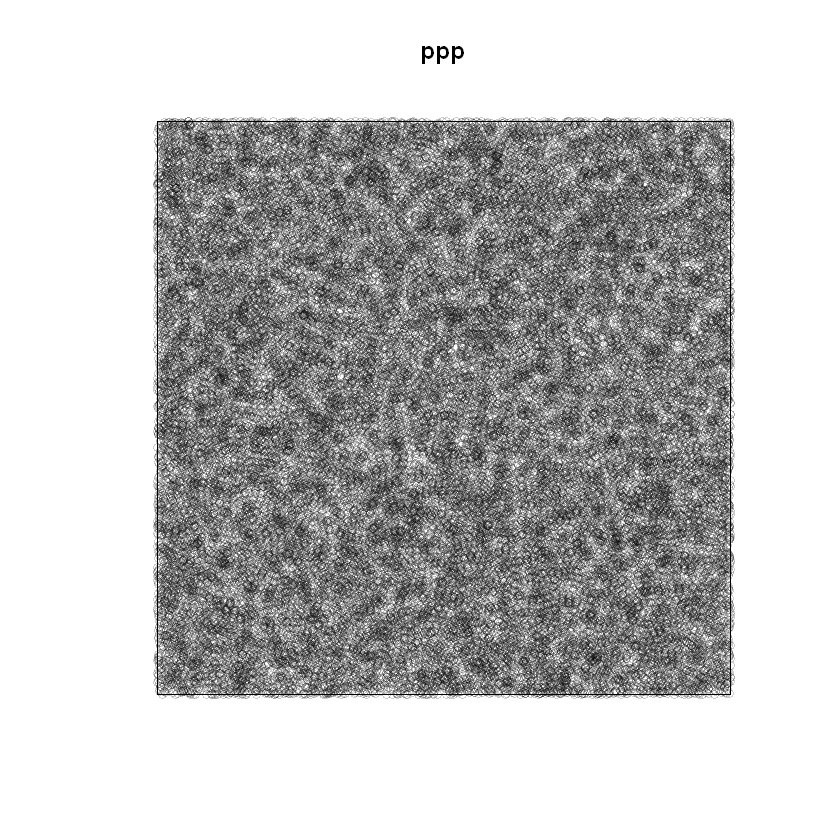

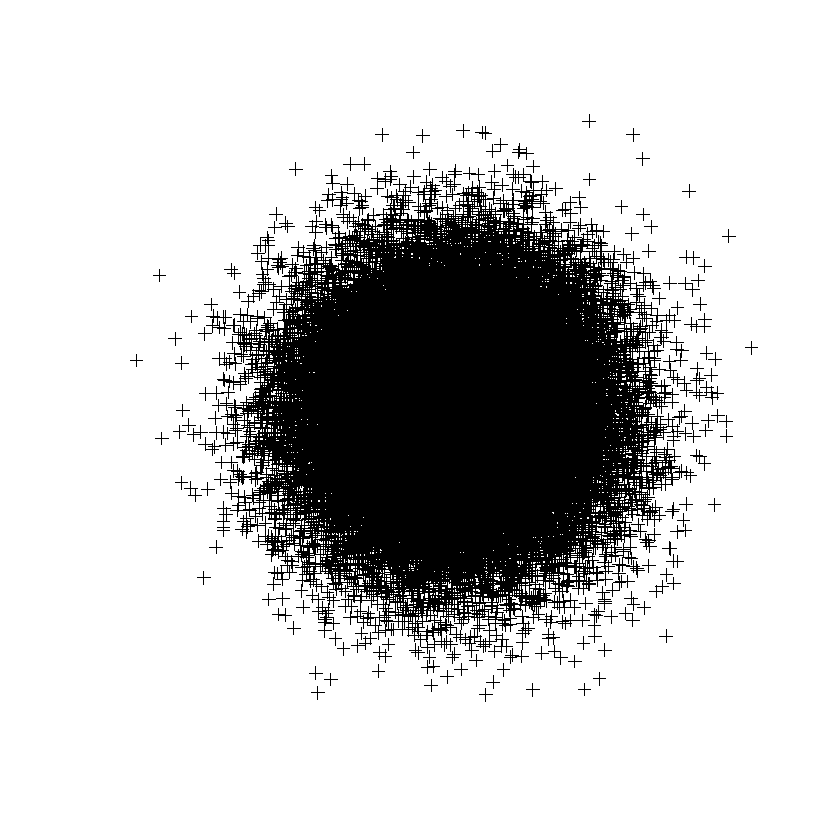

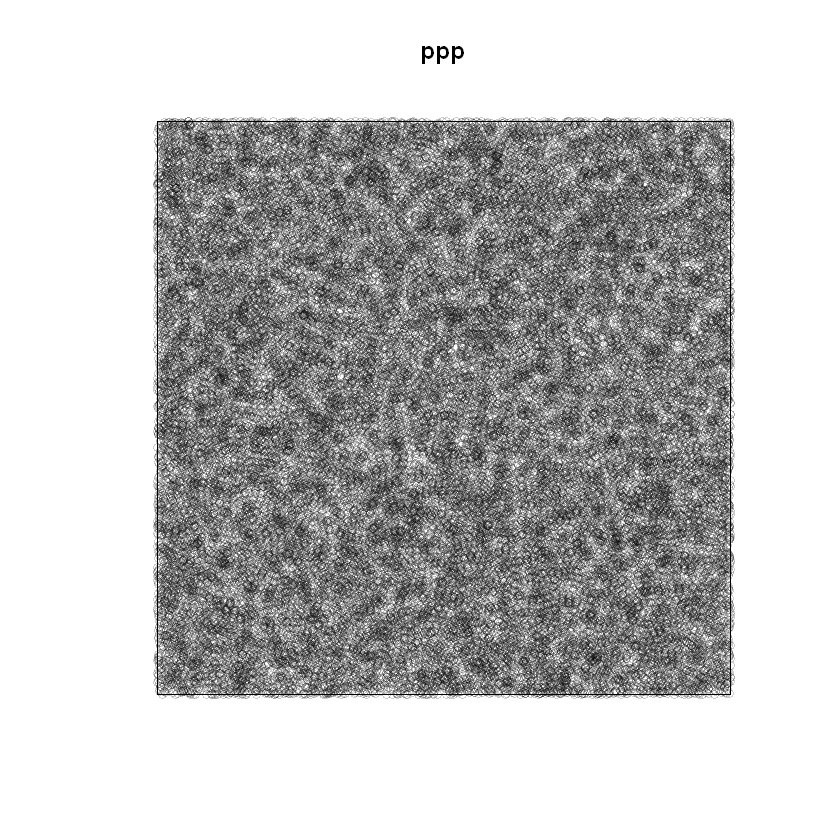

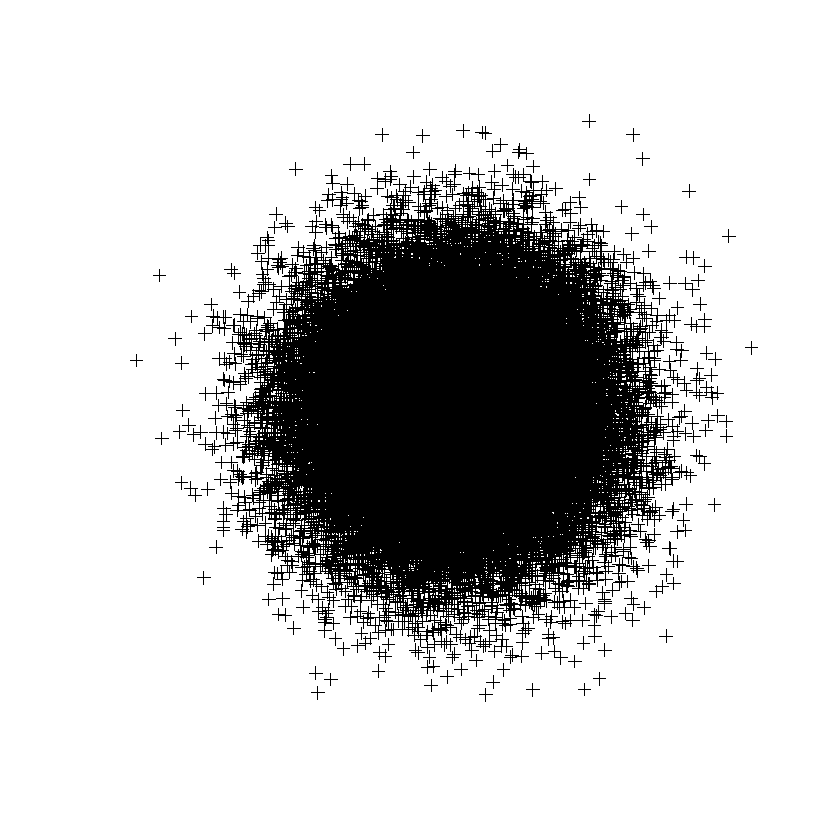

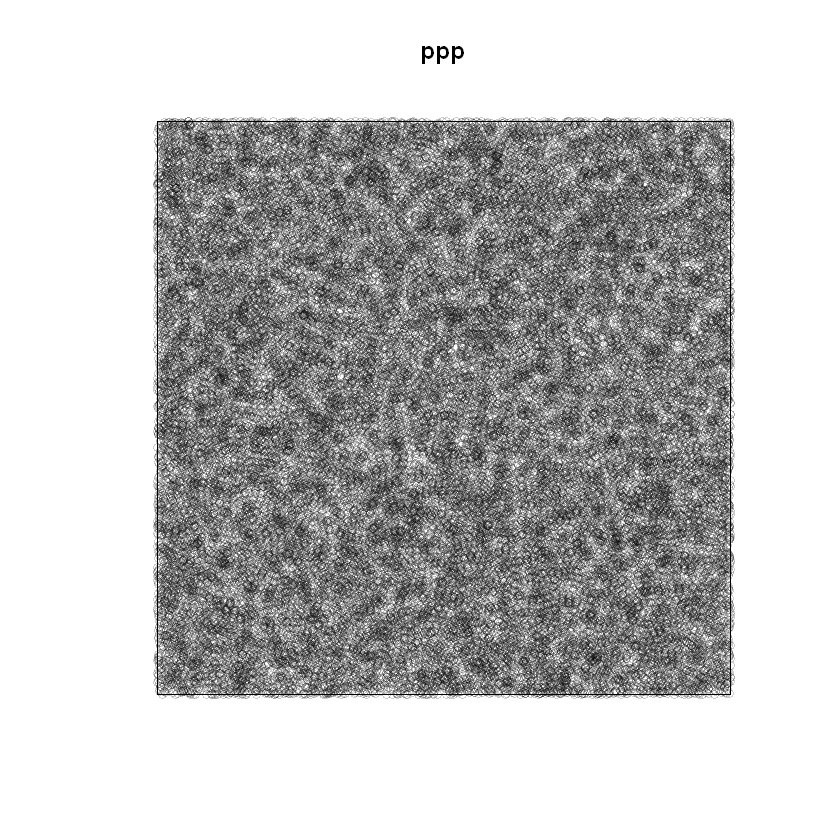

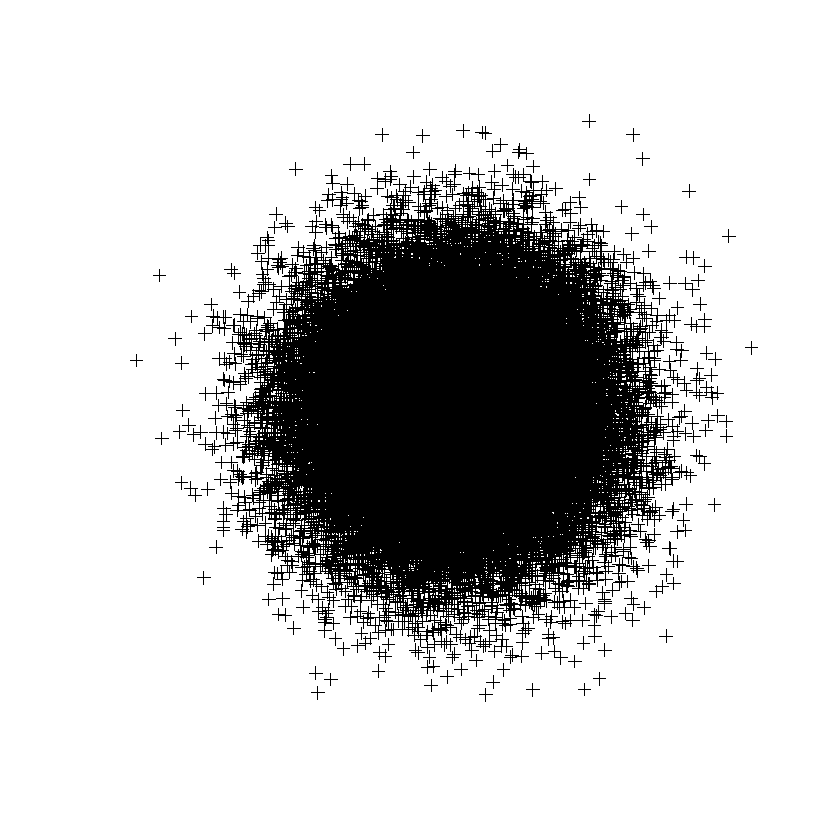

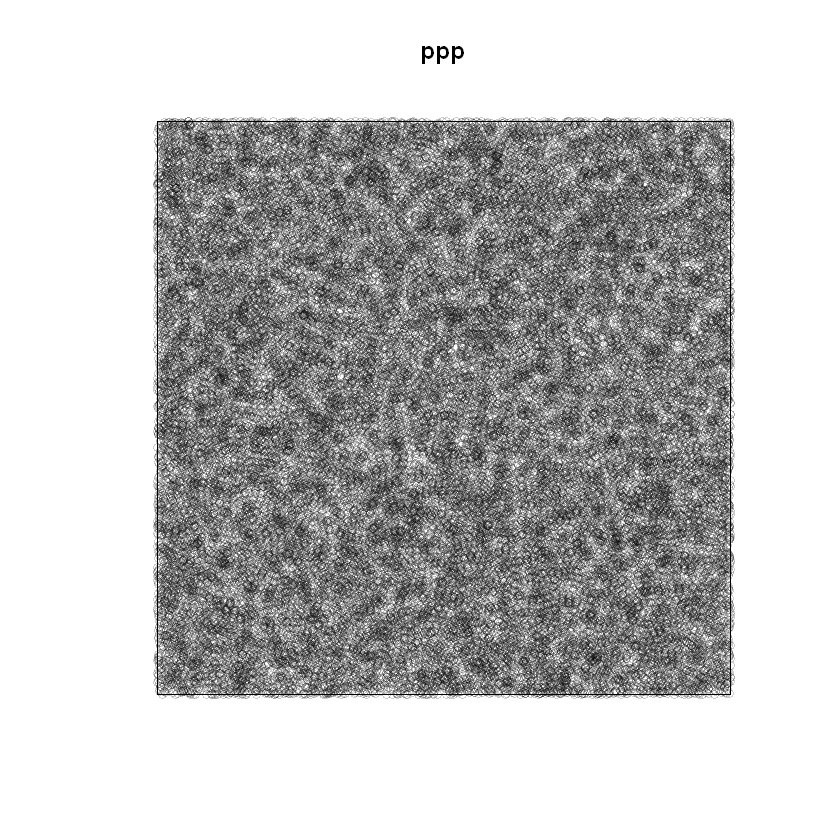

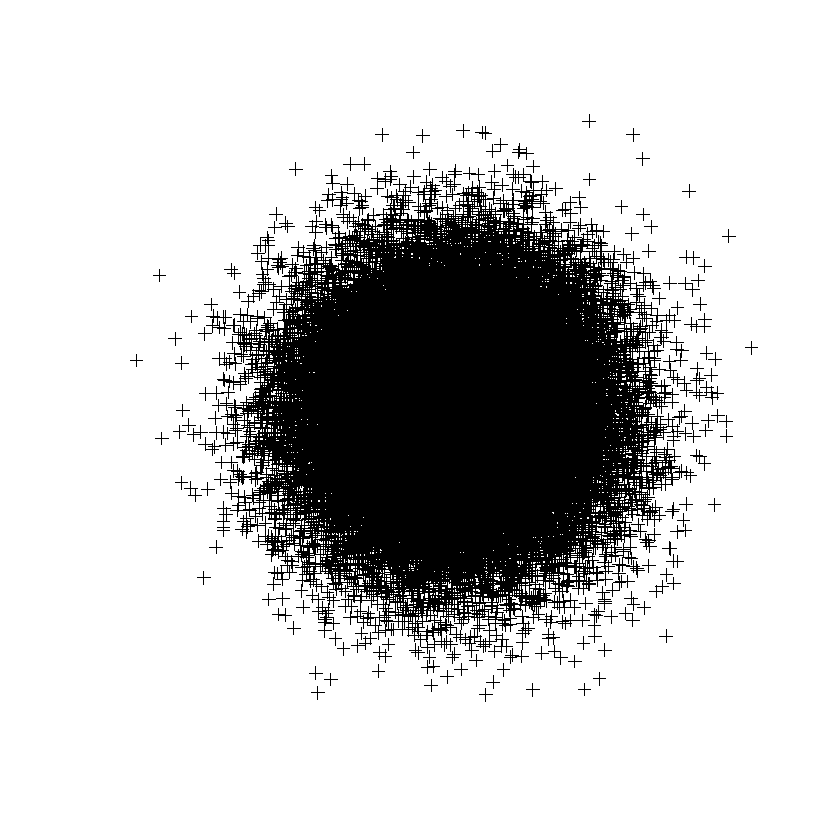

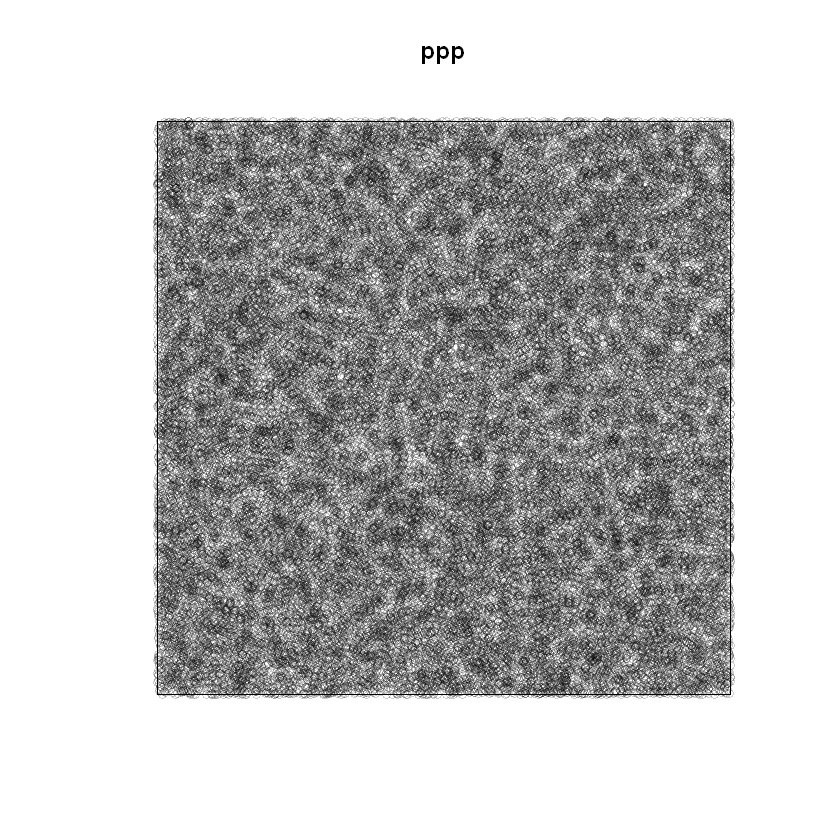

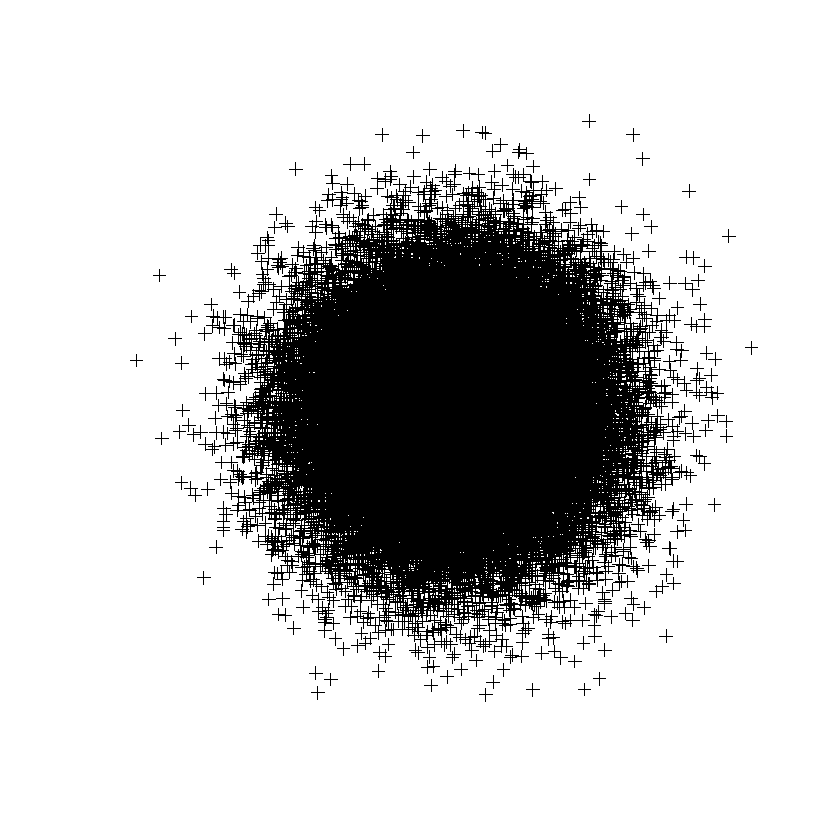

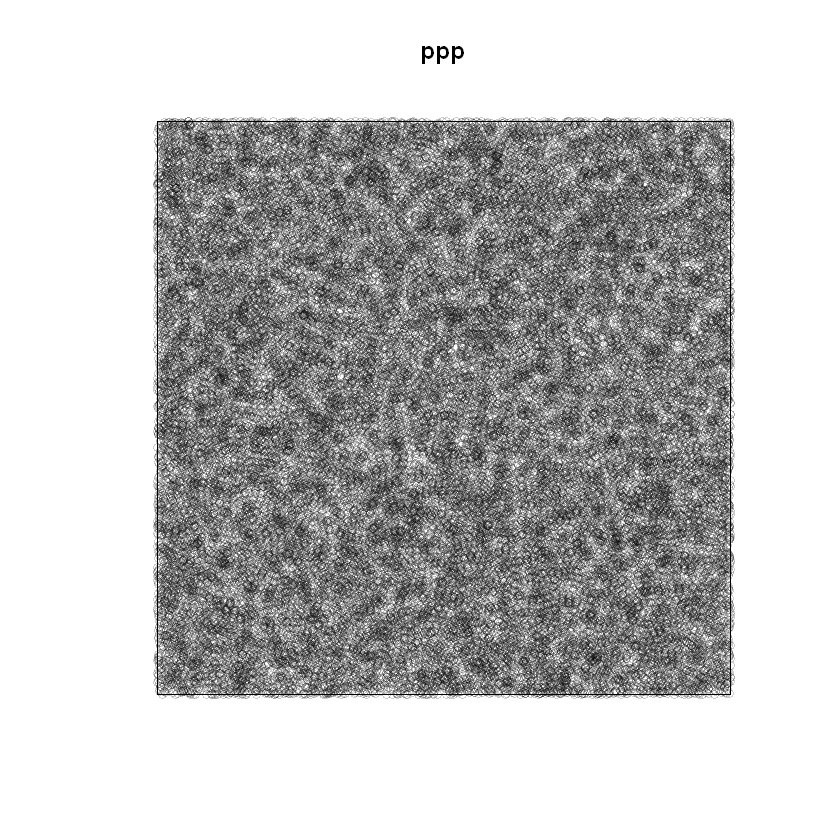

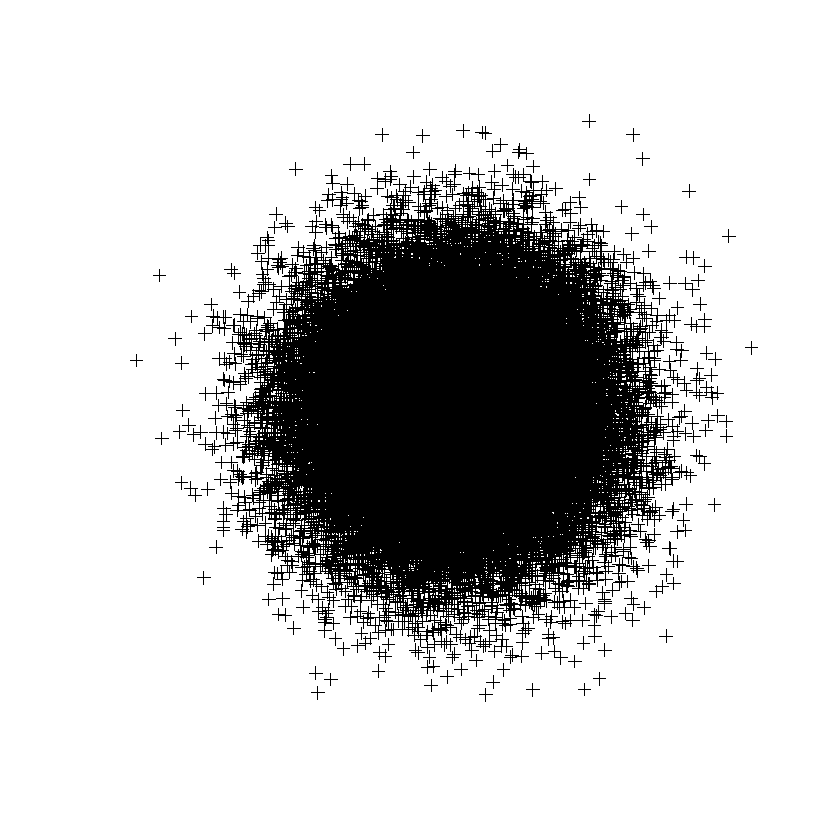

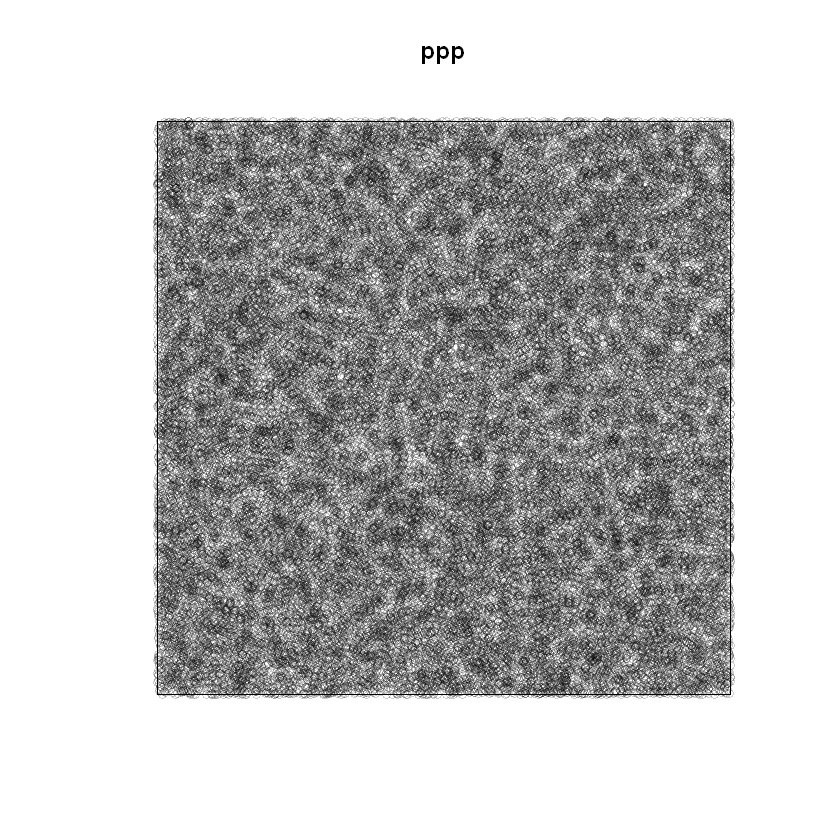

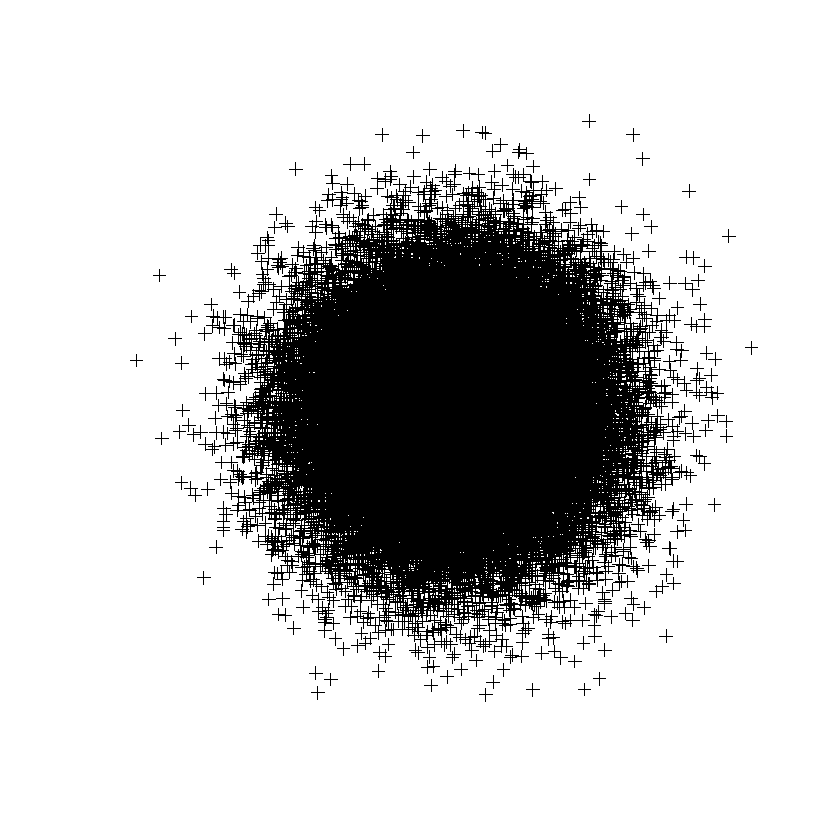

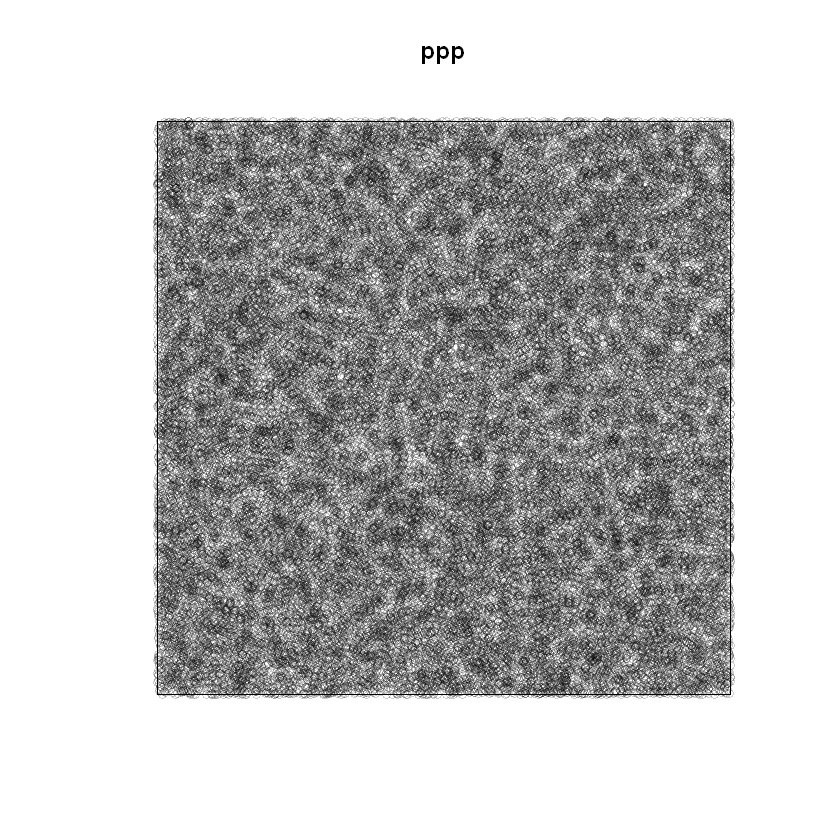

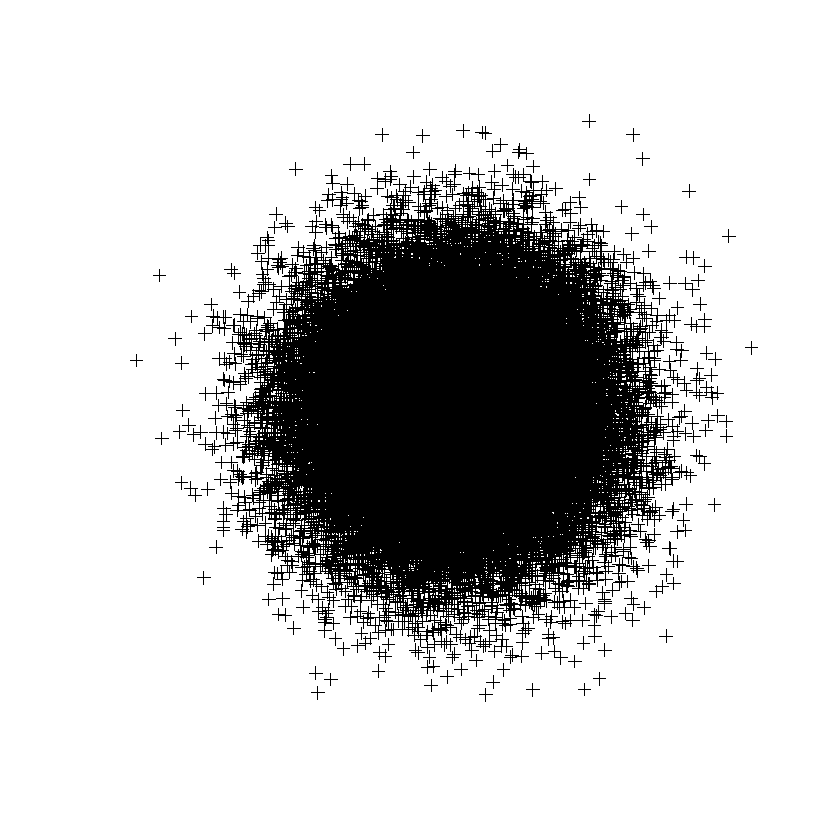

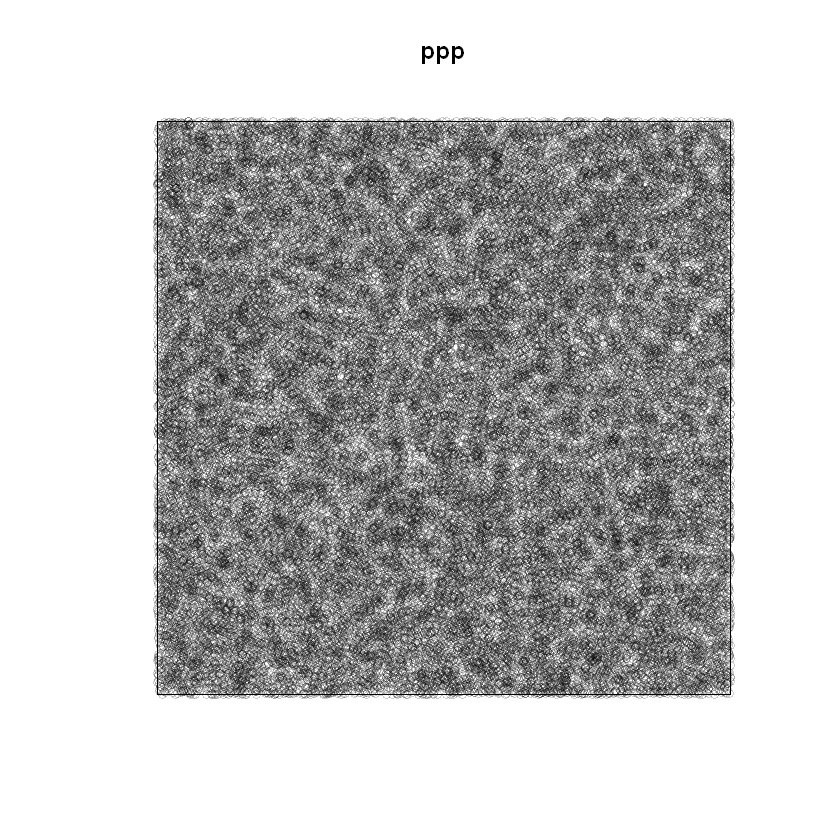

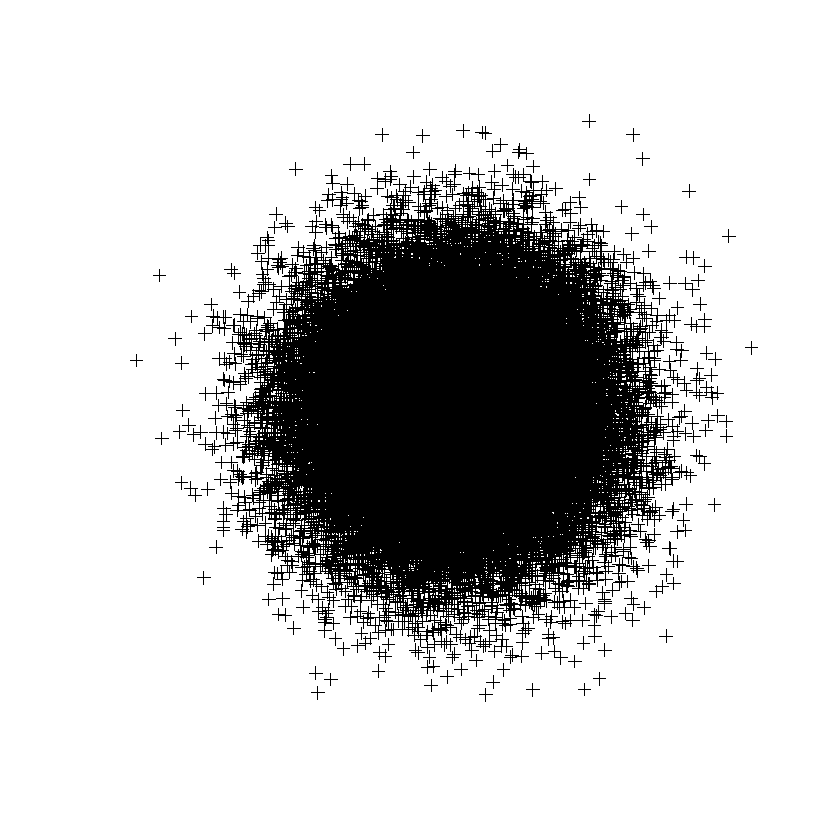

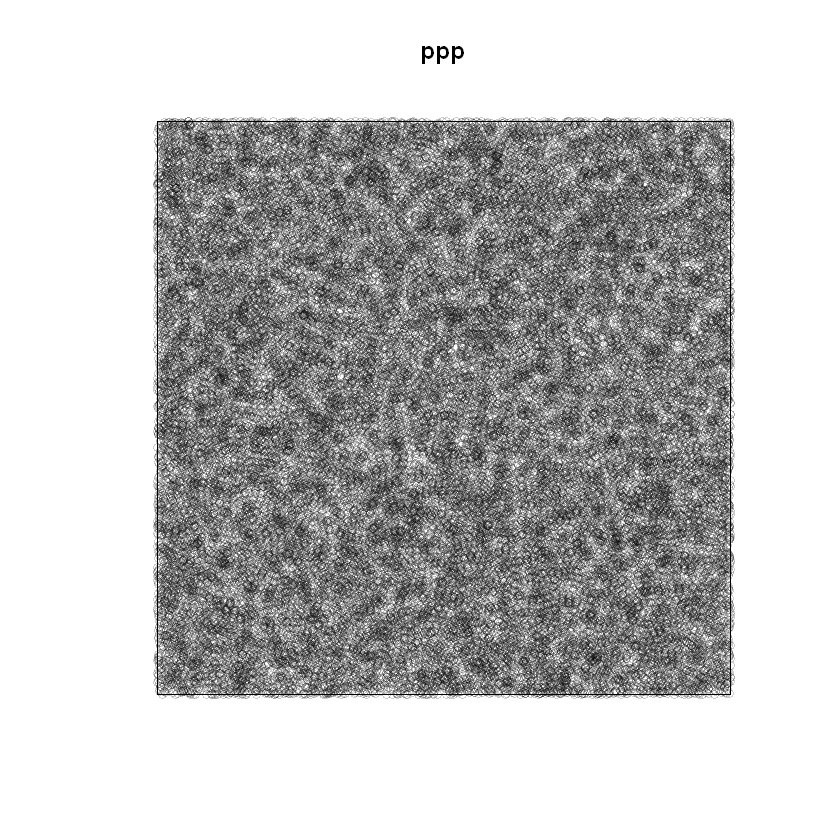

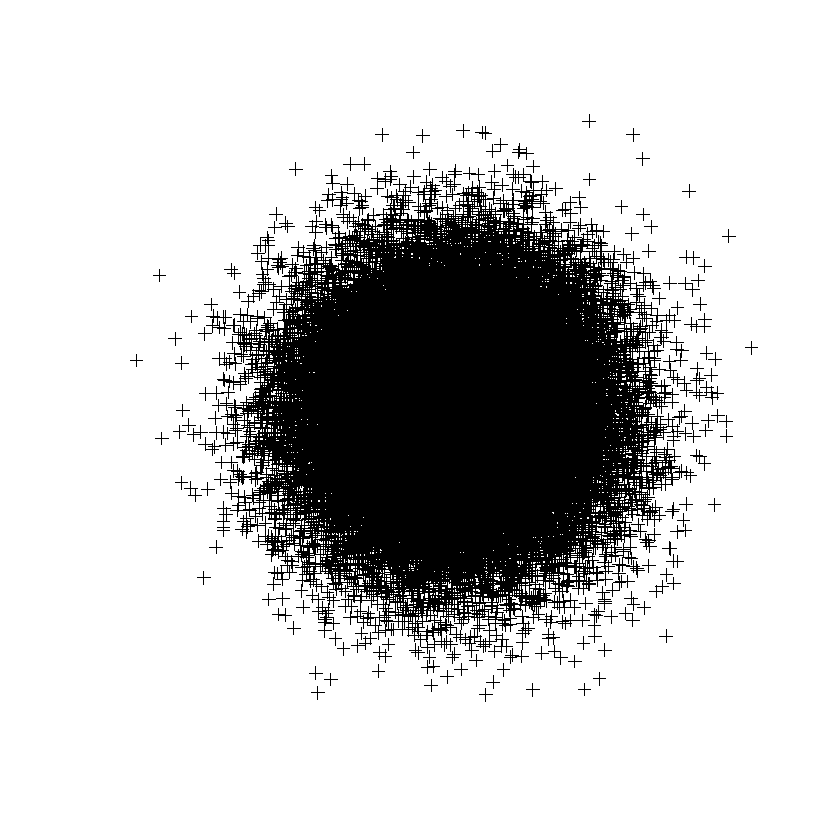

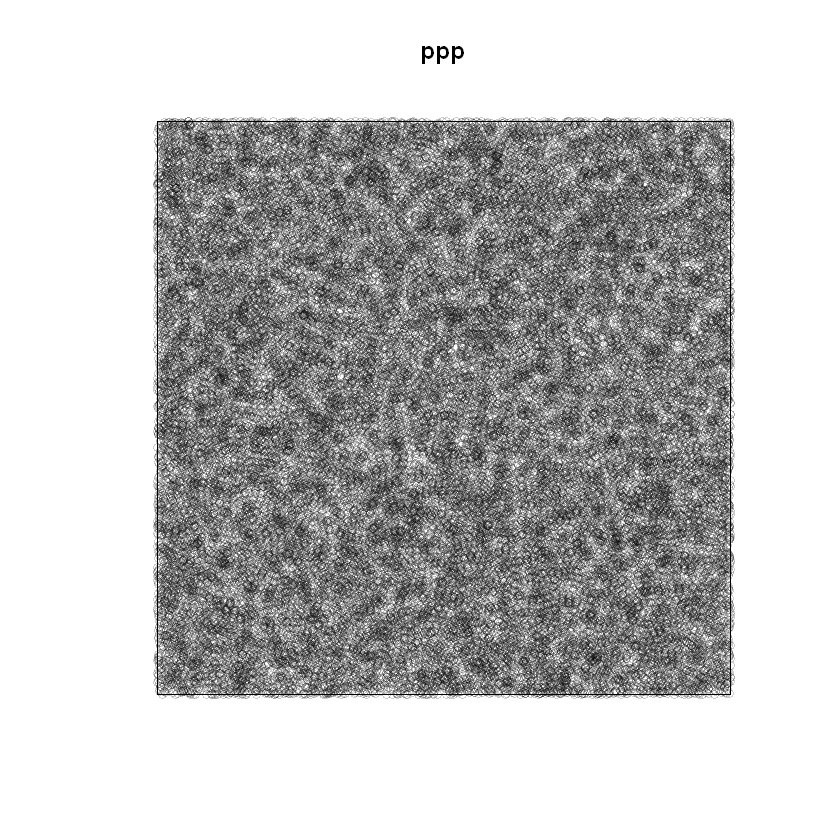

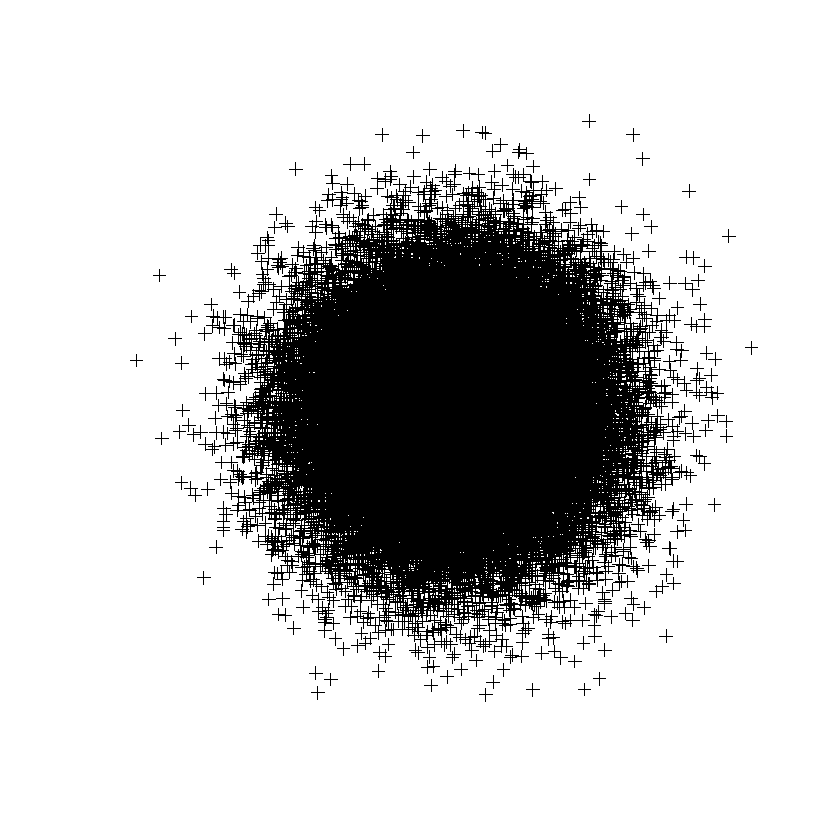

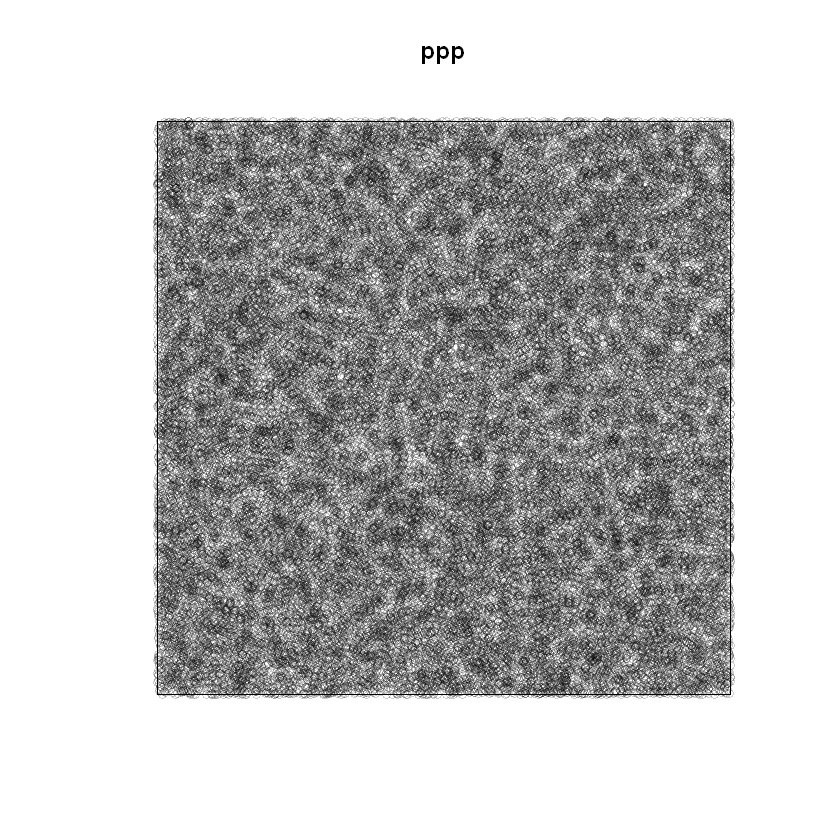

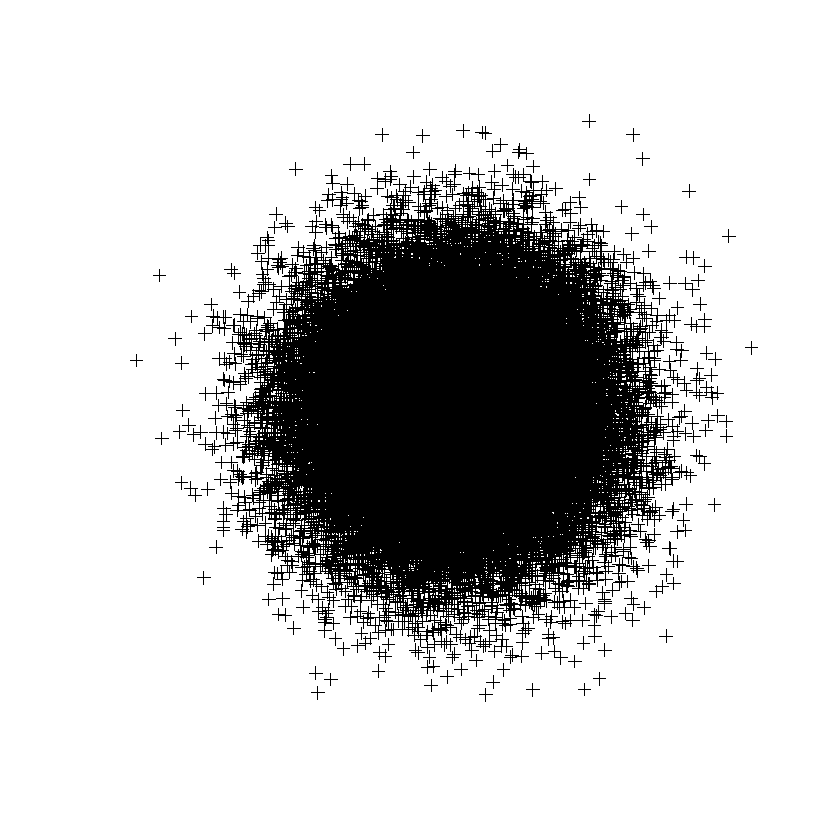

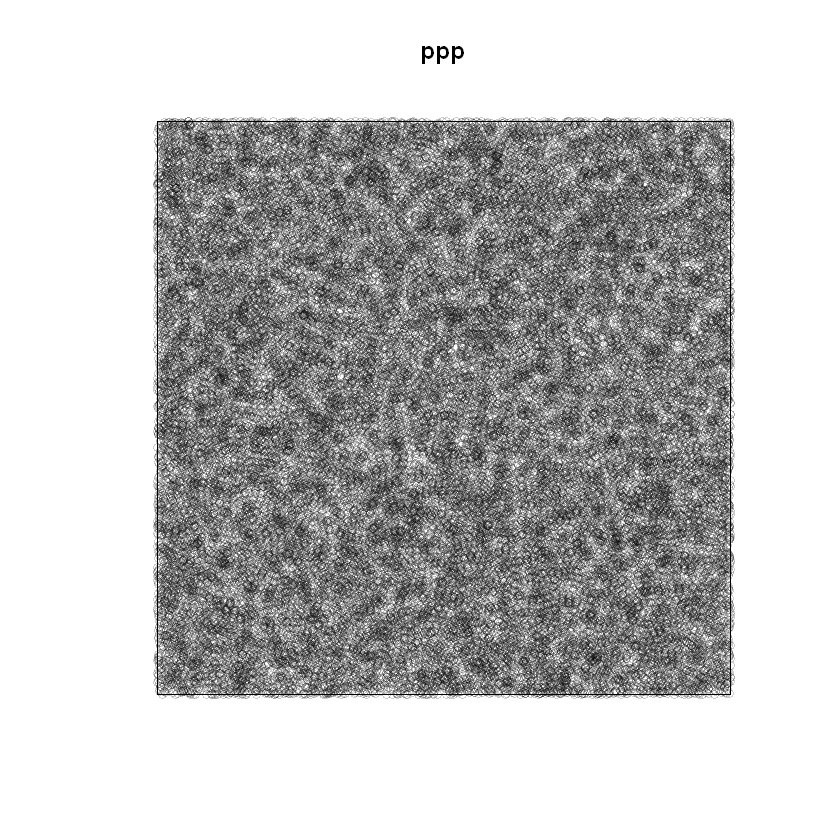

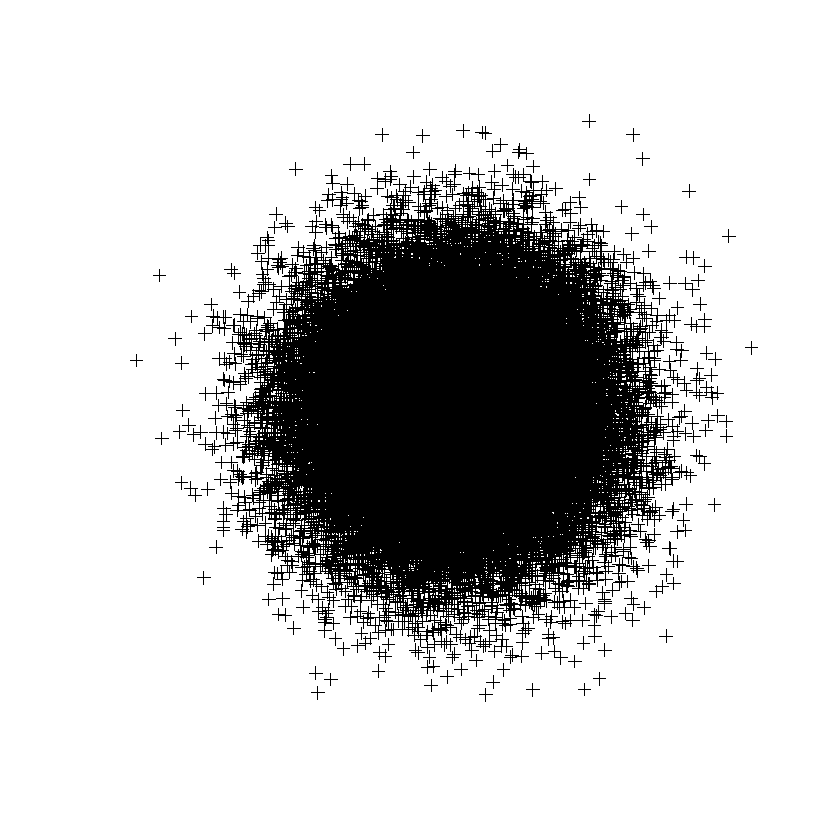

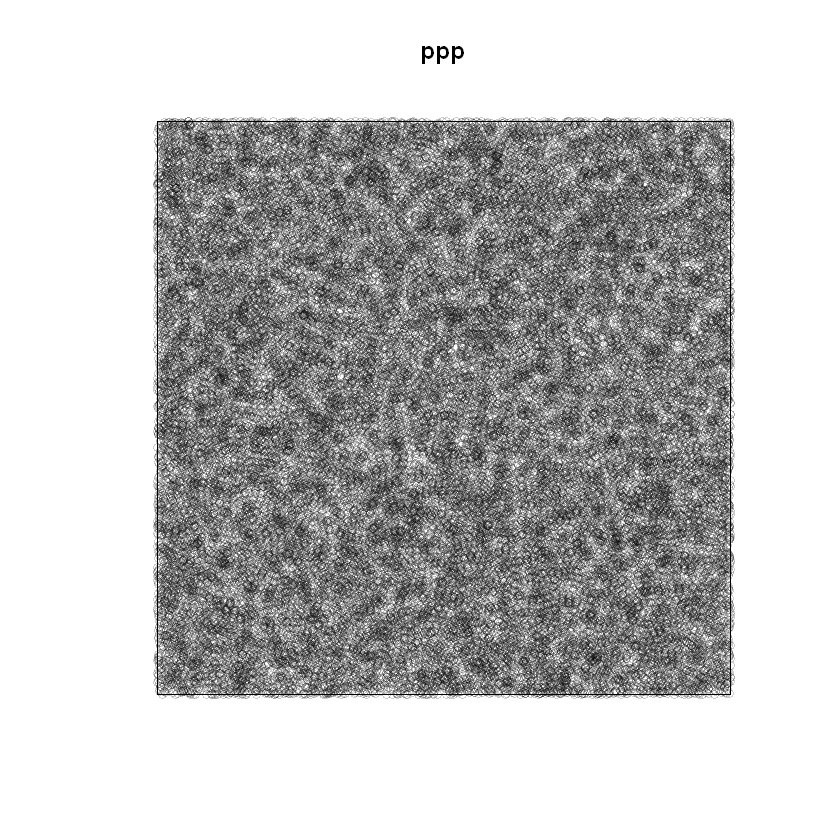

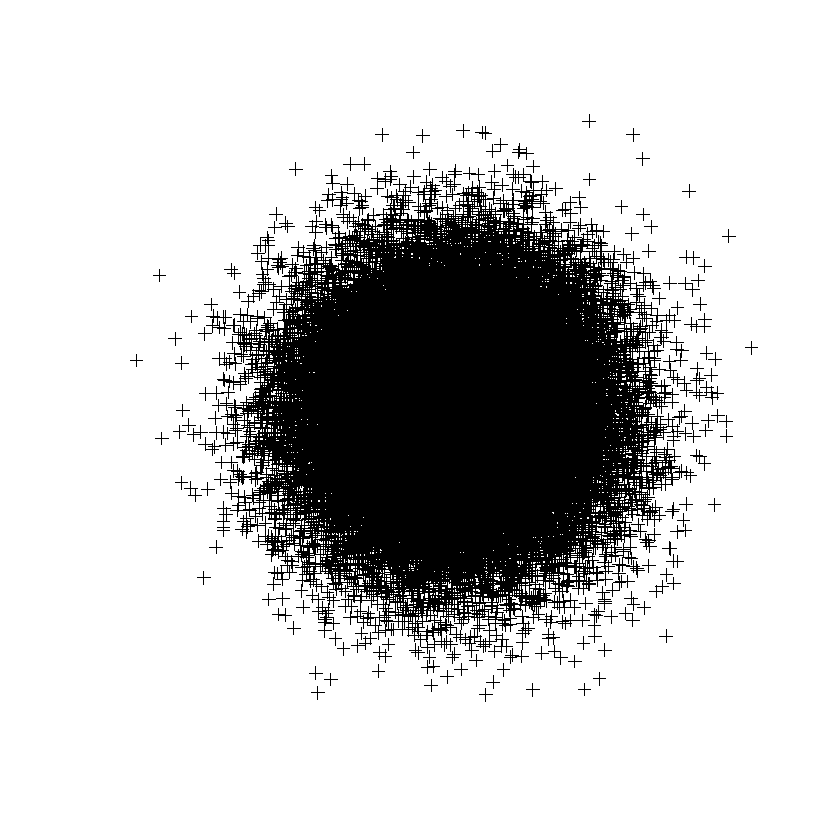

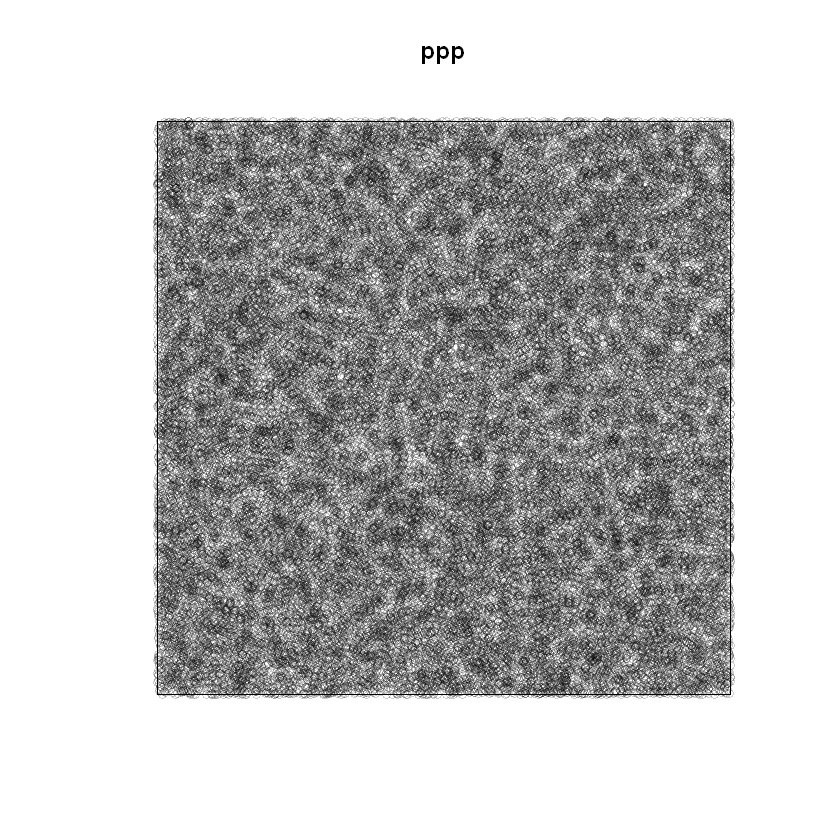

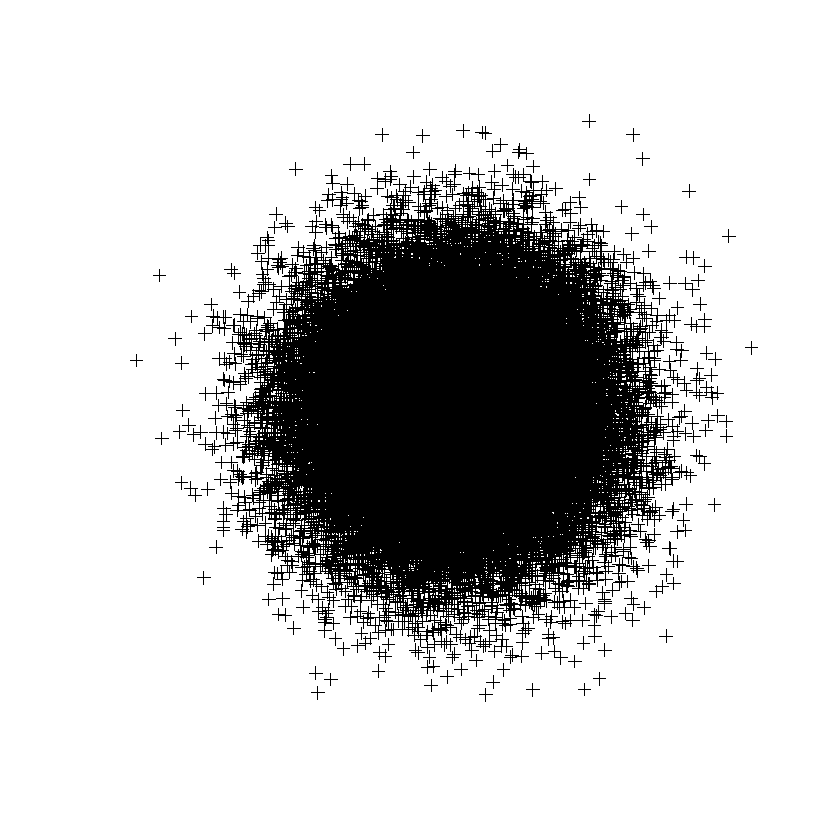

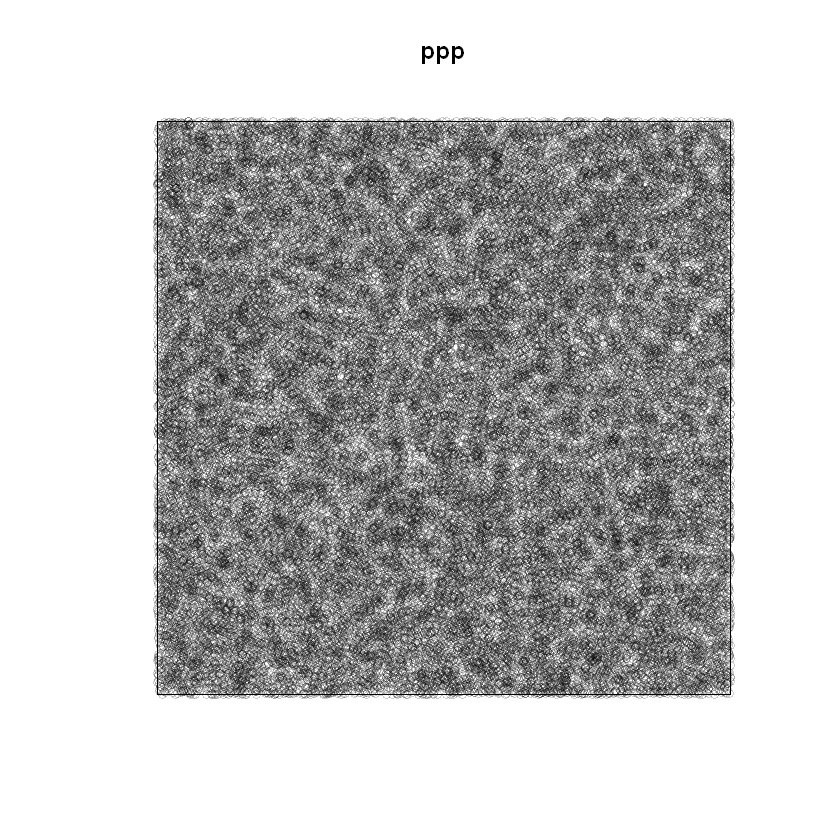

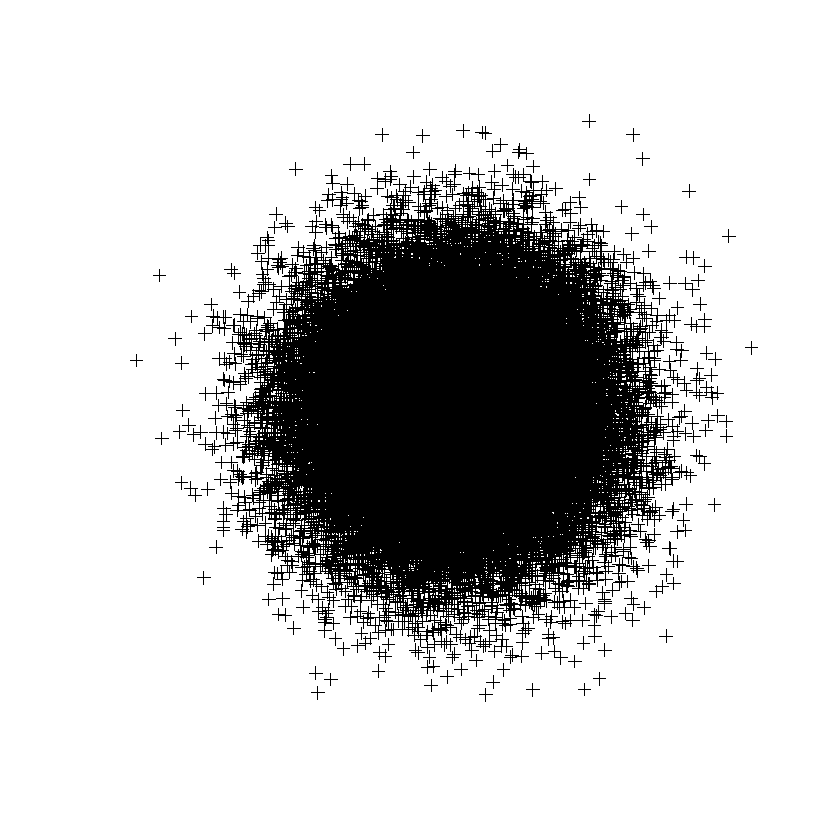

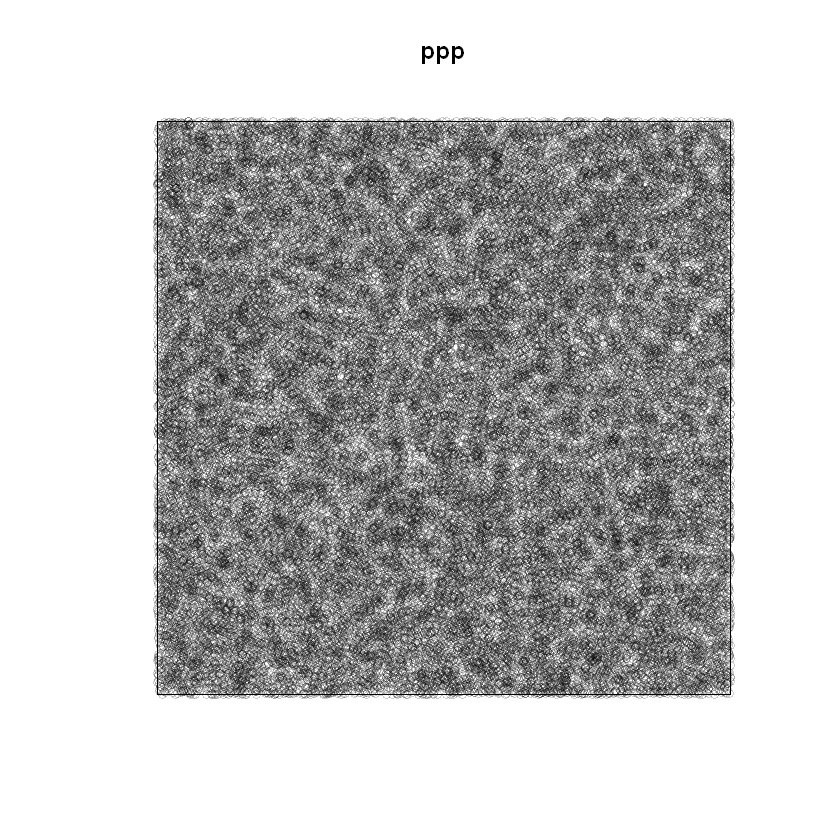

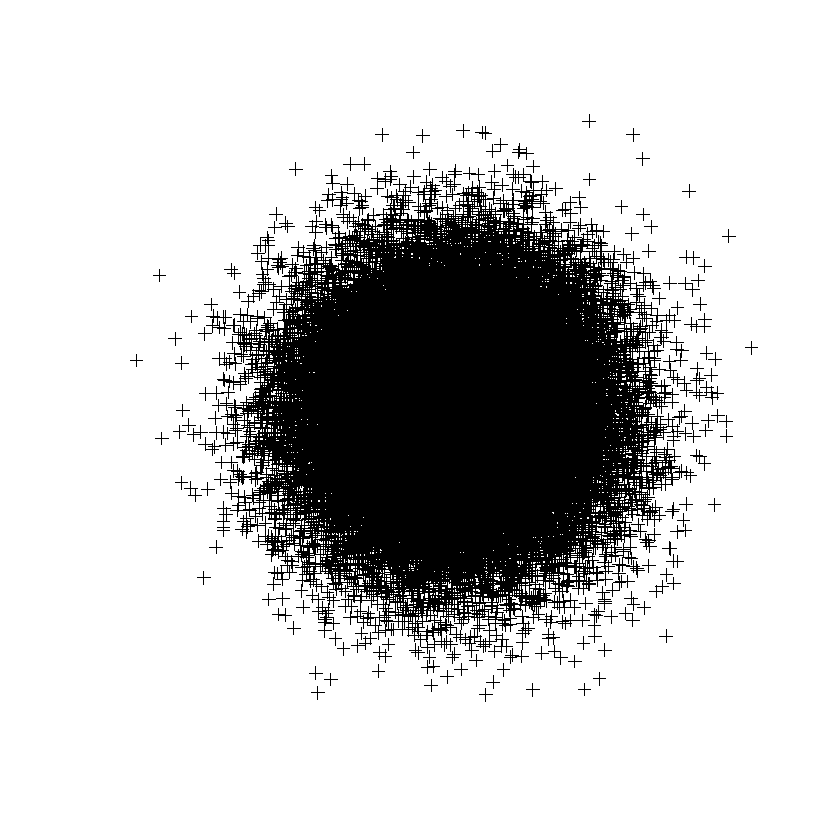

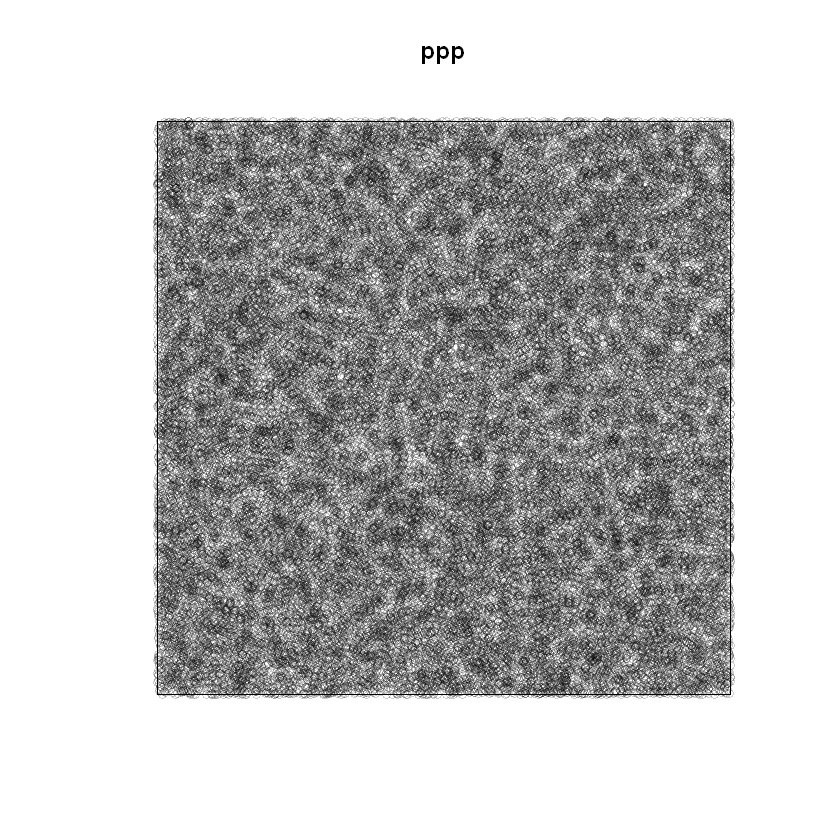

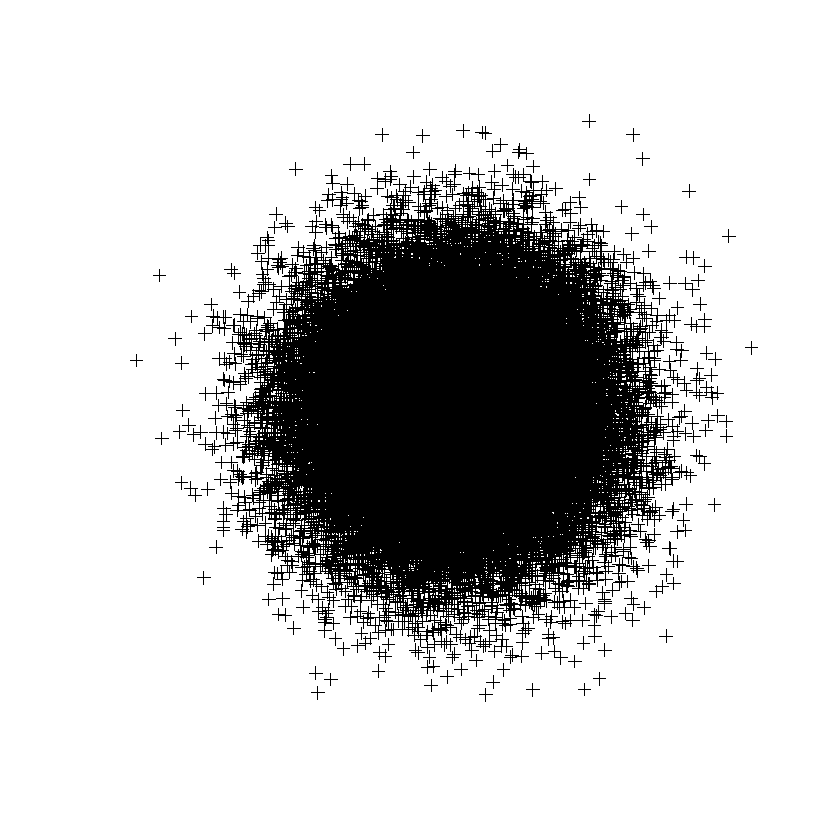

In [26]:
res3 = check_points(50000)

In [27]:
print(res3)

Unit: seconds
      expr      min       lq     mean   median       uq      max neval cld
  plot(sp) 2.649030 2.717384 3.839536 2.884689 4.711742 5.947948    50   b
 plot(ppp) 1.667152 1.708603 2.963918 3.477289 4.420967 4.948914    50  a 


Jak widać przy tworzeniu punktów wizualizacja prostych punktów jest w większości przypadków szybsza w przypadku obiektów biblioteki spatstat.

    5.3 Wczytywanie i wizualizacja danych z innych źródeł

Kolejnym aspektem, pod względem którego zostaną porównane obie biblioteki, są możliwości wczytywania.

Biblioteka sp sama w sobie nie posiada, żadnych funkcji przeznaczonych do odczywania danych przestrzennych. W tym przypadku konieczne jest wykorzystanie pakietu rgdal. Biblioteka ta zawiera dwie operacje odczytu - readOGR() i readGDAL(). Pierwsza z nich służy do odczytywania danych wektorowych (punktowych) - np. do wczytywania obiektów SpatialPoints, SpatialLines, natomiast readGDAL() umożliwia wczytywanie obiektów siatkowych (SpatialGrids).
Formaty plików z których można wczytywać dane przestrzenne przy pomocy pakietu rgdal to:

    a. .dbf
    
    b. .shp
    
    c. .shx
    
Warto zaznaczyć, że geometria obiektów znajduje się w plikach .shp, natomiast z plików .dbf możemy dostać tylko dodatkowe atrybuty obiektów w postaci ramek danych (do obiektów typu DataFrame). Pliki .shx przechowują indeksy ułatwiające wyszukiwanie elementów składowych obiektów.

Biblioteka spatstat posiada jedną metodę wczytywania danych zwracającą obiekt typu tej biblioteki. Jest to funckja scanpp() umożliwiająca odczyt daych w formacie kolumnowym (jest to pochodna funkcji read.table). Funkcja przyporządkowuje dwie pierwsze kolumny jako współrzędne, natomiast pozostałe traktuje jako etykiety (marks). Jedyny obsługiwany format dla tej funkcji to .csv.
Ze względu na brak możliwości przekazania wszystkich danych za pomocą pliku kolumnowego, sensowniejsze wydaje się w większości przypadków wczytywanie najpierw za pomocą rgdal obiektu klasy sp i transformacja do klasy spatstat.

Poniżej pokazano przykład wczytywania danych za pomocą omówionych funkcji, wraz z przekształceniem obiektu sp do spatstat. W eksperymentach zostanią wykorzystane dane przestrzenne london_sport uzyskane z linku https://github.com/Robinlovelace/Creating-maps-in-R/tree/master/data, zawierające mapę Londynu z podziałem na gminy-dzielnice wraz z danymi odnoszącymi się do zamieszkującej tu populacji oraz z odsetkiem ludzi uprawiających sport (wyniki uzyskane z ankiety). Porównana tutaj zostanie również wydajność i wygląd wizualizacji tych danych.

In [28]:
#import biblioteki
library(rgdal)
library(sp)
library(spatstat)
library(maptools)

rgdal: version: 1.4-8, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/karol/Anaconda3/envs/SPBD/Lib/R/library/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/karol/Anaconda3/envs/SPBD/Lib/R/library/rgdal/proj
 Linking to sp version: 1.4-1 

Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()



In [29]:
#wczytywanie danych
london_shp = readOGR(dsn = "data", layer = "london_sport")
class(london_shp)

OGR data source with driver: ESRI Shapefile 
Source: "C:\Users\karol\spatstat_vs_sp_SPDB\data", layer: "london_sport"
with 33 features
It has 4 fields
Integer64 fields read as strings:  Pop_2001 


[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

Jak widać wczytane dane są od razu przekonwertowane na obiekt klasy sp. Jest to bardzo duże ułatwienie. W tym przypadku obiekt ten jest klasy SpatialPolygonsDataFrame, czyli zbiorem wielokątów wraz z ramką danych.

Poniżej wyświetlono pierwsze 10 wierszy pobranych danych.

In [30]:
head(london_shp@data, n = 10)

ons_label name                 Partic_Per Pop_2001
0 00AF      Bromley              21.7       295535  
1 00BD      Richmond upon Thames 26.6       172330  
2 00AS      Hillingdon           21.5       243006  
3 00AR      Havering             17.9       224262  
4 00AX      Kingston upon Thames 24.4       147271  
5 00BF      Sutton               19.3       179767  
6 00AT      Hounslow             16.9       212352  
7 00BA      Merton               20.7       187919  
8 00BJ      Wandsworth           26.0       260379  
9 00AH      Croydon              17.6       330584

Jak widać poza nazwą i kodem gminy przechowywane są informacje odnośnie ilości populacji (Pop_2001) oraz odsetka mieszkańców dzielnicy, którzy są aktywni fizycznie. Poniżej zaprezentowano sposób wizualizacji mapy oraz zaznaczenia na tej samej mapie kolorem czerwonym dzielnicy Bromley. Wszystkie działania wykorzystują obiekt klasy sp. 

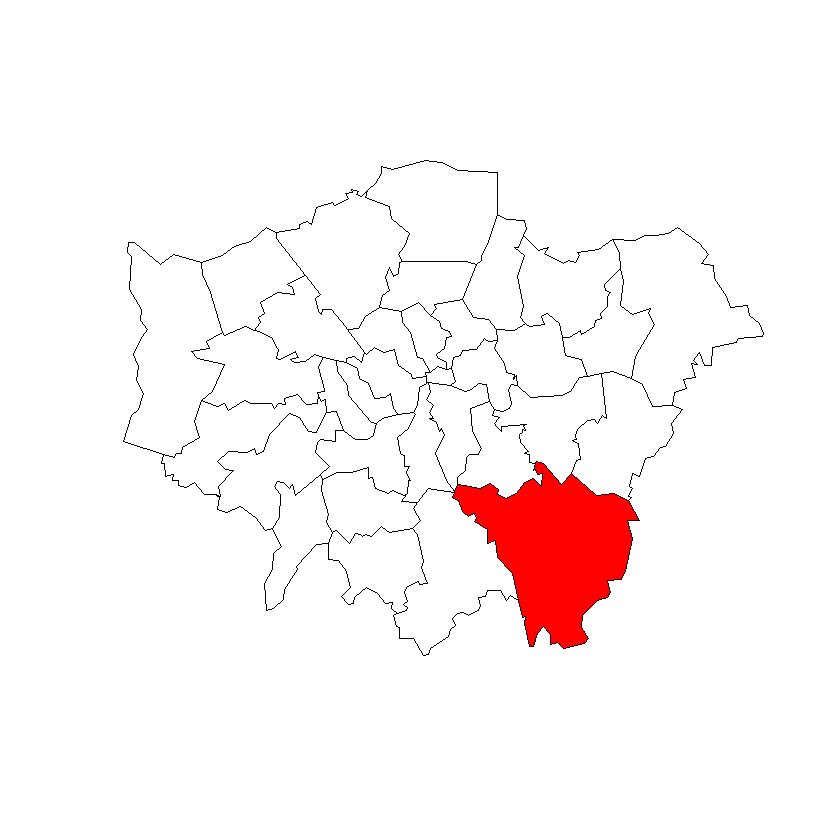

In [31]:
plot(london_shp)
sel_zone <- london_shp$name == "Bromley" 
plot(london_shp[sel_zone, ], col = "red", add = TRUE)

W celu wizualizacji tego obiektu za pomocą biblioteki spatstat należy, jak zostało to wcześniej podkreślone, dokonać konwersji z obiektu Spatial. Konieczna jest do tego transformacja współrzędnych i okna obiektu, które jest wymagane do utworzenia obiektu spatstat oraz wczytanie ramki danych. Zostało to zrobione za pomocą poniższych funkcji.

In [32]:
#wczytanie współrzędnych z obiektu Spatial
coords = coordinates(london_shp)
#wczytanie okna obiektu
window = as.owin.SpatialPolygons(london_shp)
#wczytanie ramki danych
data = as.data.frame(london_shp)

Następnie utworzono i wyświetlono obiekt spatstat:

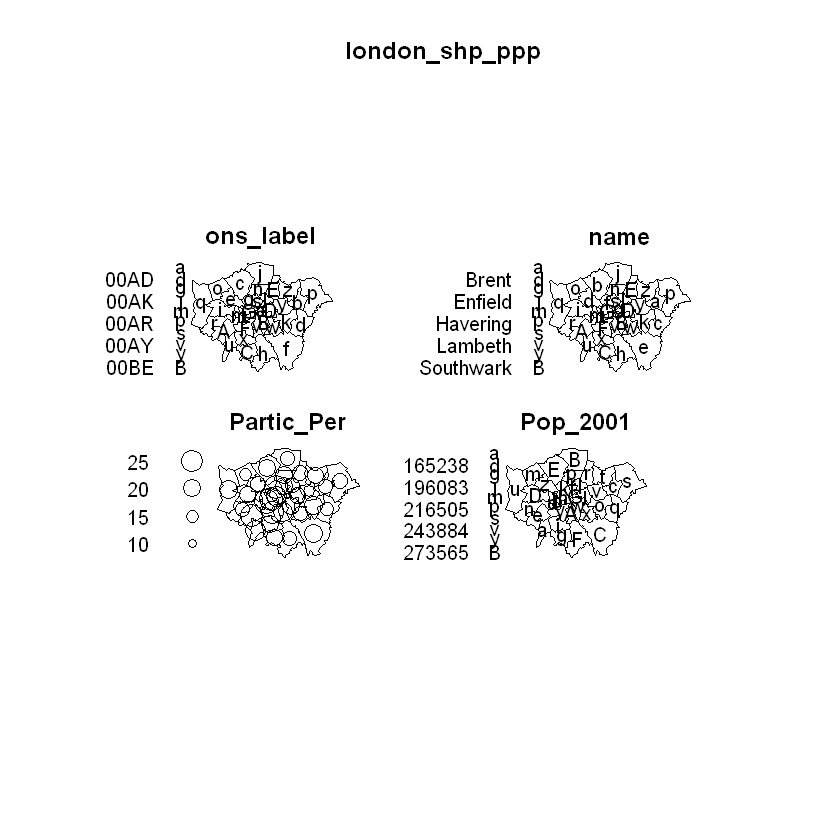

In [33]:
london_shp_ppp = ppp(coords[,1], coords[,2], window = window, marks = data)
plot(london_shp_ppp)

Widać tutaj znaczną różnicę w sposobie wyświetlania obiektu. Na wizualizacji widzimy, że funkcja plot w spatstat próbuje ukazać na wszystkie dane posiadane o obiekcie. Przez to wygląd ukazywanych danych przestrzennych dla takiej mapy jest zupełnie nieczytelny. W przypadku gdybyśmy chcieli zaznaczyć. Poniżej wyświetlono dane zamieszczone w marks (ramkę danych), a także sposób zaznaczenia dzielnicy Bromley na mapie.

In [34]:
print(london_shp_ppp$marks)

   ons_label                   name Partic_Per Pop_2001
0       00AF                Bromley       21.7   295535
1       00BD   Richmond upon Thames       26.6   172330
2       00AS             Hillingdon       21.5   243006
3       00AR               Havering       17.9   224262
4       00AX   Kingston upon Thames       24.4   147271
5       00BF                 Sutton       19.3   179767
6       00AT               Hounslow       16.9   212352
7       00BA                 Merton       20.7   187919
8       00BJ             Wandsworth       26.0   260379
9       00AH                Croydon       17.6   330584
10      00AY                Lambeth       23.0   266170
11      00BE              Southwark       21.0   244867
12      00AZ               Lewisham       17.4   248917
13      00AL              Greenwich       21.5   214402
14      00AJ                 Ealing       18.8   300943
15      00AN Hammersmith and Fulham       28.4   165238
16      00AE                  Brent       18.3  

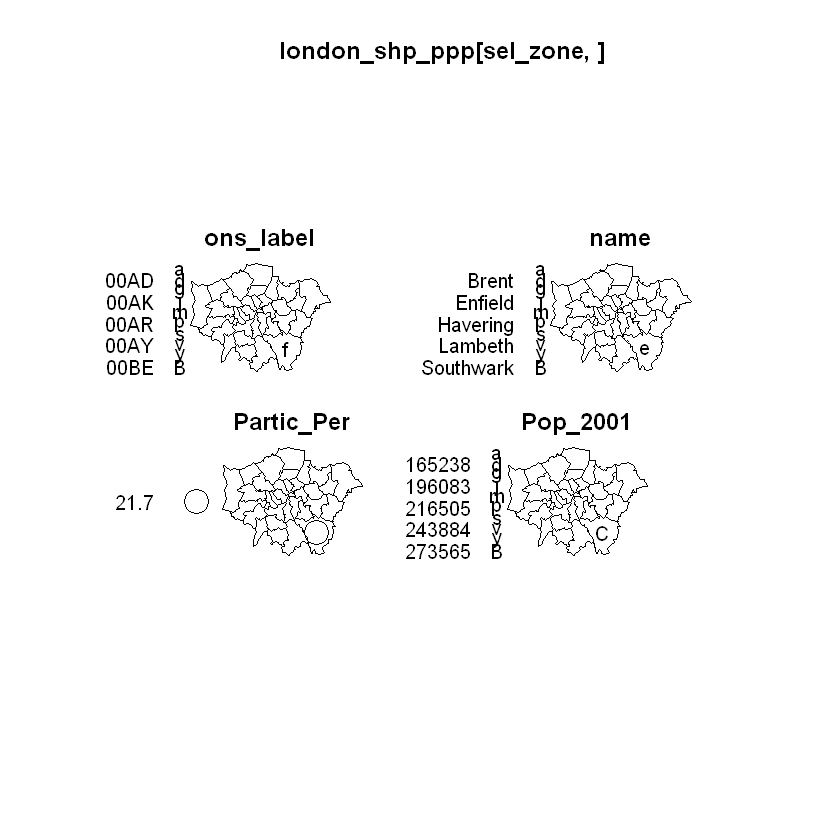

In [35]:
sel_zone <- london_shp_ppp$marks$name == "Bromley"
plot(london_shp_ppp[sel_zone, ])

Sposób oznaczenia moim zdaniem jest znacznie gorszy pod względem względami wizualnymi i praktycznymi niż w przypadku biblioteki sp. W spatstat użytkownik uzyskuje za pomocą prostego wywołania plot wszystkie dane o wszystkich atrybutach obiektu na jednym rysunku. Atrybutów tych dla bardziej złożonych map może być bardzo dużo, co spowoduje dużą wielkość wizualizowanych danych oraz nieczytelność. Uznaję, że sposób wizualizacji jest pod tymi względami lepszy w bibliotece sp.

Należy jednak mieć na uwadzę fakt, że jeżeli chcemy uzyskać jakieś dane szczegółowe to za pomocą spatstat możemy w dużo łatwiejszy sposób uzyskać mp. dane statystyczne. Poza wizualizacją możemy otrzymywać różnego rodzaju wykresy analizujące dane przestrzenne np. wykres gęstości punktów:

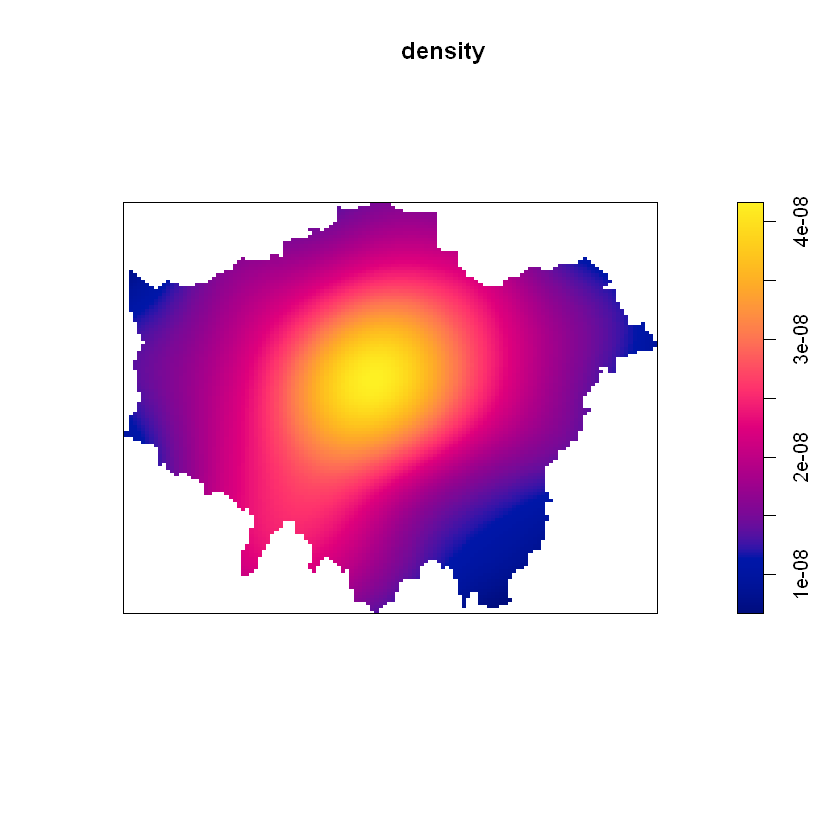

In [36]:
density = density(london_shp_ppp)
plot(density)

Danych tego rodzaju nie można łatwo uzyskać za pomocą sp.

    5.4 Transformacje układu współrzędnych danych z źródeł zewnętrznych
    
W przypadku biblioteki sp układy współrzędnych danych przestrzennych są przechowywane w atrybucie proj4string. Są to obiekty klasy CRS w sp które zapisane są w specjalnej notacji opisanej w bibliotece PROJ.4. Przykładowy układ współrzędnych opisany w tej notacji (źródło: Dokumentacja pakietu sp):

+proj=sterea +lat_0=52.15616055555555
+lon_0=5.38763888888889 +k=0.999908 +x_0=155000 +y_0=463000 +ellps=bessel
+towgs84=565.237,50.0087,465.658,-0.406857,0.350733,-1.87035,4.0812 +units=m

Układ współrzędnych tworzony jest przy pomocy konstruktora CRS, w którym należy podać dane układu w powyższej notacji.

W przypadku wczytywanych danych za pomocą pakietu rgdal, układ współrzędnych jest automatycznie wczytywany razem ze współrzędnymi (jest zawarty w pliku o rozszerzeniu .shp).  Funkcja pakietu sp umożliwiające przekształcenia układów współrzędnych nazywa się spTransform(). Jako argumenty zawiera ona obiekt, który ma być transformowany oraz układ współrzęnych (w postaci obiektu CRS). Uzyskiwanie informacji o aktualnym układzie współrzędnych możliwe jest za pomocą pakietu rgdal.

Poniżej przykład tranformacji układu współrzędnych:

In [37]:
london_shp@proj4string = CRS("+init=epsg:4267")
proj4string(london_shp)

[1] "+init=epsg:4267 +proj=longlat +datum=NAD27 +no_defs +ellps=clrk66 +nadgrids=@conus,@alaska,@ntv2_0.gsb,@ntv1_can.dat"

Object of class SpatialPolygonsDataFrame
Coordinates:
       min      max
x 503571.2 561941.1
y 155850.8 200932.5
Is projected: FALSE 
proj4string :
[+init=epsg:4267 +proj=longlat +datum=NAD27 +no_defs +ellps=clrk66
+nadgrids=@conus,@alaska,@ntv2_0.gsb,@ntv1_can.dat]
Data attributes:
   ons_label                    name      Partic_Per       Pop_2001 
 00AA   : 1   Barking and Dagenham: 1   Min.   : 9.10   147271 : 1  
 00AB   : 1   Barnet              : 1   1st Qu.:17.60   158921 : 1  
 00AC   : 1   Bexley              : 1   Median :19.40   163944 : 1  
 00AD   : 1   Brent               : 1   Mean   :20.05   165238 : 1  
 00AE   : 1   Bromley             : 1   3rd Qu.:21.70   172330 : 1  
 00AF   : 1   Camden              : 1   Max.   :28.40   175789 : 1  
 (Other):27   (Other)             :27                   (Other):27  

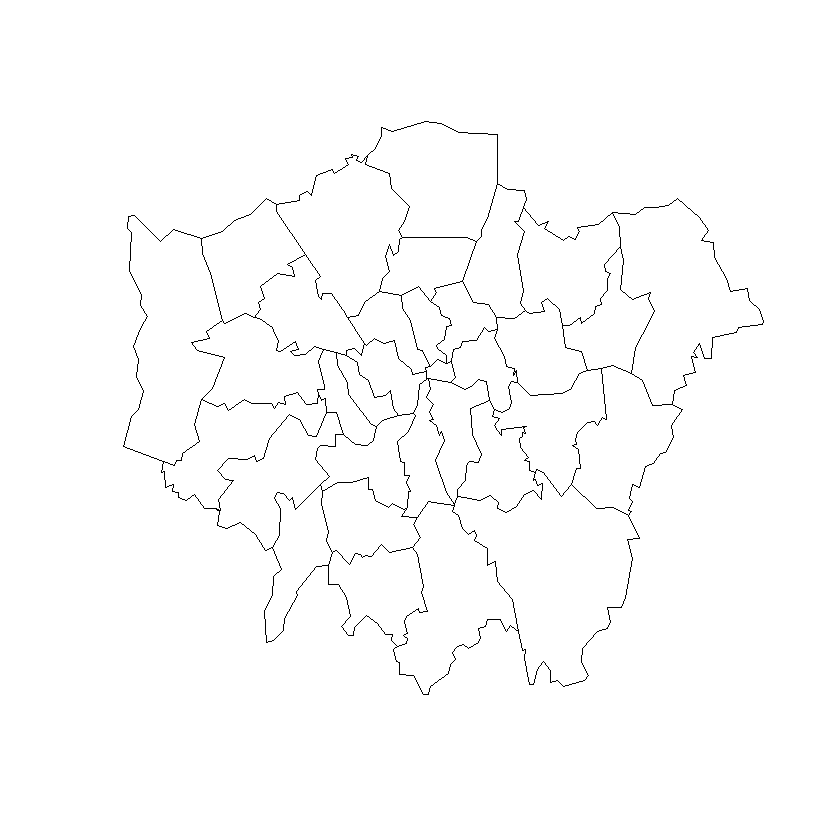

In [38]:
summary(london_shp)
plot(london_shp)

In [39]:
london_shp_crsTransform = spTransform(london_shp, CRS(paste("+proj=ob_tran +o_proj=longlat",
 "+o_lon_p=-162 +o_lat_p=39.25 +lon_0=180 +ellps=sphere +no_defs")),
 use_ob_tran=TRUE)
proj4string(london_shp_crsTransform)

[1] "+proj=ob_tran +o_proj=longlat +o_lon_p=-162 +o_lat_p=39.25 +lon_0=180 +ellps=sphere +no_defs"

Object of class SpatialPolygonsDataFrame
Coordinates:
         min       max
x -179.87646 179.93467
y  -87.58025  83.26084
Is projected: FALSE 
proj4string :
[+proj=ob_tran +o_proj=longlat +o_lon_p=-162 +o_lat_p=39.25 +lon_0=180
+ellps=sphere +no_defs]
Data attributes:
   ons_label                    name      Partic_Per       Pop_2001 
 00AA   : 1   Barking and Dagenham: 1   Min.   : 9.10   147271 : 1  
 00AB   : 1   Barnet              : 1   1st Qu.:17.60   158921 : 1  
 00AC   : 1   Bexley              : 1   Median :19.40   163944 : 1  
 00AD   : 1   Brent               : 1   Mean   :20.05   165238 : 1  
 00AE   : 1   Bromley             : 1   3rd Qu.:21.70   172330 : 1  
 00AF   : 1   Camden              : 1   Max.   :28.40   175789 : 1  
 (Other):27   (Other)             :27                   (Other):27  

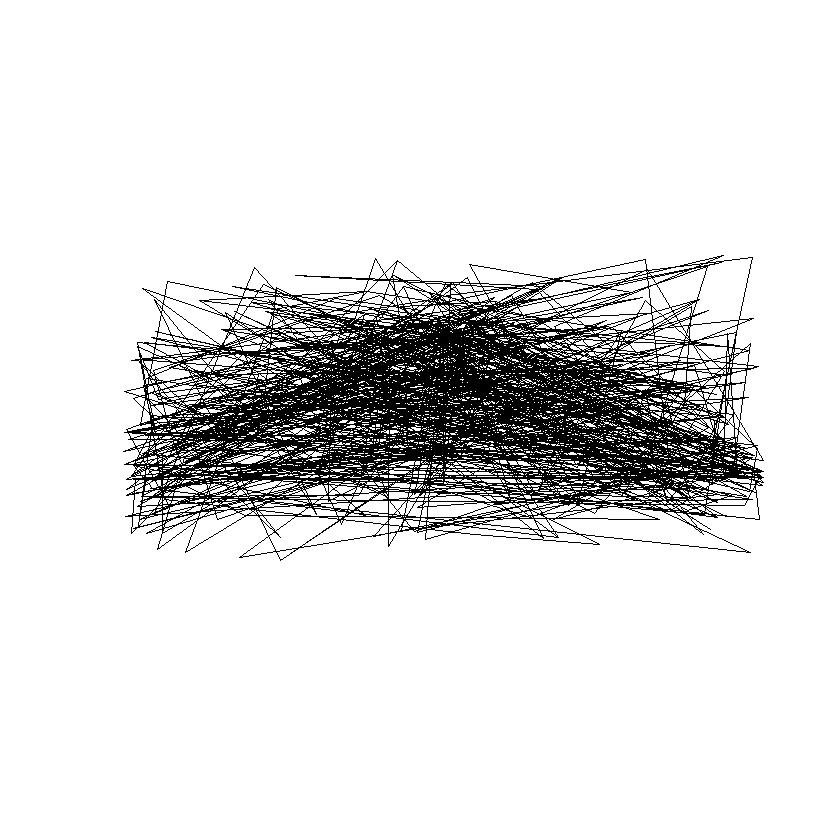

In [40]:
summary(london_shp_crsTransform)
plot(london_shp_crsTransform)

Jak widać zmiana układu współrzędnych spowodowała całkowitą zmianę wyglądu obiektu.

W bibliotece spatstat nie ma możliwości operowania na układzie współrzędnych - jest on określony odgórnie i niemożliwe są transformacje.

    5.5 Zapis danych przestrzennych

Do zapisu danych przestrzennych obiektów biblioteki sp, podobnie jak w przypadku wczytywanie, konieczne jest skorzystanie z metod pakietu rgdal. Zapewnia on metody writeOGR() i writeGDAL() - odpowiednio do zapisu danych zapisanych wektorowo i siatek.

Dane przestrzenne zapisywane są za pomocą trzech plików o rozszerzeniach .shp, .shx i .dbf.

Pakiet spatstat nie zawiera żadnych metod służących do zapisu danych przestrzennych. Metody tej biblioteki pozwalają zapisywać obiekty jedynie za pomocą plików binarnych RDS, które nie są możliwe do późniejszego wczytania

    5.6 Ocena dokumentacji oraz zależności biblioteki od dodatkowych pakietów

Przy realizacji projektu postanowiono porównać dokumentację obu pakietów, z której korzystano przy wykonaniu części eksperymentalej. Znaleziono je w formie pliku pdf:

https://cran.r-project.org/web/packages/sp/sp.pdf
https://cran.r-project.org/web/packages/spatstat/spatstat.pdf

Porównując biblioteki, łatwo dojdziemy do wniosku, że znacznie lepiej opracowaną i rozbudowaną dokumentację ma spatstat. Znajduje się w niej opis pakietu (ze wzkazaniami do użycia), podział metod w bibliotece ze względu na zastosowanie wraz z krótkimi opisami. Niestety nie jest to zrealizowane w przypadku pakiety sp. Sam opis funkcji również wydaje się bardziej dopracowany w przypadku spatstat. Możnaby powiedzieć, że w sp są one bardzo ubogie, ograniczające się do pojedynczych zdań, bądź ich równoważników. W obu dokumentacjach znajdują się przykłady użycia. Uważam, że bardziej przyjazną użytkownikowi dokumentacją jest ta opisująca pakiet spatstat.
Na sam fakt znacznie lepszego opracowania dokumentacji wskazuje również fakt ilu autorów pracowało przy jej opracowaniu. W przypadku sp jest to 10 osób, podczas gdy przy tworzeniu biblioteki spatstat brało udział 209 współautorów.

Warto również napomknąć o zależności bibliotek od innych pakietów zewnętrznych. Wiadomym jest, że warto, aby biblioteka korzystała z jak najmniejszej liczby pakietów zewnętrznych, gdyż może to spowodować problem z kompatybilnością między pakietami w przypadku wprowadzania aktualizacji pakietu zależnego. Często bowiem twórcy pakietów zwlekają z aktualizacją biblioteki, gdy zostanie wprowadzona nowa wersja pakietu zewnętrznego.

W przypadku bibioteki sp zależność ta jest bardzo mała. Pakiet wymaga wyłącznie zainstalowania pakietu methods, który ponadto posiada priorytet base, co oznacza, że nie musi mieć ścisłej kompatybilności z aktualną wersją interpretera. Ponadto w tym pakiecie sugerowane jest zainstalowanie dodatkowych pakietów, które mogą być przydatne przy korzystaniu z biblioteki - maptools, delfir, gstat, rgeos (>= 0.3-13), rgdal (>= 0.8-7), RColorBrewer.

Zależność biblioteki spatstat od pakietów zewnętrznych jest znacznie większa. Poza pakietem methods, konieczne jest też zainstalowanie 6 innych bibliotek - stats, graphics, rpart, nlme, utils, grDevices. Dwa z nich (nlme oraz rpart) nie mają priorytetu base, przez co aktualizacja ich treści może powodować problemy z kompatybilnością. Poza obowiązkowymi pakietami do korzystania z biblioteki sugerowane są sm, maptools (>= 0.9-9), gsl, locfit, spatial, RandomFields (>= 3.1.24.1), RandomFieldsUtils (>= 0.3.3.1), fftwtools (>= 0.9-8).

Pod względem zależności od pakietów zewnętrznych znaczną przewagę ma zatem biblioteka sp. Niska zależność pozwala uniknąć błędów i problemów związanych z kompatybilnością z właściwą wersją interpretera.

6. Wnioski

Z przeprowadzonych badań wynika, że biblioteka sp lepiej nadaje się do reprezentacji i wizualizacji danych przestrzennych. Zawiera ona więcej metod i możliwości reprezentacji obiektów np. obiekty typu siatka są niemożliwe do przedstawienia za pomocą spatstat. Ponadto dużą wadą tej biblioteki jest konieczność podawania okna dla reprezentowanych danych, jak również bardziej skomplikowany sposób tworzenia instancji. Wizualizacja obiektów przestrzennych jest również zdecydowanie bardziej estetyczna przy wykorzystaniu biblioteki sp. Statstat zarzuca nas dużą ilością danych przy wyświetlaniu przez co wykres staje się nieczytelny. Na plus wizualizacji w tej bibliotece należy zaliczyć łatwość otrzymywania wykresów statystycznych dla danych oraz szybkość wyświetlania prostych obiektów.

Należy jednak mieć na uwadze, że pakiet spatstat zawiera znacznie więcej funkcji umożliwiających eksplorację danych i analizę statystyczną. Nie jest on ściśle wyspecjalizowanych do reprezentacji i wizualizacji danych tak jak sp. Dlatego wybierając narzędzie pracy należy przede wszystkim przeanalizować na czym najbardziej zależy programiście. Przy projektach nie wymagających dodatkowych funkcji biblioteka sp jest zdecydowanie lepszym wyborem. Przemawia za tym również fakt, że pakiet sp jest cały czas aktywnie rozwijany i opiera się na nim wiele pakietów, które przy reprezentacji przestrzennych danych bazują właśnie na obiektach typu Spatial.